In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [ ]:
data = pd.read_csv("D:/Thesis/Model Apply 2018/archive/02-21-2018.csv")
data.head()

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0        80         6  21/02/2018 08:33:25          37953             5   
1       500        17  21/02/2018 08:33:06      117573474             3   
2       500        17  21/02/2018 08:33:06      117573474             3   
3       500        17  21/02/2018 08:33:11       99743998             5   
4       500        17  21/02/2018 08:33:11       99743999             5   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             3              135              127              135   
1             0             1500                0              500   
2             0             1500                0              500   
3             0             2500                0              500   
4             0             2500                0              500   

   Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                0  ...                32          0.0         0.0   
1              500  ...                 8          0.0         0.0   
2              500  ...                 8          0.0         0.0   
3              500  ...                 8    4000290.0         0.0   
4              500  ...                 8    4000286.0         0.0   

   Active Max  Active Min   Idle Mean    Idle Std  Idle Max  Idle Min   Label  
0           0           0         0.0         0.0         0         0  Benign  
1           0           0  58800000.0  23800000.0  75600000  42000000  Benign  
2           0           0  58800000.0  23800000.0  75600000  42000000  Benign  
3     4000290     4000290  31900000.0  37900000.0  75600000   7200397  Benign  
4     4000286     4000286  31900000.0  37900000.0  75600000   7200399  Benign  

[5 rows x 80 columns]

In [ ]:
data.drop(columns='Timestamp', inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Flow Duration      1048575 non-null  int64  
 3   Tot Fwd Pkts       1048575 non-null  int64  
 4   Tot Bwd Pkts       1048575 non-null  int64  
 5   TotLen Fwd Pkts    1048575 non-null  int64  
 6   TotLen Bwd Pkts    1048575 non-null  int64  
 7   Fwd Pkt Len Max    1048575 non-null  int64  
 8   Fwd Pkt Len Min    1048575 non-null  int64  
 9   Fwd Pkt Len Mean   1048575 non-null  float64
 10  Fwd Pkt Len Std    1048575 non-null  float64
 11  Bwd Pkt Len Max    1048575 non-null  int64  
 12  Bwd Pkt Len Min    1048575 non-null  int64  
 13  Bwd Pkt Len Mean   1048575 non-null  float64
 14  Bwd Pkt Len Std    1048575 non-null  float64
 15  Flow Byts/s        1048575 non-n

In [ ]:
# Write the selected column.
selected_columns = ['Dst Port','Tot Bwd Pkts','Fwd Pkt Len Std','Bwd Pkt Len Std','Fwd Seg Size Avg','Init Bwd Win Byts','Bwd IAT Mean','PSH Flag Cnt','Bwd Pkt Len Max','Init Fwd Win Byts','Subflow Bwd Pkts','Bwd Seg Size Avg','Bwd Pkt Len Mean','Label']

In [ ]:
# Only take the selected column from the dataset.
data = data[selected_columns]
data.head()

Dst Port  Tot Bwd Pkts  Fwd Pkt Len Std  Bwd Pkt Len Std  Fwd Seg Size Avg  \
0        80             3        60.373835        73.323484              27.0   
1       500             0         0.000000         0.000000             500.0   
2       500             0         0.000000         0.000000             500.0   
3       500             0         0.000000         0.000000             500.0   
4       500             0         0.000000         0.000000             500.0   

   Init Bwd Win Byts  Bwd IAT Mean  PSH Flag Cnt  Bwd Pkt Len Max  \
0                219        9980.0             1              127   
1                 -1           0.0             0                0   
2                 -1           0.0             0                0   
3                 -1           0.0             0                0   
4                 -1           0.0             0                0   

   Init Fwd Win Byts  Subflow Bwd Pkts  Bwd Seg Size Avg  Bwd Pkt Len Mean  \
0              29200                 3         42.333333         42.333333   
1                 -1                 0          0.000000          0.000000   
2                 -1                 0          0.000000          0.000000   
3                 -1                 0          0.000000          0.000000   
4                 -1                 0          0.000000          0.000000   

    Label  
0  Benign  
1  Benign  
2  Benign  
3  Benign  
4  Benign

In [ ]:
# replace +ve and -ve infinity with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
data.describe()

Dst Port  Tot Bwd Pkts  Fwd Pkt Len Std  Bwd Pkt Len Std  \
count  1.048575e+06  1.048575e+06     1.048575e+06     1.048575e+06   
mean   1.958764e+04  1.309663e+00     1.699519e+02     1.455142e+02   
std    2.719338e+04  1.477423e+00     1.887000e+02     1.687515e+02   
min    0.000000e+00  0.000000e+00     0.000000e+00     0.000000e+00   
25%    8.000000e+01  0.000000e+00     0.000000e+00     0.000000e+00   
50%    8.000000e+01  0.000000e+00     0.000000e+00     0.000000e+00   
75%    5.355300e+04  2.000000e+00     4.181447e+02     2.234457e+02   
max    6.553400e+04  1.240000e+02     6.901362e+02     4.993862e+02   

       Fwd Seg Size Avg  Init Bwd Win Byts  Bwd IAT Mean  PSH Flag Cnt  \
count      1.048575e+06       1.048575e+06  1.048575e+06  1.048575e+06   
mean       7.977144e+01       1.123803e+04  2.822531e+03  4.983296e-01   
std        8.511139e+01       1.551953e+04  3.604474e+04  4.999974e-01   
min        0.000000e+00      -1.000000e+00  0.000000e+00  0.000000e+00   
25%        0.000000e+00      -1.000000e+00  0.000000e+00  0.000000e+00   
50%        3.200000e+01      -1.000000e+00  0.000000e+00  0.000000e+00   
75%        1.870000e+02       3.276800e+04  1.687667e+03  1.000000e+00   
max        9.760000e+02       3.276800e+04  1.910000e+07  1.000000e+00   

       Bwd Pkt Len Max  Init Fwd Win Byts  Subflow Bwd Pkts  Bwd Seg Size Avg  \
count     1.048575e+06       1.048575e+06      1.048575e+06      1.048575e+06   
mean      2.485879e+02       4.895170e+04      1.309663e+00      8.777145e+01   
std       3.252947e+02       1.663954e+04      1.477423e+00      9.267301e+01   
min       0.000000e+00      -1.000000e+00      0.000000e+00      0.000000e+00   
25%       0.000000e+00       3.273800e+04      0.000000e+00      0.000000e+00   
50%       0.000000e+00       3.273800e+04      0.000000e+00      0.000000e+00   
75%       3.160000e+02       6.553500e+04      2.000000e+00      1.580000e+02   
max       1.104000e+03       6.553500e+04      1.240000e+02      1.104000e+03   

       Bwd Pkt Len Mean  
count      1.048575e+06  
mean       8.777145e+01  
std        9.267301e+01  
min        0.000000e+00  
25%        0.000000e+00  
50%        0.000000e+00  
75%        1.580000e+02  
max        1.104000e+03

In [ ]:
# drop missing values
data.dropna(inplace=True)

In [ ]:
# To see how many record fall in each classes.
data['Label'].value_counts()

Label
DDOS attack-HOIC        686012
Benign                  360833
DDOS attack-LOIC-UDP      1730
Name: count, dtype: int64

In [ ]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go

fig = go.Figure(data=[
    go.Bar(name='Benign',
           y=data["Label"].value_counts().values[1:2],
           x=['Benign'],
           text = data["Label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DDOS attack-HOIC',
           y=data["Label"].value_counts().values[0:1],
           x=['DDOS attack-HOIC'],
           text = data["Label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='DDOS attack-LOIC-UDP',
           y=data["Label"].value_counts().values[2:],
           x=['DDOS attack-LOIC-UDP'],
           text = data["Label"].value_counts()[2:],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)

In [ ]:
data.replace(to_replace=["DDOS attack-HOIC", "DDOS attack-LOIC-UDP"], value="Malicious", inplace=True)

In [ ]:
data["Label"].value_counts()

Label
Malicious    687742
Benign       360833
Name: count, dtype: int64

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Benign',
           y=data["Label"].value_counts().values[1:2],
           x=['Benign'],
           text = data["Label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious',
           y=data["Label"].value_counts().values[0:1],
           x=['Malicious'],
           text = data["Label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)

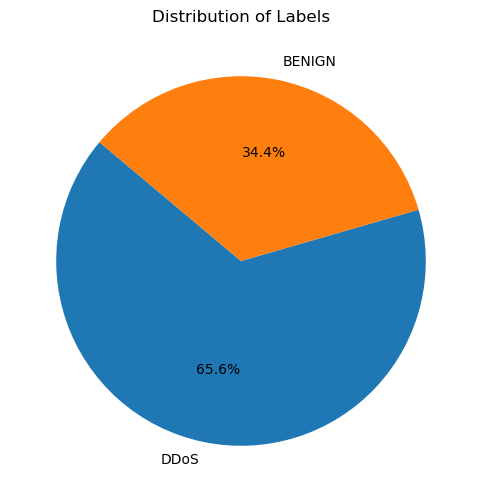

In [ ]:
import matplotlib.pyplot as plt
# Assuming data is a pandas DataFrame
data1 = {'Label': ['DDoS', 'BENIGN'],
        'Count': [687742, 360833]}

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(data1['Count'], labels=data1['Label'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.show()

In [ ]:
x = data.iloc[:,:-1]
y = data['Label']

In [ ]:
from collections import Counter
from imblearn.under_sampling import NearMiss

In [ ]:
undersampling = NearMiss()

In [ ]:
x_us,y_us = undersampling.fit_resample(x,y)

In [ ]:
print("Orginal Dataset Shape: %s" %Counter(y))
print("After apply smote now dataset shape %s" %Counter(y_us))

Orginal Dataset Shape: Counter({'Malicious': 687742, 'Benign': 360833})
After apply smote now dataset shape Counter({'Benign': 360833, 'Malicious': 360833})


In [ ]:
y_us.value_counts()

Label
Benign       360833
Malicious    360833
Name: count, dtype: int64

In [ ]:
x_us.shape,y_us.shape

((721666, 13), (721666,))

In [ ]:
# Apply the train test split.
x_train,x_test,y_train,y_test = train_test_split(x_us,y_us,test_size=0.2,stratify=y_us, random_state=42)

# Data Transformation

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
# Apply the label encoding to the target cloumn.
le = LabelEncoder()
y_train = le.fit_transform(np.ravel(y_train))
y_test = le.fit_transform(np.ravel(y_test))

In [ ]:
x = scaler.fit_transform(x)
y = le.fit_transform(y)

# Apply Model

# Gradient Boosting.

In [ ]:
gradientBoosting = GradientBoostingClassifier()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [ ]:
gbc_grid = RandomizedSearchCV(estimator=gradientBoosting,param_distributions=param_grid,cv=5,verbose=2,n_jobs=-1)

In [ ]:
gbc_grid.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 1.0]},
                   verbose=2)

In [ ]:
print(gbc_grid.best_params_)

{'subsample': 1.0, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.1}


In [ ]:
bestModel = gbc_grid.best_estimator_

In [ ]:
print(gbc_grid.best_score_)

0.998455046134039


In [ ]:
bestModel.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=50)

In [ ]:
yPredHyperGradientBoosting = bestModel.predict(x_test)

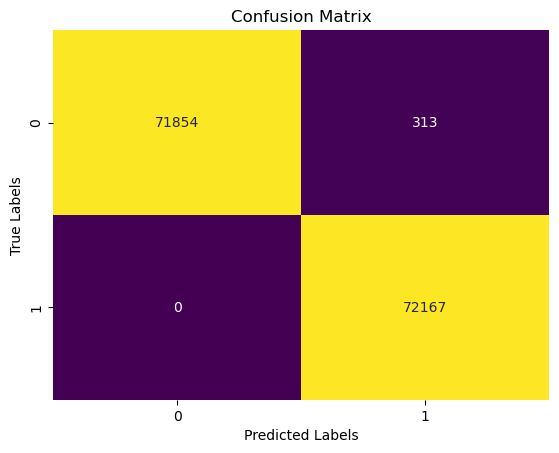

In [ ]:
confMat = confusion_matrix(y_test_le,yPredHyperGradientBoosting)
sns.heatmap(confMat, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(format(classification_report(y_test,yPredHyperGradientBoosting)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     72167
           1       1.00      1.00      1.00     72167

    accuracy                           1.00    144334
   macro avg       1.00      1.00      1.00    144334
weighted avg       1.00      1.00      1.00    144334



In [ ]:
print("f1 Score {}".format(f1_score(y_test,yPredHyperGradientBoosting)))
print("Recall Score {}".format(recall_score(y_test,yPredHyperGradientBoosting)))
print("Accuracy Score {}".format(accuracy_score(y_test,yPredHyperGradientBoosting)))
print("Precision Score {}".format(precision_score(y_test,yPredHyperGradientBoosting)))

f1 Score 0.997836111360761
Recall Score 1.0
Accuracy Score 0.9978314187925229
Precision Score 0.9956815673289183


# Random Forest

In [ ]:
randomForest = RandomForestClassifier()

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [ ]:
rf_grid = RandomizedSearchCV(estimator=randomForest,param_distributions=param_grid,cv=5,verbose=2,n_jobs=-1)

In [ ]:
rf_grid.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   verbose=2)

In [ ]:
print(rf_grid.best_params_)

{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [ ]:
print(rf_grid.best_score_)

0.9983463271582863


In [ ]:
bestModelRandomForest = rf_grid.best_estimator_

In [ ]:
bestModelRandomForest.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=200)

In [ ]:
yPredHyperRandomForest = bestModelRandomForest.predict(x_test)

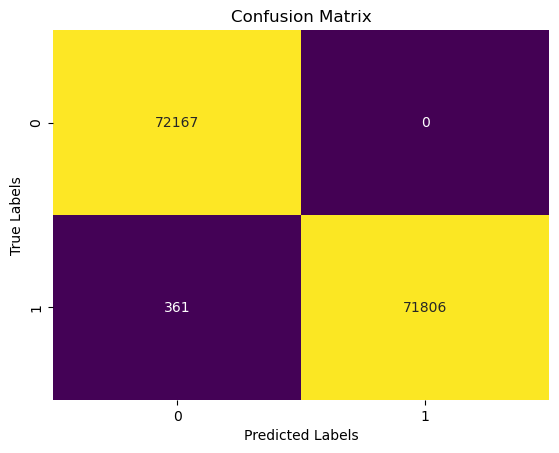

In [ ]:
confMat = confusion_matrix(y_test_le,yPredHyperRandomForest)
sns.heatmap(confMat, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(format(classification_report(y_test,yPredHyperRandomForest)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     72167
           1       1.00      0.99      1.00     72167

    accuracy                           1.00    144334
   macro avg       1.00      1.00      1.00    144334
weighted avg       1.00      1.00      1.00    144334



In [ ]:
print("f1 Score {}".format(f1_score(y_test,yPredHyperRandomForest)))
print("Recall Score {}".format(recall_score(y_test,yPredHyperRandomForest)))
print("Accuracy Score {}".format(accuracy_score(y_test,yPredHyperRandomForest)))
print("Precision Score {}".format(precision_score(y_test,yPredHyperRandomForest)))

f1 Score 0.9974925854153209
Recall Score 0.9949977136364266
Accuracy Score 0.9974988568182133
Precision Score 1.0


# CatBoosting.

In [ ]:
catBoosting = CatBoostClassifier()

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

In [ ]:
cb_grid = RandomizedSearchCV(estimator=catBoosting, param_distributions=param_grid, cv=5, scoring='accuracy')

In [ ]:
cb_grid.fit(x,y)

0:	learn: 0.6405407	total: 249ms	remaining: 4m 8s
1:	learn: 0.5971920	total: 350ms	remaining: 2m 54s
2:	learn: 0.5545746	total: 454ms	remaining: 2m 30s
3:	learn: 0.5113031	total: 565ms	remaining: 2m 20s
4:	learn: 0.4702302	total: 668ms	remaining: 2m 12s
5:	learn: 0.4360512	total: 773ms	remaining: 2m 8s
6:	learn: 0.4054606	total: 884ms	remaining: 2m 5s
7:	learn: 0.3736534	total: 998ms	remaining: 2m 3s
8:	learn: 0.3457858	total: 1.11s	remaining: 2m 2s
9:	learn: 0.3193975	total: 1.23s	remaining: 2m 1s
10:	learn: 0.2949964	total: 1.32s	remaining: 1m 58s
11:	learn: 0.2726398	total: 1.43s	remaining: 1m 57s
12:	learn: 0.2522574	total: 1.53s	remaining: 1m 55s
13:	learn: 0.2334536	total: 1.63s	remaining: 1m 54s
14:	learn: 0.2171162	total: 1.73s	remaining: 1m 53s
15:	learn: 0.2015538	total: 1.83s	remaining: 1m 52s
16:	learn: 0.1865863	total: 1.94s	remaining: 1m 52s
17:	learn: 0.1720165	total: 2.05s	remaining: 1m 51s
18:	learn: 0.1602107	total: 2.13s	remaining: 1m 50s
19:	learn: 0.1472063	total: 

160:	learn: 0.0002209	total: 15.7s	remaining: 1m 21s
161:	learn: 0.0002167	total: 15.7s	remaining: 1m 21s
162:	learn: 0.0002128	total: 15.8s	remaining: 1m 21s
163:	learn: 0.0002078	total: 15.9s	remaining: 1m 21s
164:	learn: 0.0002058	total: 16s	remaining: 1m 20s
165:	learn: 0.0002038	total: 16.1s	remaining: 1m 20s
166:	learn: 0.0002017	total: 16.1s	remaining: 1m 20s
167:	learn: 0.0001992	total: 16.2s	remaining: 1m 20s
168:	learn: 0.0001977	total: 16.3s	remaining: 1m 20s
169:	learn: 0.0001958	total: 16.4s	remaining: 1m 20s
170:	learn: 0.0001943	total: 16.5s	remaining: 1m 19s
171:	learn: 0.0001923	total: 16.5s	remaining: 1m 19s
172:	learn: 0.0001903	total: 16.6s	remaining: 1m 19s
173:	learn: 0.0001879	total: 16.7s	remaining: 1m 19s
174:	learn: 0.0001865	total: 16.8s	remaining: 1m 19s
175:	learn: 0.0001840	total: 16.9s	remaining: 1m 19s
176:	learn: 0.0001785	total: 17s	remaining: 1m 18s
177:	learn: 0.0001735	total: 17.1s	remaining: 1m 18s
178:	learn: 0.0001716	total: 17.1s	remaining: 1m 1

319:	learn: 0.0000670	total: 29.8s	remaining: 1m 3s
320:	learn: 0.0000670	total: 29.9s	remaining: 1m 3s
321:	learn: 0.0000670	total: 30s	remaining: 1m 3s
322:	learn: 0.0000670	total: 30.1s	remaining: 1m 2s
323:	learn: 0.0000670	total: 30.1s	remaining: 1m 2s
324:	learn: 0.0000670	total: 30.2s	remaining: 1m 2s
325:	learn: 0.0000670	total: 30.3s	remaining: 1m 2s
326:	learn: 0.0000670	total: 30.4s	remaining: 1m 2s
327:	learn: 0.0000670	total: 30.5s	remaining: 1m 2s
328:	learn: 0.0000670	total: 30.6s	remaining: 1m 2s
329:	learn: 0.0000670	total: 30.7s	remaining: 1m 2s
330:	learn: 0.0000670	total: 30.8s	remaining: 1m 2s
331:	learn: 0.0000670	total: 30.9s	remaining: 1m 2s
332:	learn: 0.0000670	total: 31s	remaining: 1m 2s
333:	learn: 0.0000670	total: 31.1s	remaining: 1m 1s
334:	learn: 0.0000670	total: 31.2s	remaining: 1m 1s
335:	learn: 0.0000670	total: 31.3s	remaining: 1m 1s
336:	learn: 0.0000670	total: 31.3s	remaining: 1m 1s
337:	learn: 0.0000670	total: 31.4s	remaining: 1m 1s
338:	learn: 0.00

479:	learn: 0.0000670	total: 44.3s	remaining: 48s
480:	learn: 0.0000670	total: 44.4s	remaining: 47.9s
481:	learn: 0.0000670	total: 44.5s	remaining: 47.8s
482:	learn: 0.0000670	total: 44.6s	remaining: 47.8s
483:	learn: 0.0000670	total: 44.7s	remaining: 47.7s
484:	learn: 0.0000670	total: 44.8s	remaining: 47.6s
485:	learn: 0.0000670	total: 44.9s	remaining: 47.5s
486:	learn: 0.0000670	total: 45s	remaining: 47.4s
487:	learn: 0.0000670	total: 45.1s	remaining: 47.4s
488:	learn: 0.0000670	total: 45.3s	remaining: 47.3s
489:	learn: 0.0000670	total: 45.3s	remaining: 47.2s
490:	learn: 0.0000670	total: 45.4s	remaining: 47.1s
491:	learn: 0.0000670	total: 45.5s	remaining: 47s
492:	learn: 0.0000670	total: 45.6s	remaining: 46.9s
493:	learn: 0.0000670	total: 45.7s	remaining: 46.8s
494:	learn: 0.0000670	total: 45.8s	remaining: 46.8s
495:	learn: 0.0000670	total: 45.9s	remaining: 46.7s
496:	learn: 0.0000670	total: 46s	remaining: 46.6s
497:	learn: 0.0000670	total: 46.1s	remaining: 46.5s
498:	learn: 0.000067

638:	learn: 0.0000670	total: 59s	remaining: 33.3s
639:	learn: 0.0000670	total: 59s	remaining: 33.2s
640:	learn: 0.0000670	total: 59.1s	remaining: 33.1s
641:	learn: 0.0000670	total: 59.2s	remaining: 33s
642:	learn: 0.0000670	total: 59.3s	remaining: 32.9s
643:	learn: 0.0000670	total: 59.4s	remaining: 32.8s
644:	learn: 0.0000670	total: 59.5s	remaining: 32.7s
645:	learn: 0.0000670	total: 59.6s	remaining: 32.7s
646:	learn: 0.0000670	total: 59.7s	remaining: 32.6s
647:	learn: 0.0000670	total: 59.8s	remaining: 32.5s
648:	learn: 0.0000670	total: 59.9s	remaining: 32.4s
649:	learn: 0.0000670	total: 59.9s	remaining: 32.3s
650:	learn: 0.0000670	total: 1m	remaining: 32.2s
651:	learn: 0.0000670	total: 1m	remaining: 32.1s
652:	learn: 0.0000670	total: 1m	remaining: 32s
653:	learn: 0.0000670	total: 1m	remaining: 31.9s
654:	learn: 0.0000670	total: 1m	remaining: 31.8s
655:	learn: 0.0000670	total: 1m	remaining: 31.7s
656:	learn: 0.0000670	total: 1m	remaining: 31.6s
657:	learn: 0.0000670	total: 1m	remaining

799:	learn: 0.0000670	total: 1m 13s	remaining: 18.4s
800:	learn: 0.0000670	total: 1m 13s	remaining: 18.3s
801:	learn: 0.0000670	total: 1m 13s	remaining: 18.3s
802:	learn: 0.0000670	total: 1m 14s	remaining: 18.2s
803:	learn: 0.0000670	total: 1m 14s	remaining: 18.1s
804:	learn: 0.0000670	total: 1m 14s	remaining: 18s
805:	learn: 0.0000670	total: 1m 14s	remaining: 17.9s
806:	learn: 0.0000670	total: 1m 14s	remaining: 17.8s
807:	learn: 0.0000670	total: 1m 14s	remaining: 17.7s
808:	learn: 0.0000670	total: 1m 14s	remaining: 17.6s
809:	learn: 0.0000670	total: 1m 14s	remaining: 17.5s
810:	learn: 0.0000670	total: 1m 14s	remaining: 17.4s
811:	learn: 0.0000670	total: 1m 14s	remaining: 17.3s
812:	learn: 0.0000670	total: 1m 14s	remaining: 17.2s
813:	learn: 0.0000670	total: 1m 15s	remaining: 17.1s
814:	learn: 0.0000670	total: 1m 15s	remaining: 17.1s
815:	learn: 0.0000670	total: 1m 15s	remaining: 17s
816:	learn: 0.0000670	total: 1m 15s	remaining: 16.9s
817:	learn: 0.0000670	total: 1m 15s	remaining: 16.

957:	learn: 0.0000670	total: 1m 28s	remaining: 3.87s
958:	learn: 0.0000670	total: 1m 28s	remaining: 3.77s
959:	learn: 0.0000670	total: 1m 28s	remaining: 3.68s
960:	learn: 0.0000670	total: 1m 28s	remaining: 3.59s
961:	learn: 0.0000670	total: 1m 28s	remaining: 3.5s
962:	learn: 0.0000670	total: 1m 28s	remaining: 3.4s
963:	learn: 0.0000670	total: 1m 28s	remaining: 3.31s
964:	learn: 0.0000670	total: 1m 28s	remaining: 3.22s
965:	learn: 0.0000670	total: 1m 28s	remaining: 3.13s
966:	learn: 0.0000670	total: 1m 29s	remaining: 3.04s
967:	learn: 0.0000670	total: 1m 29s	remaining: 2.94s
968:	learn: 0.0000670	total: 1m 29s	remaining: 2.85s
969:	learn: 0.0000670	total: 1m 29s	remaining: 2.76s
970:	learn: 0.0000670	total: 1m 29s	remaining: 2.67s
971:	learn: 0.0000670	total: 1m 29s	remaining: 2.58s
972:	learn: 0.0000670	total: 1m 29s	remaining: 2.49s
973:	learn: 0.0000670	total: 1m 29s	remaining: 2.39s
974:	learn: 0.0000670	total: 1m 29s	remaining: 2.3s
975:	learn: 0.0000670	total: 1m 29s	remaining: 2.

114:	learn: 0.0036903	total: 12.2s	remaining: 1m 34s
115:	learn: 0.0036456	total: 12.3s	remaining: 1m 34s
116:	learn: 0.0036305	total: 12.4s	remaining: 1m 33s
117:	learn: 0.0036105	total: 12.5s	remaining: 1m 33s
118:	learn: 0.0035992	total: 12.6s	remaining: 1m 33s
119:	learn: 0.0035843	total: 12.7s	remaining: 1m 33s
120:	learn: 0.0035516	total: 12.8s	remaining: 1m 33s
121:	learn: 0.0035224	total: 12.9s	remaining: 1m 33s
122:	learn: 0.0035056	total: 13.1s	remaining: 1m 33s
123:	learn: 0.0034925	total: 13.2s	remaining: 1m 33s
124:	learn: 0.0034795	total: 13.3s	remaining: 1m 33s
125:	learn: 0.0034442	total: 13.4s	remaining: 1m 32s
126:	learn: 0.0034204	total: 13.5s	remaining: 1m 32s
127:	learn: 0.0033892	total: 13.6s	remaining: 1m 32s
128:	learn: 0.0033681	total: 13.7s	remaining: 1m 32s
129:	learn: 0.0033508	total: 13.8s	remaining: 1m 32s
130:	learn: 0.0033353	total: 13.9s	remaining: 1m 32s
131:	learn: 0.0033184	total: 14s	remaining: 1m 31s
132:	learn: 0.0033040	total: 14.1s	remaining: 1m

270:	learn: 0.0028337	total: 27.4s	remaining: 1m 13s
271:	learn: 0.0028330	total: 27.4s	remaining: 1m 13s
272:	learn: 0.0028330	total: 27.5s	remaining: 1m 13s
273:	learn: 0.0028330	total: 27.6s	remaining: 1m 13s
274:	learn: 0.0028325	total: 27.7s	remaining: 1m 13s
275:	learn: 0.0028314	total: 27.8s	remaining: 1m 12s
276:	learn: 0.0028314	total: 27.9s	remaining: 1m 12s
277:	learn: 0.0028314	total: 28s	remaining: 1m 12s
278:	learn: 0.0028314	total: 28.1s	remaining: 1m 12s
279:	learn: 0.0028314	total: 28.1s	remaining: 1m 12s
280:	learn: 0.0028309	total: 28.2s	remaining: 1m 12s
281:	learn: 0.0028310	total: 28.3s	remaining: 1m 12s
282:	learn: 0.0028300	total: 28.4s	remaining: 1m 12s
283:	learn: 0.0028290	total: 28.5s	remaining: 1m 11s
284:	learn: 0.0028290	total: 28.6s	remaining: 1m 11s
285:	learn: 0.0028269	total: 28.7s	remaining: 1m 11s
286:	learn: 0.0028264	total: 28.8s	remaining: 1m 11s
287:	learn: 0.0028264	total: 28.9s	remaining: 1m 11s
288:	learn: 0.0028264	total: 29s	remaining: 1m 1

430:	learn: 0.0028182	total: 41.4s	remaining: 54.6s
431:	learn: 0.0028182	total: 41.5s	remaining: 54.5s
432:	learn: 0.0028182	total: 41.5s	remaining: 54.4s
433:	learn: 0.0028182	total: 41.6s	remaining: 54.3s
434:	learn: 0.0028182	total: 41.7s	remaining: 54.2s
435:	learn: 0.0028182	total: 41.8s	remaining: 54.1s
436:	learn: 0.0028182	total: 41.9s	remaining: 54s
437:	learn: 0.0028182	total: 42s	remaining: 53.8s
438:	learn: 0.0028182	total: 42s	remaining: 53.7s
439:	learn: 0.0028181	total: 42.1s	remaining: 53.6s
440:	learn: 0.0028181	total: 42.2s	remaining: 53.5s
441:	learn: 0.0028181	total: 42.3s	remaining: 53.4s
442:	learn: 0.0028181	total: 42.4s	remaining: 53.3s
443:	learn: 0.0028181	total: 42.5s	remaining: 53.2s
444:	learn: 0.0028181	total: 42.6s	remaining: 53.1s
445:	learn: 0.0028181	total: 42.7s	remaining: 53s
446:	learn: 0.0028181	total: 42.7s	remaining: 52.9s
447:	learn: 0.0028181	total: 42.8s	remaining: 52.8s
448:	learn: 0.0028181	total: 42.9s	remaining: 52.7s
449:	learn: 0.002818

589:	learn: 0.0028061	total: 55.5s	remaining: 38.6s
590:	learn: 0.0028061	total: 55.6s	remaining: 38.5s
591:	learn: 0.0028061	total: 55.7s	remaining: 38.4s
592:	learn: 0.0028061	total: 55.8s	remaining: 38.3s
593:	learn: 0.0028061	total: 55.9s	remaining: 38.2s
594:	learn: 0.0028061	total: 56s	remaining: 38.1s
595:	learn: 0.0028061	total: 56.1s	remaining: 38s
596:	learn: 0.0028056	total: 56.2s	remaining: 38s
597:	learn: 0.0028056	total: 56.4s	remaining: 37.9s
598:	learn: 0.0028056	total: 56.4s	remaining: 37.8s
599:	learn: 0.0028056	total: 56.5s	remaining: 37.7s
600:	learn: 0.0028050	total: 56.6s	remaining: 37.6s
601:	learn: 0.0028036	total: 56.8s	remaining: 37.5s
602:	learn: 0.0028036	total: 56.9s	remaining: 37.4s
603:	learn: 0.0028040	total: 57s	remaining: 37.3s
604:	learn: 0.0028035	total: 57.1s	remaining: 37.3s
605:	learn: 0.0028035	total: 57.2s	remaining: 37.2s
606:	learn: 0.0028035	total: 57.3s	remaining: 37.1s
607:	learn: 0.0028035	total: 57.4s	remaining: 37s
608:	learn: 0.0028030	

750:	learn: 0.0027926	total: 1m 10s	remaining: 23.3s
751:	learn: 0.0027926	total: 1m 10s	remaining: 23.2s
752:	learn: 0.0027926	total: 1m 10s	remaining: 23.1s
753:	learn: 0.0027926	total: 1m 10s	remaining: 23s
754:	learn: 0.0027926	total: 1m 10s	remaining: 22.9s
755:	learn: 0.0027926	total: 1m 10s	remaining: 22.8s
756:	learn: 0.0027926	total: 1m 10s	remaining: 22.7s
757:	learn: 0.0027926	total: 1m 10s	remaining: 22.6s
758:	learn: 0.0027926	total: 1m 10s	remaining: 22.5s
759:	learn: 0.0027926	total: 1m 11s	remaining: 22.4s
760:	learn: 0.0027926	total: 1m 11s	remaining: 22.3s
761:	learn: 0.0027926	total: 1m 11s	remaining: 22.2s
762:	learn: 0.0027927	total: 1m 11s	remaining: 22.2s
763:	learn: 0.0027931	total: 1m 11s	remaining: 22s
764:	learn: 0.0027931	total: 1m 11s	remaining: 22s
765:	learn: 0.0027931	total: 1m 11s	remaining: 21.9s
766:	learn: 0.0027931	total: 1m 11s	remaining: 21.8s
767:	learn: 0.0027931	total: 1m 11s	remaining: 21.7s
768:	learn: 0.0027931	total: 1m 11s	remaining: 21.6s

906:	learn: 0.0027920	total: 1m 23s	remaining: 8.59s
907:	learn: 0.0027920	total: 1m 23s	remaining: 8.5s
908:	learn: 0.0027920	total: 1m 23s	remaining: 8.4s
909:	learn: 0.0027920	total: 1m 24s	remaining: 8.31s
910:	learn: 0.0027920	total: 1m 24s	remaining: 8.22s
911:	learn: 0.0027920	total: 1m 24s	remaining: 8.13s
912:	learn: 0.0027920	total: 1m 24s	remaining: 8.03s
913:	learn: 0.0027920	total: 1m 24s	remaining: 7.94s
914:	learn: 0.0027920	total: 1m 24s	remaining: 7.85s
915:	learn: 0.0027920	total: 1m 24s	remaining: 7.76s
916:	learn: 0.0027920	total: 1m 24s	remaining: 7.66s
917:	learn: 0.0027920	total: 1m 24s	remaining: 7.57s
918:	learn: 0.0027920	total: 1m 24s	remaining: 7.48s
919:	learn: 0.0027920	total: 1m 24s	remaining: 7.38s
920:	learn: 0.0027920	total: 1m 24s	remaining: 7.29s
921:	learn: 0.0027920	total: 1m 25s	remaining: 7.2s
922:	learn: 0.0027920	total: 1m 25s	remaining: 7.11s
923:	learn: 0.0027920	total: 1m 25s	remaining: 7.01s
924:	learn: 0.0027920	total: 1m 25s	remaining: 6.

64:	learn: 0.0109297	total: 7.72s	remaining: 1m 51s
65:	learn: 0.0104506	total: 7.82s	remaining: 1m 50s
66:	learn: 0.0100916	total: 7.92s	remaining: 1m 50s
67:	learn: 0.0097444	total: 8.02s	remaining: 1m 49s
68:	learn: 0.0093618	total: 8.12s	remaining: 1m 49s
69:	learn: 0.0089415	total: 8.23s	remaining: 1m 49s
70:	learn: 0.0086999	total: 8.33s	remaining: 1m 48s
71:	learn: 0.0083665	total: 8.43s	remaining: 1m 48s
72:	learn: 0.0081491	total: 8.54s	remaining: 1m 48s
73:	learn: 0.0079409	total: 8.63s	remaining: 1m 48s
74:	learn: 0.0076532	total: 8.74s	remaining: 1m 47s
75:	learn: 0.0073778	total: 8.85s	remaining: 1m 47s
76:	learn: 0.0071315	total: 8.95s	remaining: 1m 47s
77:	learn: 0.0069254	total: 9.04s	remaining: 1m 46s
78:	learn: 0.0067255	total: 9.15s	remaining: 1m 46s
79:	learn: 0.0065291	total: 9.25s	remaining: 1m 46s
80:	learn: 0.0063494	total: 9.35s	remaining: 1m 46s
81:	learn: 0.0062457	total: 9.46s	remaining: 1m 45s
82:	learn: 0.0060731	total: 9.57s	remaining: 1m 45s
83:	learn: 0

221:	learn: 0.0028846	total: 23.1s	remaining: 1m 21s
222:	learn: 0.0028822	total: 23.2s	remaining: 1m 20s
223:	learn: 0.0028797	total: 23.3s	remaining: 1m 20s
224:	learn: 0.0028788	total: 23.4s	remaining: 1m 20s
225:	learn: 0.0028773	total: 23.5s	remaining: 1m 20s
226:	learn: 0.0028751	total: 23.6s	remaining: 1m 20s
227:	learn: 0.0028751	total: 23.7s	remaining: 1m 20s
228:	learn: 0.0028742	total: 23.8s	remaining: 1m 20s
229:	learn: 0.0028716	total: 23.8s	remaining: 1m 19s
230:	learn: 0.0028701	total: 24s	remaining: 1m 19s
231:	learn: 0.0028682	total: 24.1s	remaining: 1m 19s
232:	learn: 0.0028663	total: 24.2s	remaining: 1m 19s
233:	learn: 0.0028647	total: 24.3s	remaining: 1m 19s
234:	learn: 0.0028635	total: 24.4s	remaining: 1m 19s
235:	learn: 0.0028616	total: 24.5s	remaining: 1m 19s
236:	learn: 0.0028598	total: 24.6s	remaining: 1m 19s
237:	learn: 0.0028590	total: 24.6s	remaining: 1m 18s
238:	learn: 0.0028564	total: 24.7s	remaining: 1m 18s
239:	learn: 0.0028538	total: 24.8s	remaining: 1m

379:	learn: 0.0028102	total: 37.1s	remaining: 1m
380:	learn: 0.0028102	total: 37.2s	remaining: 1m
381:	learn: 0.0028102	total: 37.3s	remaining: 1m
382:	learn: 0.0028102	total: 37.4s	remaining: 1m
383:	learn: 0.0028102	total: 37.5s	remaining: 1m
384:	learn: 0.0028106	total: 37.6s	remaining: 1m
385:	learn: 0.0028106	total: 37.7s	remaining: 59.9s
386:	learn: 0.0028106	total: 37.7s	remaining: 59.8s
387:	learn: 0.0028106	total: 37.8s	remaining: 59.7s
388:	learn: 0.0028106	total: 37.9s	remaining: 59.6s
389:	learn: 0.0028106	total: 38s	remaining: 59.4s
390:	learn: 0.0028106	total: 38.1s	remaining: 59.3s
391:	learn: 0.0028106	total: 38.2s	remaining: 59.2s
392:	learn: 0.0028106	total: 38.2s	remaining: 59.1s
393:	learn: 0.0028106	total: 38.3s	remaining: 59s
394:	learn: 0.0028106	total: 38.4s	remaining: 58.9s
395:	learn: 0.0028106	total: 38.5s	remaining: 58.7s
396:	learn: 0.0028106	total: 38.6s	remaining: 58.6s
397:	learn: 0.0028100	total: 38.7s	remaining: 58.5s
398:	learn: 0.0028100	total: 38.8s

541:	learn: 0.0028092	total: 51.2s	remaining: 43.3s
542:	learn: 0.0028092	total: 51.3s	remaining: 43.2s
543:	learn: 0.0028092	total: 51.4s	remaining: 43.1s
544:	learn: 0.0028092	total: 51.5s	remaining: 43s
545:	learn: 0.0028092	total: 51.6s	remaining: 42.9s
546:	learn: 0.0028092	total: 51.6s	remaining: 42.8s
547:	learn: 0.0028092	total: 51.7s	remaining: 42.7s
548:	learn: 0.0028092	total: 51.8s	remaining: 42.5s
549:	learn: 0.0028092	total: 51.9s	remaining: 42.4s
550:	learn: 0.0028092	total: 52s	remaining: 42.3s
551:	learn: 0.0028092	total: 52s	remaining: 42.2s
552:	learn: 0.0028092	total: 52.1s	remaining: 42.1s
553:	learn: 0.0028092	total: 52.2s	remaining: 42s
554:	learn: 0.0028092	total: 52.3s	remaining: 41.9s
555:	learn: 0.0028092	total: 52.4s	remaining: 41.8s
556:	learn: 0.0028092	total: 52.5s	remaining: 41.8s
557:	learn: 0.0028092	total: 52.6s	remaining: 41.7s
558:	learn: 0.0028092	total: 52.7s	remaining: 41.5s
559:	learn: 0.0028092	total: 52.7s	remaining: 41.4s
560:	learn: 0.002809

702:	learn: 0.0028092	total: 1m 6s	remaining: 28s
703:	learn: 0.0028092	total: 1m 6s	remaining: 27.9s
704:	learn: 0.0028092	total: 1m 6s	remaining: 27.8s
705:	learn: 0.0028092	total: 1m 6s	remaining: 27.7s
706:	learn: 0.0028092	total: 1m 6s	remaining: 27.7s
707:	learn: 0.0028092	total: 1m 6s	remaining: 27.6s
708:	learn: 0.0028092	total: 1m 7s	remaining: 27.5s
709:	learn: 0.0028092	total: 1m 7s	remaining: 27.4s
710:	learn: 0.0028092	total: 1m 7s	remaining: 27.3s
711:	learn: 0.0028092	total: 1m 7s	remaining: 27.2s
712:	learn: 0.0028092	total: 1m 7s	remaining: 27.1s
713:	learn: 0.0028092	total: 1m 7s	remaining: 27s
714:	learn: 0.0028092	total: 1m 7s	remaining: 26.9s
715:	learn: 0.0028092	total: 1m 7s	remaining: 26.8s
716:	learn: 0.0028092	total: 1m 7s	remaining: 26.7s
717:	learn: 0.0028092	total: 1m 7s	remaining: 26.6s
718:	learn: 0.0028092	total: 1m 7s	remaining: 26.5s
719:	learn: 0.0028092	total: 1m 7s	remaining: 26.4s
720:	learn: 0.0028092	total: 1m 8s	remaining: 26.3s
721:	learn: 0.00

860:	learn: 0.0028092	total: 1m 20s	remaining: 12.9s
861:	learn: 0.0028092	total: 1m 20s	remaining: 12.9s
862:	learn: 0.0028092	total: 1m 20s	remaining: 12.8s
863:	learn: 0.0028092	total: 1m 20s	remaining: 12.7s
864:	learn: 0.0028092	total: 1m 20s	remaining: 12.6s
865:	learn: 0.0028092	total: 1m 20s	remaining: 12.5s
866:	learn: 0.0028092	total: 1m 20s	remaining: 12.4s
867:	learn: 0.0028092	total: 1m 20s	remaining: 12.3s
868:	learn: 0.0028091	total: 1m 20s	remaining: 12.2s
869:	learn: 0.0028091	total: 1m 20s	remaining: 12.1s
870:	learn: 0.0028091	total: 1m 21s	remaining: 12s
871:	learn: 0.0028091	total: 1m 21s	remaining: 11.9s
872:	learn: 0.0028091	total: 1m 21s	remaining: 11.8s
873:	learn: 0.0028096	total: 1m 21s	remaining: 11.7s
874:	learn: 0.0028096	total: 1m 21s	remaining: 11.6s
875:	learn: 0.0028096	total: 1m 21s	remaining: 11.5s
876:	learn: 0.0028096	total: 1m 21s	remaining: 11.4s
877:	learn: 0.0028096	total: 1m 21s	remaining: 11.3s
878:	learn: 0.0028096	total: 1m 21s	remaining: 1

16:	learn: 0.2035145	total: 1.84s	remaining: 1m 46s
17:	learn: 0.1891113	total: 1.95s	remaining: 1m 46s
18:	learn: 0.1750281	total: 2.08s	remaining: 1m 47s
19:	learn: 0.1604914	total: 2.19s	remaining: 1m 47s
20:	learn: 0.1506083	total: 2.31s	remaining: 1m 47s
21:	learn: 0.1412112	total: 2.43s	remaining: 1m 47s
22:	learn: 0.1299243	total: 2.55s	remaining: 1m 48s
23:	learn: 0.1218655	total: 2.67s	remaining: 1m 48s
24:	learn: 0.1124516	total: 2.79s	remaining: 1m 48s
25:	learn: 0.1044213	total: 2.91s	remaining: 1m 49s
26:	learn: 0.0970694	total: 3.03s	remaining: 1m 49s
27:	learn: 0.0901717	total: 3.14s	remaining: 1m 49s
28:	learn: 0.0836626	total: 3.28s	remaining: 1m 49s
29:	learn: 0.0776490	total: 3.39s	remaining: 1m 49s
30:	learn: 0.0727204	total: 3.5s	remaining: 1m 49s
31:	learn: 0.0679493	total: 3.61s	remaining: 1m 49s
32:	learn: 0.0636466	total: 3.72s	remaining: 1m 49s
33:	learn: 0.0589490	total: 3.84s	remaining: 1m 49s
34:	learn: 0.0559495	total: 3.96s	remaining: 1m 49s
35:	learn: 0.

174:	learn: 0.0029786	total: 18.5s	remaining: 1m 27s
175:	learn: 0.0029738	total: 18.6s	remaining: 1m 27s
176:	learn: 0.0029685	total: 18.7s	remaining: 1m 26s
177:	learn: 0.0029662	total: 18.8s	remaining: 1m 26s
178:	learn: 0.0029643	total: 18.9s	remaining: 1m 26s
179:	learn: 0.0029598	total: 19s	remaining: 1m 26s
180:	learn: 0.0029566	total: 19.1s	remaining: 1m 26s
181:	learn: 0.0029527	total: 19.1s	remaining: 1m 26s
182:	learn: 0.0029495	total: 19.2s	remaining: 1m 25s
183:	learn: 0.0029462	total: 19.3s	remaining: 1m 25s
184:	learn: 0.0029427	total: 19.4s	remaining: 1m 25s
185:	learn: 0.0029397	total: 19.5s	remaining: 1m 25s
186:	learn: 0.0029325	total: 19.6s	remaining: 1m 25s
187:	learn: 0.0029299	total: 19.7s	remaining: 1m 25s
188:	learn: 0.0029279	total: 19.8s	remaining: 1m 25s
189:	learn: 0.0029249	total: 19.9s	remaining: 1m 25s
190:	learn: 0.0029218	total: 20s	remaining: 1m 24s
191:	learn: 0.0029208	total: 20.1s	remaining: 1m 24s
192:	learn: 0.0029196	total: 20.2s	remaining: 1m 2

331:	learn: 0.0028104	total: 33.5s	remaining: 1m 7s
332:	learn: 0.0028104	total: 33.6s	remaining: 1m 7s
333:	learn: 0.0028104	total: 33.7s	remaining: 1m 7s
334:	learn: 0.0028104	total: 33.8s	remaining: 1m 7s
335:	learn: 0.0028104	total: 33.9s	remaining: 1m 6s
336:	learn: 0.0028104	total: 34s	remaining: 1m 6s
337:	learn: 0.0028104	total: 34.1s	remaining: 1m 6s
338:	learn: 0.0028104	total: 34.1s	remaining: 1m 6s
339:	learn: 0.0028104	total: 34.2s	remaining: 1m 6s
340:	learn: 0.0028104	total: 34.3s	remaining: 1m 6s
341:	learn: 0.0028104	total: 34.4s	remaining: 1m 6s
342:	learn: 0.0028104	total: 34.5s	remaining: 1m 6s
343:	learn: 0.0028104	total: 34.6s	remaining: 1m 5s
344:	learn: 0.0028104	total: 34.6s	remaining: 1m 5s
345:	learn: 0.0028104	total: 34.7s	remaining: 1m 5s
346:	learn: 0.0028104	total: 34.8s	remaining: 1m 5s
347:	learn: 0.0028104	total: 34.9s	remaining: 1m 5s
348:	learn: 0.0028104	total: 35s	remaining: 1m 5s
349:	learn: 0.0028104	total: 35.1s	remaining: 1m 5s
350:	learn: 0.00

493:	learn: 0.0028104	total: 48s	remaining: 49.1s
494:	learn: 0.0028104	total: 48.1s	remaining: 49s
495:	learn: 0.0028104	total: 48.2s	remaining: 48.9s
496:	learn: 0.0028104	total: 48.3s	remaining: 48.8s
497:	learn: 0.0028104	total: 48.3s	remaining: 48.7s
498:	learn: 0.0028104	total: 48.4s	remaining: 48.6s
499:	learn: 0.0028104	total: 48.5s	remaining: 48.5s
500:	learn: 0.0028104	total: 48.6s	remaining: 48.4s
501:	learn: 0.0028104	total: 48.7s	remaining: 48.3s
502:	learn: 0.0028104	total: 48.8s	remaining: 48.2s
503:	learn: 0.0028104	total: 48.8s	remaining: 48.1s
504:	learn: 0.0028104	total: 48.9s	remaining: 48s
505:	learn: 0.0028104	total: 49s	remaining: 47.9s
506:	learn: 0.0028104	total: 49.1s	remaining: 47.8s
507:	learn: 0.0028104	total: 49.2s	remaining: 47.7s
508:	learn: 0.0028104	total: 49.3s	remaining: 47.5s
509:	learn: 0.0028104	total: 49.4s	remaining: 47.4s
510:	learn: 0.0028104	total: 49.5s	remaining: 47.3s
511:	learn: 0.0028104	total: 49.5s	remaining: 47.2s
512:	learn: 0.002810

654:	learn: 0.0028103	total: 1m 2s	remaining: 32.7s
655:	learn: 0.0028103	total: 1m 2s	remaining: 32.6s
656:	learn: 0.0028103	total: 1m 2s	remaining: 32.5s
657:	learn: 0.0028103	total: 1m 2s	remaining: 32.4s
658:	learn: 0.0028103	total: 1m 2s	remaining: 32.3s
659:	learn: 0.0028103	total: 1m 2s	remaining: 32.2s
660:	learn: 0.0028103	total: 1m 2s	remaining: 32.1s
661:	learn: 0.0028103	total: 1m 2s	remaining: 32s
662:	learn: 0.0028103	total: 1m 2s	remaining: 31.9s
663:	learn: 0.0028103	total: 1m 2s	remaining: 31.8s
664:	learn: 0.0028103	total: 1m 2s	remaining: 31.7s
665:	learn: 0.0028103	total: 1m 3s	remaining: 31.6s
666:	learn: 0.0028103	total: 1m 3s	remaining: 31.5s
667:	learn: 0.0028103	total: 1m 3s	remaining: 31.4s
668:	learn: 0.0028103	total: 1m 3s	remaining: 31.3s
669:	learn: 0.0028103	total: 1m 3s	remaining: 31.2s
670:	learn: 0.0028103	total: 1m 3s	remaining: 31.1s
671:	learn: 0.0028103	total: 1m 3s	remaining: 31s
672:	learn: 0.0028103	total: 1m 3s	remaining: 30.9s
673:	learn: 0.00

813:	learn: 0.0028103	total: 1m 15s	remaining: 17.4s
814:	learn: 0.0028103	total: 1m 16s	remaining: 17.3s
815:	learn: 0.0028103	total: 1m 16s	remaining: 17.2s
816:	learn: 0.0028103	total: 1m 16s	remaining: 17.1s
817:	learn: 0.0028103	total: 1m 16s	remaining: 17s
818:	learn: 0.0028103	total: 1m 16s	remaining: 16.9s
819:	learn: 0.0028103	total: 1m 16s	remaining: 16.8s
820:	learn: 0.0028103	total: 1m 16s	remaining: 16.7s
821:	learn: 0.0028103	total: 1m 16s	remaining: 16.6s
822:	learn: 0.0028103	total: 1m 16s	remaining: 16.5s
823:	learn: 0.0028103	total: 1m 16s	remaining: 16.4s
824:	learn: 0.0028103	total: 1m 16s	remaining: 16.3s
825:	learn: 0.0028103	total: 1m 17s	remaining: 16.2s
826:	learn: 0.0028103	total: 1m 17s	remaining: 16.1s
827:	learn: 0.0028103	total: 1m 17s	remaining: 16s
828:	learn: 0.0028103	total: 1m 17s	remaining: 15.9s
829:	learn: 0.0028103	total: 1m 17s	remaining: 15.9s
830:	learn: 0.0028103	total: 1m 17s	remaining: 15.8s
831:	learn: 0.0028103	total: 1m 17s	remaining: 15.

969:	learn: 0.0028103	total: 1m 29s	remaining: 2.77s
970:	learn: 0.0028103	total: 1m 29s	remaining: 2.68s
971:	learn: 0.0028103	total: 1m 29s	remaining: 2.59s
972:	learn: 0.0028103	total: 1m 29s	remaining: 2.5s
973:	learn: 0.0028103	total: 1m 30s	remaining: 2.4s
974:	learn: 0.0028103	total: 1m 30s	remaining: 2.31s
975:	learn: 0.0028103	total: 1m 30s	remaining: 2.22s
976:	learn: 0.0028103	total: 1m 30s	remaining: 2.13s
977:	learn: 0.0028103	total: 1m 30s	remaining: 2.03s
978:	learn: 0.0028103	total: 1m 30s	remaining: 1.94s
979:	learn: 0.0028103	total: 1m 30s	remaining: 1.85s
980:	learn: 0.0028103	total: 1m 30s	remaining: 1.75s
981:	learn: 0.0028103	total: 1m 30s	remaining: 1.66s
982:	learn: 0.0028103	total: 1m 30s	remaining: 1.57s
983:	learn: 0.0028103	total: 1m 30s	remaining: 1.48s
984:	learn: 0.0028103	total: 1m 31s	remaining: 1.39s
985:	learn: 0.0028103	total: 1m 31s	remaining: 1.29s
986:	learn: 0.0028103	total: 1m 31s	remaining: 1.2s
987:	learn: 0.0028103	total: 1m 31s	remaining: 1.

127:	learn: 0.0033965	total: 13.6s	remaining: 1m 32s
128:	learn: 0.0033624	total: 13.7s	remaining: 1m 32s
129:	learn: 0.0033466	total: 13.8s	remaining: 1m 32s
130:	learn: 0.0033276	total: 13.9s	remaining: 1m 32s
131:	learn: 0.0033114	total: 14s	remaining: 1m 31s
132:	learn: 0.0032968	total: 14.1s	remaining: 1m 31s
133:	learn: 0.0032794	total: 14.2s	remaining: 1m 31s
134:	learn: 0.0032667	total: 14.3s	remaining: 1m 31s
135:	learn: 0.0032491	total: 14.4s	remaining: 1m 31s
136:	learn: 0.0032330	total: 14.5s	remaining: 1m 31s
137:	learn: 0.0032157	total: 14.6s	remaining: 1m 31s
138:	learn: 0.0032030	total: 14.7s	remaining: 1m 30s
139:	learn: 0.0031915	total: 14.8s	remaining: 1m 30s
140:	learn: 0.0031752	total: 14.9s	remaining: 1m 30s
141:	learn: 0.0031684	total: 15s	remaining: 1m 30s
142:	learn: 0.0031562	total: 15.1s	remaining: 1m 30s
143:	learn: 0.0031491	total: 15.2s	remaining: 1m 30s
144:	learn: 0.0031408	total: 15.3s	remaining: 1m 29s
145:	learn: 0.0031309	total: 15.4s	remaining: 1m 2

283:	learn: 0.0028165	total: 29.2s	remaining: 1m 13s
284:	learn: 0.0028165	total: 29.3s	remaining: 1m 13s
285:	learn: 0.0028165	total: 29.4s	remaining: 1m 13s
286:	learn: 0.0028165	total: 29.5s	remaining: 1m 13s
287:	learn: 0.0028150	total: 29.6s	remaining: 1m 13s
288:	learn: 0.0028150	total: 29.7s	remaining: 1m 13s
289:	learn: 0.0028150	total: 29.8s	remaining: 1m 12s
290:	learn: 0.0028150	total: 29.9s	remaining: 1m 12s
291:	learn: 0.0028144	total: 30s	remaining: 1m 12s
292:	learn: 0.0028137	total: 30.1s	remaining: 1m 12s
293:	learn: 0.0028130	total: 30.2s	remaining: 1m 12s
294:	learn: 0.0028130	total: 30.3s	remaining: 1m 12s
295:	learn: 0.0028112	total: 30.4s	remaining: 1m 12s
296:	learn: 0.0028112	total: 30.5s	remaining: 1m 12s
297:	learn: 0.0028112	total: 30.6s	remaining: 1m 11s
298:	learn: 0.0028108	total: 30.6s	remaining: 1m 11s
299:	learn: 0.0028108	total: 30.7s	remaining: 1m 11s
300:	learn: 0.0028108	total: 30.8s	remaining: 1m 11s
301:	learn: 0.0028108	total: 30.9s	remaining: 1m

443:	learn: 0.0028108	total: 43.6s	remaining: 54.7s
444:	learn: 0.0028108	total: 43.7s	remaining: 54.5s
445:	learn: 0.0028108	total: 43.8s	remaining: 54.4s
446:	learn: 0.0028108	total: 43.9s	remaining: 54.3s
447:	learn: 0.0028108	total: 44s	remaining: 54.2s
448:	learn: 0.0028108	total: 44.1s	remaining: 54.1s
449:	learn: 0.0028108	total: 44.2s	remaining: 54s
450:	learn: 0.0028108	total: 44.3s	remaining: 53.9s
451:	learn: 0.0028108	total: 44.3s	remaining: 53.8s
452:	learn: 0.0028108	total: 44.4s	remaining: 53.7s
453:	learn: 0.0028108	total: 44.5s	remaining: 53.6s
454:	learn: 0.0028108	total: 44.6s	remaining: 53.5s
455:	learn: 0.0028108	total: 44.7s	remaining: 53.4s
456:	learn: 0.0028108	total: 44.8s	remaining: 53.3s
457:	learn: 0.0028108	total: 44.9s	remaining: 53.1s
458:	learn: 0.0028108	total: 45s	remaining: 53s
459:	learn: 0.0028108	total: 45.1s	remaining: 52.9s
460:	learn: 0.0028108	total: 45.2s	remaining: 52.8s
461:	learn: 0.0028108	total: 45.3s	remaining: 52.7s
462:	learn: 0.002810

602:	learn: 0.0028097	total: 57.9s	remaining: 38.1s
603:	learn: 0.0028097	total: 58s	remaining: 38s
604:	learn: 0.0028097	total: 58.1s	remaining: 37.9s
605:	learn: 0.0028097	total: 58.1s	remaining: 37.8s
606:	learn: 0.0028097	total: 58.2s	remaining: 37.7s
607:	learn: 0.0028097	total: 58.3s	remaining: 37.6s
608:	learn: 0.0028097	total: 58.4s	remaining: 37.5s
609:	learn: 0.0028097	total: 58.5s	remaining: 37.4s
610:	learn: 0.0028097	total: 58.6s	remaining: 37.3s
611:	learn: 0.0028097	total: 58.7s	remaining: 37.2s
612:	learn: 0.0028097	total: 58.8s	remaining: 37.1s
613:	learn: 0.0028097	total: 58.8s	remaining: 37s
614:	learn: 0.0028097	total: 58.9s	remaining: 36.9s
615:	learn: 0.0028097	total: 59s	remaining: 36.8s
616:	learn: 0.0028097	total: 59.1s	remaining: 36.7s
617:	learn: 0.0028097	total: 59.2s	remaining: 36.6s
618:	learn: 0.0028097	total: 59.3s	remaining: 36.5s
619:	learn: 0.0028097	total: 59.4s	remaining: 36.4s
620:	learn: 0.0028097	total: 59.5s	remaining: 36.3s
621:	learn: 0.002809

762:	learn: 0.0028095	total: 1m 12s	remaining: 22.4s
763:	learn: 0.0028095	total: 1m 12s	remaining: 22.3s
764:	learn: 0.0028095	total: 1m 12s	remaining: 22.2s
765:	learn: 0.0028095	total: 1m 12s	remaining: 22.1s
766:	learn: 0.0028095	total: 1m 12s	remaining: 22s
767:	learn: 0.0028095	total: 1m 12s	remaining: 21.9s
768:	learn: 0.0028095	total: 1m 12s	remaining: 21.8s
769:	learn: 0.0028095	total: 1m 12s	remaining: 21.7s
770:	learn: 0.0028095	total: 1m 12s	remaining: 21.6s
771:	learn: 0.0028095	total: 1m 12s	remaining: 21.5s
772:	learn: 0.0028095	total: 1m 13s	remaining: 21.4s
773:	learn: 0.0028095	total: 1m 13s	remaining: 21.3s
774:	learn: 0.0028095	total: 1m 13s	remaining: 21.3s
775:	learn: 0.0028095	total: 1m 13s	remaining: 21.2s
776:	learn: 0.0028095	total: 1m 13s	remaining: 21.1s
777:	learn: 0.0028095	total: 1m 13s	remaining: 21s
778:	learn: 0.0028095	total: 1m 13s	remaining: 20.9s
779:	learn: 0.0028095	total: 1m 13s	remaining: 20.8s
780:	learn: 0.0028095	total: 1m 13s	remaining: 20.

919:	learn: 0.0028089	total: 1m 26s	remaining: 7.52s
920:	learn: 0.0028089	total: 1m 26s	remaining: 7.42s
921:	learn: 0.0028089	total: 1m 26s	remaining: 7.33s
922:	learn: 0.0028089	total: 1m 26s	remaining: 7.24s
923:	learn: 0.0028089	total: 1m 26s	remaining: 7.14s
924:	learn: 0.0028093	total: 1m 26s	remaining: 7.05s
925:	learn: 0.0028093	total: 1m 27s	remaining: 6.96s
926:	learn: 0.0028093	total: 1m 27s	remaining: 6.86s
927:	learn: 0.0028093	total: 1m 27s	remaining: 6.76s
928:	learn: 0.0028093	total: 1m 27s	remaining: 6.67s
929:	learn: 0.0028093	total: 1m 27s	remaining: 6.58s
930:	learn: 0.0028093	total: 1m 27s	remaining: 6.48s
931:	learn: 0.0028093	total: 1m 27s	remaining: 6.39s
932:	learn: 0.0028093	total: 1m 27s	remaining: 6.29s
933:	learn: 0.0028093	total: 1m 27s	remaining: 6.2s
934:	learn: 0.0028093	total: 1m 27s	remaining: 6.11s
935:	learn: 0.0028093	total: 1m 27s	remaining: 6.01s
936:	learn: 0.0028093	total: 1m 28s	remaining: 5.92s
937:	learn: 0.0028093	total: 1m 28s	remaining: 

78:	learn: 0.0000986	total: 7.06s	remaining: 1m 22s
79:	learn: 0.0000986	total: 7.14s	remaining: 1m 22s
80:	learn: 0.0000986	total: 7.23s	remaining: 1m 22s
81:	learn: 0.0000986	total: 7.31s	remaining: 1m 21s
82:	learn: 0.0000986	total: 7.4s	remaining: 1m 21s
83:	learn: 0.0000986	total: 7.49s	remaining: 1m 21s
84:	learn: 0.0000986	total: 7.57s	remaining: 1m 21s
85:	learn: 0.0000986	total: 7.65s	remaining: 1m 21s
86:	learn: 0.0000986	total: 7.73s	remaining: 1m 21s
87:	learn: 0.0000986	total: 7.81s	remaining: 1m 20s
88:	learn: 0.0000986	total: 7.89s	remaining: 1m 20s
89:	learn: 0.0000986	total: 7.98s	remaining: 1m 20s
90:	learn: 0.0000986	total: 8.06s	remaining: 1m 20s
91:	learn: 0.0000986	total: 8.15s	remaining: 1m 20s
92:	learn: 0.0000986	total: 8.24s	remaining: 1m 20s
93:	learn: 0.0000986	total: 8.32s	remaining: 1m 20s
94:	learn: 0.0000986	total: 8.4s	remaining: 1m 19s
95:	learn: 0.0000986	total: 8.48s	remaining: 1m 19s
96:	learn: 0.0000986	total: 8.56s	remaining: 1m 19s
97:	learn: 0.0

237:	learn: 0.0000986	total: 20.3s	remaining: 1m 5s
238:	learn: 0.0000986	total: 20.4s	remaining: 1m 4s
239:	learn: 0.0000986	total: 20.5s	remaining: 1m 4s
240:	learn: 0.0000986	total: 20.6s	remaining: 1m 4s
241:	learn: 0.0000986	total: 20.6s	remaining: 1m 4s
242:	learn: 0.0000986	total: 20.7s	remaining: 1m 4s
243:	learn: 0.0000986	total: 20.8s	remaining: 1m 4s
244:	learn: 0.0000986	total: 20.9s	remaining: 1m 4s
245:	learn: 0.0000986	total: 21s	remaining: 1m 4s
246:	learn: 0.0000986	total: 21.1s	remaining: 1m 4s
247:	learn: 0.0000986	total: 21.2s	remaining: 1m 4s
248:	learn: 0.0000986	total: 21.2s	remaining: 1m 4s
249:	learn: 0.0000986	total: 21.3s	remaining: 1m 3s
250:	learn: 0.0000986	total: 21.4s	remaining: 1m 3s
251:	learn: 0.0000986	total: 21.5s	remaining: 1m 3s
252:	learn: 0.0000986	total: 21.6s	remaining: 1m 3s
253:	learn: 0.0000986	total: 21.6s	remaining: 1m 3s
254:	learn: 0.0000986	total: 21.7s	remaining: 1m 3s
255:	learn: 0.0000986	total: 21.8s	remaining: 1m 3s
256:	learn: 0.

399:	learn: 0.0000986	total: 34.4s	remaining: 51.5s
400:	learn: 0.0000986	total: 34.5s	remaining: 51.5s
401:	learn: 0.0000986	total: 34.5s	remaining: 51.4s
402:	learn: 0.0000986	total: 34.6s	remaining: 51.3s
403:	learn: 0.0000986	total: 34.7s	remaining: 51.2s
404:	learn: 0.0000986	total: 34.8s	remaining: 51.2s
405:	learn: 0.0000986	total: 34.9s	remaining: 51.1s
406:	learn: 0.0000986	total: 35s	remaining: 51s
407:	learn: 0.0000986	total: 35.1s	remaining: 50.9s
408:	learn: 0.0000986	total: 35.2s	remaining: 50.9s
409:	learn: 0.0000986	total: 35.3s	remaining: 50.8s
410:	learn: 0.0000986	total: 35.4s	remaining: 50.7s
411:	learn: 0.0000986	total: 35.5s	remaining: 50.7s
412:	learn: 0.0000986	total: 35.6s	remaining: 50.6s
413:	learn: 0.0000986	total: 35.7s	remaining: 50.5s
414:	learn: 0.0000986	total: 35.8s	remaining: 50.5s
415:	learn: 0.0000986	total: 35.9s	remaining: 50.4s
416:	learn: 0.0000986	total: 36s	remaining: 50.3s
417:	learn: 0.0000986	total: 36.1s	remaining: 50.2s
418:	learn: 0.0000

558:	learn: 0.0000986	total: 49.6s	remaining: 39.2s
559:	learn: 0.0000986	total: 49.7s	remaining: 39.1s
560:	learn: 0.0000986	total: 49.8s	remaining: 39s
561:	learn: 0.0000986	total: 49.9s	remaining: 38.9s
562:	learn: 0.0000986	total: 50s	remaining: 38.8s
563:	learn: 0.0000986	total: 50.1s	remaining: 38.7s
564:	learn: 0.0000986	total: 50.2s	remaining: 38.7s
565:	learn: 0.0000986	total: 50.3s	remaining: 38.6s
566:	learn: 0.0000986	total: 50.4s	remaining: 38.5s
567:	learn: 0.0000986	total: 50.5s	remaining: 38.4s
568:	learn: 0.0000986	total: 50.6s	remaining: 38.3s
569:	learn: 0.0000986	total: 50.7s	remaining: 38.2s
570:	learn: 0.0000986	total: 50.8s	remaining: 38.1s
571:	learn: 0.0000986	total: 50.9s	remaining: 38.1s
572:	learn: 0.0000986	total: 51s	remaining: 38s
573:	learn: 0.0000986	total: 51.1s	remaining: 37.9s
574:	learn: 0.0000986	total: 51.1s	remaining: 37.8s
575:	learn: 0.0000986	total: 51.2s	remaining: 37.7s
576:	learn: 0.0000986	total: 51.3s	remaining: 37.6s
577:	learn: 0.000098

719:	learn: 0.0000986	total: 1m 4s	remaining: 25.2s
720:	learn: 0.0000986	total: 1m 4s	remaining: 25.1s
721:	learn: 0.0000986	total: 1m 4s	remaining: 25s
722:	learn: 0.0000986	total: 1m 4s	remaining: 24.9s
723:	learn: 0.0000986	total: 1m 5s	remaining: 24.8s
724:	learn: 0.0000986	total: 1m 5s	remaining: 24.7s
725:	learn: 0.0000986	total: 1m 5s	remaining: 24.6s
726:	learn: 0.0000986	total: 1m 5s	remaining: 24.5s
727:	learn: 0.0000986	total: 1m 5s	remaining: 24.4s
728:	learn: 0.0000986	total: 1m 5s	remaining: 24.4s
729:	learn: 0.0000986	total: 1m 5s	remaining: 24.3s
730:	learn: 0.0000986	total: 1m 5s	remaining: 24.2s
731:	learn: 0.0000986	total: 1m 5s	remaining: 24.1s
732:	learn: 0.0000986	total: 1m 5s	remaining: 24s
733:	learn: 0.0000986	total: 1m 6s	remaining: 23.9s
734:	learn: 0.0000986	total: 1m 6s	remaining: 23.8s
735:	learn: 0.0000986	total: 1m 6s	remaining: 23.7s
736:	learn: 0.0000986	total: 1m 6s	remaining: 23.6s
737:	learn: 0.0000986	total: 1m 6s	remaining: 23.6s
738:	learn: 0.00

877:	learn: 0.0000986	total: 1m 19s	remaining: 11s
878:	learn: 0.0000986	total: 1m 19s	remaining: 11s
879:	learn: 0.0000986	total: 1m 19s	remaining: 10.9s
880:	learn: 0.0000986	total: 1m 19s	remaining: 10.8s
881:	learn: 0.0000986	total: 1m 19s	remaining: 10.7s
882:	learn: 0.0000986	total: 1m 19s	remaining: 10.6s
883:	learn: 0.0000986	total: 1m 20s	remaining: 10.5s
884:	learn: 0.0000986	total: 1m 20s	remaining: 10.4s
885:	learn: 0.0000986	total: 1m 20s	remaining: 10.3s
886:	learn: 0.0000986	total: 1m 20s	remaining: 10.2s
887:	learn: 0.0000986	total: 1m 20s	remaining: 10.1s
888:	learn: 0.0000986	total: 1m 20s	remaining: 10.1s
889:	learn: 0.0000986	total: 1m 20s	remaining: 9.97s
890:	learn: 0.0000986	total: 1m 20s	remaining: 9.88s
891:	learn: 0.0000986	total: 1m 20s	remaining: 9.79s
892:	learn: 0.0000986	total: 1m 20s	remaining: 9.7s
893:	learn: 0.0000986	total: 1m 21s	remaining: 9.61s
894:	learn: 0.0000986	total: 1m 21s	remaining: 9.52s
895:	learn: 0.0000986	total: 1m 21s	remaining: 9.43

34:	learn: 0.0029594	total: 3.5s	remaining: 1m 36s
35:	learn: 0.0029554	total: 3.58s	remaining: 1m 35s
36:	learn: 0.0029370	total: 3.68s	remaining: 1m 35s
37:	learn: 0.0029317	total: 3.78s	remaining: 1m 35s
38:	learn: 0.0029137	total: 3.87s	remaining: 1m 35s
39:	learn: 0.0028952	total: 3.96s	remaining: 1m 35s
40:	learn: 0.0028888	total: 4.07s	remaining: 1m 35s
41:	learn: 0.0028812	total: 4.15s	remaining: 1m 34s
42:	learn: 0.0028783	total: 4.22s	remaining: 1m 34s
43:	learn: 0.0028656	total: 4.33s	remaining: 1m 33s
44:	learn: 0.0028656	total: 4.4s	remaining: 1m 33s
45:	learn: 0.0028583	total: 4.49s	remaining: 1m 33s
46:	learn: 0.0028583	total: 4.58s	remaining: 1m 32s
47:	learn: 0.0028583	total: 4.66s	remaining: 1m 32s
48:	learn: 0.0028497	total: 4.75s	remaining: 1m 32s
49:	learn: 0.0028497	total: 4.84s	remaining: 1m 31s
50:	learn: 0.0028497	total: 4.92s	remaining: 1m 31s
51:	learn: 0.0028484	total: 5.02s	remaining: 1m 31s
52:	learn: 0.0028433	total: 5.13s	remaining: 1m 31s
53:	learn: 0.0

193:	learn: 0.0028002	total: 17.3s	remaining: 1m 12s
194:	learn: 0.0028002	total: 17.4s	remaining: 1m 11s
195:	learn: 0.0028002	total: 17.5s	remaining: 1m 11s
196:	learn: 0.0028002	total: 17.6s	remaining: 1m 11s
197:	learn: 0.0028002	total: 17.7s	remaining: 1m 11s
198:	learn: 0.0028002	total: 17.8s	remaining: 1m 11s
199:	learn: 0.0028002	total: 17.9s	remaining: 1m 11s
200:	learn: 0.0028002	total: 18s	remaining: 1m 11s
201:	learn: 0.0028002	total: 18.1s	remaining: 1m 11s
202:	learn: 0.0028002	total: 18.1s	remaining: 1m 11s
203:	learn: 0.0028002	total: 18.2s	remaining: 1m 11s
204:	learn: 0.0028002	total: 18.3s	remaining: 1m 10s
205:	learn: 0.0028002	total: 18.4s	remaining: 1m 10s
206:	learn: 0.0028002	total: 18.5s	remaining: 1m 10s
207:	learn: 0.0028002	total: 18.6s	remaining: 1m 10s
208:	learn: 0.0028002	total: 18.6s	remaining: 1m 10s
209:	learn: 0.0028002	total: 18.7s	remaining: 1m 10s
210:	learn: 0.0028002	total: 18.8s	remaining: 1m 10s
211:	learn: 0.0028002	total: 18.9s	remaining: 1m

353:	learn: 0.0028001	total: 31.1s	remaining: 56.7s
354:	learn: 0.0028001	total: 31.1s	remaining: 56.6s
355:	learn: 0.0028001	total: 31.2s	remaining: 56.5s
356:	learn: 0.0028001	total: 31.3s	remaining: 56.4s
357:	learn: 0.0028001	total: 31.4s	remaining: 56.3s
358:	learn: 0.0028001	total: 31.5s	remaining: 56.2s
359:	learn: 0.0028001	total: 31.6s	remaining: 56.1s
360:	learn: 0.0028001	total: 31.6s	remaining: 56s
361:	learn: 0.0028001	total: 31.7s	remaining: 55.9s
362:	learn: 0.0028001	total: 31.8s	remaining: 55.8s
363:	learn: 0.0028001	total: 31.9s	remaining: 55.7s
364:	learn: 0.0028001	total: 32s	remaining: 55.6s
365:	learn: 0.0028001	total: 32.1s	remaining: 55.5s
366:	learn: 0.0028001	total: 32.1s	remaining: 55.4s
367:	learn: 0.0028001	total: 32.2s	remaining: 55.3s
368:	learn: 0.0028001	total: 32.3s	remaining: 55.3s
369:	learn: 0.0028001	total: 32.4s	remaining: 55.2s
370:	learn: 0.0028001	total: 32.5s	remaining: 55.1s
371:	learn: 0.0028001	total: 32.6s	remaining: 55s
372:	learn: 0.0028

512:	learn: 0.0028001	total: 44.6s	remaining: 42.3s
513:	learn: 0.0028001	total: 44.7s	remaining: 42.3s
514:	learn: 0.0028001	total: 44.8s	remaining: 42.2s
515:	learn: 0.0028001	total: 44.9s	remaining: 42.1s
516:	learn: 0.0028001	total: 44.9s	remaining: 42s
517:	learn: 0.0028001	total: 45s	remaining: 41.9s
518:	learn: 0.0028001	total: 45.1s	remaining: 41.8s
519:	learn: 0.0028001	total: 45.2s	remaining: 41.7s
520:	learn: 0.0028001	total: 45.3s	remaining: 41.6s
521:	learn: 0.0028001	total: 45.4s	remaining: 41.5s
522:	learn: 0.0028001	total: 45.4s	remaining: 41.5s
523:	learn: 0.0028001	total: 45.5s	remaining: 41.4s
524:	learn: 0.0028001	total: 45.6s	remaining: 41.3s
525:	learn: 0.0028001	total: 45.7s	remaining: 41.2s
526:	learn: 0.0028001	total: 45.8s	remaining: 41.1s
527:	learn: 0.0028001	total: 45.9s	remaining: 41s
528:	learn: 0.0028001	total: 46s	remaining: 40.9s
529:	learn: 0.0028001	total: 46.1s	remaining: 40.9s
530:	learn: 0.0028001	total: 46.2s	remaining: 40.8s
531:	learn: 0.002800

673:	learn: 0.0028001	total: 58.4s	remaining: 28.2s
674:	learn: 0.0028001	total: 58.4s	remaining: 28.1s
675:	learn: 0.0028001	total: 58.5s	remaining: 28s
676:	learn: 0.0028001	total: 58.6s	remaining: 28s
677:	learn: 0.0028001	total: 58.7s	remaining: 27.9s
678:	learn: 0.0028001	total: 58.8s	remaining: 27.8s
679:	learn: 0.0028001	total: 58.9s	remaining: 27.7s
680:	learn: 0.0028001	total: 58.9s	remaining: 27.6s
681:	learn: 0.0028001	total: 59s	remaining: 27.5s
682:	learn: 0.0028001	total: 59.1s	remaining: 27.4s
683:	learn: 0.0028001	total: 59.2s	remaining: 27.3s
684:	learn: 0.0028001	total: 59.3s	remaining: 27.3s
685:	learn: 0.0028001	total: 59.4s	remaining: 27.2s
686:	learn: 0.0028001	total: 59.4s	remaining: 27.1s
687:	learn: 0.0028001	total: 59.5s	remaining: 27s
688:	learn: 0.0028001	total: 59.6s	remaining: 26.9s
689:	learn: 0.0028001	total: 59.7s	remaining: 26.8s
690:	learn: 0.0028001	total: 59.8s	remaining: 26.7s
691:	learn: 0.0028001	total: 59.9s	remaining: 26.6s
692:	learn: 0.002800

832:	learn: 0.0028001	total: 1m 11s	remaining: 14.4s
833:	learn: 0.0028001	total: 1m 11s	remaining: 14.3s
834:	learn: 0.0028001	total: 1m 12s	remaining: 14.2s
835:	learn: 0.0028001	total: 1m 12s	remaining: 14.1s
836:	learn: 0.0028001	total: 1m 12s	remaining: 14.1s
837:	learn: 0.0028001	total: 1m 12s	remaining: 14s
838:	learn: 0.0028001	total: 1m 12s	remaining: 13.9s
839:	learn: 0.0028001	total: 1m 12s	remaining: 13.8s
840:	learn: 0.0028001	total: 1m 12s	remaining: 13.7s
841:	learn: 0.0028001	total: 1m 12s	remaining: 13.6s
842:	learn: 0.0028001	total: 1m 12s	remaining: 13.5s
843:	learn: 0.0028001	total: 1m 12s	remaining: 13.4s
844:	learn: 0.0028001	total: 1m 12s	remaining: 13.4s
845:	learn: 0.0028001	total: 1m 12s	remaining: 13.3s
846:	learn: 0.0028001	total: 1m 13s	remaining: 13.2s
847:	learn: 0.0028001	total: 1m 13s	remaining: 13.1s
848:	learn: 0.0028001	total: 1m 13s	remaining: 13s
849:	learn: 0.0028001	total: 1m 13s	remaining: 12.9s
850:	learn: 0.0028001	total: 1m 13s	remaining: 12.

988:	learn: 0.0028001	total: 1m 25s	remaining: 948ms
989:	learn: 0.0028001	total: 1m 25s	remaining: 862ms
990:	learn: 0.0028001	total: 1m 25s	remaining: 776ms
991:	learn: 0.0028001	total: 1m 25s	remaining: 690ms
992:	learn: 0.0028001	total: 1m 25s	remaining: 604ms
993:	learn: 0.0028001	total: 1m 25s	remaining: 517ms
994:	learn: 0.0028001	total: 1m 25s	remaining: 431ms
995:	learn: 0.0028001	total: 1m 25s	remaining: 345ms
996:	learn: 0.0028001	total: 1m 25s	remaining: 259ms
997:	learn: 0.0028001	total: 1m 26s	remaining: 172ms
998:	learn: 0.0028001	total: 1m 26s	remaining: 86.2ms
999:	learn: 0.0028001	total: 1m 26s	remaining: 0us
0:	learn: 0.4914302	total: 97.3ms	remaining: 1m 37s
1:	learn: 0.3488154	total: 209ms	remaining: 1m 44s
2:	learn: 0.2326825	total: 324ms	remaining: 1m 47s
3:	learn: 0.1588856	total: 440ms	remaining: 1m 49s
4:	learn: 0.1083107	total: 554ms	remaining: 1m 50s
5:	learn: 0.0742519	total: 662ms	remaining: 1m 49s
6:	learn: 0.0532702	total: 770ms	remaining: 1m 49s
7:	lear

146:	learn: 0.0028082	total: 13.4s	remaining: 1m 17s
147:	learn: 0.0028082	total: 13.4s	remaining: 1m 17s
148:	learn: 0.0028082	total: 13.5s	remaining: 1m 17s
149:	learn: 0.0028082	total: 13.6s	remaining: 1m 17s
150:	learn: 0.0028082	total: 13.7s	remaining: 1m 17s
151:	learn: 0.0028082	total: 13.8s	remaining: 1m 16s
152:	learn: 0.0028082	total: 13.9s	remaining: 1m 16s
153:	learn: 0.0028082	total: 14s	remaining: 1m 16s
154:	learn: 0.0028082	total: 14s	remaining: 1m 16s
155:	learn: 0.0028082	total: 14.1s	remaining: 1m 16s
156:	learn: 0.0028082	total: 14.2s	remaining: 1m 16s
157:	learn: 0.0028082	total: 14.3s	remaining: 1m 16s
158:	learn: 0.0028082	total: 14.4s	remaining: 1m 16s
159:	learn: 0.0028082	total: 14.5s	remaining: 1m 16s
160:	learn: 0.0028082	total: 14.6s	remaining: 1m 15s
161:	learn: 0.0028082	total: 14.7s	remaining: 1m 15s
162:	learn: 0.0028082	total: 14.7s	remaining: 1m 15s
163:	learn: 0.0028082	total: 14.8s	remaining: 1m 15s
164:	learn: 0.0028082	total: 14.9s	remaining: 1m 1

305:	learn: 0.0027994	total: 27s	remaining: 1m 1s
306:	learn: 0.0027994	total: 27s	remaining: 1m 1s
307:	learn: 0.0027994	total: 27.1s	remaining: 1m
308:	learn: 0.0027994	total: 27.2s	remaining: 1m
309:	learn: 0.0027994	total: 27.3s	remaining: 1m
310:	learn: 0.0027994	total: 27.4s	remaining: 1m
311:	learn: 0.0027994	total: 27.5s	remaining: 1m
312:	learn: 0.0027994	total: 27.5s	remaining: 1m
313:	learn: 0.0027994	total: 27.6s	remaining: 1m
314:	learn: 0.0027994	total: 27.7s	remaining: 1m
315:	learn: 0.0027994	total: 27.8s	remaining: 1m
316:	learn: 0.0027994	total: 27.9s	remaining: 1m
317:	learn: 0.0027994	total: 27.9s	remaining: 59.9s
318:	learn: 0.0027994	total: 28s	remaining: 59.8s
319:	learn: 0.0027994	total: 28.1s	remaining: 59.7s
320:	learn: 0.0027994	total: 28.2s	remaining: 59.6s
321:	learn: 0.0027994	total: 28.3s	remaining: 59.5s
322:	learn: 0.0027994	total: 28.3s	remaining: 59.4s
323:	learn: 0.0027994	total: 28.4s	remaining: 59.3s
324:	learn: 0.0027994	total: 28.5s	remaining: 59

466:	learn: 0.0027994	total: 40s	remaining: 45.7s
467:	learn: 0.0027994	total: 40.1s	remaining: 45.6s
468:	learn: 0.0027994	total: 40.2s	remaining: 45.5s
469:	learn: 0.0027994	total: 40.3s	remaining: 45.4s
470:	learn: 0.0027994	total: 40.3s	remaining: 45.3s
471:	learn: 0.0027994	total: 40.4s	remaining: 45.2s
472:	learn: 0.0027994	total: 40.5s	remaining: 45.1s
473:	learn: 0.0027994	total: 40.6s	remaining: 45s
474:	learn: 0.0027994	total: 40.7s	remaining: 44.9s
475:	learn: 0.0027994	total: 40.7s	remaining: 44.8s
476:	learn: 0.0027994	total: 40.8s	remaining: 44.8s
477:	learn: 0.0027994	total: 40.9s	remaining: 44.7s
478:	learn: 0.0027994	total: 41s	remaining: 44.6s
479:	learn: 0.0027994	total: 41.1s	remaining: 44.5s
480:	learn: 0.0027994	total: 41.1s	remaining: 44.4s
481:	learn: 0.0027994	total: 41.2s	remaining: 44.3s
482:	learn: 0.0027994	total: 41.3s	remaining: 44.2s
483:	learn: 0.0027994	total: 41.4s	remaining: 44.1s
484:	learn: 0.0027994	total: 41.5s	remaining: 44s
485:	learn: 0.002799

625:	learn: 0.0027994	total: 52.9s	remaining: 31.6s
626:	learn: 0.0027994	total: 53s	remaining: 31.5s
627:	learn: 0.0027994	total: 53s	remaining: 31.4s
628:	learn: 0.0027994	total: 53.1s	remaining: 31.3s
629:	learn: 0.0027994	total: 53.2s	remaining: 31.2s
630:	learn: 0.0027994	total: 53.3s	remaining: 31.2s
631:	learn: 0.0027994	total: 53.4s	remaining: 31.1s
632:	learn: 0.0027994	total: 53.4s	remaining: 31s
633:	learn: 0.0027994	total: 53.5s	remaining: 30.9s
634:	learn: 0.0027994	total: 53.6s	remaining: 30.8s
635:	learn: 0.0027994	total: 53.7s	remaining: 30.7s
636:	learn: 0.0027994	total: 53.8s	remaining: 30.6s
637:	learn: 0.0027994	total: 53.9s	remaining: 30.6s
638:	learn: 0.0027994	total: 53.9s	remaining: 30.5s
639:	learn: 0.0027994	total: 54s	remaining: 30.4s
640:	learn: 0.0027994	total: 54.1s	remaining: 30.3s
641:	learn: 0.0027994	total: 54.2s	remaining: 30.2s
642:	learn: 0.0027994	total: 54.2s	remaining: 30.1s
643:	learn: 0.0027994	total: 54.3s	remaining: 30s
644:	learn: 0.0027994	

787:	learn: 0.0027994	total: 1m 5s	remaining: 17.7s
788:	learn: 0.0027994	total: 1m 5s	remaining: 17.6s
789:	learn: 0.0027994	total: 1m 6s	remaining: 17.6s
790:	learn: 0.0027994	total: 1m 6s	remaining: 17.5s
791:	learn: 0.0027994	total: 1m 6s	remaining: 17.4s
792:	learn: 0.0027994	total: 1m 6s	remaining: 17.3s
793:	learn: 0.0027994	total: 1m 6s	remaining: 17.2s
794:	learn: 0.0027994	total: 1m 6s	remaining: 17.1s
795:	learn: 0.0027994	total: 1m 6s	remaining: 17.1s
796:	learn: 0.0027994	total: 1m 6s	remaining: 17s
797:	learn: 0.0027994	total: 1m 6s	remaining: 16.9s
798:	learn: 0.0027994	total: 1m 6s	remaining: 16.8s
799:	learn: 0.0027994	total: 1m 6s	remaining: 16.7s
800:	learn: 0.0027994	total: 1m 6s	remaining: 16.6s
801:	learn: 0.0027994	total: 1m 7s	remaining: 16.5s
802:	learn: 0.0027994	total: 1m 7s	remaining: 16.5s
803:	learn: 0.0027994	total: 1m 7s	remaining: 16.4s
804:	learn: 0.0027994	total: 1m 7s	remaining: 16.3s
805:	learn: 0.0027994	total: 1m 7s	remaining: 16.2s
806:	learn: 0.

946:	learn: 0.0027994	total: 1m 18s	remaining: 4.41s
947:	learn: 0.0027994	total: 1m 18s	remaining: 4.33s
948:	learn: 0.0027994	total: 1m 18s	remaining: 4.25s
949:	learn: 0.0027994	total: 1m 19s	remaining: 4.16s
950:	learn: 0.0027994	total: 1m 19s	remaining: 4.08s
951:	learn: 0.0027994	total: 1m 19s	remaining: 4s
952:	learn: 0.0027994	total: 1m 19s	remaining: 3.91s
953:	learn: 0.0027994	total: 1m 19s	remaining: 3.83s
954:	learn: 0.0027994	total: 1m 19s	remaining: 3.75s
955:	learn: 0.0027994	total: 1m 19s	remaining: 3.66s
956:	learn: 0.0027994	total: 1m 19s	remaining: 3.58s
957:	learn: 0.0027994	total: 1m 19s	remaining: 3.49s
958:	learn: 0.0027994	total: 1m 19s	remaining: 3.41s
959:	learn: 0.0027994	total: 1m 19s	remaining: 3.33s
960:	learn: 0.0027994	total: 1m 19s	remaining: 3.25s
961:	learn: 0.0027994	total: 1m 20s	remaining: 3.16s
962:	learn: 0.0027994	total: 1m 20s	remaining: 3.08s
963:	learn: 0.0027994	total: 1m 20s	remaining: 3s
964:	learn: 0.0027994	total: 1m 20s	remaining: 2.91s

106:	learn: 0.0028110	total: 10.2s	remaining: 1m 25s
107:	learn: 0.0028110	total: 10.3s	remaining: 1m 25s
108:	learn: 0.0028110	total: 10.4s	remaining: 1m 24s
109:	learn: 0.0028110	total: 10.5s	remaining: 1m 24s
110:	learn: 0.0028110	total: 10.5s	remaining: 1m 24s
111:	learn: 0.0028110	total: 10.6s	remaining: 1m 24s
112:	learn: 0.0028110	total: 10.7s	remaining: 1m 24s
113:	learn: 0.0028104	total: 10.8s	remaining: 1m 23s
114:	learn: 0.0028104	total: 10.9s	remaining: 1m 23s
115:	learn: 0.0028104	total: 11s	remaining: 1m 23s
116:	learn: 0.0028104	total: 11.1s	remaining: 1m 23s
117:	learn: 0.0028104	total: 11.1s	remaining: 1m 23s
118:	learn: 0.0028104	total: 11.2s	remaining: 1m 23s
119:	learn: 0.0028104	total: 11.3s	remaining: 1m 22s
120:	learn: 0.0028104	total: 11.4s	remaining: 1m 22s
121:	learn: 0.0028100	total: 11.5s	remaining: 1m 22s
122:	learn: 0.0028101	total: 11.6s	remaining: 1m 22s
123:	learn: 0.0028101	total: 11.7s	remaining: 1m 22s
124:	learn: 0.0028101	total: 11.7s	remaining: 1m

262:	learn: 0.0027971	total: 23.6s	remaining: 1m 6s
263:	learn: 0.0027971	total: 23.6s	remaining: 1m 5s
264:	learn: 0.0027971	total: 23.7s	remaining: 1m 5s
265:	learn: 0.0027967	total: 23.8s	remaining: 1m 5s
266:	learn: 0.0027971	total: 23.9s	remaining: 1m 5s
267:	learn: 0.0027971	total: 24s	remaining: 1m 5s
268:	learn: 0.0027971	total: 24s	remaining: 1m 5s
269:	learn: 0.0027971	total: 24.1s	remaining: 1m 5s
270:	learn: 0.0027971	total: 24.2s	remaining: 1m 5s
271:	learn: 0.0027971	total: 24.3s	remaining: 1m 5s
272:	learn: 0.0027971	total: 24.4s	remaining: 1m 4s
273:	learn: 0.0027971	total: 24.5s	remaining: 1m 4s
274:	learn: 0.0027971	total: 24.5s	remaining: 1m 4s
275:	learn: 0.0027971	total: 24.6s	remaining: 1m 4s
276:	learn: 0.0027971	total: 24.7s	remaining: 1m 4s
277:	learn: 0.0027971	total: 24.8s	remaining: 1m 4s
278:	learn: 0.0027971	total: 24.8s	remaining: 1m 4s
279:	learn: 0.0027971	total: 24.9s	remaining: 1m 4s
280:	learn: 0.0027971	total: 25s	remaining: 1m 3s
281:	learn: 0.0027

423:	learn: 0.0027971	total: 35.9s	remaining: 48.8s
424:	learn: 0.0027971	total: 36s	remaining: 48.7s
425:	learn: 0.0027971	total: 36s	remaining: 48.6s
426:	learn: 0.0027971	total: 36.1s	remaining: 48.5s
427:	learn: 0.0027971	total: 36.2s	remaining: 48.4s
428:	learn: 0.0027971	total: 36.3s	remaining: 48.3s
429:	learn: 0.0027971	total: 36.3s	remaining: 48.2s
430:	learn: 0.0027971	total: 36.4s	remaining: 48.1s
431:	learn: 0.0027971	total: 36.5s	remaining: 48s
432:	learn: 0.0027971	total: 36.6s	remaining: 47.9s
433:	learn: 0.0027971	total: 36.6s	remaining: 47.8s
434:	learn: 0.0027971	total: 36.7s	remaining: 47.7s
435:	learn: 0.0027971	total: 36.8s	remaining: 47.6s
436:	learn: 0.0027971	total: 36.9s	remaining: 47.5s
437:	learn: 0.0027971	total: 36.9s	remaining: 47.4s
438:	learn: 0.0027971	total: 37s	remaining: 47.3s
439:	learn: 0.0027971	total: 37.1s	remaining: 47.2s
440:	learn: 0.0027971	total: 37.1s	remaining: 47.1s
441:	learn: 0.0027971	total: 37.2s	remaining: 47s
442:	learn: 0.0027971	

584:	learn: 0.0027971	total: 47.7s	remaining: 33.8s
585:	learn: 0.0027971	total: 47.8s	remaining: 33.8s
586:	learn: 0.0027971	total: 47.8s	remaining: 33.7s
587:	learn: 0.0027971	total: 47.9s	remaining: 33.6s
588:	learn: 0.0027971	total: 48s	remaining: 33.5s
589:	learn: 0.0027971	total: 48.1s	remaining: 33.4s
590:	learn: 0.0027971	total: 48.1s	remaining: 33.3s
591:	learn: 0.0027971	total: 48.2s	remaining: 33.2s
592:	learn: 0.0027971	total: 48.3s	remaining: 33.1s
593:	learn: 0.0027971	total: 48.4s	remaining: 33s
594:	learn: 0.0027971	total: 48.4s	remaining: 33s
595:	learn: 0.0027971	total: 48.5s	remaining: 32.9s
596:	learn: 0.0027971	total: 48.6s	remaining: 32.8s
597:	learn: 0.0027971	total: 48.6s	remaining: 32.7s
598:	learn: 0.0027971	total: 48.7s	remaining: 32.6s
599:	learn: 0.0027971	total: 48.8s	remaining: 32.5s
600:	learn: 0.0027971	total: 48.9s	remaining: 32.4s
601:	learn: 0.0027971	total: 48.9s	remaining: 32.3s
602:	learn: 0.0027971	total: 49s	remaining: 32.3s
603:	learn: 0.002797

745:	learn: 0.0027971	total: 59.5s	remaining: 20.3s
746:	learn: 0.0027971	total: 59.6s	remaining: 20.2s
747:	learn: 0.0027971	total: 59.7s	remaining: 20.1s
748:	learn: 0.0027971	total: 59.8s	remaining: 20s
749:	learn: 0.0027971	total: 59.8s	remaining: 19.9s
750:	learn: 0.0027971	total: 59.9s	remaining: 19.9s
751:	learn: 0.0027971	total: 60s	remaining: 19.8s
752:	learn: 0.0027971	total: 1m	remaining: 19.7s
753:	learn: 0.0027971	total: 1m	remaining: 19.6s
754:	learn: 0.0027971	total: 1m	remaining: 19.5s
755:	learn: 0.0027971	total: 1m	remaining: 19.5s
756:	learn: 0.0027971	total: 1m	remaining: 19.4s
757:	learn: 0.0027971	total: 1m	remaining: 19.3s
758:	learn: 0.0027971	total: 1m	remaining: 19.2s
759:	learn: 0.0027971	total: 1m	remaining: 19.1s
760:	learn: 0.0027971	total: 1m	remaining: 19s
761:	learn: 0.0027971	total: 1m	remaining: 19s
762:	learn: 0.0027971	total: 1m	remaining: 18.9s
763:	learn: 0.0027971	total: 1m	remaining: 18.8s
764:	learn: 0.0027971	total: 1m	remaining: 18.7s
765:	le

904:	learn: 0.0027971	total: 1m 11s	remaining: 7.48s
905:	learn: 0.0027971	total: 1m 11s	remaining: 7.4s
906:	learn: 0.0027971	total: 1m 11s	remaining: 7.32s
907:	learn: 0.0027971	total: 1m 11s	remaining: 7.24s
908:	learn: 0.0027971	total: 1m 11s	remaining: 7.16s
909:	learn: 0.0027971	total: 1m 11s	remaining: 7.08s
910:	learn: 0.0027971	total: 1m 11s	remaining: 7s
911:	learn: 0.0027971	total: 1m 11s	remaining: 6.92s
912:	learn: 0.0027971	total: 1m 11s	remaining: 6.84s
913:	learn: 0.0027971	total: 1m 11s	remaining: 6.76s
914:	learn: 0.0027971	total: 1m 11s	remaining: 6.68s
915:	learn: 0.0027971	total: 1m 12s	remaining: 6.61s
916:	learn: 0.0027971	total: 1m 12s	remaining: 6.53s
917:	learn: 0.0027971	total: 1m 12s	remaining: 6.45s
918:	learn: 0.0027971	total: 1m 12s	remaining: 6.37s
919:	learn: 0.0027971	total: 1m 12s	remaining: 6.29s
920:	learn: 0.0027971	total: 1m 12s	remaining: 6.21s
921:	learn: 0.0027971	total: 1m 12s	remaining: 6.13s
922:	learn: 0.0027971	total: 1m 12s	remaining: 6.0

61:	learn: 0.0028684	total: 5.9s	remaining: 1m 29s
62:	learn: 0.0028668	total: 5.99s	remaining: 1m 29s
63:	learn: 0.0028669	total: 6.08s	remaining: 1m 28s
64:	learn: 0.0028668	total: 6.17s	remaining: 1m 28s
65:	learn: 0.0028668	total: 6.25s	remaining: 1m 28s
66:	learn: 0.0028613	total: 6.34s	remaining: 1m 28s
67:	learn: 0.0028557	total: 6.44s	remaining: 1m 28s
68:	learn: 0.0028557	total: 6.51s	remaining: 1m 27s
69:	learn: 0.0028549	total: 6.6s	remaining: 1m 27s
70:	learn: 0.0028515	total: 6.69s	remaining: 1m 27s
71:	learn: 0.0028515	total: 6.78s	remaining: 1m 27s
72:	learn: 0.0028471	total: 6.88s	remaining: 1m 27s
73:	learn: 0.0028471	total: 6.97s	remaining: 1m 27s
74:	learn: 0.0028471	total: 7.07s	remaining: 1m 27s
75:	learn: 0.0028438	total: 7.16s	remaining: 1m 27s
76:	learn: 0.0028437	total: 7.24s	remaining: 1m 26s
77:	learn: 0.0028437	total: 7.32s	remaining: 1m 26s
78:	learn: 0.0028438	total: 7.4s	remaining: 1m 26s
79:	learn: 0.0028370	total: 7.5s	remaining: 1m 26s
80:	learn: 0.002

219:	learn: 0.0028085	total: 19.7s	remaining: 1m 9s
220:	learn: 0.0028085	total: 19.8s	remaining: 1m 9s
221:	learn: 0.0028085	total: 19.9s	remaining: 1m 9s
222:	learn: 0.0028085	total: 20s	remaining: 1m 9s
223:	learn: 0.0028085	total: 20.1s	remaining: 1m 9s
224:	learn: 0.0028083	total: 20.1s	remaining: 1m 9s
225:	learn: 0.0028083	total: 20.2s	remaining: 1m 9s
226:	learn: 0.0028079	total: 20.3s	remaining: 1m 9s
227:	learn: 0.0028079	total: 20.4s	remaining: 1m 9s
228:	learn: 0.0028079	total: 20.5s	remaining: 1m 8s
229:	learn: 0.0028079	total: 20.6s	remaining: 1m 8s
230:	learn: 0.0028079	total: 20.6s	remaining: 1m 8s
231:	learn: 0.0028079	total: 20.7s	remaining: 1m 8s
232:	learn: 0.0028079	total: 20.8s	remaining: 1m 8s
233:	learn: 0.0028079	total: 20.9s	remaining: 1m 8s
234:	learn: 0.0028079	total: 21s	remaining: 1m 8s
235:	learn: 0.0028079	total: 21.1s	remaining: 1m 8s
236:	learn: 0.0028079	total: 21.2s	remaining: 1m 8s
237:	learn: 0.0028079	total: 21.3s	remaining: 1m 8s
238:	learn: 0.00

381:	learn: 0.0028023	total: 34.1s	remaining: 55.2s
382:	learn: 0.0028023	total: 34.2s	remaining: 55.1s
383:	learn: 0.0028023	total: 34.3s	remaining: 55s
384:	learn: 0.0028023	total: 34.4s	remaining: 54.9s
385:	learn: 0.0028023	total: 34.4s	remaining: 54.8s
386:	learn: 0.0028023	total: 34.5s	remaining: 54.7s
387:	learn: 0.0028023	total: 34.6s	remaining: 54.6s
388:	learn: 0.0028023	total: 34.7s	remaining: 54.5s
389:	learn: 0.0028023	total: 34.8s	remaining: 54.4s
390:	learn: 0.0028023	total: 34.9s	remaining: 54.4s
391:	learn: 0.0028023	total: 35s	remaining: 54.3s
392:	learn: 0.0028023	total: 35.1s	remaining: 54.2s
393:	learn: 0.0028023	total: 35.2s	remaining: 54.1s
394:	learn: 0.0028023	total: 35.2s	remaining: 54s
395:	learn: 0.0028023	total: 35.3s	remaining: 53.9s
396:	learn: 0.0028023	total: 35.4s	remaining: 53.8s
397:	learn: 0.0028023	total: 35.5s	remaining: 53.7s
398:	learn: 0.0028023	total: 35.6s	remaining: 53.6s
399:	learn: 0.0028023	total: 35.7s	remaining: 53.5s
400:	learn: 0.0028

542:	learn: 0.0028023	total: 48.5s	remaining: 40.8s
543:	learn: 0.0028023	total: 48.6s	remaining: 40.7s
544:	learn: 0.0028023	total: 48.7s	remaining: 40.7s
545:	learn: 0.0028023	total: 48.8s	remaining: 40.6s
546:	learn: 0.0028023	total: 48.9s	remaining: 40.5s
547:	learn: 0.0028023	total: 49s	remaining: 40.4s
548:	learn: 0.0028023	total: 49s	remaining: 40.3s
549:	learn: 0.0028023	total: 49.1s	remaining: 40.2s
550:	learn: 0.0028023	total: 49.2s	remaining: 40.1s
551:	learn: 0.0028023	total: 49.3s	remaining: 40s
552:	learn: 0.0028023	total: 49.4s	remaining: 39.9s
553:	learn: 0.0028023	total: 49.5s	remaining: 39.8s
554:	learn: 0.0028023	total: 49.6s	remaining: 39.7s
555:	learn: 0.0028023	total: 49.7s	remaining: 39.7s
556:	learn: 0.0028023	total: 49.7s	remaining: 39.6s
557:	learn: 0.0028023	total: 49.8s	remaining: 39.5s
558:	learn: 0.0028023	total: 50s	remaining: 39.4s
559:	learn: 0.0028023	total: 50s	remaining: 39.3s
560:	learn: 0.0028023	total: 50.1s	remaining: 39.2s
561:	learn: 0.0028023	

702:	learn: 0.0028023	total: 1m 3s	remaining: 26.7s
703:	learn: 0.0028023	total: 1m 3s	remaining: 26.6s
704:	learn: 0.0028023	total: 1m 3s	remaining: 26.5s
705:	learn: 0.0028023	total: 1m 3s	remaining: 26.5s
706:	learn: 0.0028023	total: 1m 3s	remaining: 26.4s
707:	learn: 0.0028023	total: 1m 3s	remaining: 26.3s
708:	learn: 0.0028023	total: 1m 3s	remaining: 26.2s
709:	learn: 0.0028023	total: 1m 3s	remaining: 26.1s
710:	learn: 0.0028023	total: 1m 4s	remaining: 26.1s
711:	learn: 0.0028023	total: 1m 4s	remaining: 26s
712:	learn: 0.0028023	total: 1m 4s	remaining: 25.9s
713:	learn: 0.0028023	total: 1m 4s	remaining: 25.9s
714:	learn: 0.0028023	total: 1m 4s	remaining: 25.8s
715:	learn: 0.0028023	total: 1m 4s	remaining: 25.7s
716:	learn: 0.0028023	total: 1m 4s	remaining: 25.7s
717:	learn: 0.0028023	total: 1m 5s	remaining: 25.6s
718:	learn: 0.0028023	total: 1m 5s	remaining: 25.5s
719:	learn: 0.0028023	total: 1m 5s	remaining: 25.4s
720:	learn: 0.0028023	total: 1m 5s	remaining: 25.3s
721:	learn: 0.

861:	learn: 0.0028023	total: 1m 23s	remaining: 13.4s
862:	learn: 0.0028023	total: 1m 23s	remaining: 13.3s
863:	learn: 0.0028023	total: 1m 23s	remaining: 13.2s
864:	learn: 0.0028023	total: 1m 23s	remaining: 13.1s
865:	learn: 0.0028023	total: 1m 23s	remaining: 13s
866:	learn: 0.0028023	total: 1m 24s	remaining: 12.9s
867:	learn: 0.0028023	total: 1m 24s	remaining: 12.8s
868:	learn: 0.0028023	total: 1m 24s	remaining: 12.7s
869:	learn: 0.0028023	total: 1m 24s	remaining: 12.6s
870:	learn: 0.0028023	total: 1m 24s	remaining: 12.5s
871:	learn: 0.0028023	total: 1m 24s	remaining: 12.4s
872:	learn: 0.0028023	total: 1m 24s	remaining: 12.3s
873:	learn: 0.0028023	total: 1m 24s	remaining: 12.2s
874:	learn: 0.0028023	total: 1m 24s	remaining: 12.1s
875:	learn: 0.0028023	total: 1m 24s	remaining: 12s
876:	learn: 0.0028023	total: 1m 24s	remaining: 11.9s
877:	learn: 0.0028023	total: 1m 25s	remaining: 11.8s
878:	learn: 0.0028023	total: 1m 25s	remaining: 11.7s
879:	learn: 0.0028023	total: 1m 25s	remaining: 11.

17:	learn: 0.0019237	total: 2s	remaining: 1m 49s
18:	learn: 0.0015889	total: 2.09s	remaining: 1m 47s
19:	learn: 0.0012313	total: 2.19s	remaining: 1m 47s
20:	learn: 0.0010652	total: 2.29s	remaining: 1m 46s
21:	learn: 0.0009058	total: 2.4s	remaining: 1m 46s
22:	learn: 0.0007217	total: 2.5s	remaining: 1m 46s
23:	learn: 0.0006276	total: 2.6s	remaining: 1m 45s
24:	learn: 0.0005271	total: 2.71s	remaining: 1m 45s
25:	learn: 0.0004794	total: 2.8s	remaining: 1m 44s
26:	learn: 0.0004362	total: 2.89s	remaining: 1m 44s
27:	learn: 0.0003883	total: 2.98s	remaining: 1m 43s
28:	learn: 0.0003247	total: 3.09s	remaining: 1m 43s
29:	learn: 0.0002843	total: 3.18s	remaining: 1m 42s
30:	learn: 0.0002606	total: 3.28s	remaining: 1m 42s
31:	learn: 0.0002378	total: 3.37s	remaining: 1m 41s
32:	learn: 0.0002055	total: 3.48s	remaining: 1m 42s
33:	learn: 0.0001963	total: 3.57s	remaining: 1m 41s
34:	learn: 0.0001763	total: 3.65s	remaining: 1m 40s
35:	learn: 0.0001686	total: 3.75s	remaining: 1m 40s
36:	learn: 0.000158

176:	learn: 0.0000504	total: 17s	remaining: 1m 18s
177:	learn: 0.0000504	total: 17.1s	remaining: 1m 18s
178:	learn: 0.0000504	total: 17.2s	remaining: 1m 18s
179:	learn: 0.0000504	total: 17.3s	remaining: 1m 18s
180:	learn: 0.0000504	total: 17.4s	remaining: 1m 18s
181:	learn: 0.0000504	total: 17.5s	remaining: 1m 18s
182:	learn: 0.0000504	total: 17.6s	remaining: 1m 18s
183:	learn: 0.0000504	total: 17.7s	remaining: 1m 18s
184:	learn: 0.0000504	total: 17.8s	remaining: 1m 18s
185:	learn: 0.0000504	total: 17.9s	remaining: 1m 18s
186:	learn: 0.0000504	total: 18.1s	remaining: 1m 18s
187:	learn: 0.0000504	total: 18.2s	remaining: 1m 18s
188:	learn: 0.0000504	total: 18.3s	remaining: 1m 18s
189:	learn: 0.0000504	total: 18.4s	remaining: 1m 18s
190:	learn: 0.0000504	total: 18.5s	remaining: 1m 18s
191:	learn: 0.0000504	total: 18.6s	remaining: 1m 18s
192:	learn: 0.0000504	total: 18.7s	remaining: 1m 18s
193:	learn: 0.0000504	total: 18.8s	remaining: 1m 18s
194:	learn: 0.0000504	total: 19s	remaining: 1m 1

334:	learn: 0.0000504	total: 32.7s	remaining: 1m 5s
335:	learn: 0.0000504	total: 32.8s	remaining: 1m 4s
336:	learn: 0.0000504	total: 32.9s	remaining: 1m 4s
337:	learn: 0.0000504	total: 33s	remaining: 1m 4s
338:	learn: 0.0000504	total: 33.1s	remaining: 1m 4s
339:	learn: 0.0000504	total: 33.2s	remaining: 1m 4s
340:	learn: 0.0000504	total: 33.3s	remaining: 1m 4s
341:	learn: 0.0000504	total: 33.4s	remaining: 1m 4s
342:	learn: 0.0000504	total: 33.5s	remaining: 1m 4s
343:	learn: 0.0000504	total: 33.6s	remaining: 1m 4s
344:	learn: 0.0000504	total: 33.7s	remaining: 1m 3s
345:	learn: 0.0000504	total: 33.8s	remaining: 1m 3s
346:	learn: 0.0000504	total: 33.9s	remaining: 1m 3s
347:	learn: 0.0000504	total: 34s	remaining: 1m 3s
348:	learn: 0.0000504	total: 34.1s	remaining: 1m 3s
349:	learn: 0.0000504	total: 34.2s	remaining: 1m 3s
350:	learn: 0.0000504	total: 34.3s	remaining: 1m 3s
351:	learn: 0.0000504	total: 34.4s	remaining: 1m 3s
352:	learn: 0.0000504	total: 34.5s	remaining: 1m 3s
353:	learn: 0.00

496:	learn: 0.0000504	total: 48.4s	remaining: 49s
497:	learn: 0.0000504	total: 48.5s	remaining: 48.9s
498:	learn: 0.0000504	total: 48.6s	remaining: 48.8s
499:	learn: 0.0000504	total: 48.7s	remaining: 48.7s
500:	learn: 0.0000504	total: 48.8s	remaining: 48.6s
501:	learn: 0.0000504	total: 48.9s	remaining: 48.5s
502:	learn: 0.0000504	total: 49s	remaining: 48.4s
503:	learn: 0.0000504	total: 49.1s	remaining: 48.3s
504:	learn: 0.0000504	total: 49.2s	remaining: 48.2s
505:	learn: 0.0000504	total: 49.3s	remaining: 48.1s
506:	learn: 0.0000504	total: 49.3s	remaining: 48s
507:	learn: 0.0000504	total: 49.4s	remaining: 47.9s
508:	learn: 0.0000504	total: 49.5s	remaining: 47.8s
509:	learn: 0.0000504	total: 49.6s	remaining: 47.7s
510:	learn: 0.0000504	total: 49.7s	remaining: 47.6s
511:	learn: 0.0000504	total: 49.8s	remaining: 47.5s
512:	learn: 0.0000504	total: 50s	remaining: 47.4s
513:	learn: 0.0000504	total: 50.1s	remaining: 47.3s
514:	learn: 0.0000504	total: 50.2s	remaining: 47.2s
515:	learn: 0.000050

658:	learn: 0.0000504	total: 1m 5s	remaining: 33.8s
659:	learn: 0.0000504	total: 1m 5s	remaining: 33.7s
660:	learn: 0.0000504	total: 1m 5s	remaining: 33.6s
661:	learn: 0.0000504	total: 1m 5s	remaining: 33.5s
662:	learn: 0.0000504	total: 1m 5s	remaining: 33.4s
663:	learn: 0.0000504	total: 1m 5s	remaining: 33.3s
664:	learn: 0.0000504	total: 1m 5s	remaining: 33.2s
665:	learn: 0.0000504	total: 1m 6s	remaining: 33.1s
666:	learn: 0.0000504	total: 1m 6s	remaining: 33s
667:	learn: 0.0000504	total: 1m 6s	remaining: 32.9s
668:	learn: 0.0000504	total: 1m 6s	remaining: 32.8s
669:	learn: 0.0000504	total: 1m 6s	remaining: 32.7s
670:	learn: 0.0000504	total: 1m 6s	remaining: 32.6s
671:	learn: 0.0000504	total: 1m 6s	remaining: 32.5s
672:	learn: 0.0000504	total: 1m 6s	remaining: 32.4s
673:	learn: 0.0000504	total: 1m 6s	remaining: 32.3s
674:	learn: 0.0000504	total: 1m 6s	remaining: 32.2s
675:	learn: 0.0000504	total: 1m 7s	remaining: 32.1s
676:	learn: 0.0000504	total: 1m 7s	remaining: 32.1s
677:	learn: 0.

814:	learn: 0.0000504	total: 1m 21s	remaining: 18.5s
815:	learn: 0.0000504	total: 1m 21s	remaining: 18.4s
816:	learn: 0.0000504	total: 1m 21s	remaining: 18.3s
817:	learn: 0.0000504	total: 1m 21s	remaining: 18.2s
818:	learn: 0.0000504	total: 1m 21s	remaining: 18.1s
819:	learn: 0.0000504	total: 1m 21s	remaining: 18s
820:	learn: 0.0000504	total: 1m 21s	remaining: 17.9s
821:	learn: 0.0000504	total: 1m 21s	remaining: 17.8s
822:	learn: 0.0000504	total: 1m 22s	remaining: 17.7s
823:	learn: 0.0000504	total: 1m 22s	remaining: 17.6s
824:	learn: 0.0000504	total: 1m 22s	remaining: 17.4s
825:	learn: 0.0000504	total: 1m 22s	remaining: 17.3s
826:	learn: 0.0000504	total: 1m 22s	remaining: 17.2s
827:	learn: 0.0000504	total: 1m 22s	remaining: 17.1s
828:	learn: 0.0000504	total: 1m 22s	remaining: 17s
829:	learn: 0.0000504	total: 1m 22s	remaining: 16.9s
830:	learn: 0.0000504	total: 1m 22s	remaining: 16.8s
831:	learn: 0.0000504	total: 1m 22s	remaining: 16.7s
832:	learn: 0.0000504	total: 1m 23s	remaining: 16.

971:	learn: 0.0000504	total: 1m 38s	remaining: 2.83s
972:	learn: 0.0000504	total: 1m 38s	remaining: 2.73s
973:	learn: 0.0000504	total: 1m 38s	remaining: 2.62s
974:	learn: 0.0000504	total: 1m 38s	remaining: 2.52s
975:	learn: 0.0000504	total: 1m 38s	remaining: 2.42s
976:	learn: 0.0000504	total: 1m 38s	remaining: 2.32s
977:	learn: 0.0000504	total: 1m 38s	remaining: 2.22s
978:	learn: 0.0000504	total: 1m 38s	remaining: 2.12s
979:	learn: 0.0000504	total: 1m 38s	remaining: 2.02s
980:	learn: 0.0000504	total: 1m 39s	remaining: 1.92s
981:	learn: 0.0000504	total: 1m 39s	remaining: 1.82s
982:	learn: 0.0000504	total: 1m 39s	remaining: 1.72s
983:	learn: 0.0000504	total: 1m 39s	remaining: 1.62s
984:	learn: 0.0000504	total: 1m 39s	remaining: 1.52s
985:	learn: 0.0000504	total: 1m 39s	remaining: 1.42s
986:	learn: 0.0000504	total: 1m 39s	remaining: 1.31s
987:	learn: 0.0000504	total: 1m 39s	remaining: 1.21s
988:	learn: 0.0000504	total: 1m 40s	remaining: 1.11s
989:	learn: 0.0000504	total: 1m 40s	remaining:

131:	learn: 0.0028022	total: 14s	remaining: 1m 31s
132:	learn: 0.0028022	total: 14.1s	remaining: 1m 31s
133:	learn: 0.0028027	total: 14.2s	remaining: 1m 31s
134:	learn: 0.0028020	total: 14.3s	remaining: 1m 31s
135:	learn: 0.0028019	total: 14.3s	remaining: 1m 31s
136:	learn: 0.0028002	total: 14.4s	remaining: 1m 31s
137:	learn: 0.0028002	total: 14.6s	remaining: 1m 30s
138:	learn: 0.0028002	total: 14.7s	remaining: 1m 30s
139:	learn: 0.0028002	total: 14.7s	remaining: 1m 30s
140:	learn: 0.0028002	total: 14.8s	remaining: 1m 30s
141:	learn: 0.0028002	total: 14.9s	remaining: 1m 30s
142:	learn: 0.0028002	total: 15s	remaining: 1m 30s
143:	learn: 0.0028002	total: 15.1s	remaining: 1m 30s
144:	learn: 0.0028002	total: 15.2s	remaining: 1m 29s
145:	learn: 0.0028002	total: 15.3s	remaining: 1m 29s
146:	learn: 0.0028002	total: 15.4s	remaining: 1m 29s
147:	learn: 0.0028002	total: 15.5s	remaining: 1m 29s
148:	learn: 0.0028002	total: 15.6s	remaining: 1m 29s
149:	learn: 0.0028002	total: 15.7s	remaining: 1m 2

289:	learn: 0.0027978	total: 29.1s	remaining: 1m 11s
290:	learn: 0.0027978	total: 29.2s	remaining: 1m 11s
291:	learn: 0.0027978	total: 29.3s	remaining: 1m 11s
292:	learn: 0.0027978	total: 29.4s	remaining: 1m 11s
293:	learn: 0.0027978	total: 29.5s	remaining: 1m 10s
294:	learn: 0.0027978	total: 29.6s	remaining: 1m 10s
295:	learn: 0.0027978	total: 29.7s	remaining: 1m 10s
296:	learn: 0.0027978	total: 29.9s	remaining: 1m 10s
297:	learn: 0.0027978	total: 30s	remaining: 1m 10s
298:	learn: 0.0027978	total: 30.1s	remaining: 1m 10s
299:	learn: 0.0027978	total: 30.2s	remaining: 1m 10s
300:	learn: 0.0027978	total: 30.3s	remaining: 1m 10s
301:	learn: 0.0027978	total: 30.4s	remaining: 1m 10s
302:	learn: 0.0027978	total: 30.5s	remaining: 1m 10s
303:	learn: 0.0027978	total: 30.6s	remaining: 1m 9s
304:	learn: 0.0027978	total: 30.7s	remaining: 1m 9s
305:	learn: 0.0027978	total: 30.8s	remaining: 1m 9s
306:	learn: 0.0027978	total: 30.9s	remaining: 1m 9s
307:	learn: 0.0027978	total: 31s	remaining: 1m 9s
30

449:	learn: 0.0027978	total: 45.7s	remaining: 55.9s
450:	learn: 0.0027978	total: 45.8s	remaining: 55.8s
451:	learn: 0.0027978	total: 45.9s	remaining: 55.7s
452:	learn: 0.0027978	total: 46s	remaining: 55.6s
453:	learn: 0.0027978	total: 46.1s	remaining: 55.5s
454:	learn: 0.0027978	total: 46.2s	remaining: 55.4s
455:	learn: 0.0027978	total: 46.3s	remaining: 55.3s
456:	learn: 0.0027978	total: 46.4s	remaining: 55.2s
457:	learn: 0.0027978	total: 46.6s	remaining: 55.1s
458:	learn: 0.0027978	total: 46.7s	remaining: 55s
459:	learn: 0.0027978	total: 46.8s	remaining: 55s
460:	learn: 0.0027978	total: 46.9s	remaining: 54.9s
461:	learn: 0.0027978	total: 47s	remaining: 54.8s
462:	learn: 0.0027978	total: 47.1s	remaining: 54.7s
463:	learn: 0.0027978	total: 47.2s	remaining: 54.6s
464:	learn: 0.0027978	total: 47.3s	remaining: 54.5s
465:	learn: 0.0027978	total: 47.4s	remaining: 54.4s
466:	learn: 0.0027978	total: 47.6s	remaining: 54.3s
467:	learn: 0.0027978	total: 47.7s	remaining: 54.2s
468:	learn: 0.002797

611:	learn: 0.0027978	total: 1m 3s	remaining: 40.1s
612:	learn: 0.0027978	total: 1m 3s	remaining: 40s
613:	learn: 0.0027978	total: 1m 3s	remaining: 39.9s
614:	learn: 0.0027978	total: 1m 3s	remaining: 39.8s
615:	learn: 0.0027978	total: 1m 3s	remaining: 39.7s
616:	learn: 0.0027978	total: 1m 3s	remaining: 39.6s
617:	learn: 0.0027978	total: 1m 3s	remaining: 39.5s
618:	learn: 0.0027978	total: 1m 3s	remaining: 39.4s
619:	learn: 0.0027978	total: 1m 4s	remaining: 39.3s
620:	learn: 0.0027978	total: 1m 4s	remaining: 39.2s
621:	learn: 0.0027978	total: 1m 4s	remaining: 39.1s
622:	learn: 0.0027978	total: 1m 4s	remaining: 39s
623:	learn: 0.0027978	total: 1m 4s	remaining: 38.9s
624:	learn: 0.0027978	total: 1m 4s	remaining: 38.8s
625:	learn: 0.0027978	total: 1m 4s	remaining: 38.6s
626:	learn: 0.0027978	total: 1m 4s	remaining: 38.6s
627:	learn: 0.0027978	total: 1m 4s	remaining: 38.5s
628:	learn: 0.0027978	total: 1m 5s	remaining: 38.3s
629:	learn: 0.0027978	total: 1m 5s	remaining: 38.2s
630:	learn: 0.00

769:	learn: 0.0027978	total: 1m 20s	remaining: 24s
770:	learn: 0.0027978	total: 1m 20s	remaining: 23.9s
771:	learn: 0.0027978	total: 1m 20s	remaining: 23.8s
772:	learn: 0.0027978	total: 1m 20s	remaining: 23.7s
773:	learn: 0.0027978	total: 1m 20s	remaining: 23.6s
774:	learn: 0.0027978	total: 1m 20s	remaining: 23.4s
775:	learn: 0.0027978	total: 1m 20s	remaining: 23.3s
776:	learn: 0.0027978	total: 1m 20s	remaining: 23.2s
777:	learn: 0.0027978	total: 1m 21s	remaining: 23.1s
778:	learn: 0.0027978	total: 1m 21s	remaining: 23s
779:	learn: 0.0027978	total: 1m 21s	remaining: 22.9s
780:	learn: 0.0027978	total: 1m 21s	remaining: 22.8s
781:	learn: 0.0027978	total: 1m 21s	remaining: 22.7s
782:	learn: 0.0027978	total: 1m 21s	remaining: 22.6s
783:	learn: 0.0027978	total: 1m 21s	remaining: 22.5s
784:	learn: 0.0027978	total: 1m 21s	remaining: 22.4s
785:	learn: 0.0027978	total: 1m 21s	remaining: 22.3s
786:	learn: 0.0027978	total: 1m 21s	remaining: 22.2s
787:	learn: 0.0027978	total: 1m 22s	remaining: 22.

926:	learn: 0.0027978	total: 1m 36s	remaining: 7.61s
927:	learn: 0.0027978	total: 1m 36s	remaining: 7.51s
928:	learn: 0.0027978	total: 1m 36s	remaining: 7.4s
929:	learn: 0.0027978	total: 1m 36s	remaining: 7.3s
930:	learn: 0.0027978	total: 1m 37s	remaining: 7.19s
931:	learn: 0.0027978	total: 1m 37s	remaining: 7.09s
932:	learn: 0.0027978	total: 1m 37s	remaining: 6.98s
933:	learn: 0.0027978	total: 1m 37s	remaining: 6.88s
934:	learn: 0.0027978	total: 1m 37s	remaining: 6.78s
935:	learn: 0.0027978	total: 1m 37s	remaining: 6.67s
936:	learn: 0.0027978	total: 1m 37s	remaining: 6.57s
937:	learn: 0.0027978	total: 1m 37s	remaining: 6.46s
938:	learn: 0.0027978	total: 1m 37s	remaining: 6.36s
939:	learn: 0.0027978	total: 1m 37s	remaining: 6.25s
940:	learn: 0.0027978	total: 1m 38s	remaining: 6.15s
941:	learn: 0.0027978	total: 1m 38s	remaining: 6.04s
942:	learn: 0.0027978	total: 1m 38s	remaining: 5.94s
943:	learn: 0.0027978	total: 1m 38s	remaining: 5.84s
944:	learn: 0.0027978	total: 1m 38s	remaining: 5

83:	learn: 0.0028096	total: 9.42s	remaining: 1m 42s
84:	learn: 0.0028095	total: 9.5s	remaining: 1m 42s
85:	learn: 0.0028095	total: 9.61s	remaining: 1m 42s
86:	learn: 0.0028095	total: 9.71s	remaining: 1m 41s
87:	learn: 0.0028095	total: 9.8s	remaining: 1m 41s
88:	learn: 0.0028095	total: 9.9s	remaining: 1m 41s
89:	learn: 0.0028095	total: 9.99s	remaining: 1m 41s
90:	learn: 0.0028095	total: 10.1s	remaining: 1m 40s
91:	learn: 0.0028095	total: 10.2s	remaining: 1m 40s
92:	learn: 0.0028095	total: 10.3s	remaining: 1m 40s
93:	learn: 0.0028095	total: 10.4s	remaining: 1m 39s
94:	learn: 0.0028094	total: 10.5s	remaining: 1m 39s
95:	learn: 0.0028094	total: 10.6s	remaining: 1m 39s
96:	learn: 0.0028085	total: 10.6s	remaining: 1m 39s
97:	learn: 0.0028085	total: 10.7s	remaining: 1m 38s
98:	learn: 0.0028085	total: 10.8s	remaining: 1m 38s
99:	learn: 0.0028085	total: 10.9s	remaining: 1m 38s
100:	learn: 0.0028068	total: 11s	remaining: 1m 38s
101:	learn: 0.0028068	total: 11.1s	remaining: 1m 38s
102:	learn: 0.0

239:	learn: 0.0028021	total: 24.6s	remaining: 1m 17s
240:	learn: 0.0028021	total: 24.7s	remaining: 1m 17s
241:	learn: 0.0028021	total: 24.8s	remaining: 1m 17s
242:	learn: 0.0028021	total: 24.9s	remaining: 1m 17s
243:	learn: 0.0028021	total: 25s	remaining: 1m 17s
244:	learn: 0.0028021	total: 25.1s	remaining: 1m 17s
245:	learn: 0.0028021	total: 25.2s	remaining: 1m 17s
246:	learn: 0.0028021	total: 25.3s	remaining: 1m 17s
247:	learn: 0.0028021	total: 25.4s	remaining: 1m 16s
248:	learn: 0.0028021	total: 25.5s	remaining: 1m 16s
249:	learn: 0.0028021	total: 25.6s	remaining: 1m 16s
250:	learn: 0.0028021	total: 25.6s	remaining: 1m 16s
251:	learn: 0.0028021	total: 25.7s	remaining: 1m 16s
252:	learn: 0.0028021	total: 25.8s	remaining: 1m 16s
253:	learn: 0.0028021	total: 25.9s	remaining: 1m 16s
254:	learn: 0.0028009	total: 26s	remaining: 1m 15s
255:	learn: 0.0028005	total: 26.1s	remaining: 1m 15s
256:	learn: 0.0028009	total: 26.2s	remaining: 1m 15s
257:	learn: 0.0028006	total: 26.3s	remaining: 1m 1

397:	learn: 0.0028000	total: 39.8s	remaining: 1m
398:	learn: 0.0028000	total: 39.9s	remaining: 1m
399:	learn: 0.0028000	total: 40s	remaining: 1m
400:	learn: 0.0028000	total: 40.1s	remaining: 60s
401:	learn: 0.0028000	total: 40.2s	remaining: 59.9s
402:	learn: 0.0028000	total: 40.3s	remaining: 59.8s
403:	learn: 0.0028000	total: 40.5s	remaining: 59.7s
404:	learn: 0.0028000	total: 40.6s	remaining: 59.6s
405:	learn: 0.0028000	total: 40.7s	remaining: 59.5s
406:	learn: 0.0028000	total: 40.8s	remaining: 59.4s
407:	learn: 0.0028000	total: 40.8s	remaining: 59.3s
408:	learn: 0.0028000	total: 40.9s	remaining: 59.2s
409:	learn: 0.0028000	total: 41s	remaining: 59.1s
410:	learn: 0.0028000	total: 41.1s	remaining: 59s
411:	learn: 0.0028000	total: 41.2s	remaining: 58.9s
412:	learn: 0.0028000	total: 41.3s	remaining: 58.7s
413:	learn: 0.0028000	total: 41.4s	remaining: 58.6s
414:	learn: 0.0028000	total: 41.5s	remaining: 58.5s
415:	learn: 0.0028000	total: 41.6s	remaining: 58.4s
416:	learn: 0.0028000	total: 

558:	learn: 0.0028000	total: 56s	remaining: 44.2s
559:	learn: 0.0028000	total: 56.1s	remaining: 44.1s
560:	learn: 0.0028000	total: 56.2s	remaining: 44s
561:	learn: 0.0028000	total: 56.3s	remaining: 43.9s
562:	learn: 0.0028000	total: 56.4s	remaining: 43.8s
563:	learn: 0.0028000	total: 56.5s	remaining: 43.7s
564:	learn: 0.0028000	total: 56.6s	remaining: 43.6s
565:	learn: 0.0028000	total: 56.7s	remaining: 43.5s
566:	learn: 0.0028000	total: 56.8s	remaining: 43.4s
567:	learn: 0.0028000	total: 56.9s	remaining: 43.3s
568:	learn: 0.0028000	total: 57s	remaining: 43.2s
569:	learn: 0.0028000	total: 57.1s	remaining: 43.1s
570:	learn: 0.0028000	total: 57.2s	remaining: 43s
571:	learn: 0.0028000	total: 57.3s	remaining: 42.9s
572:	learn: 0.0028000	total: 57.4s	remaining: 42.8s
573:	learn: 0.0028000	total: 57.5s	remaining: 42.7s
574:	learn: 0.0028000	total: 57.6s	remaining: 42.6s
575:	learn: 0.0028000	total: 57.7s	remaining: 42.5s
576:	learn: 0.0028000	total: 57.8s	remaining: 42.4s
577:	learn: 0.002800

717:	learn: 0.0028000	total: 1m 12s	remaining: 28.3s
718:	learn: 0.0028000	total: 1m 12s	remaining: 28.2s
719:	learn: 0.0028000	total: 1m 12s	remaining: 28.1s
720:	learn: 0.0028000	total: 1m 12s	remaining: 28s
721:	learn: 0.0028000	total: 1m 12s	remaining: 27.9s
722:	learn: 0.0028000	total: 1m 12s	remaining: 27.8s
723:	learn: 0.0028000	total: 1m 12s	remaining: 27.7s
724:	learn: 0.0028000	total: 1m 12s	remaining: 27.6s
725:	learn: 0.0028000	total: 1m 12s	remaining: 27.5s
726:	learn: 0.0028000	total: 1m 13s	remaining: 27.4s
727:	learn: 0.0028000	total: 1m 13s	remaining: 27.3s
728:	learn: 0.0028000	total: 1m 13s	remaining: 27.2s
729:	learn: 0.0028000	total: 1m 13s	remaining: 27.1s
730:	learn: 0.0028000	total: 1m 13s	remaining: 27s
731:	learn: 0.0028000	total: 1m 13s	remaining: 26.9s
732:	learn: 0.0028000	total: 1m 13s	remaining: 26.8s
733:	learn: 0.0028000	total: 1m 13s	remaining: 26.7s
734:	learn: 0.0028000	total: 1m 13s	remaining: 26.6s
735:	learn: 0.0028000	total: 1m 13s	remaining: 26.

874:	learn: 0.0028000	total: 1m 28s	remaining: 12.6s
875:	learn: 0.0028000	total: 1m 28s	remaining: 12.5s
876:	learn: 0.0028000	total: 1m 28s	remaining: 12.4s
877:	learn: 0.0028000	total: 1m 28s	remaining: 12.3s
878:	learn: 0.0028000	total: 1m 28s	remaining: 12.2s
879:	learn: 0.0028000	total: 1m 28s	remaining: 12.1s
880:	learn: 0.0028000	total: 1m 28s	remaining: 12s
881:	learn: 0.0028000	total: 1m 28s	remaining: 11.9s
882:	learn: 0.0028000	total: 1m 29s	remaining: 11.8s
883:	learn: 0.0028000	total: 1m 29s	remaining: 11.7s
884:	learn: 0.0028000	total: 1m 29s	remaining: 11.6s
885:	learn: 0.0028000	total: 1m 29s	remaining: 11.5s
886:	learn: 0.0028000	total: 1m 29s	remaining: 11.4s
887:	learn: 0.0028000	total: 1m 29s	remaining: 11.3s
888:	learn: 0.0028000	total: 1m 29s	remaining: 11.2s
889:	learn: 0.0028000	total: 1m 29s	remaining: 11.1s
890:	learn: 0.0028000	total: 1m 29s	remaining: 11s
891:	learn: 0.0028000	total: 1m 30s	remaining: 10.9s
892:	learn: 0.0028000	total: 1m 30s	remaining: 10.

32:	learn: 0.0030613	total: 4.07s	remaining: 1m 59s
33:	learn: 0.0030494	total: 4.2s	remaining: 1m 59s
34:	learn: 0.0030060	total: 4.31s	remaining: 1m 58s
35:	learn: 0.0029911	total: 4.42s	remaining: 1m 58s
36:	learn: 0.0029705	total: 4.53s	remaining: 1m 57s
37:	learn: 0.0029468	total: 4.65s	remaining: 1m 57s
38:	learn: 0.0029452	total: 4.76s	remaining: 1m 57s
39:	learn: 0.0029414	total: 4.88s	remaining: 1m 57s
40:	learn: 0.0029331	total: 4.97s	remaining: 1m 56s
41:	learn: 0.0029211	total: 5.08s	remaining: 1m 55s
42:	learn: 0.0029071	total: 5.22s	remaining: 1m 56s
43:	learn: 0.0029008	total: 5.36s	remaining: 1m 56s
44:	learn: 0.0029008	total: 5.47s	remaining: 1m 56s
45:	learn: 0.0028971	total: 5.56s	remaining: 1m 55s
46:	learn: 0.0028916	total: 5.67s	remaining: 1m 55s
47:	learn: 0.0028812	total: 5.81s	remaining: 1m 55s
48:	learn: 0.0028750	total: 5.93s	remaining: 1m 55s
49:	learn: 0.0028626	total: 6.05s	remaining: 1m 55s
50:	learn: 0.0028494	total: 6.17s	remaining: 1m 54s
51:	learn: 0.

191:	learn: 0.0028201	total: 20.9s	remaining: 1m 27s
192:	learn: 0.0028188	total: 21s	remaining: 1m 27s
193:	learn: 0.0028182	total: 21.1s	remaining: 1m 27s
194:	learn: 0.0028182	total: 21.2s	remaining: 1m 27s
195:	learn: 0.0028176	total: 21.3s	remaining: 1m 27s
196:	learn: 0.0028167	total: 21.4s	remaining: 1m 27s
197:	learn: 0.0028162	total: 21.6s	remaining: 1m 27s
198:	learn: 0.0028155	total: 21.7s	remaining: 1m 27s
199:	learn: 0.0028123	total: 21.8s	remaining: 1m 27s
200:	learn: 0.0028122	total: 21.9s	remaining: 1m 26s
201:	learn: 0.0028113	total: 22s	remaining: 1m 26s
202:	learn: 0.0028077	total: 22.1s	remaining: 1m 26s
203:	learn: 0.0028074	total: 22.2s	remaining: 1m 26s
204:	learn: 0.0028043	total: 22.3s	remaining: 1m 26s
205:	learn: 0.0028042	total: 22.4s	remaining: 1m 26s
206:	learn: 0.0028042	total: 22.5s	remaining: 1m 26s
207:	learn: 0.0028042	total: 22.6s	remaining: 1m 26s
208:	learn: 0.0028038	total: 22.7s	remaining: 1m 25s
209:	learn: 0.0028038	total: 22.8s	remaining: 1m 2

349:	learn: 0.0027956	total: 37.1s	remaining: 1m 8s
350:	learn: 0.0027956	total: 37.2s	remaining: 1m 8s
351:	learn: 0.0027956	total: 37.3s	remaining: 1m 8s
352:	learn: 0.0027956	total: 37.4s	remaining: 1m 8s
353:	learn: 0.0027956	total: 37.5s	remaining: 1m 8s
354:	learn: 0.0027956	total: 37.6s	remaining: 1m 8s
355:	learn: 0.0027956	total: 37.7s	remaining: 1m 8s
356:	learn: 0.0027956	total: 37.8s	remaining: 1m 8s
357:	learn: 0.0027956	total: 37.9s	remaining: 1m 8s
358:	learn: 0.0027956	total: 38s	remaining: 1m 7s
359:	learn: 0.0027956	total: 38.1s	remaining: 1m 7s
360:	learn: 0.0027956	total: 38.2s	remaining: 1m 7s
361:	learn: 0.0027956	total: 38.3s	remaining: 1m 7s
362:	learn: 0.0027956	total: 38.4s	remaining: 1m 7s
363:	learn: 0.0027956	total: 38.5s	remaining: 1m 7s
364:	learn: 0.0027956	total: 38.6s	remaining: 1m 7s
365:	learn: 0.0027956	total: 38.7s	remaining: 1m 7s
366:	learn: 0.0027956	total: 38.8s	remaining: 1m 7s
367:	learn: 0.0027956	total: 38.9s	remaining: 1m 6s
368:	learn: 0.

510:	learn: 0.0027956	total: 53.8s	remaining: 51.5s
511:	learn: 0.0027956	total: 53.9s	remaining: 51.4s
512:	learn: 0.0027956	total: 54s	remaining: 51.3s
513:	learn: 0.0027956	total: 54.1s	remaining: 51.2s
514:	learn: 0.0027956	total: 54.2s	remaining: 51s
515:	learn: 0.0027956	total: 54.3s	remaining: 50.9s
516:	learn: 0.0027956	total: 54.4s	remaining: 50.8s
517:	learn: 0.0027956	total: 54.5s	remaining: 50.7s
518:	learn: 0.0027956	total: 54.6s	remaining: 50.6s
519:	learn: 0.0027956	total: 54.7s	remaining: 50.5s
520:	learn: 0.0027956	total: 54.8s	remaining: 50.4s
521:	learn: 0.0027956	total: 54.9s	remaining: 50.3s
522:	learn: 0.0027956	total: 55s	remaining: 50.2s
523:	learn: 0.0027956	total: 55.1s	remaining: 50.1s
524:	learn: 0.0027956	total: 55.2s	remaining: 50s
525:	learn: 0.0027956	total: 55.3s	remaining: 49.9s
526:	learn: 0.0027956	total: 55.4s	remaining: 49.7s
527:	learn: 0.0027956	total: 55.5s	remaining: 49.6s
528:	learn: 0.0027956	total: 55.6s	remaining: 49.5s
529:	learn: 0.002795

669:	learn: 0.0027956	total: 1m 10s	remaining: 34.5s
670:	learn: 0.0027956	total: 1m 10s	remaining: 34.4s
671:	learn: 0.0027956	total: 1m 10s	remaining: 34.3s
672:	learn: 0.0027956	total: 1m 10s	remaining: 34.2s
673:	learn: 0.0027956	total: 1m 10s	remaining: 34.1s
674:	learn: 0.0027956	total: 1m 10s	remaining: 34s
675:	learn: 0.0027956	total: 1m 10s	remaining: 33.9s
676:	learn: 0.0027956	total: 1m 10s	remaining: 33.8s
677:	learn: 0.0027956	total: 1m 10s	remaining: 33.7s
678:	learn: 0.0027956	total: 1m 11s	remaining: 33.6s
679:	learn: 0.0027956	total: 1m 11s	remaining: 33.5s
680:	learn: 0.0027956	total: 1m 11s	remaining: 33.4s
681:	learn: 0.0027956	total: 1m 11s	remaining: 33.3s
682:	learn: 0.0027956	total: 1m 11s	remaining: 33.2s
683:	learn: 0.0027956	total: 1m 11s	remaining: 33.1s
684:	learn: 0.0027956	total: 1m 11s	remaining: 33s
685:	learn: 0.0027956	total: 1m 11s	remaining: 32.9s
686:	learn: 0.0027956	total: 1m 11s	remaining: 32.8s
687:	learn: 0.0027956	total: 1m 12s	remaining: 32.

825:	learn: 0.0027956	total: 1m 26s	remaining: 18.2s
826:	learn: 0.0027956	total: 1m 26s	remaining: 18.1s
827:	learn: 0.0027956	total: 1m 26s	remaining: 18s
828:	learn: 0.0027956	total: 1m 26s	remaining: 17.9s
829:	learn: 0.0027956	total: 1m 26s	remaining: 17.8s
830:	learn: 0.0027956	total: 1m 26s	remaining: 17.7s
831:	learn: 0.0027956	total: 1m 26s	remaining: 17.6s
832:	learn: 0.0027956	total: 1m 27s	remaining: 17.5s
833:	learn: 0.0027956	total: 1m 27s	remaining: 17.4s
834:	learn: 0.0027956	total: 1m 27s	remaining: 17.2s
835:	learn: 0.0027956	total: 1m 27s	remaining: 17.1s
836:	learn: 0.0027956	total: 1m 27s	remaining: 17s
837:	learn: 0.0027956	total: 1m 27s	remaining: 16.9s
838:	learn: 0.0027956	total: 1m 27s	remaining: 16.8s
839:	learn: 0.0027956	total: 1m 27s	remaining: 16.7s
840:	learn: 0.0027956	total: 1m 27s	remaining: 16.6s
841:	learn: 0.0027956	total: 1m 27s	remaining: 16.5s
842:	learn: 0.0027956	total: 1m 28s	remaining: 16.4s
843:	learn: 0.0027956	total: 1m 28s	remaining: 16.

982:	learn: 0.0027956	total: 1m 42s	remaining: 1.77s
983:	learn: 0.0027956	total: 1m 42s	remaining: 1.67s
984:	learn: 0.0027956	total: 1m 42s	remaining: 1.56s
985:	learn: 0.0027956	total: 1m 42s	remaining: 1.46s
986:	learn: 0.0027956	total: 1m 42s	remaining: 1.35s
987:	learn: 0.0027956	total: 1m 43s	remaining: 1.25s
988:	learn: 0.0027956	total: 1m 43s	remaining: 1.15s
989:	learn: 0.0027956	total: 1m 43s	remaining: 1.04s
990:	learn: 0.0027956	total: 1m 43s	remaining: 938ms
991:	learn: 0.0027956	total: 1m 43s	remaining: 834ms
992:	learn: 0.0027956	total: 1m 43s	remaining: 730ms
993:	learn: 0.0027956	total: 1m 43s	remaining: 626ms
994:	learn: 0.0027956	total: 1m 43s	remaining: 521ms
995:	learn: 0.0027956	total: 1m 43s	remaining: 417ms
996:	learn: 0.0027956	total: 1m 43s	remaining: 313ms
997:	learn: 0.0027956	total: 1m 44s	remaining: 209ms
998:	learn: 0.0027956	total: 1m 44s	remaining: 104ms
999:	learn: 0.0027956	total: 1m 44s	remaining: 0us
0:	learn: 0.4880795	total: 123ms	remaining: 2m 3

140:	learn: 0.0027967	total: 13.8s	remaining: 1m 23s
141:	learn: 0.0027967	total: 13.9s	remaining: 1m 23s
142:	learn: 0.0027967	total: 13.9s	remaining: 1m 23s
143:	learn: 0.0027967	total: 14s	remaining: 1m 23s
144:	learn: 0.0027967	total: 14.1s	remaining: 1m 23s
145:	learn: 0.0027967	total: 14.2s	remaining: 1m 23s
146:	learn: 0.0027967	total: 14.3s	remaining: 1m 23s
147:	learn: 0.0027967	total: 14.4s	remaining: 1m 23s
148:	learn: 0.0027967	total: 14.5s	remaining: 1m 22s
149:	learn: 0.0027967	total: 14.6s	remaining: 1m 22s
150:	learn: 0.0027967	total: 14.7s	remaining: 1m 22s
151:	learn: 0.0027967	total: 14.8s	remaining: 1m 22s
152:	learn: 0.0027970	total: 14.9s	remaining: 1m 22s
153:	learn: 0.0027970	total: 15s	remaining: 1m 22s
154:	learn: 0.0027970	total: 15.1s	remaining: 1m 22s
155:	learn: 0.0027970	total: 15.2s	remaining: 1m 22s
156:	learn: 0.0027970	total: 15.3s	remaining: 1m 22s
157:	learn: 0.0027970	total: 15.4s	remaining: 1m 21s
158:	learn: 0.0027970	total: 15.5s	remaining: 1m 2

297:	learn: 0.0027967	total: 28.5s	remaining: 1m 7s
298:	learn: 0.0027967	total: 28.6s	remaining: 1m 6s
299:	learn: 0.0027967	total: 28.6s	remaining: 1m 6s
300:	learn: 0.0027967	total: 28.7s	remaining: 1m 6s
301:	learn: 0.0027967	total: 28.8s	remaining: 1m 6s
302:	learn: 0.0027967	total: 28.9s	remaining: 1m 6s
303:	learn: 0.0027967	total: 29s	remaining: 1m 6s
304:	learn: 0.0027967	total: 29.1s	remaining: 1m 6s
305:	learn: 0.0027967	total: 29.2s	remaining: 1m 6s
306:	learn: 0.0027967	total: 29.3s	remaining: 1m 6s
307:	learn: 0.0027967	total: 29.4s	remaining: 1m 5s
308:	learn: 0.0027970	total: 29.5s	remaining: 1m 5s
309:	learn: 0.0027970	total: 29.6s	remaining: 1m 5s
310:	learn: 0.0027970	total: 29.6s	remaining: 1m 5s
311:	learn: 0.0027970	total: 29.7s	remaining: 1m 5s
312:	learn: 0.0027970	total: 29.8s	remaining: 1m 5s
313:	learn: 0.0027963	total: 29.9s	remaining: 1m 5s
314:	learn: 0.0027967	total: 30s	remaining: 1m 5s
315:	learn: 0.0027967	total: 30.1s	remaining: 1m 5s
316:	learn: 0.00

459:	learn: 0.0027963	total: 43.4s	remaining: 50.9s
460:	learn: 0.0027963	total: 43.5s	remaining: 50.8s
461:	learn: 0.0027963	total: 43.6s	remaining: 50.7s
462:	learn: 0.0027963	total: 43.7s	remaining: 50.7s
463:	learn: 0.0027963	total: 43.8s	remaining: 50.6s
464:	learn: 0.0027963	total: 43.9s	remaining: 50.5s
465:	learn: 0.0027963	total: 44s	remaining: 50.4s
466:	learn: 0.0027963	total: 44s	remaining: 50.3s
467:	learn: 0.0027963	total: 44.1s	remaining: 50.2s
468:	learn: 0.0027963	total: 44.2s	remaining: 50.1s
469:	learn: 0.0027963	total: 44.3s	remaining: 50s
470:	learn: 0.0027963	total: 44.4s	remaining: 49.9s
471:	learn: 0.0027963	total: 44.5s	remaining: 49.8s
472:	learn: 0.0027963	total: 44.6s	remaining: 49.7s
473:	learn: 0.0027963	total: 44.7s	remaining: 49.6s
474:	learn: 0.0027963	total: 44.8s	remaining: 49.5s
475:	learn: 0.0027963	total: 44.9s	remaining: 49.4s
476:	learn: 0.0027963	total: 45s	remaining: 49.3s
477:	learn: 0.0027963	total: 45.1s	remaining: 49.2s
478:	learn: 0.002796

620:	learn: 0.0027963	total: 58.4s	remaining: 35.6s
621:	learn: 0.0027963	total: 58.5s	remaining: 35.5s
622:	learn: 0.0027963	total: 58.6s	remaining: 35.4s
623:	learn: 0.0027963	total: 58.7s	remaining: 35.3s
624:	learn: 0.0027963	total: 58.7s	remaining: 35.2s
625:	learn: 0.0027963	total: 58.8s	remaining: 35.1s
626:	learn: 0.0027963	total: 58.9s	remaining: 35.1s
627:	learn: 0.0027963	total: 59s	remaining: 35s
628:	learn: 0.0027963	total: 59.1s	remaining: 34.9s
629:	learn: 0.0027963	total: 59.2s	remaining: 34.8s
630:	learn: 0.0027963	total: 59.3s	remaining: 34.7s
631:	learn: 0.0027963	total: 59.4s	remaining: 34.6s
632:	learn: 0.0027963	total: 59.5s	remaining: 34.5s
633:	learn: 0.0027963	total: 59.6s	remaining: 34.4s
634:	learn: 0.0027963	total: 59.7s	remaining: 34.3s
635:	learn: 0.0027963	total: 59.8s	remaining: 34.2s
636:	learn: 0.0027963	total: 59.9s	remaining: 34.1s
637:	learn: 0.0027963	total: 59.9s	remaining: 34s
638:	learn: 0.0027963	total: 1m	remaining: 33.9s
639:	learn: 0.0027963

779:	learn: 0.0027963	total: 1m 12s	remaining: 20.6s
780:	learn: 0.0027963	total: 1m 13s	remaining: 20.5s
781:	learn: 0.0027963	total: 1m 13s	remaining: 20.4s
782:	learn: 0.0027963	total: 1m 13s	remaining: 20.3s
783:	learn: 0.0027963	total: 1m 13s	remaining: 20.2s
784:	learn: 0.0027963	total: 1m 13s	remaining: 20.1s
785:	learn: 0.0027963	total: 1m 13s	remaining: 20s
786:	learn: 0.0027963	total: 1m 13s	remaining: 19.9s
787:	learn: 0.0027963	total: 1m 13s	remaining: 19.8s
788:	learn: 0.0027963	total: 1m 13s	remaining: 19.7s
789:	learn: 0.0027963	total: 1m 13s	remaining: 19.6s
790:	learn: 0.0027963	total: 1m 13s	remaining: 19.5s
791:	learn: 0.0027963	total: 1m 14s	remaining: 19.4s
792:	learn: 0.0027963	total: 1m 14s	remaining: 19.3s
793:	learn: 0.0027963	total: 1m 14s	remaining: 19.3s
794:	learn: 0.0027963	total: 1m 14s	remaining: 19.2s
795:	learn: 0.0027963	total: 1m 14s	remaining: 19.1s
796:	learn: 0.0027963	total: 1m 14s	remaining: 19s
797:	learn: 0.0027963	total: 1m 14s	remaining: 18.

937:	learn: 0.0027963	total: 1m 27s	remaining: 5.79s
938:	learn: 0.0027963	total: 1m 27s	remaining: 5.7s
939:	learn: 0.0027963	total: 1m 27s	remaining: 5.6s
940:	learn: 0.0027963	total: 1m 27s	remaining: 5.51s
941:	learn: 0.0027963	total: 1m 27s	remaining: 5.42s
942:	learn: 0.0027963	total: 1m 28s	remaining: 5.32s
943:	learn: 0.0027963	total: 1m 28s	remaining: 5.23s
944:	learn: 0.0027963	total: 1m 28s	remaining: 5.13s
945:	learn: 0.0027963	total: 1m 28s	remaining: 5.04s
946:	learn: 0.0027963	total: 1m 28s	remaining: 4.95s
947:	learn: 0.0027963	total: 1m 28s	remaining: 4.86s
948:	learn: 0.0027963	total: 1m 28s	remaining: 4.76s
949:	learn: 0.0027963	total: 1m 28s	remaining: 4.67s
950:	learn: 0.0027963	total: 1m 28s	remaining: 4.58s
951:	learn: 0.0027963	total: 1m 28s	remaining: 4.48s
952:	learn: 0.0027963	total: 1m 28s	remaining: 4.39s
953:	learn: 0.0027963	total: 1m 29s	remaining: 4.29s
954:	learn: 0.0027963	total: 1m 29s	remaining: 4.2s
955:	learn: 0.0027963	total: 1m 29s	remaining: 4.

96:	learn: 0.0016073	total: 9.81s	remaining: 1m 31s
97:	learn: 0.0015487	total: 9.9s	remaining: 1m 31s
98:	learn: 0.0014935	total: 9.99s	remaining: 1m 30s
99:	learn: 0.0014513	total: 10.1s	remaining: 1m 30s
100:	learn: 0.0014107	total: 10.2s	remaining: 1m 30s
101:	learn: 0.0013711	total: 10.3s	remaining: 1m 30s
102:	learn: 0.0013330	total: 10.4s	remaining: 1m 30s
103:	learn: 0.0012965	total: 10.5s	remaining: 1m 30s
104:	learn: 0.0012418	total: 10.6s	remaining: 1m 30s
105:	learn: 0.0011911	total: 10.7s	remaining: 1m 30s
106:	learn: 0.0011444	total: 10.8s	remaining: 1m 30s
107:	learn: 0.0010956	total: 10.9s	remaining: 1m 30s
108:	learn: 0.0010489	total: 11s	remaining: 1m 29s
109:	learn: 0.0010163	total: 11.1s	remaining: 1m 29s
110:	learn: 0.0009854	total: 11.2s	remaining: 1m 29s
111:	learn: 0.0009545	total: 11.3s	remaining: 1m 29s
112:	learn: 0.0009115	total: 11.4s	remaining: 1m 29s
113:	learn: 0.0008729	total: 11.5s	remaining: 1m 29s
114:	learn: 0.0008401	total: 11.6s	remaining: 1m 29s


253:	learn: 0.0001212	total: 24.5s	remaining: 1m 11s
254:	learn: 0.0001216	total: 24.6s	remaining: 1m 11s
255:	learn: 0.0001211	total: 24.7s	remaining: 1m 11s
256:	learn: 0.0001211	total: 24.8s	remaining: 1m 11s
257:	learn: 0.0001216	total: 24.9s	remaining: 1m 11s
258:	learn: 0.0001216	total: 24.9s	remaining: 1m 11s
259:	learn: 0.0001216	total: 25s	remaining: 1m 11s
260:	learn: 0.0001216	total: 25.1s	remaining: 1m 11s
261:	learn: 0.0001190	total: 25.2s	remaining: 1m 11s
262:	learn: 0.0001190	total: 25.3s	remaining: 1m 10s
263:	learn: 0.0001190	total: 25.4s	remaining: 1m 10s
264:	learn: 0.0001190	total: 25.5s	remaining: 1m 10s
265:	learn: 0.0001190	total: 25.6s	remaining: 1m 10s
266:	learn: 0.0001190	total: 25.6s	remaining: 1m 10s
267:	learn: 0.0001190	total: 25.7s	remaining: 1m 10s
268:	learn: 0.0001190	total: 25.8s	remaining: 1m 10s
269:	learn: 0.0001190	total: 25.9s	remaining: 1m 10s
270:	learn: 0.0001190	total: 26s	remaining: 1m 9s
271:	learn: 0.0001190	total: 26.1s	remaining: 1m 9s

412:	learn: 0.0001190	total: 38.2s	remaining: 54.3s
413:	learn: 0.0001190	total: 38.3s	remaining: 54.2s
414:	learn: 0.0001190	total: 38.4s	remaining: 54.1s
415:	learn: 0.0001190	total: 38.5s	remaining: 54s
416:	learn: 0.0001190	total: 38.6s	remaining: 53.9s
417:	learn: 0.0001190	total: 38.7s	remaining: 53.8s
418:	learn: 0.0001190	total: 38.7s	remaining: 53.7s
419:	learn: 0.0001190	total: 38.8s	remaining: 53.6s
420:	learn: 0.0001190	total: 38.9s	remaining: 53.5s
421:	learn: 0.0001190	total: 39s	remaining: 53.4s
422:	learn: 0.0001190	total: 39.1s	remaining: 53.3s
423:	learn: 0.0001190	total: 39.2s	remaining: 53.2s
424:	learn: 0.0001190	total: 39.3s	remaining: 53.1s
425:	learn: 0.0001190	total: 39.3s	remaining: 53s
426:	learn: 0.0001190	total: 39.4s	remaining: 52.9s
427:	learn: 0.0001190	total: 39.5s	remaining: 52.8s
428:	learn: 0.0001190	total: 39.6s	remaining: 52.7s
429:	learn: 0.0001190	total: 39.7s	remaining: 52.6s
430:	learn: 0.0001190	total: 39.8s	remaining: 52.5s
431:	learn: 0.0001

571:	learn: 0.0001190	total: 51.8s	remaining: 38.7s
572:	learn: 0.0001190	total: 51.9s	remaining: 38.6s
573:	learn: 0.0001190	total: 51.9s	remaining: 38.5s
574:	learn: 0.0001190	total: 52s	remaining: 38.5s
575:	learn: 0.0001190	total: 52.1s	remaining: 38.4s
576:	learn: 0.0001190	total: 52.2s	remaining: 38.3s
577:	learn: 0.0001190	total: 52.3s	remaining: 38.2s
578:	learn: 0.0001190	total: 52.4s	remaining: 38.1s
579:	learn: 0.0001190	total: 52.4s	remaining: 38s
580:	learn: 0.0001190	total: 52.5s	remaining: 37.9s
581:	learn: 0.0001190	total: 52.6s	remaining: 37.8s
582:	learn: 0.0001190	total: 52.7s	remaining: 37.7s
583:	learn: 0.0001190	total: 52.8s	remaining: 37.6s
584:	learn: 0.0001190	total: 52.9s	remaining: 37.5s
585:	learn: 0.0001190	total: 53s	remaining: 37.4s
586:	learn: 0.0001190	total: 53.1s	remaining: 37.3s
587:	learn: 0.0001190	total: 53.1s	remaining: 37.2s
588:	learn: 0.0001190	total: 53.2s	remaining: 37.1s
589:	learn: 0.0001190	total: 53.3s	remaining: 37s
590:	learn: 0.000119

733:	learn: 0.0001190	total: 1m 5s	remaining: 23.8s
734:	learn: 0.0001190	total: 1m 5s	remaining: 23.8s
735:	learn: 0.0001190	total: 1m 6s	remaining: 23.7s
736:	learn: 0.0001190	total: 1m 6s	remaining: 23.6s
737:	learn: 0.0001190	total: 1m 6s	remaining: 23.5s
738:	learn: 0.0001190	total: 1m 6s	remaining: 23.4s
739:	learn: 0.0001190	total: 1m 6s	remaining: 23.3s
740:	learn: 0.0001190	total: 1m 6s	remaining: 23.2s
741:	learn: 0.0001190	total: 1m 6s	remaining: 23.1s
742:	learn: 0.0001190	total: 1m 6s	remaining: 23s
743:	learn: 0.0001190	total: 1m 6s	remaining: 22.9s
744:	learn: 0.0001190	total: 1m 6s	remaining: 22.9s
745:	learn: 0.0001190	total: 1m 6s	remaining: 22.8s
746:	learn: 0.0001190	total: 1m 6s	remaining: 22.7s
747:	learn: 0.0001190	total: 1m 7s	remaining: 22.6s
748:	learn: 0.0001190	total: 1m 7s	remaining: 22.5s
749:	learn: 0.0001190	total: 1m 7s	remaining: 22.4s
750:	learn: 0.0001190	total: 1m 7s	remaining: 22.3s
751:	learn: 0.0001190	total: 1m 7s	remaining: 22.2s
752:	learn: 0.

892:	learn: 0.0001190	total: 1m 19s	remaining: 9.5s
893:	learn: 0.0001190	total: 1m 19s	remaining: 9.41s
894:	learn: 0.0001190	total: 1m 19s	remaining: 9.32s
895:	learn: 0.0001190	total: 1m 19s	remaining: 9.24s
896:	learn: 0.0001190	total: 1m 19s	remaining: 9.15s
897:	learn: 0.0001190	total: 1m 19s	remaining: 9.06s
898:	learn: 0.0001190	total: 1m 19s	remaining: 8.97s
899:	learn: 0.0001190	total: 1m 19s	remaining: 8.88s
900:	learn: 0.0001190	total: 1m 19s	remaining: 8.79s
901:	learn: 0.0001190	total: 1m 20s	remaining: 8.7s
902:	learn: 0.0001190	total: 1m 20s	remaining: 8.61s
903:	learn: 0.0001190	total: 1m 20s	remaining: 8.52s
904:	learn: 0.0001190	total: 1m 20s	remaining: 8.43s
905:	learn: 0.0001190	total: 1m 20s	remaining: 8.34s
906:	learn: 0.0001190	total: 1m 20s	remaining: 8.25s
907:	learn: 0.0001190	total: 1m 20s	remaining: 8.16s
908:	learn: 0.0001190	total: 1m 20s	remaining: 8.08s
909:	learn: 0.0001190	total: 1m 20s	remaining: 7.99s
910:	learn: 0.0001190	total: 1m 20s	remaining: 7

48:	learn: 0.0262610	total: 5.07s	remaining: 1m 38s
49:	learn: 0.0247552	total: 5.17s	remaining: 1m 38s
50:	learn: 0.0235260	total: 5.27s	remaining: 1m 38s
51:	learn: 0.0227756	total: 5.38s	remaining: 1m 38s
52:	learn: 0.0216328	total: 5.47s	remaining: 1m 37s
53:	learn: 0.0204523	total: 5.58s	remaining: 1m 37s
54:	learn: 0.0193177	total: 5.68s	remaining: 1m 37s
55:	learn: 0.0183524	total: 5.79s	remaining: 1m 37s
56:	learn: 0.0174724	total: 5.89s	remaining: 1m 37s
57:	learn: 0.0166503	total: 5.99s	remaining: 1m 37s
58:	learn: 0.0159463	total: 6.09s	remaining: 1m 37s
59:	learn: 0.0151519	total: 6.2s	remaining: 1m 37s
60:	learn: 0.0144643	total: 6.3s	remaining: 1m 36s
61:	learn: 0.0137514	total: 6.4s	remaining: 1m 36s
62:	learn: 0.0132311	total: 6.5s	remaining: 1m 36s
63:	learn: 0.0126770	total: 6.6s	remaining: 1m 36s
64:	learn: 0.0121099	total: 6.7s	remaining: 1m 36s
65:	learn: 0.0115804	total: 6.8s	remaining: 1m 36s
66:	learn: 0.0110826	total: 6.91s	remaining: 1m 36s
67:	learn: 0.010735

207:	learn: 0.0030768	total: 19.6s	remaining: 1m 14s
208:	learn: 0.0030754	total: 19.7s	remaining: 1m 14s
209:	learn: 0.0030748	total: 19.8s	remaining: 1m 14s
210:	learn: 0.0030736	total: 19.9s	remaining: 1m 14s
211:	learn: 0.0030711	total: 20s	remaining: 1m 14s
212:	learn: 0.0030687	total: 20.1s	remaining: 1m 14s
213:	learn: 0.0030625	total: 20.2s	remaining: 1m 14s
214:	learn: 0.0030568	total: 20.3s	remaining: 1m 14s
215:	learn: 0.0030563	total: 20.4s	remaining: 1m 13s
216:	learn: 0.0030546	total: 20.5s	remaining: 1m 13s
217:	learn: 0.0030517	total: 20.6s	remaining: 1m 13s
218:	learn: 0.0030477	total: 20.7s	remaining: 1m 13s
219:	learn: 0.0030477	total: 20.8s	remaining: 1m 13s
220:	learn: 0.0030452	total: 20.9s	remaining: 1m 13s
221:	learn: 0.0030439	total: 21s	remaining: 1m 13s
222:	learn: 0.0030439	total: 21.1s	remaining: 1m 13s
223:	learn: 0.0030401	total: 21.2s	remaining: 1m 13s
224:	learn: 0.0030391	total: 21.2s	remaining: 1m 13s
225:	learn: 0.0030333	total: 21.3s	remaining: 1m 1

366:	learn: 0.0029069	total: 33.7s	remaining: 58.1s
367:	learn: 0.0029056	total: 33.8s	remaining: 58s
368:	learn: 0.0029060	total: 33.9s	remaining: 57.9s
369:	learn: 0.0029052	total: 33.9s	remaining: 57.8s
370:	learn: 0.0029051	total: 34s	remaining: 57.7s
371:	learn: 0.0029054	total: 34.1s	remaining: 57.6s
372:	learn: 0.0029037	total: 34.2s	remaining: 57.5s
373:	learn: 0.0029042	total: 34.3s	remaining: 57.4s
374:	learn: 0.0029037	total: 34.4s	remaining: 57.3s
375:	learn: 0.0029029	total: 34.4s	remaining: 57.2s
376:	learn: 0.0029024	total: 34.5s	remaining: 57s
377:	learn: 0.0029024	total: 34.6s	remaining: 56.9s
378:	learn: 0.0029024	total: 34.7s	remaining: 56.8s
379:	learn: 0.0029018	total: 34.8s	remaining: 56.7s
380:	learn: 0.0029017	total: 34.8s	remaining: 56.6s
381:	learn: 0.0029022	total: 34.9s	remaining: 56.5s
382:	learn: 0.0029018	total: 35s	remaining: 56.4s
383:	learn: 0.0029016	total: 35.1s	remaining: 56.3s
384:	learn: 0.0029012	total: 35.2s	remaining: 56.2s
385:	learn: 0.002900

526:	learn: 0.0028639	total: 47s	remaining: 42.2s
527:	learn: 0.0028628	total: 47.1s	remaining: 42.1s
528:	learn: 0.0028628	total: 47.2s	remaining: 42s
529:	learn: 0.0028628	total: 47.3s	remaining: 41.9s
530:	learn: 0.0028629	total: 47.4s	remaining: 41.8s
531:	learn: 0.0028626	total: 47.5s	remaining: 41.7s
532:	learn: 0.0028626	total: 47.5s	remaining: 41.7s
533:	learn: 0.0028627	total: 47.6s	remaining: 41.6s
534:	learn: 0.0028627	total: 47.7s	remaining: 41.5s
535:	learn: 0.0028627	total: 47.8s	remaining: 41.4s
536:	learn: 0.0028617	total: 47.9s	remaining: 41.3s
537:	learn: 0.0028617	total: 48s	remaining: 41.2s
538:	learn: 0.0028613	total: 48.1s	remaining: 41.1s
539:	learn: 0.0028613	total: 48.2s	remaining: 41s
540:	learn: 0.0028612	total: 48.3s	remaining: 40.9s
541:	learn: 0.0028616	total: 48.3s	remaining: 40.9s
542:	learn: 0.0028616	total: 48.4s	remaining: 40.7s
543:	learn: 0.0028612	total: 48.5s	remaining: 40.6s
544:	learn: 0.0028611	total: 48.6s	remaining: 40.6s
545:	learn: 0.002861

685:	learn: 0.0028538	total: 1m	remaining: 27.6s
686:	learn: 0.0028533	total: 1m	remaining: 27.5s
687:	learn: 0.0028533	total: 1m	remaining: 27.4s
688:	learn: 0.0028538	total: 1m	remaining: 27.3s
689:	learn: 0.0028538	total: 1m	remaining: 27.2s
690:	learn: 0.0028538	total: 1m	remaining: 27.1s
691:	learn: 0.0028538	total: 1m	remaining: 27.1s
692:	learn: 0.0028538	total: 1m	remaining: 27s
693:	learn: 0.0028538	total: 1m	remaining: 26.9s
694:	learn: 0.0028538	total: 1m 1s	remaining: 26.8s
695:	learn: 0.0028538	total: 1m 1s	remaining: 26.7s
696:	learn: 0.0028538	total: 1m 1s	remaining: 26.6s
697:	learn: 0.0028538	total: 1m 1s	remaining: 26.5s
698:	learn: 0.0028538	total: 1m 1s	remaining: 26.4s
699:	learn: 0.0028538	total: 1m 1s	remaining: 26.3s
700:	learn: 0.0028538	total: 1m 1s	remaining: 26.2s
701:	learn: 0.0028538	total: 1m 1s	remaining: 26.2s
702:	learn: 0.0028538	total: 1m 1s	remaining: 26.1s
703:	learn: 0.0028538	total: 1m 1s	remaining: 26s
704:	learn: 0.0028538	total: 1m 1s	remainin

843:	learn: 0.0028435	total: 1m 15s	remaining: 13.9s
844:	learn: 0.0028439	total: 1m 15s	remaining: 13.8s
845:	learn: 0.0028440	total: 1m 15s	remaining: 13.7s
846:	learn: 0.0028440	total: 1m 15s	remaining: 13.6s
847:	learn: 0.0028440	total: 1m 15s	remaining: 13.6s
848:	learn: 0.0028444	total: 1m 15s	remaining: 13.5s
849:	learn: 0.0028440	total: 1m 15s	remaining: 13.4s
850:	learn: 0.0028435	total: 1m 15s	remaining: 13.3s
851:	learn: 0.0028440	total: 1m 15s	remaining: 13.2s
852:	learn: 0.0028439	total: 1m 16s	remaining: 13.1s
853:	learn: 0.0028436	total: 1m 16s	remaining: 13s
854:	learn: 0.0028436	total: 1m 16s	remaining: 12.9s
855:	learn: 0.0028433	total: 1m 16s	remaining: 12.9s
856:	learn: 0.0028433	total: 1m 16s	remaining: 12.8s
857:	learn: 0.0028433	total: 1m 16s	remaining: 12.7s
858:	learn: 0.0028433	total: 1m 16s	remaining: 12.6s
859:	learn: 0.0028433	total: 1m 16s	remaining: 12.5s
860:	learn: 0.0028433	total: 1m 16s	remaining: 12.4s
861:	learn: 0.0028433	total: 1m 16s	remaining: 1

999:	learn: 0.0028294	total: 1m 28s	remaining: 0us
0:	learn: 0.6484687	total: 94.3ms	remaining: 1m 34s
1:	learn: 0.6038902	total: 195ms	remaining: 1m 37s
2:	learn: 0.5647292	total: 294ms	remaining: 1m 37s
3:	learn: 0.5273851	total: 399ms	remaining: 1m 39s
4:	learn: 0.4868030	total: 500ms	remaining: 1m 39s
5:	learn: 0.4505173	total: 604ms	remaining: 1m 40s
6:	learn: 0.4202209	total: 705ms	remaining: 1m 39s
7:	learn: 0.3899081	total: 810ms	remaining: 1m 40s
8:	learn: 0.3658911	total: 909ms	remaining: 1m 40s
9:	learn: 0.3425228	total: 1.01s	remaining: 1m 39s
10:	learn: 0.3203383	total: 1.11s	remaining: 1m 39s
11:	learn: 0.3018025	total: 1.22s	remaining: 1m 40s
12:	learn: 0.2797030	total: 1.32s	remaining: 1m 39s
13:	learn: 0.2618813	total: 1.42s	remaining: 1m 40s
14:	learn: 0.2468792	total: 1.52s	remaining: 1m 39s
15:	learn: 0.2296563	total: 1.62s	remaining: 1m 39s
16:	learn: 0.2145045	total: 1.73s	remaining: 1m 40s
17:	learn: 0.2004278	total: 1.84s	remaining: 1m 40s
18:	learn: 0.1865885	t

159:	learn: 0.0033069	total: 15.4s	remaining: 1m 20s
160:	learn: 0.0032999	total: 15.5s	remaining: 1m 20s
161:	learn: 0.0032977	total: 15.6s	remaining: 1m 20s
162:	learn: 0.0032947	total: 15.6s	remaining: 1m 20s
163:	learn: 0.0032944	total: 15.7s	remaining: 1m 20s
164:	learn: 0.0032837	total: 15.8s	remaining: 1m 19s
165:	learn: 0.0032774	total: 15.9s	remaining: 1m 19s
166:	learn: 0.0032772	total: 16s	remaining: 1m 19s
167:	learn: 0.0032754	total: 16s	remaining: 1m 19s
168:	learn: 0.0032596	total: 16.1s	remaining: 1m 19s
169:	learn: 0.0032524	total: 16.2s	remaining: 1m 19s
170:	learn: 0.0032480	total: 16.3s	remaining: 1m 19s
171:	learn: 0.0032463	total: 16.4s	remaining: 1m 18s
172:	learn: 0.0032329	total: 16.5s	remaining: 1m 18s
173:	learn: 0.0032323	total: 16.5s	remaining: 1m 18s
174:	learn: 0.0032173	total: 16.6s	remaining: 1m 18s
175:	learn: 0.0032024	total: 16.7s	remaining: 1m 18s
176:	learn: 0.0032018	total: 16.8s	remaining: 1m 18s
177:	learn: 0.0031905	total: 16.9s	remaining: 1m 1

318:	learn: 0.0029427	total: 30.2s	remaining: 1m 4s
319:	learn: 0.0029428	total: 30.3s	remaining: 1m 4s
320:	learn: 0.0029424	total: 30.4s	remaining: 1m 4s
321:	learn: 0.0029408	total: 30.5s	remaining: 1m 4s
322:	learn: 0.0029366	total: 30.6s	remaining: 1m 4s
323:	learn: 0.0029366	total: 30.7s	remaining: 1m 4s
324:	learn: 0.0029370	total: 30.8s	remaining: 1m 4s
325:	learn: 0.0029351	total: 30.9s	remaining: 1m 3s
326:	learn: 0.0029333	total: 31s	remaining: 1m 3s
327:	learn: 0.0029321	total: 31.1s	remaining: 1m 3s
328:	learn: 0.0029321	total: 31.2s	remaining: 1m 3s
329:	learn: 0.0029321	total: 31.3s	remaining: 1m 3s
330:	learn: 0.0029289	total: 31.4s	remaining: 1m 3s
331:	learn: 0.0029289	total: 31.6s	remaining: 1m 3s
332:	learn: 0.0029288	total: 31.7s	remaining: 1m 3s
333:	learn: 0.0029289	total: 31.7s	remaining: 1m 3s
334:	learn: 0.0029285	total: 31.8s	remaining: 1m 3s
335:	learn: 0.0029285	total: 31.9s	remaining: 1m 3s
336:	learn: 0.0029256	total: 32s	remaining: 1m 2s
337:	learn: 0.00

479:	learn: 0.0028660	total: 45.8s	remaining: 49.6s
480:	learn: 0.0028660	total: 45.9s	remaining: 49.5s
481:	learn: 0.0028660	total: 45.9s	remaining: 49.4s
482:	learn: 0.0028660	total: 46s	remaining: 49.3s
483:	learn: 0.0028660	total: 46.1s	remaining: 49.1s
484:	learn: 0.0028660	total: 46.2s	remaining: 49s
485:	learn: 0.0028660	total: 46.3s	remaining: 48.9s
486:	learn: 0.0028660	total: 46.3s	remaining: 48.8s
487:	learn: 0.0028660	total: 46.4s	remaining: 48.7s
488:	learn: 0.0028660	total: 46.5s	remaining: 48.6s
489:	learn: 0.0028660	total: 46.6s	remaining: 48.5s
490:	learn: 0.0028660	total: 46.7s	remaining: 48.4s
491:	learn: 0.0028656	total: 46.7s	remaining: 48.3s
492:	learn: 0.0028660	total: 46.8s	remaining: 48.2s
493:	learn: 0.0028660	total: 46.9s	remaining: 48.1s
494:	learn: 0.0028660	total: 47s	remaining: 48s
495:	learn: 0.0028660	total: 47.1s	remaining: 47.9s
496:	learn: 0.0028649	total: 47.2s	remaining: 47.8s
497:	learn: 0.0028640	total: 47.3s	remaining: 47.7s
498:	learn: 0.002863

638:	learn: 0.0028467	total: 59.2s	remaining: 33.5s
639:	learn: 0.0028464	total: 59.4s	remaining: 33.4s
640:	learn: 0.0028464	total: 59.5s	remaining: 33.3s
641:	learn: 0.0028464	total: 59.5s	remaining: 33.2s
642:	learn: 0.0028453	total: 59.6s	remaining: 33.1s
643:	learn: 0.0028452	total: 59.7s	remaining: 33s
644:	learn: 0.0028453	total: 59.8s	remaining: 32.9s
645:	learn: 0.0028453	total: 59.9s	remaining: 32.8s
646:	learn: 0.0028453	total: 60s	remaining: 32.7s
647:	learn: 0.0028453	total: 1m	remaining: 32.6s
648:	learn: 0.0028453	total: 1m	remaining: 32.5s
649:	learn: 0.0028453	total: 1m	remaining: 32.4s
650:	learn: 0.0028453	total: 1m	remaining: 32.3s
651:	learn: 0.0028439	total: 1m	remaining: 32.2s
652:	learn: 0.0028431	total: 1m	remaining: 32.1s
653:	learn: 0.0028430	total: 1m	remaining: 32.1s
654:	learn: 0.0028419	total: 1m	remaining: 32s
655:	learn: 0.0028423	total: 1m	remaining: 31.9s
656:	learn: 0.0028423	total: 1m	remaining: 31.8s
657:	learn: 0.0028424	total: 1m	remaining: 31.7s

798:	learn: 0.0028292	total: 1m 14s	remaining: 18.7s
799:	learn: 0.0028287	total: 1m 14s	remaining: 18.6s
800:	learn: 0.0028291	total: 1m 14s	remaining: 18.5s
801:	learn: 0.0028286	total: 1m 14s	remaining: 18.4s
802:	learn: 0.0028286	total: 1m 14s	remaining: 18.3s
803:	learn: 0.0028290	total: 1m 14s	remaining: 18.2s
804:	learn: 0.0028286	total: 1m 14s	remaining: 18.1s
805:	learn: 0.0028285	total: 1m 14s	remaining: 18s
806:	learn: 0.0028285	total: 1m 14s	remaining: 17.9s
807:	learn: 0.0028289	total: 1m 15s	remaining: 17.8s
808:	learn: 0.0028281	total: 1m 15s	remaining: 17.7s
809:	learn: 0.0028285	total: 1m 15s	remaining: 17.7s
810:	learn: 0.0028285	total: 1m 15s	remaining: 17.6s
811:	learn: 0.0028285	total: 1m 15s	remaining: 17.5s
812:	learn: 0.0028285	total: 1m 15s	remaining: 17.4s
813:	learn: 0.0028285	total: 1m 15s	remaining: 17.3s
814:	learn: 0.0028285	total: 1m 15s	remaining: 17.2s
815:	learn: 0.0028284	total: 1m 15s	remaining: 17.1s
816:	learn: 0.0028284	total: 1m 15s	remaining: 1

954:	learn: 0.0028204	total: 1m 29s	remaining: 4.23s
955:	learn: 0.0028204	total: 1m 29s	remaining: 4.14s
956:	learn: 0.0028204	total: 1m 29s	remaining: 4.04s
957:	learn: 0.0028204	total: 1m 30s	remaining: 3.95s
958:	learn: 0.0028205	total: 1m 30s	remaining: 3.85s
959:	learn: 0.0028204	total: 1m 30s	remaining: 3.76s
960:	learn: 0.0028204	total: 1m 30s	remaining: 3.67s
961:	learn: 0.0028204	total: 1m 30s	remaining: 3.57s
962:	learn: 0.0028203	total: 1m 30s	remaining: 3.48s
963:	learn: 0.0028199	total: 1m 30s	remaining: 3.38s
964:	learn: 0.0028202	total: 1m 30s	remaining: 3.29s
965:	learn: 0.0028198	total: 1m 30s	remaining: 3.19s
966:	learn: 0.0028198	total: 1m 30s	remaining: 3.1s
967:	learn: 0.0028202	total: 1m 30s	remaining: 3.01s
968:	learn: 0.0028201	total: 1m 31s	remaining: 2.91s
969:	learn: 0.0028197	total: 1m 31s	remaining: 2.82s
970:	learn: 0.0028197	total: 1m 31s	remaining: 2.72s
971:	learn: 0.0028197	total: 1m 31s	remaining: 2.63s
972:	learn: 0.0028197	total: 1m 31s	remaining: 

112:	learn: 0.0040702	total: 11.5s	remaining: 1m 30s
113:	learn: 0.0040486	total: 11.7s	remaining: 1m 30s
114:	learn: 0.0040422	total: 11.7s	remaining: 1m 30s
115:	learn: 0.0040050	total: 11.8s	remaining: 1m 30s
116:	learn: 0.0039668	total: 11.9s	remaining: 1m 30s
117:	learn: 0.0039498	total: 12.1s	remaining: 1m 30s
118:	learn: 0.0039342	total: 12.2s	remaining: 1m 30s
119:	learn: 0.0039195	total: 12.3s	remaining: 1m 29s
120:	learn: 0.0039053	total: 12.4s	remaining: 1m 29s
121:	learn: 0.0038865	total: 12.4s	remaining: 1m 29s
122:	learn: 0.0038735	total: 12.5s	remaining: 1m 29s
123:	learn: 0.0038612	total: 12.7s	remaining: 1m 29s
124:	learn: 0.0038487	total: 12.7s	remaining: 1m 29s
125:	learn: 0.0038327	total: 12.9s	remaining: 1m 29s
126:	learn: 0.0038168	total: 12.9s	remaining: 1m 29s
127:	learn: 0.0038052	total: 13s	remaining: 1m 28s
128:	learn: 0.0037754	total: 13.1s	remaining: 1m 28s
129:	learn: 0.0037634	total: 13.2s	remaining: 1m 28s
130:	learn: 0.0037335	total: 13.3s	remaining: 1m

269:	learn: 0.0029716	total: 27.2s	remaining: 1m 13s
270:	learn: 0.0029717	total: 27.3s	remaining: 1m 13s
271:	learn: 0.0029706	total: 27.4s	remaining: 1m 13s
272:	learn: 0.0029682	total: 27.6s	remaining: 1m 13s
273:	learn: 0.0029666	total: 27.7s	remaining: 1m 13s
274:	learn: 0.0029666	total: 27.8s	remaining: 1m 13s
275:	learn: 0.0029661	total: 27.9s	remaining: 1m 13s
276:	learn: 0.0029639	total: 28s	remaining: 1m 13s
277:	learn: 0.0029624	total: 28.1s	remaining: 1m 12s
278:	learn: 0.0029623	total: 28.2s	remaining: 1m 12s
279:	learn: 0.0029585	total: 28.3s	remaining: 1m 12s
280:	learn: 0.0029539	total: 28.4s	remaining: 1m 12s
281:	learn: 0.0029562	total: 28.5s	remaining: 1m 12s
282:	learn: 0.0029535	total: 28.6s	remaining: 1m 12s
283:	learn: 0.0029528	total: 28.8s	remaining: 1m 12s
284:	learn: 0.0029507	total: 28.9s	remaining: 1m 12s
285:	learn: 0.0029507	total: 29s	remaining: 1m 12s
286:	learn: 0.0029504	total: 29.1s	remaining: 1m 12s
287:	learn: 0.0029497	total: 29.2s	remaining: 1m 1

429:	learn: 0.0028839	total: 42.6s	remaining: 56.4s
430:	learn: 0.0028843	total: 42.6s	remaining: 56.3s
431:	learn: 0.0028795	total: 42.7s	remaining: 56.2s
432:	learn: 0.0028781	total: 42.9s	remaining: 56.1s
433:	learn: 0.0028781	total: 42.9s	remaining: 56s
434:	learn: 0.0028765	total: 43s	remaining: 55.9s
435:	learn: 0.0028769	total: 43.1s	remaining: 55.8s
436:	learn: 0.0028760	total: 43.2s	remaining: 55.7s
437:	learn: 0.0028750	total: 43.3s	remaining: 55.6s
438:	learn: 0.0028753	total: 43.4s	remaining: 55.5s
439:	learn: 0.0028754	total: 43.5s	remaining: 55.4s
440:	learn: 0.0028754	total: 43.6s	remaining: 55.3s
441:	learn: 0.0028742	total: 43.7s	remaining: 55.2s
442:	learn: 0.0028737	total: 43.8s	remaining: 55.1s
443:	learn: 0.0028733	total: 43.9s	remaining: 55s
444:	learn: 0.0028729	total: 44s	remaining: 54.9s
445:	learn: 0.0028723	total: 44.1s	remaining: 54.8s
446:	learn: 0.0028716	total: 44.2s	remaining: 54.7s
447:	learn: 0.0028711	total: 44.3s	remaining: 54.6s
448:	learn: 0.002871

588:	learn: 0.0028408	total: 58.8s	remaining: 41.1s
589:	learn: 0.0028408	total: 58.9s	remaining: 40.9s
590:	learn: 0.0028408	total: 59s	remaining: 40.8s
591:	learn: 0.0028408	total: 59.1s	remaining: 40.7s
592:	learn: 0.0028408	total: 59.2s	remaining: 40.6s
593:	learn: 0.0028408	total: 59.3s	remaining: 40.5s
594:	learn: 0.0028404	total: 59.4s	remaining: 40.4s
595:	learn: 0.0028397	total: 59.5s	remaining: 40.3s
596:	learn: 0.0028394	total: 59.6s	remaining: 40.2s
597:	learn: 0.0028394	total: 59.7s	remaining: 40.1s
598:	learn: 0.0028390	total: 59.8s	remaining: 40s
599:	learn: 0.0028394	total: 59.9s	remaining: 39.9s
600:	learn: 0.0028394	total: 60s	remaining: 39.8s
601:	learn: 0.0028389	total: 1m	remaining: 39.7s
602:	learn: 0.0028385	total: 1m	remaining: 39.6s
603:	learn: 0.0028385	total: 1m	remaining: 39.5s
604:	learn: 0.0028385	total: 1m	remaining: 39.4s
605:	learn: 0.0028385	total: 1m	remaining: 39.3s
606:	learn: 0.0028385	total: 1m	remaining: 39.2s
607:	learn: 0.0028385	total: 1m	rema

746:	learn: 0.0028329	total: 1m 16s	remaining: 25.9s
747:	learn: 0.0028330	total: 1m 16s	remaining: 25.8s
748:	learn: 0.0028329	total: 1m 16s	remaining: 25.7s
749:	learn: 0.0028333	total: 1m 16s	remaining: 25.7s
750:	learn: 0.0028333	total: 1m 17s	remaining: 25.6s
751:	learn: 0.0028333	total: 1m 17s	remaining: 25.4s
752:	learn: 0.0028329	total: 1m 17s	remaining: 25.3s
753:	learn: 0.0028329	total: 1m 17s	remaining: 25.2s
754:	learn: 0.0028329	total: 1m 17s	remaining: 25.1s
755:	learn: 0.0028329	total: 1m 17s	remaining: 25s
756:	learn: 0.0028329	total: 1m 17s	remaining: 24.9s
757:	learn: 0.0028329	total: 1m 17s	remaining: 24.9s
758:	learn: 0.0028329	total: 1m 17s	remaining: 24.8s
759:	learn: 0.0028329	total: 1m 18s	remaining: 24.6s
760:	learn: 0.0028324	total: 1m 18s	remaining: 24.6s
761:	learn: 0.0028323	total: 1m 18s	remaining: 24.5s
762:	learn: 0.0028321	total: 1m 18s	remaining: 24.4s
763:	learn: 0.0028321	total: 1m 18s	remaining: 24.2s
764:	learn: 0.0028319	total: 1m 18s	remaining: 2

902:	learn: 0.0028307	total: 1m 31s	remaining: 9.87s
903:	learn: 0.0028307	total: 1m 31s	remaining: 9.76s
904:	learn: 0.0028307	total: 1m 32s	remaining: 9.66s
905:	learn: 0.0028307	total: 1m 32s	remaining: 9.55s
906:	learn: 0.0028307	total: 1m 32s	remaining: 9.45s
907:	learn: 0.0028307	total: 1m 32s	remaining: 9.35s
908:	learn: 0.0028307	total: 1m 32s	remaining: 9.24s
909:	learn: 0.0028307	total: 1m 32s	remaining: 9.14s
910:	learn: 0.0028307	total: 1m 32s	remaining: 9.04s
911:	learn: 0.0028315	total: 1m 32s	remaining: 8.94s
912:	learn: 0.0028315	total: 1m 32s	remaining: 8.83s
913:	learn: 0.0028315	total: 1m 32s	remaining: 8.73s
914:	learn: 0.0028315	total: 1m 32s	remaining: 8.62s
915:	learn: 0.0028315	total: 1m 32s	remaining: 8.52s
916:	learn: 0.0028315	total: 1m 32s	remaining: 8.42s
917:	learn: 0.0028315	total: 1m 33s	remaining: 8.31s
918:	learn: 0.0028315	total: 1m 33s	remaining: 8.21s
919:	learn: 0.0028310	total: 1m 33s	remaining: 8.11s
920:	learn: 0.0028310	total: 1m 33s	remaining:

61:	learn: 0.0130073	total: 6.55s	remaining: 1m 39s
62:	learn: 0.0124442	total: 6.65s	remaining: 1m 38s
63:	learn: 0.0119981	total: 6.74s	remaining: 1m 38s
64:	learn: 0.0115074	total: 6.85s	remaining: 1m 38s
65:	learn: 0.0110286	total: 6.95s	remaining: 1m 38s
66:	learn: 0.0105522	total: 7.05s	remaining: 1m 38s
67:	learn: 0.0101245	total: 7.14s	remaining: 1m 37s
68:	learn: 0.0097223	total: 7.24s	remaining: 1m 37s
69:	learn: 0.0094077	total: 7.33s	remaining: 1m 37s
70:	learn: 0.0090830	total: 7.42s	remaining: 1m 37s
71:	learn: 0.0087861	total: 7.52s	remaining: 1m 36s
72:	learn: 0.0084980	total: 7.61s	remaining: 1m 36s
73:	learn: 0.0082847	total: 7.7s	remaining: 1m 36s
74:	learn: 0.0080159	total: 7.79s	remaining: 1m 36s
75:	learn: 0.0077955	total: 7.88s	remaining: 1m 35s
76:	learn: 0.0075851	total: 7.97s	remaining: 1m 35s
77:	learn: 0.0073499	total: 8.06s	remaining: 1m 35s
78:	learn: 0.0071098	total: 8.15s	remaining: 1m 35s
79:	learn: 0.0068886	total: 8.25s	remaining: 1m 34s
80:	learn: 0.

217:	learn: 0.0030423	total: 20.8s	remaining: 1m 14s
218:	learn: 0.0030403	total: 20.9s	remaining: 1m 14s
219:	learn: 0.0030403	total: 21s	remaining: 1m 14s
220:	learn: 0.0030383	total: 21.1s	remaining: 1m 14s
221:	learn: 0.0030387	total: 21.1s	remaining: 1m 14s
222:	learn: 0.0030363	total: 21.2s	remaining: 1m 13s
223:	learn: 0.0030314	total: 21.3s	remaining: 1m 13s
224:	learn: 0.0030284	total: 21.4s	remaining: 1m 13s
225:	learn: 0.0030284	total: 21.5s	remaining: 1m 13s
226:	learn: 0.0030284	total: 21.6s	remaining: 1m 13s
227:	learn: 0.0030284	total: 21.7s	remaining: 1m 13s
228:	learn: 0.0030255	total: 21.8s	remaining: 1m 13s
229:	learn: 0.0030198	total: 21.8s	remaining: 1m 13s
230:	learn: 0.0030187	total: 21.9s	remaining: 1m 13s
231:	learn: 0.0030178	total: 22s	remaining: 1m 12s
232:	learn: 0.0030181	total: 22.2s	remaining: 1m 12s
233:	learn: 0.0030142	total: 22.2s	remaining: 1m 12s
234:	learn: 0.0030145	total: 22.3s	remaining: 1m 12s
235:	learn: 0.0030135	total: 22.4s	remaining: 1m 1

376:	learn: 0.0029226	total: 34.3s	remaining: 56.7s
377:	learn: 0.0029226	total: 34.4s	remaining: 56.6s
378:	learn: 0.0029226	total: 34.5s	remaining: 56.5s
379:	learn: 0.0029226	total: 34.6s	remaining: 56.4s
380:	learn: 0.0029225	total: 34.7s	remaining: 56.3s
381:	learn: 0.0029219	total: 34.8s	remaining: 56.2s
382:	learn: 0.0029219	total: 34.9s	remaining: 56.2s
383:	learn: 0.0029205	total: 34.9s	remaining: 56.1s
384:	learn: 0.0029205	total: 35s	remaining: 56s
385:	learn: 0.0029167	total: 35.1s	remaining: 55.9s
386:	learn: 0.0029167	total: 35.2s	remaining: 55.8s
387:	learn: 0.0029167	total: 35.3s	remaining: 55.7s
388:	learn: 0.0029167	total: 35.4s	remaining: 55.6s
389:	learn: 0.0029130	total: 35.5s	remaining: 55.6s
390:	learn: 0.0029114	total: 35.6s	remaining: 55.5s
391:	learn: 0.0029114	total: 35.7s	remaining: 55.4s
392:	learn: 0.0029113	total: 35.8s	remaining: 55.3s
393:	learn: 0.0029113	total: 35.9s	remaining: 55.2s
394:	learn: 0.0029113	total: 36s	remaining: 55.2s
395:	learn: 0.0029

536:	learn: 0.0028581	total: 50s	remaining: 43.1s
537:	learn: 0.0028584	total: 50.1s	remaining: 43s
538:	learn: 0.0028580	total: 50.2s	remaining: 43s
539:	learn: 0.0028580	total: 50.3s	remaining: 42.9s
540:	learn: 0.0028583	total: 50.4s	remaining: 42.7s
541:	learn: 0.0028579	total: 50.5s	remaining: 42.7s
542:	learn: 0.0028580	total: 50.6s	remaining: 42.6s
543:	learn: 0.0028580	total: 50.7s	remaining: 42.5s
544:	learn: 0.0028580	total: 50.8s	remaining: 42.4s
545:	learn: 0.0028580	total: 50.9s	remaining: 42.3s
546:	learn: 0.0028580	total: 51s	remaining: 42.2s
547:	learn: 0.0028578	total: 51.1s	remaining: 42.2s
548:	learn: 0.0028565	total: 51.2s	remaining: 42.1s
549:	learn: 0.0028565	total: 51.3s	remaining: 42s
550:	learn: 0.0028560	total: 51.4s	remaining: 41.9s
551:	learn: 0.0028550	total: 51.5s	remaining: 41.8s
552:	learn: 0.0028550	total: 51.6s	remaining: 41.7s
553:	learn: 0.0028550	total: 51.7s	remaining: 41.6s
554:	learn: 0.0028550	total: 51.8s	remaining: 41.5s
555:	learn: 0.0028550	

697:	learn: 0.0028236	total: 1m 5s	remaining: 28.4s
698:	learn: 0.0028236	total: 1m 5s	remaining: 28.3s
699:	learn: 0.0028236	total: 1m 5s	remaining: 28.2s
700:	learn: 0.0028231	total: 1m 5s	remaining: 28.1s
701:	learn: 0.0028231	total: 1m 5s	remaining: 28s
702:	learn: 0.0028226	total: 1m 5s	remaining: 27.9s
703:	learn: 0.0028228	total: 1m 6s	remaining: 27.8s
704:	learn: 0.0028228	total: 1m 6s	remaining: 27.7s
705:	learn: 0.0028228	total: 1m 6s	remaining: 27.6s
706:	learn: 0.0028227	total: 1m 6s	remaining: 27.5s
707:	learn: 0.0028221	total: 1m 6s	remaining: 27.4s
708:	learn: 0.0028221	total: 1m 6s	remaining: 27.3s
709:	learn: 0.0028221	total: 1m 6s	remaining: 27.2s
710:	learn: 0.0028220	total: 1m 6s	remaining: 27.1s
711:	learn: 0.0028216	total: 1m 6s	remaining: 27s
712:	learn: 0.0028211	total: 1m 6s	remaining: 26.9s
713:	learn: 0.0028207	total: 1m 7s	remaining: 26.8s
714:	learn: 0.0028211	total: 1m 7s	remaining: 26.7s
715:	learn: 0.0028211	total: 1m 7s	remaining: 26.7s
716:	learn: 0.00

854:	learn: 0.0028153	total: 1m 20s	remaining: 13.7s
855:	learn: 0.0028153	total: 1m 20s	remaining: 13.6s
856:	learn: 0.0028153	total: 1m 21s	remaining: 13.5s
857:	learn: 0.0028153	total: 1m 21s	remaining: 13.4s
858:	learn: 0.0028153	total: 1m 21s	remaining: 13.3s
859:	learn: 0.0028153	total: 1m 21s	remaining: 13.2s
860:	learn: 0.0028153	total: 1m 21s	remaining: 13.1s
861:	learn: 0.0028153	total: 1m 21s	remaining: 13s
862:	learn: 0.0028153	total: 1m 21s	remaining: 13s
863:	learn: 0.0028153	total: 1m 21s	remaining: 12.9s
864:	learn: 0.0028153	total: 1m 21s	remaining: 12.8s
865:	learn: 0.0028153	total: 1m 21s	remaining: 12.7s
866:	learn: 0.0028153	total: 1m 21s	remaining: 12.6s
867:	learn: 0.0028153	total: 1m 22s	remaining: 12.5s
868:	learn: 0.0028153	total: 1m 22s	remaining: 12.4s
869:	learn: 0.0028153	total: 1m 22s	remaining: 12.3s
870:	learn: 0.0028153	total: 1m 22s	remaining: 12.2s
871:	learn: 0.0028153	total: 1m 22s	remaining: 12.1s
872:	learn: 0.0028153	total: 1m 22s	remaining: 12s

10:	learn: 0.3092339	total: 1.28s	remaining: 1m 55s
11:	learn: 0.2852605	total: 1.4s	remaining: 1m 55s
12:	learn: 0.2639899	total: 1.51s	remaining: 1m 54s
13:	learn: 0.2455531	total: 1.63s	remaining: 1m 54s
14:	learn: 0.2272946	total: 1.75s	remaining: 1m 55s
15:	learn: 0.2111538	total: 1.88s	remaining: 1m 55s
16:	learn: 0.1956399	total: 1.99s	remaining: 1m 55s
17:	learn: 0.1808759	total: 2.09s	remaining: 1m 54s
18:	learn: 0.1675436	total: 2.2s	remaining: 1m 53s
19:	learn: 0.1569840	total: 2.33s	remaining: 1m 54s
20:	learn: 0.1465358	total: 2.44s	remaining: 1m 53s
21:	learn: 0.1346400	total: 2.57s	remaining: 1m 54s
22:	learn: 0.1239574	total: 2.69s	remaining: 1m 54s
23:	learn: 0.1145194	total: 2.84s	remaining: 1m 55s
24:	learn: 0.1063283	total: 2.94s	remaining: 1m 54s
25:	learn: 0.0977658	total: 3.07s	remaining: 1m 54s
26:	learn: 0.0907495	total: 3.19s	remaining: 1m 54s
27:	learn: 0.0843893	total: 3.31s	remaining: 1m 54s
28:	learn: 0.0789380	total: 3.41s	remaining: 1m 54s
29:	learn: 0.0

167:	learn: 0.0002380	total: 19.4s	remaining: 1m 36s
168:	learn: 0.0002359	total: 19.5s	remaining: 1m 36s
169:	learn: 0.0002337	total: 19.7s	remaining: 1m 35s
170:	learn: 0.0002319	total: 19.8s	remaining: 1m 35s
171:	learn: 0.0002298	total: 19.9s	remaining: 1m 35s
172:	learn: 0.0002276	total: 20s	remaining: 1m 35s
173:	learn: 0.0002254	total: 20.1s	remaining: 1m 35s
174:	learn: 0.0002238	total: 20.2s	remaining: 1m 35s
175:	learn: 0.0002217	total: 20.3s	remaining: 1m 35s
176:	learn: 0.0002201	total: 20.4s	remaining: 1m 34s
177:	learn: 0.0002180	total: 20.5s	remaining: 1m 34s
178:	learn: 0.0002131	total: 20.6s	remaining: 1m 34s
179:	learn: 0.0002090	total: 20.8s	remaining: 1m 34s
180:	learn: 0.0002038	total: 20.9s	remaining: 1m 34s
181:	learn: 0.0001997	total: 21s	remaining: 1m 34s
182:	learn: 0.0001957	total: 21.1s	remaining: 1m 34s
183:	learn: 0.0001908	total: 21.2s	remaining: 1m 33s
184:	learn: 0.0001849	total: 21.3s	remaining: 1m 33s
185:	learn: 0.0001830	total: 21.5s	remaining: 1m 3

324:	learn: 0.0000579	total: 36.3s	remaining: 1m 15s
325:	learn: 0.0000579	total: 36.4s	remaining: 1m 15s
326:	learn: 0.0000579	total: 36.5s	remaining: 1m 15s
327:	learn: 0.0000579	total: 36.6s	remaining: 1m 14s
328:	learn: 0.0000579	total: 36.7s	remaining: 1m 14s
329:	learn: 0.0000579	total: 36.8s	remaining: 1m 14s
330:	learn: 0.0000579	total: 36.9s	remaining: 1m 14s
331:	learn: 0.0000579	total: 37s	remaining: 1m 14s
332:	learn: 0.0000579	total: 37.1s	remaining: 1m 14s
333:	learn: 0.0000579	total: 37.2s	remaining: 1m 14s
334:	learn: 0.0000579	total: 37.4s	remaining: 1m 14s
335:	learn: 0.0000579	total: 37.5s	remaining: 1m 14s
336:	learn: 0.0000579	total: 37.6s	remaining: 1m 13s
337:	learn: 0.0000579	total: 37.7s	remaining: 1m 13s
338:	learn: 0.0000579	total: 37.8s	remaining: 1m 13s
339:	learn: 0.0000579	total: 37.8s	remaining: 1m 13s
340:	learn: 0.0000579	total: 38s	remaining: 1m 13s
341:	learn: 0.0000579	total: 38s	remaining: 1m 13s
342:	learn: 0.0000579	total: 38.1s	remaining: 1m 12s

484:	learn: 0.0000573	total: 52.1s	remaining: 55.3s
485:	learn: 0.0000573	total: 52.2s	remaining: 55.2s
486:	learn: 0.0000573	total: 52.3s	remaining: 55.1s
487:	learn: 0.0000573	total: 52.4s	remaining: 55s
488:	learn: 0.0000573	total: 52.5s	remaining: 54.8s
489:	learn: 0.0000573	total: 52.6s	remaining: 54.7s
490:	learn: 0.0000573	total: 52.7s	remaining: 54.6s
491:	learn: 0.0000573	total: 52.8s	remaining: 54.5s
492:	learn: 0.0000573	total: 52.8s	remaining: 54.3s
493:	learn: 0.0000573	total: 52.9s	remaining: 54.2s
494:	learn: 0.0000573	total: 53s	remaining: 54.1s
495:	learn: 0.0000573	total: 53.1s	remaining: 54s
496:	learn: 0.0000573	total: 53.2s	remaining: 53.9s
497:	learn: 0.0000573	total: 53.3s	remaining: 53.7s
498:	learn: 0.0000573	total: 53.4s	remaining: 53.6s
499:	learn: 0.0000573	total: 53.5s	remaining: 53.5s
500:	learn: 0.0000573	total: 53.6s	remaining: 53.4s
501:	learn: 0.0000573	total: 53.7s	remaining: 53.3s
502:	learn: 0.0000573	total: 53.8s	remaining: 53.1s
503:	learn: 0.0000

643:	learn: 0.0000573	total: 1m 7s	remaining: 37.5s
644:	learn: 0.0000573	total: 1m 7s	remaining: 37.4s
645:	learn: 0.0000573	total: 1m 8s	remaining: 37.3s
646:	learn: 0.0000573	total: 1m 8s	remaining: 37.2s
647:	learn: 0.0000573	total: 1m 8s	remaining: 37.1s
648:	learn: 0.0000573	total: 1m 8s	remaining: 37s
649:	learn: 0.0000573	total: 1m 8s	remaining: 36.9s
650:	learn: 0.0000573	total: 1m 8s	remaining: 36.8s
651:	learn: 0.0000573	total: 1m 8s	remaining: 36.7s
652:	learn: 0.0000573	total: 1m 8s	remaining: 36.6s
653:	learn: 0.0000573	total: 1m 9s	remaining: 36.5s
654:	learn: 0.0000573	total: 1m 9s	remaining: 36.4s
655:	learn: 0.0000573	total: 1m 9s	remaining: 36.3s
656:	learn: 0.0000573	total: 1m 9s	remaining: 36.2s
657:	learn: 0.0000573	total: 1m 9s	remaining: 36.1s
658:	learn: 0.0000573	total: 1m 9s	remaining: 36s
659:	learn: 0.0000573	total: 1m 9s	remaining: 35.9s
660:	learn: 0.0000573	total: 1m 9s	remaining: 35.8s
661:	learn: 0.0000573	total: 1m 9s	remaining: 35.7s
662:	learn: 0.00

800:	learn: 0.0000573	total: 1m 24s	remaining: 21s
801:	learn: 0.0000573	total: 1m 24s	remaining: 20.9s
802:	learn: 0.0000573	total: 1m 24s	remaining: 20.8s
803:	learn: 0.0000573	total: 1m 24s	remaining: 20.7s
804:	learn: 0.0000573	total: 1m 25s	remaining: 20.6s
805:	learn: 0.0000573	total: 1m 25s	remaining: 20.5s
806:	learn: 0.0000573	total: 1m 25s	remaining: 20.4s
807:	learn: 0.0000573	total: 1m 25s	remaining: 20.3s
808:	learn: 0.0000573	total: 1m 25s	remaining: 20.2s
809:	learn: 0.0000573	total: 1m 25s	remaining: 20.1s
810:	learn: 0.0000573	total: 1m 25s	remaining: 20s
811:	learn: 0.0000573	total: 1m 25s	remaining: 19.8s
812:	learn: 0.0000573	total: 1m 25s	remaining: 19.7s
813:	learn: 0.0000573	total: 1m 25s	remaining: 19.6s
814:	learn: 0.0000573	total: 1m 26s	remaining: 19.5s
815:	learn: 0.0000573	total: 1m 26s	remaining: 19.4s
816:	learn: 0.0000573	total: 1m 26s	remaining: 19.3s
817:	learn: 0.0000573	total: 1m 26s	remaining: 19.2s
818:	learn: 0.0000573	total: 1m 26s	remaining: 19.

957:	learn: 0.0000573	total: 1m 40s	remaining: 4.4s
958:	learn: 0.0000573	total: 1m 40s	remaining: 4.3s
959:	learn: 0.0000573	total: 1m 40s	remaining: 4.19s
960:	learn: 0.0000573	total: 1m 40s	remaining: 4.09s
961:	learn: 0.0000573	total: 1m 40s	remaining: 3.98s
962:	learn: 0.0000573	total: 1m 40s	remaining: 3.88s
963:	learn: 0.0000573	total: 1m 41s	remaining: 3.77s
964:	learn: 0.0000573	total: 1m 41s	remaining: 3.67s
965:	learn: 0.0000573	total: 1m 41s	remaining: 3.56s
966:	learn: 0.0000573	total: 1m 41s	remaining: 3.46s
967:	learn: 0.0000573	total: 1m 41s	remaining: 3.35s
968:	learn: 0.0000573	total: 1m 41s	remaining: 3.25s
969:	learn: 0.0000573	total: 1m 41s	remaining: 3.14s
970:	learn: 0.0000573	total: 1m 41s	remaining: 3.04s
971:	learn: 0.0000573	total: 1m 41s	remaining: 2.93s
972:	learn: 0.0000573	total: 1m 41s	remaining: 2.83s
973:	learn: 0.0000573	total: 1m 42s	remaining: 2.72s
974:	learn: 0.0000573	total: 1m 42s	remaining: 2.62s
975:	learn: 0.0000573	total: 1m 42s	remaining: 2

117:	learn: 0.0036916	total: 15.1s	remaining: 1m 53s
118:	learn: 0.0036648	total: 15.3s	remaining: 1m 53s
119:	learn: 0.0036357	total: 15.4s	remaining: 1m 53s
120:	learn: 0.0036106	total: 15.6s	remaining: 1m 52s
121:	learn: 0.0035737	total: 15.7s	remaining: 1m 52s
122:	learn: 0.0035567	total: 15.8s	remaining: 1m 52s
123:	learn: 0.0035369	total: 15.9s	remaining: 1m 52s
124:	learn: 0.0035103	total: 16.1s	remaining: 1m 52s
125:	learn: 0.0034749	total: 16.2s	remaining: 1m 52s
126:	learn: 0.0034517	total: 16.3s	remaining: 1m 52s
127:	learn: 0.0034251	total: 16.5s	remaining: 1m 52s
128:	learn: 0.0034065	total: 16.6s	remaining: 1m 52s
129:	learn: 0.0033901	total: 16.8s	remaining: 1m 52s
130:	learn: 0.0033717	total: 16.9s	remaining: 1m 52s
131:	learn: 0.0033567	total: 17s	remaining: 1m 51s
132:	learn: 0.0033427	total: 17.2s	remaining: 1m 51s
133:	learn: 0.0033289	total: 17.3s	remaining: 1m 51s
134:	learn: 0.0033111	total: 17.4s	remaining: 1m 51s
135:	learn: 0.0032924	total: 17.5s	remaining: 1m

273:	learn: 0.0028590	total: 31.6s	remaining: 1m 23s
274:	learn: 0.0028590	total: 31.7s	remaining: 1m 23s
275:	learn: 0.0028590	total: 31.8s	remaining: 1m 23s
276:	learn: 0.0028581	total: 31.9s	remaining: 1m 23s
277:	learn: 0.0028581	total: 31.9s	remaining: 1m 22s
278:	learn: 0.0028581	total: 32s	remaining: 1m 22s
279:	learn: 0.0028577	total: 32.1s	remaining: 1m 22s
280:	learn: 0.0028581	total: 32.2s	remaining: 1m 22s
281:	learn: 0.0028577	total: 32.3s	remaining: 1m 22s
282:	learn: 0.0028577	total: 32.4s	remaining: 1m 22s
283:	learn: 0.0028574	total: 32.5s	remaining: 1m 21s
284:	learn: 0.0028574	total: 32.6s	remaining: 1m 21s
285:	learn: 0.0028574	total: 32.6s	remaining: 1m 21s
286:	learn: 0.0028574	total: 32.7s	remaining: 1m 21s
287:	learn: 0.0028574	total: 32.8s	remaining: 1m 21s
288:	learn: 0.0028574	total: 32.9s	remaining: 1m 21s
289:	learn: 0.0028574	total: 33s	remaining: 1m 20s
290:	learn: 0.0028574	total: 33.1s	remaining: 1m 20s
291:	learn: 0.0028569	total: 33.2s	remaining: 1m 2

431:	learn: 0.0028329	total: 47.9s	remaining: 1m 3s
432:	learn: 0.0028329	total: 48s	remaining: 1m 2s
433:	learn: 0.0028329	total: 48.1s	remaining: 1m 2s
434:	learn: 0.0028329	total: 48.2s	remaining: 1m 2s
435:	learn: 0.0028329	total: 48.3s	remaining: 1m 2s
436:	learn: 0.0028329	total: 48.4s	remaining: 1m 2s
437:	learn: 0.0028329	total: 48.5s	remaining: 1m 2s
438:	learn: 0.0028329	total: 48.6s	remaining: 1m 2s
439:	learn: 0.0028329	total: 48.7s	remaining: 1m 1s
440:	learn: 0.0028329	total: 48.8s	remaining: 1m 1s
441:	learn: 0.0028329	total: 48.9s	remaining: 1m 1s
442:	learn: 0.0028329	total: 49s	remaining: 1m 1s
443:	learn: 0.0028329	total: 49.1s	remaining: 1m 1s
444:	learn: 0.0028329	total: 49.2s	remaining: 1m 1s
445:	learn: 0.0028329	total: 49.3s	remaining: 1m 1s
446:	learn: 0.0028327	total: 49.4s	remaining: 1m 1s
447:	learn: 0.0028327	total: 49.5s	remaining: 1m 1s
448:	learn: 0.0028327	total: 49.6s	remaining: 1m
449:	learn: 0.0028327	total: 49.7s	remaining: 1m
450:	learn: 0.0028327	

592:	learn: 0.0028136	total: 1m 7s	remaining: 46.3s
593:	learn: 0.0028135	total: 1m 7s	remaining: 46.1s
594:	learn: 0.0028134	total: 1m 7s	remaining: 46s
595:	learn: 0.0028134	total: 1m 7s	remaining: 45.9s
596:	learn: 0.0028129	total: 1m 7s	remaining: 45.8s
597:	learn: 0.0028128	total: 1m 7s	remaining: 45.7s
598:	learn: 0.0028132	total: 1m 8s	remaining: 45.6s
599:	learn: 0.0028127	total: 1m 8s	remaining: 45.4s
600:	learn: 0.0028131	total: 1m 8s	remaining: 45.3s
601:	learn: 0.0028126	total: 1m 8s	remaining: 45.2s
602:	learn: 0.0028126	total: 1m 8s	remaining: 45.1s
603:	learn: 0.0028120	total: 1m 8s	remaining: 45s
604:	learn: 0.0028124	total: 1m 8s	remaining: 44.9s
605:	learn: 0.0028119	total: 1m 8s	remaining: 44.7s
606:	learn: 0.0028119	total: 1m 8s	remaining: 44.6s
607:	learn: 0.0028114	total: 1m 9s	remaining: 44.5s
608:	learn: 0.0028118	total: 1m 9s	remaining: 44.4s
609:	learn: 0.0028113	total: 1m 9s	remaining: 44.3s
610:	learn: 0.0028112	total: 1m 9s	remaining: 44.2s
611:	learn: 0.00

749:	learn: 0.0028055	total: 1m 24s	remaining: 28.1s
750:	learn: 0.0028055	total: 1m 24s	remaining: 28s
751:	learn: 0.0028055	total: 1m 24s	remaining: 27.9s
752:	learn: 0.0028055	total: 1m 24s	remaining: 27.8s
753:	learn: 0.0028055	total: 1m 24s	remaining: 27.6s
754:	learn: 0.0028055	total: 1m 24s	remaining: 27.5s
755:	learn: 0.0028055	total: 1m 24s	remaining: 27.4s
756:	learn: 0.0028055	total: 1m 24s	remaining: 27.3s
757:	learn: 0.0028055	total: 1m 25s	remaining: 27.2s
758:	learn: 0.0028055	total: 1m 25s	remaining: 27.1s
759:	learn: 0.0028055	total: 1m 25s	remaining: 26.9s
760:	learn: 0.0028055	total: 1m 25s	remaining: 26.8s
761:	learn: 0.0028055	total: 1m 25s	remaining: 26.7s
762:	learn: 0.0028055	total: 1m 25s	remaining: 26.6s
763:	learn: 0.0028055	total: 1m 25s	remaining: 26.5s
764:	learn: 0.0028055	total: 1m 25s	remaining: 26.4s
765:	learn: 0.0028055	total: 1m 25s	remaining: 26.3s
766:	learn: 0.0028055	total: 1m 26s	remaining: 26.2s
767:	learn: 0.0028055	total: 1m 26s	remaining: 2

905:	learn: 0.0028057	total: 1m 40s	remaining: 10.4s
906:	learn: 0.0028057	total: 1m 40s	remaining: 10.3s
907:	learn: 0.0028057	total: 1m 40s	remaining: 10.2s
908:	learn: 0.0028052	total: 1m 40s	remaining: 10.1s
909:	learn: 0.0028057	total: 1m 41s	remaining: 9.99s
910:	learn: 0.0028052	total: 1m 41s	remaining: 9.88s
911:	learn: 0.0028056	total: 1m 41s	remaining: 9.77s
912:	learn: 0.0028056	total: 1m 41s	remaining: 9.66s
913:	learn: 0.0028051	total: 1m 41s	remaining: 9.55s
914:	learn: 0.0028056	total: 1m 41s	remaining: 9.44s
915:	learn: 0.0028056	total: 1m 41s	remaining: 9.32s
916:	learn: 0.0028056	total: 1m 41s	remaining: 9.21s
917:	learn: 0.0028056	total: 1m 41s	remaining: 9.1s
918:	learn: 0.0028056	total: 1m 42s	remaining: 8.99s
919:	learn: 0.0028056	total: 1m 42s	remaining: 8.88s
920:	learn: 0.0028056	total: 1m 42s	remaining: 8.77s
921:	learn: 0.0028056	total: 1m 42s	remaining: 8.66s
922:	learn: 0.0028056	total: 1m 42s	remaining: 8.55s
923:	learn: 0.0028056	total: 1m 42s	remaining: 

63:	learn: 0.0111727	total: 11.5s	remaining: 2m 47s
64:	learn: 0.0106729	total: 11.6s	remaining: 2m 46s
65:	learn: 0.0102728	total: 11.7s	remaining: 2m 46s
66:	learn: 0.0098446	total: 11.9s	remaining: 2m 45s
67:	learn: 0.0094928	total: 12s	remaining: 2m 44s
68:	learn: 0.0091573	total: 12.1s	remaining: 2m 43s
69:	learn: 0.0088395	total: 12.4s	remaining: 2m 44s
70:	learn: 0.0084637	total: 12.7s	remaining: 2m 46s
71:	learn: 0.0081835	total: 13.1s	remaining: 2m 48s
72:	learn: 0.0078911	total: 13.4s	remaining: 2m 50s
73:	learn: 0.0076169	total: 13.8s	remaining: 2m 53s
74:	learn: 0.0073487	total: 14.2s	remaining: 2m 55s
75:	learn: 0.0071297	total: 14.6s	remaining: 2m 57s
76:	learn: 0.0069170	total: 14.9s	remaining: 2m 58s
77:	learn: 0.0067196	total: 15.3s	remaining: 3m
78:	learn: 0.0065392	total: 15.6s	remaining: 3m 1s
79:	learn: 0.0063296	total: 16s	remaining: 3m 3s
80:	learn: 0.0061969	total: 16.3s	remaining: 3m 4s
81:	learn: 0.0060387	total: 16.6s	remaining: 3m 6s
82:	learn: 0.0058844	tot

221:	learn: 0.0029020	total: 38.4s	remaining: 2m 14s
222:	learn: 0.0029015	total: 38.5s	remaining: 2m 14s
223:	learn: 0.0029019	total: 38.6s	remaining: 2m 13s
224:	learn: 0.0029019	total: 38.7s	remaining: 2m 13s
225:	learn: 0.0029012	total: 38.8s	remaining: 2m 12s
226:	learn: 0.0029012	total: 38.9s	remaining: 2m 12s
227:	learn: 0.0029009	total: 39s	remaining: 2m 12s
228:	learn: 0.0029006	total: 39.2s	remaining: 2m 11s
229:	learn: 0.0028986	total: 39.3s	remaining: 2m 11s
230:	learn: 0.0028987	total: 39.3s	remaining: 2m 10s
231:	learn: 0.0028980	total: 39.5s	remaining: 2m 10s
232:	learn: 0.0028980	total: 39.8s	remaining: 2m 10s
233:	learn: 0.0028975	total: 40s	remaining: 2m 11s
234:	learn: 0.0028971	total: 40.1s	remaining: 2m 10s
235:	learn: 0.0028957	total: 40.3s	remaining: 2m 10s
236:	learn: 0.0028956	total: 40.4s	remaining: 2m 10s
237:	learn: 0.0028952	total: 40.5s	remaining: 2m 9s
238:	learn: 0.0028945	total: 40.6s	remaining: 2m 9s
239:	learn: 0.0028942	total: 40.8s	remaining: 2m 9s


380:	learn: 0.0028495	total: 1m 1s	remaining: 1m 40s
381:	learn: 0.0028495	total: 1m 1s	remaining: 1m 40s
382:	learn: 0.0028495	total: 1m 1s	remaining: 1m 39s
383:	learn: 0.0028495	total: 1m 2s	remaining: 1m 39s
384:	learn: 0.0028498	total: 1m 2s	remaining: 1m 39s
385:	learn: 0.0028494	total: 1m 2s	remaining: 1m 38s
386:	learn: 0.0028494	total: 1m 2s	remaining: 1m 38s
387:	learn: 0.0028494	total: 1m 2s	remaining: 1m 38s
388:	learn: 0.0028494	total: 1m 2s	remaining: 1m 38s
389:	learn: 0.0028494	total: 1m 2s	remaining: 1m 38s
390:	learn: 0.0028494	total: 1m 3s	remaining: 1m 38s
391:	learn: 0.0028492	total: 1m 3s	remaining: 1m 38s
392:	learn: 0.0028484	total: 1m 3s	remaining: 1m 38s
393:	learn: 0.0028484	total: 1m 3s	remaining: 1m 38s
394:	learn: 0.0028483	total: 1m 4s	remaining: 1m 38s
395:	learn: 0.0028480	total: 1m 4s	remaining: 1m 38s
396:	learn: 0.0028480	total: 1m 4s	remaining: 1m 38s
397:	learn: 0.0028478	total: 1m 4s	remaining: 1m 38s
398:	learn: 0.0028478	total: 1m 5s	remaining: 

533:	learn: 0.0028290	total: 1m 24s	remaining: 1m 14s
534:	learn: 0.0028290	total: 1m 25s	remaining: 1m 14s
535:	learn: 0.0028290	total: 1m 25s	remaining: 1m 14s
536:	learn: 0.0028290	total: 1m 25s	remaining: 1m 13s
537:	learn: 0.0028290	total: 1m 26s	remaining: 1m 13s
538:	learn: 0.0028290	total: 1m 26s	remaining: 1m 13s
539:	learn: 0.0028290	total: 1m 26s	remaining: 1m 13s
540:	learn: 0.0028280	total: 1m 26s	remaining: 1m 13s
541:	learn: 0.0028272	total: 1m 27s	remaining: 1m 13s
542:	learn: 0.0028267	total: 1m 27s	remaining: 1m 13s
543:	learn: 0.0028259	total: 1m 27s	remaining: 1m 13s
544:	learn: 0.0028250	total: 1m 27s	remaining: 1m 13s
545:	learn: 0.0028243	total: 1m 28s	remaining: 1m 13s
546:	learn: 0.0028246	total: 1m 28s	remaining: 1m 13s
547:	learn: 0.0028245	total: 1m 28s	remaining: 1m 12s
548:	learn: 0.0028244	total: 1m 28s	remaining: 1m 12s
549:	learn: 0.0028243	total: 1m 28s	remaining: 1m 12s
550:	learn: 0.0028243	total: 1m 28s	remaining: 1m 12s
551:	learn: 0.0028239	total:

688:	learn: 0.0028117	total: 1m 49s	remaining: 49.4s
689:	learn: 0.0028116	total: 1m 49s	remaining: 49.2s
690:	learn: 0.0028116	total: 1m 49s	remaining: 49s
691:	learn: 0.0028116	total: 1m 49s	remaining: 48.9s
692:	learn: 0.0028116	total: 1m 49s	remaining: 48.7s
693:	learn: 0.0028116	total: 1m 49s	remaining: 48.5s
694:	learn: 0.0028111	total: 1m 50s	remaining: 48.3s
695:	learn: 0.0028111	total: 1m 50s	remaining: 48.1s
696:	learn: 0.0028111	total: 1m 50s	remaining: 47.9s
697:	learn: 0.0028111	total: 1m 50s	remaining: 47.8s
698:	learn: 0.0028111	total: 1m 50s	remaining: 47.6s
699:	learn: 0.0028111	total: 1m 50s	remaining: 47.4s
700:	learn: 0.0028113	total: 1m 50s	remaining: 47.2s
701:	learn: 0.0028109	total: 1m 50s	remaining: 47s
702:	learn: 0.0028107	total: 1m 50s	remaining: 46.9s
703:	learn: 0.0028101	total: 1m 51s	remaining: 46.7s
704:	learn: 0.0028101	total: 1m 51s	remaining: 46.5s
705:	learn: 0.0028101	total: 1m 51s	remaining: 46.3s
706:	learn: 0.0028101	total: 1m 51s	remaining: 46.

847:	learn: 0.0028092	total: 2m 11s	remaining: 23.6s
848:	learn: 0.0028092	total: 2m 11s	remaining: 23.5s
849:	learn: 0.0028092	total: 2m 11s	remaining: 23.3s
850:	learn: 0.0028092	total: 2m 12s	remaining: 23.1s
851:	learn: 0.0028092	total: 2m 12s	remaining: 23s
852:	learn: 0.0028092	total: 2m 12s	remaining: 22.8s
853:	learn: 0.0028092	total: 2m 12s	remaining: 22.6s
854:	learn: 0.0028092	total: 2m 12s	remaining: 22.5s
855:	learn: 0.0028092	total: 2m 12s	remaining: 22.3s
856:	learn: 0.0028092	total: 2m 12s	remaining: 22.1s
857:	learn: 0.0028092	total: 2m 12s	remaining: 22s
858:	learn: 0.0028092	total: 2m 12s	remaining: 21.8s
859:	learn: 0.0028092	total: 2m 12s	remaining: 21.6s
860:	learn: 0.0028092	total: 2m 13s	remaining: 21.5s
861:	learn: 0.0028092	total: 2m 13s	remaining: 21.3s
862:	learn: 0.0028092	total: 2m 13s	remaining: 21.2s
863:	learn: 0.0028092	total: 2m 13s	remaining: 21s
864:	learn: 0.0028092	total: 2m 13s	remaining: 20.9s
865:	learn: 0.0028092	total: 2m 14s	remaining: 20.8s

4:	learn: 0.5033967	total: 660ms	remaining: 2m 11s
5:	learn: 0.4646019	total: 797ms	remaining: 2m 11s
6:	learn: 0.4312837	total: 921ms	remaining: 2m 10s
7:	learn: 0.3993543	total: 1.06s	remaining: 2m 11s
8:	learn: 0.3725350	total: 1.2s	remaining: 2m 12s
9:	learn: 0.3483866	total: 1.32s	remaining: 2m 10s
10:	learn: 0.3260598	total: 1.44s	remaining: 2m 9s
11:	learn: 0.3003676	total: 1.58s	remaining: 2m 9s
12:	learn: 0.2781414	total: 1.71s	remaining: 2m 9s
13:	learn: 0.2582582	total: 1.84s	remaining: 2m 9s
14:	learn: 0.2400025	total: 1.97s	remaining: 2m 9s
15:	learn: 0.2235520	total: 2.1s	remaining: 2m 9s
16:	learn: 0.2074983	total: 2.24s	remaining: 2m 9s
17:	learn: 0.1927236	total: 2.36s	remaining: 2m 8s
18:	learn: 0.1784377	total: 2.52s	remaining: 2m 10s
19:	learn: 0.1655953	total: 2.84s	remaining: 2m 19s
20:	learn: 0.1533365	total: 3.17s	remaining: 2m 27s
21:	learn: 0.1421723	total: 3.52s	remaining: 2m 36s
22:	learn: 0.1306655	total: 3.91s	remaining: 2m 46s
23:	learn: 0.1202851	total: 

163:	learn: 0.0030244	total: 30.4s	remaining: 2m 35s
164:	learn: 0.0030217	total: 30.7s	remaining: 2m 35s
165:	learn: 0.0030141	total: 30.9s	remaining: 2m 35s
166:	learn: 0.0030141	total: 31s	remaining: 2m 34s
167:	learn: 0.0030068	total: 31.1s	remaining: 2m 34s
168:	learn: 0.0029968	total: 31.4s	remaining: 2m 34s
169:	learn: 0.0029923	total: 31.5s	remaining: 2m 33s
170:	learn: 0.0029896	total: 31.8s	remaining: 2m 34s
171:	learn: 0.0029850	total: 32s	remaining: 2m 34s
172:	learn: 0.0029845	total: 32.2s	remaining: 2m 33s
173:	learn: 0.0029820	total: 32.3s	remaining: 2m 33s
174:	learn: 0.0029810	total: 32.4s	remaining: 2m 32s
175:	learn: 0.0029754	total: 32.5s	remaining: 2m 32s
176:	learn: 0.0029718	total: 32.6s	remaining: 2m 31s
177:	learn: 0.0029689	total: 32.8s	remaining: 2m 31s
178:	learn: 0.0029680	total: 33.1s	remaining: 2m 31s
179:	learn: 0.0029672	total: 33.5s	remaining: 2m 32s
180:	learn: 0.0029659	total: 33.6s	remaining: 2m 32s
181:	learn: 0.0029650	total: 33.8s	remaining: 2m 3

321:	learn: 0.0028414	total: 52.7s	remaining: 1m 51s
322:	learn: 0.0028410	total: 52.8s	remaining: 1m 50s
323:	learn: 0.0028410	total: 53.1s	remaining: 1m 50s
324:	learn: 0.0028410	total: 53.3s	remaining: 1m 50s
325:	learn: 0.0028412	total: 53.5s	remaining: 1m 50s
326:	learn: 0.0028404	total: 53.8s	remaining: 1m 50s
327:	learn: 0.0028404	total: 54.1s	remaining: 1m 50s
328:	learn: 0.0028402	total: 54.4s	remaining: 1m 50s
329:	learn: 0.0028400	total: 54.7s	remaining: 1m 51s
330:	learn: 0.0028400	total: 55s	remaining: 1m 51s
331:	learn: 0.0028400	total: 55.2s	remaining: 1m 51s
332:	learn: 0.0028400	total: 55.5s	remaining: 1m 51s
333:	learn: 0.0028400	total: 55.7s	remaining: 1m 51s
334:	learn: 0.0028400	total: 56s	remaining: 1m 51s
335:	learn: 0.0028400	total: 56.2s	remaining: 1m 51s
336:	learn: 0.0028398	total: 56.5s	remaining: 1m 51s
337:	learn: 0.0028398	total: 56.7s	remaining: 1m 51s
338:	learn: 0.0028398	total: 57s	remaining: 1m 51s
339:	learn: 0.0028398	total: 57.2s	remaining: 1m 51s

476:	learn: 0.0028277	total: 1m 14s	remaining: 1m 21s
477:	learn: 0.0028269	total: 1m 14s	remaining: 1m 21s
478:	learn: 0.0028273	total: 1m 14s	remaining: 1m 20s
479:	learn: 0.0028273	total: 1m 14s	remaining: 1m 20s
480:	learn: 0.0028273	total: 1m 14s	remaining: 1m 20s
481:	learn: 0.0028273	total: 1m 14s	remaining: 1m 20s
482:	learn: 0.0028273	total: 1m 14s	remaining: 1m 19s
483:	learn: 0.0028273	total: 1m 14s	remaining: 1m 19s
484:	learn: 0.0028273	total: 1m 14s	remaining: 1m 19s
485:	learn: 0.0028264	total: 1m 14s	remaining: 1m 19s
486:	learn: 0.0028259	total: 1m 15s	remaining: 1m 19s
487:	learn: 0.0028259	total: 1m 15s	remaining: 1m 18s
488:	learn: 0.0028259	total: 1m 15s	remaining: 1m 18s
489:	learn: 0.0028259	total: 1m 15s	remaining: 1m 18s
490:	learn: 0.0028259	total: 1m 15s	remaining: 1m 18s
491:	learn: 0.0028259	total: 1m 15s	remaining: 1m 17s
492:	learn: 0.0028259	total: 1m 15s	remaining: 1m 17s
493:	learn: 0.0028259	total: 1m 15s	remaining: 1m 17s
494:	learn: 0.0028259	total:

631:	learn: 0.0028252	total: 1m 27s	remaining: 51.1s
632:	learn: 0.0028252	total: 1m 27s	remaining: 50.9s
633:	learn: 0.0028252	total: 1m 27s	remaining: 50.7s
634:	learn: 0.0028252	total: 1m 27s	remaining: 50.5s
635:	learn: 0.0028252	total: 1m 28s	remaining: 50.4s
636:	learn: 0.0028252	total: 1m 28s	remaining: 50.2s
637:	learn: 0.0028252	total: 1m 28s	remaining: 50s
638:	learn: 0.0028252	total: 1m 28s	remaining: 49.9s
639:	learn: 0.0028256	total: 1m 28s	remaining: 49.7s
640:	learn: 0.0028252	total: 1m 28s	remaining: 49.5s
641:	learn: 0.0028256	total: 1m 28s	remaining: 49.4s
642:	learn: 0.0028256	total: 1m 28s	remaining: 49.2s
643:	learn: 0.0028256	total: 1m 28s	remaining: 49s
644:	learn: 0.0028256	total: 1m 28s	remaining: 48.9s
645:	learn: 0.0028256	total: 1m 28s	remaining: 48.7s
646:	learn: 0.0028256	total: 1m 28s	remaining: 48.5s
647:	learn: 0.0028256	total: 1m 29s	remaining: 48.4s
648:	learn: 0.0028256	total: 1m 29s	remaining: 48.2s
649:	learn: 0.0028256	total: 1m 29s	remaining: 48s

787:	learn: 0.0028246	total: 1m 41s	remaining: 27.2s
788:	learn: 0.0028246	total: 1m 41s	remaining: 27.1s
789:	learn: 0.0028246	total: 1m 41s	remaining: 26.9s
790:	learn: 0.0028246	total: 1m 41s	remaining: 26.8s
791:	learn: 0.0028242	total: 1m 41s	remaining: 26.6s
792:	learn: 0.0028242	total: 1m 41s	remaining: 26.5s
793:	learn: 0.0028242	total: 1m 41s	remaining: 26.4s
794:	learn: 0.0028242	total: 1m 41s	remaining: 26.2s
795:	learn: 0.0028242	total: 1m 41s	remaining: 26.1s
796:	learn: 0.0028242	total: 1m 41s	remaining: 25.9s
797:	learn: 0.0028242	total: 1m 41s	remaining: 25.8s
798:	learn: 0.0028242	total: 1m 42s	remaining: 25.7s
799:	learn: 0.0028242	total: 1m 42s	remaining: 25.5s
800:	learn: 0.0028242	total: 1m 42s	remaining: 25.4s
801:	learn: 0.0028242	total: 1m 42s	remaining: 25.3s
802:	learn: 0.0028246	total: 1m 42s	remaining: 25.1s
803:	learn: 0.0028246	total: 1m 42s	remaining: 25s
804:	learn: 0.0028246	total: 1m 42s	remaining: 24.8s
805:	learn: 0.0028246	total: 1m 42s	remaining: 2

944:	learn: 0.0028246	total: 1m 54s	remaining: 6.67s
945:	learn: 0.0028246	total: 1m 54s	remaining: 6.54s
946:	learn: 0.0028246	total: 1m 54s	remaining: 6.42s
947:	learn: 0.0028246	total: 1m 54s	remaining: 6.3s
948:	learn: 0.0028246	total: 1m 54s	remaining: 6.17s
949:	learn: 0.0028246	total: 1m 54s	remaining: 6.05s
950:	learn: 0.0028246	total: 1m 55s	remaining: 5.93s
951:	learn: 0.0028246	total: 1m 55s	remaining: 5.8s
952:	learn: 0.0028246	total: 1m 55s	remaining: 5.68s
953:	learn: 0.0028246	total: 1m 55s	remaining: 5.56s
954:	learn: 0.0028246	total: 1m 55s	remaining: 5.44s
955:	learn: 0.0028242	total: 1m 55s	remaining: 5.31s
956:	learn: 0.0028242	total: 1m 55s	remaining: 5.19s
957:	learn: 0.0028242	total: 1m 55s	remaining: 5.07s
958:	learn: 0.0028242	total: 1m 55s	remaining: 4.95s
959:	learn: 0.0028242	total: 1m 55s	remaining: 4.83s
960:	learn: 0.0028242	total: 1m 55s	remaining: 4.7s
961:	learn: 0.0028242	total: 1m 55s	remaining: 4.58s
962:	learn: 0.0028242	total: 1m 56s	remaining: 4.

104:	learn: 0.0041674	total: 11.3s	remaining: 1m 36s
105:	learn: 0.0041154	total: 11.4s	remaining: 1m 36s
106:	learn: 0.0040678	total: 11.5s	remaining: 1m 36s
107:	learn: 0.0040253	total: 11.6s	remaining: 1m 35s
108:	learn: 0.0039738	total: 11.7s	remaining: 1m 35s
109:	learn: 0.0039169	total: 11.8s	remaining: 1m 35s
110:	learn: 0.0038747	total: 11.9s	remaining: 1m 35s
111:	learn: 0.0038429	total: 12s	remaining: 1m 35s
112:	learn: 0.0038116	total: 12.1s	remaining: 1m 35s
113:	learn: 0.0037755	total: 12.2s	remaining: 1m 35s
114:	learn: 0.0037455	total: 12.3s	remaining: 1m 34s
115:	learn: 0.0037163	total: 12.4s	remaining: 1m 34s
116:	learn: 0.0036913	total: 12.5s	remaining: 1m 34s
117:	learn: 0.0036650	total: 12.6s	remaining: 1m 34s
118:	learn: 0.0036402	total: 12.7s	remaining: 1m 34s
119:	learn: 0.0036160	total: 12.8s	remaining: 1m 34s
120:	learn: 0.0035983	total: 12.9s	remaining: 1m 33s
121:	learn: 0.0035833	total: 13s	remaining: 1m 33s
122:	learn: 0.0035705	total: 13.1s	remaining: 1m 3

262:	learn: 0.0028676	total: 26.4s	remaining: 1m 14s
263:	learn: 0.0028676	total: 26.5s	remaining: 1m 13s
264:	learn: 0.0028669	total: 26.6s	remaining: 1m 13s
265:	learn: 0.0028656	total: 26.7s	remaining: 1m 13s
266:	learn: 0.0028652	total: 26.8s	remaining: 1m 13s
267:	learn: 0.0028648	total: 26.9s	remaining: 1m 13s
268:	learn: 0.0028636	total: 27s	remaining: 1m 13s
269:	learn: 0.0028638	total: 27s	remaining: 1m 13s
270:	learn: 0.0028630	total: 27.1s	remaining: 1m 13s
271:	learn: 0.0028630	total: 27.2s	remaining: 1m 12s
272:	learn: 0.0028602	total: 27.3s	remaining: 1m 12s
273:	learn: 0.0028594	total: 27.4s	remaining: 1m 12s
274:	learn: 0.0028593	total: 27.5s	remaining: 1m 12s
275:	learn: 0.0028576	total: 27.6s	remaining: 1m 12s
276:	learn: 0.0028572	total: 27.7s	remaining: 1m 12s
277:	learn: 0.0028567	total: 27.8s	remaining: 1m 12s
278:	learn: 0.0028569	total: 27.9s	remaining: 1m 12s
279:	learn: 0.0028569	total: 27.9s	remaining: 1m 11s
280:	learn: 0.0028567	total: 28s	remaining: 1m 11s

423:	learn: 0.0028379	total: 40.5s	remaining: 55s
424:	learn: 0.0028379	total: 40.5s	remaining: 54.8s
425:	learn: 0.0028379	total: 40.6s	remaining: 54.7s
426:	learn: 0.0028379	total: 40.7s	remaining: 54.6s
427:	learn: 0.0028378	total: 40.8s	remaining: 54.5s
428:	learn: 0.0028374	total: 40.9s	remaining: 54.4s
429:	learn: 0.0028372	total: 41s	remaining: 54.3s
430:	learn: 0.0028362	total: 41.1s	remaining: 54.2s
431:	learn: 0.0028362	total: 41.2s	remaining: 54.1s
432:	learn: 0.0028352	total: 41.3s	remaining: 54.1s
433:	learn: 0.0028341	total: 41.4s	remaining: 54s
434:	learn: 0.0028341	total: 41.5s	remaining: 53.9s
435:	learn: 0.0028337	total: 41.6s	remaining: 53.8s
436:	learn: 0.0028332	total: 41.6s	remaining: 53.7s
437:	learn: 0.0028332	total: 41.7s	remaining: 53.5s
438:	learn: 0.0028328	total: 41.8s	remaining: 53.4s
439:	learn: 0.0028328	total: 41.9s	remaining: 53.3s
440:	learn: 0.0028326	total: 42s	remaining: 53.2s
441:	learn: 0.0028315	total: 42.1s	remaining: 53.1s
442:	learn: 0.002831

583:	learn: 0.0028256	total: 54.3s	remaining: 38.7s
584:	learn: 0.0028256	total: 54.4s	remaining: 38.6s
585:	learn: 0.0028256	total: 54.5s	remaining: 38.5s
586:	learn: 0.0028256	total: 54.6s	remaining: 38.4s
587:	learn: 0.0028256	total: 54.7s	remaining: 38.3s
588:	learn: 0.0028256	total: 54.8s	remaining: 38.2s
589:	learn: 0.0028256	total: 54.9s	remaining: 38.1s
590:	learn: 0.0028256	total: 55s	remaining: 38s
591:	learn: 0.0028256	total: 55.1s	remaining: 37.9s
592:	learn: 0.0028256	total: 55.1s	remaining: 37.8s
593:	learn: 0.0028256	total: 55.2s	remaining: 37.7s
594:	learn: 0.0028256	total: 55.3s	remaining: 37.6s
595:	learn: 0.0028256	total: 55.4s	remaining: 37.5s
596:	learn: 0.0028256	total: 55.5s	remaining: 37.4s
597:	learn: 0.0028256	total: 55.6s	remaining: 37.4s
598:	learn: 0.0028256	total: 55.6s	remaining: 37.3s
599:	learn: 0.0028256	total: 55.7s	remaining: 37.2s
600:	learn: 0.0028256	total: 55.8s	remaining: 37.1s
601:	learn: 0.0028256	total: 55.9s	remaining: 37s
602:	learn: 0.0028

744:	learn: 0.0028235	total: 1m 8s	remaining: 23.4s
745:	learn: 0.0028235	total: 1m 8s	remaining: 23.4s
746:	learn: 0.0028235	total: 1m 8s	remaining: 23.3s
747:	learn: 0.0028235	total: 1m 8s	remaining: 23.2s
748:	learn: 0.0028235	total: 1m 8s	remaining: 23.1s
749:	learn: 0.0028235	total: 1m 8s	remaining: 23s
750:	learn: 0.0028235	total: 1m 9s	remaining: 22.9s
751:	learn: 0.0028235	total: 1m 9s	remaining: 22.8s
752:	learn: 0.0028235	total: 1m 9s	remaining: 22.7s
753:	learn: 0.0028235	total: 1m 9s	remaining: 22.6s
754:	learn: 0.0028235	total: 1m 9s	remaining: 22.5s
755:	learn: 0.0028235	total: 1m 9s	remaining: 22.4s
756:	learn: 0.0028235	total: 1m 9s	remaining: 22.3s
757:	learn: 0.0028235	total: 1m 9s	remaining: 22.2s
758:	learn: 0.0028235	total: 1m 9s	remaining: 22.2s
759:	learn: 0.0028235	total: 1m 9s	remaining: 22.1s
760:	learn: 0.0028235	total: 1m 9s	remaining: 22s
761:	learn: 0.0028235	total: 1m 10s	remaining: 21.9s
762:	learn: 0.0028235	total: 1m 10s	remaining: 21.8s
763:	learn: 0.

902:	learn: 0.0028228	total: 1m 21s	remaining: 8.81s
903:	learn: 0.0028228	total: 1m 22s	remaining: 8.72s
904:	learn: 0.0028232	total: 1m 22s	remaining: 8.62s
905:	learn: 0.0028228	total: 1m 22s	remaining: 8.53s
906:	learn: 0.0028232	total: 1m 22s	remaining: 8.44s
907:	learn: 0.0028232	total: 1m 22s	remaining: 8.35s
908:	learn: 0.0028232	total: 1m 22s	remaining: 8.26s
909:	learn: 0.0028232	total: 1m 22s	remaining: 8.17s
910:	learn: 0.0028232	total: 1m 22s	remaining: 8.08s
911:	learn: 0.0028232	total: 1m 22s	remaining: 7.98s
912:	learn: 0.0028232	total: 1m 22s	remaining: 7.89s
913:	learn: 0.0028232	total: 1m 22s	remaining: 7.8s
914:	learn: 0.0028232	total: 1m 23s	remaining: 7.71s
915:	learn: 0.0028232	total: 1m 23s	remaining: 7.62s
916:	learn: 0.0028232	total: 1m 23s	remaining: 7.53s
917:	learn: 0.0028232	total: 1m 23s	remaining: 7.44s
918:	learn: 0.0028232	total: 1m 23s	remaining: 7.34s
919:	learn: 0.0028235	total: 1m 23s	remaining: 7.25s
920:	learn: 0.0028235	total: 1m 23s	remaining: 

60:	learn: 0.0000777	total: 5.02s	remaining: 1m 17s
61:	learn: 0.0000777	total: 5.09s	remaining: 1m 17s
62:	learn: 0.0000777	total: 5.16s	remaining: 1m 16s
63:	learn: 0.0000777	total: 5.24s	remaining: 1m 16s
64:	learn: 0.0000777	total: 5.31s	remaining: 1m 16s
65:	learn: 0.0000777	total: 5.39s	remaining: 1m 16s
66:	learn: 0.0000777	total: 5.46s	remaining: 1m 16s
67:	learn: 0.0000777	total: 5.54s	remaining: 1m 15s
68:	learn: 0.0000777	total: 5.62s	remaining: 1m 15s
69:	learn: 0.0000777	total: 5.69s	remaining: 1m 15s
70:	learn: 0.0000777	total: 5.76s	remaining: 1m 15s
71:	learn: 0.0000777	total: 5.84s	remaining: 1m 15s
72:	learn: 0.0000777	total: 5.91s	remaining: 1m 15s
73:	learn: 0.0000777	total: 5.99s	remaining: 1m 14s
74:	learn: 0.0000777	total: 6.06s	remaining: 1m 14s
75:	learn: 0.0000777	total: 6.14s	remaining: 1m 14s
76:	learn: 0.0000777	total: 6.21s	remaining: 1m 14s
77:	learn: 0.0000777	total: 6.29s	remaining: 1m 14s
78:	learn: 0.0000777	total: 6.36s	remaining: 1m 14s
79:	learn: 0

218:	learn: 0.0000777	total: 17.1s	remaining: 1m 1s
219:	learn: 0.0000777	total: 17.2s	remaining: 1m 1s
220:	learn: 0.0000777	total: 17.3s	remaining: 1m
221:	learn: 0.0000777	total: 17.4s	remaining: 1m
222:	learn: 0.0000777	total: 17.4s	remaining: 1m
223:	learn: 0.0000777	total: 17.5s	remaining: 1m
224:	learn: 0.0000777	total: 17.6s	remaining: 1m
225:	learn: 0.0000777	total: 17.7s	remaining: 1m
226:	learn: 0.0000777	total: 17.8s	remaining: 1m
227:	learn: 0.0000777	total: 17.8s	remaining: 1m
228:	learn: 0.0000777	total: 17.9s	remaining: 1m
229:	learn: 0.0000777	total: 18s	remaining: 1m
230:	learn: 0.0000777	total: 18s	remaining: 1m
231:	learn: 0.0000777	total: 18.1s	remaining: 60s
232:	learn: 0.0000777	total: 18.2s	remaining: 59.9s
233:	learn: 0.0000777	total: 18.3s	remaining: 59.8s
234:	learn: 0.0000777	total: 18.3s	remaining: 59.7s
235:	learn: 0.0000777	total: 18.4s	remaining: 59.6s
236:	learn: 0.0000777	total: 18.5s	remaining: 59.6s
237:	learn: 0.0000777	total: 18.6s	remaining: 59.5s

378:	learn: 0.0000777	total: 29.6s	remaining: 48.4s
379:	learn: 0.0000777	total: 29.6s	remaining: 48.4s
380:	learn: 0.0000777	total: 29.7s	remaining: 48.3s
381:	learn: 0.0000777	total: 29.8s	remaining: 48.2s
382:	learn: 0.0000777	total: 29.9s	remaining: 48.1s
383:	learn: 0.0000777	total: 30s	remaining: 48s
384:	learn: 0.0000777	total: 30s	remaining: 48s
385:	learn: 0.0000777	total: 30.1s	remaining: 47.9s
386:	learn: 0.0000777	total: 30.2s	remaining: 47.8s
387:	learn: 0.0000777	total: 30.3s	remaining: 47.7s
388:	learn: 0.0000777	total: 30.3s	remaining: 47.7s
389:	learn: 0.0000777	total: 30.4s	remaining: 47.6s
390:	learn: 0.0000777	total: 30.5s	remaining: 47.5s
391:	learn: 0.0000777	total: 30.6s	remaining: 47.4s
392:	learn: 0.0000777	total: 30.7s	remaining: 47.4s
393:	learn: 0.0000777	total: 30.7s	remaining: 47.3s
394:	learn: 0.0000777	total: 30.8s	remaining: 47.2s
395:	learn: 0.0000777	total: 30.9s	remaining: 47.1s
396:	learn: 0.0000777	total: 31s	remaining: 47s
397:	learn: 0.0000777	to

537:	learn: 0.0000777	total: 42s	remaining: 36.1s
538:	learn: 0.0000777	total: 42.1s	remaining: 36s
539:	learn: 0.0000777	total: 42.2s	remaining: 35.9s
540:	learn: 0.0000777	total: 42.3s	remaining: 35.9s
541:	learn: 0.0000777	total: 42.4s	remaining: 35.8s
542:	learn: 0.0000777	total: 42.4s	remaining: 35.7s
543:	learn: 0.0000777	total: 42.5s	remaining: 35.6s
544:	learn: 0.0000777	total: 42.6s	remaining: 35.6s
545:	learn: 0.0000777	total: 42.7s	remaining: 35.5s
546:	learn: 0.0000777	total: 42.8s	remaining: 35.4s
547:	learn: 0.0000777	total: 42.8s	remaining: 35.3s
548:	learn: 0.0000777	total: 42.9s	remaining: 35.3s
549:	learn: 0.0000777	total: 43s	remaining: 35.2s
550:	learn: 0.0000777	total: 43.1s	remaining: 35.1s
551:	learn: 0.0000777	total: 43.1s	remaining: 35s
552:	learn: 0.0000777	total: 43.2s	remaining: 34.9s
553:	learn: 0.0000777	total: 43.3s	remaining: 34.9s
554:	learn: 0.0000777	total: 43.4s	remaining: 34.8s
555:	learn: 0.0000777	total: 43.5s	remaining: 34.7s
556:	learn: 0.000077

696:	learn: 0.0000777	total: 54.7s	remaining: 23.8s
697:	learn: 0.0000777	total: 54.8s	remaining: 23.7s
698:	learn: 0.0000777	total: 54.9s	remaining: 23.6s
699:	learn: 0.0000777	total: 55s	remaining: 23.6s
700:	learn: 0.0000777	total: 55s	remaining: 23.5s
701:	learn: 0.0000777	total: 55.1s	remaining: 23.4s
702:	learn: 0.0000777	total: 55.2s	remaining: 23.3s
703:	learn: 0.0000777	total: 55.3s	remaining: 23.2s
704:	learn: 0.0000777	total: 55.4s	remaining: 23.2s
705:	learn: 0.0000777	total: 55.4s	remaining: 23.1s
706:	learn: 0.0000777	total: 55.5s	remaining: 23s
707:	learn: 0.0000777	total: 55.6s	remaining: 22.9s
708:	learn: 0.0000777	total: 55.7s	remaining: 22.9s
709:	learn: 0.0000777	total: 55.8s	remaining: 22.8s
710:	learn: 0.0000777	total: 55.8s	remaining: 22.7s
711:	learn: 0.0000777	total: 55.9s	remaining: 22.6s
712:	learn: 0.0000777	total: 56s	remaining: 22.5s
713:	learn: 0.0000777	total: 56.1s	remaining: 22.5s
714:	learn: 0.0000777	total: 56.1s	remaining: 22.4s
715:	learn: 0.000077

857:	learn: 0.0000777	total: 1m 7s	remaining: 11.2s
858:	learn: 0.0000777	total: 1m 7s	remaining: 11.1s
859:	learn: 0.0000777	total: 1m 7s	remaining: 11s
860:	learn: 0.0000777	total: 1m 7s	remaining: 10.9s
861:	learn: 0.0000777	total: 1m 7s	remaining: 10.9s
862:	learn: 0.0000777	total: 1m 7s	remaining: 10.8s
863:	learn: 0.0000777	total: 1m 7s	remaining: 10.7s
864:	learn: 0.0000777	total: 1m 8s	remaining: 10.6s
865:	learn: 0.0000777	total: 1m 8s	remaining: 10.5s
866:	learn: 0.0000777	total: 1m 8s	remaining: 10.5s
867:	learn: 0.0000777	total: 1m 8s	remaining: 10.4s
868:	learn: 0.0000777	total: 1m 8s	remaining: 10.3s
869:	learn: 0.0000777	total: 1m 8s	remaining: 10.2s
870:	learn: 0.0000777	total: 1m 8s	remaining: 10.1s
871:	learn: 0.0000777	total: 1m 8s	remaining: 10.1s
872:	learn: 0.0000777	total: 1m 8s	remaining: 9.99s
873:	learn: 0.0000777	total: 1m 8s	remaining: 9.91s
874:	learn: 0.0000777	total: 1m 8s	remaining: 9.83s
875:	learn: 0.0000777	total: 1m 8s	remaining: 9.75s
876:	learn: 0.

14:	learn: 0.0083424	total: 1.77s	remaining: 1m 56s
15:	learn: 0.0071817	total: 1.89s	remaining: 1m 56s
16:	learn: 0.0061696	total: 2s	remaining: 1m 55s
17:	learn: 0.0055179	total: 2.1s	remaining: 1m 54s
18:	learn: 0.0050654	total: 2.2s	remaining: 1m 53s
19:	learn: 0.0047225	total: 2.3s	remaining: 1m 52s
20:	learn: 0.0043256	total: 2.4s	remaining: 1m 51s
21:	learn: 0.0041355	total: 2.5s	remaining: 1m 50s
22:	learn: 0.0040603	total: 2.59s	remaining: 1m 49s
23:	learn: 0.0038749	total: 2.68s	remaining: 1m 49s
24:	learn: 0.0037233	total: 2.78s	remaining: 1m 48s
25:	learn: 0.0036670	total: 2.88s	remaining: 1m 47s
26:	learn: 0.0035996	total: 2.97s	remaining: 1m 46s
27:	learn: 0.0035453	total: 3.07s	remaining: 1m 46s
28:	learn: 0.0034393	total: 3.17s	remaining: 1m 46s
29:	learn: 0.0034001	total: 3.25s	remaining: 1m 45s
30:	learn: 0.0033926	total: 3.33s	remaining: 1m 44s
31:	learn: 0.0033658	total: 3.43s	remaining: 1m 43s
32:	learn: 0.0033416	total: 3.51s	remaining: 1m 42s
33:	learn: 0.0033006

172:	learn: 0.0028116	total: 17.1s	remaining: 1m 21s
173:	learn: 0.0028105	total: 17.2s	remaining: 1m 21s
174:	learn: 0.0028094	total: 17.3s	remaining: 1m 21s
175:	learn: 0.0028094	total: 17.4s	remaining: 1m 21s
176:	learn: 0.0028095	total: 17.5s	remaining: 1m 21s
177:	learn: 0.0028095	total: 17.6s	remaining: 1m 21s
178:	learn: 0.0028095	total: 17.7s	remaining: 1m 21s
179:	learn: 0.0028095	total: 17.8s	remaining: 1m 21s
180:	learn: 0.0028050	total: 17.9s	remaining: 1m 21s
181:	learn: 0.0028050	total: 18s	remaining: 1m 21s
182:	learn: 0.0028045	total: 18.1s	remaining: 1m 20s
183:	learn: 0.0028045	total: 18.2s	remaining: 1m 20s
184:	learn: 0.0028043	total: 18.3s	remaining: 1m 20s
185:	learn: 0.0028043	total: 18.4s	remaining: 1m 20s
186:	learn: 0.0028008	total: 18.5s	remaining: 1m 20s
187:	learn: 0.0028007	total: 18.6s	remaining: 1m 20s
188:	learn: 0.0027995	total: 18.8s	remaining: 1m 20s
189:	learn: 0.0027985	total: 19.1s	remaining: 1m 21s
190:	learn: 0.0027984	total: 19.3s	remaining: 1m

329:	learn: 0.0027934	total: 32.9s	remaining: 1m 6s
330:	learn: 0.0027934	total: 33s	remaining: 1m 6s
331:	learn: 0.0027934	total: 33.1s	remaining: 1m 6s
332:	learn: 0.0027934	total: 33.2s	remaining: 1m 6s
333:	learn: 0.0027934	total: 33.2s	remaining: 1m 6s
334:	learn: 0.0027934	total: 33.3s	remaining: 1m 6s
335:	learn: 0.0027934	total: 33.4s	remaining: 1m 5s
336:	learn: 0.0027934	total: 33.5s	remaining: 1m 5s
337:	learn: 0.0027934	total: 33.6s	remaining: 1m 5s
338:	learn: 0.0027934	total: 33.7s	remaining: 1m 5s
339:	learn: 0.0027934	total: 33.8s	remaining: 1m 5s
340:	learn: 0.0027934	total: 33.9s	remaining: 1m 5s
341:	learn: 0.0027934	total: 33.9s	remaining: 1m 5s
342:	learn: 0.0027934	total: 34s	remaining: 1m 5s
343:	learn: 0.0027934	total: 34.1s	remaining: 1m 5s
344:	learn: 0.0027934	total: 34.2s	remaining: 1m 4s
345:	learn: 0.0027934	total: 34.3s	remaining: 1m 4s
346:	learn: 0.0027934	total: 34.4s	remaining: 1m 4s
347:	learn: 0.0027934	total: 34.5s	remaining: 1m 4s
348:	learn: 0.00

490:	learn: 0.0027934	total: 52.1s	remaining: 54s
491:	learn: 0.0027934	total: 52.2s	remaining: 53.9s
492:	learn: 0.0027934	total: 52.3s	remaining: 53.7s
493:	learn: 0.0027934	total: 52.3s	remaining: 53.6s
494:	learn: 0.0027934	total: 52.4s	remaining: 53.5s
495:	learn: 0.0027934	total: 52.5s	remaining: 53.4s
496:	learn: 0.0027934	total: 52.6s	remaining: 53.3s
497:	learn: 0.0027934	total: 52.7s	remaining: 53.1s
498:	learn: 0.0027934	total: 52.8s	remaining: 53s
499:	learn: 0.0027934	total: 52.9s	remaining: 52.9s
500:	learn: 0.0027934	total: 53s	remaining: 52.7s
501:	learn: 0.0027934	total: 53s	remaining: 52.6s
502:	learn: 0.0027934	total: 53.1s	remaining: 52.5s
503:	learn: 0.0027934	total: 53.2s	remaining: 52.4s
504:	learn: 0.0027934	total: 53.3s	remaining: 52.2s
505:	learn: 0.0027934	total: 53.4s	remaining: 52.1s
506:	learn: 0.0027934	total: 53.5s	remaining: 52s
507:	learn: 0.0027934	total: 53.6s	remaining: 51.9s
508:	learn: 0.0027934	total: 53.7s	remaining: 51.8s
509:	learn: 0.0027934	

652:	learn: 0.0027934	total: 1m 6s	remaining: 35.3s
653:	learn: 0.0027934	total: 1m 6s	remaining: 35.2s
654:	learn: 0.0027934	total: 1m 6s	remaining: 35.1s
655:	learn: 0.0027934	total: 1m 6s	remaining: 35s
656:	learn: 0.0027934	total: 1m 6s	remaining: 34.9s
657:	learn: 0.0027934	total: 1m 6s	remaining: 34.8s
658:	learn: 0.0027934	total: 1m 7s	remaining: 34.7s
659:	learn: 0.0027934	total: 1m 7s	remaining: 34.6s
660:	learn: 0.0027934	total: 1m 7s	remaining: 34.5s
661:	learn: 0.0027934	total: 1m 7s	remaining: 34.4s
662:	learn: 0.0027934	total: 1m 7s	remaining: 34.3s
663:	learn: 0.0027934	total: 1m 7s	remaining: 34.2s
664:	learn: 0.0027934	total: 1m 7s	remaining: 34s
665:	learn: 0.0027934	total: 1m 7s	remaining: 33.9s
666:	learn: 0.0027934	total: 1m 7s	remaining: 33.8s
667:	learn: 0.0027934	total: 1m 7s	remaining: 33.7s
668:	learn: 0.0027934	total: 1m 7s	remaining: 33.6s
669:	learn: 0.0027934	total: 1m 8s	remaining: 33.5s
670:	learn: 0.0027934	total: 1m 8s	remaining: 33.4s
671:	learn: 0.00

810:	learn: 0.0027934	total: 1m 20s	remaining: 18.8s
811:	learn: 0.0027934	total: 1m 20s	remaining: 18.7s
812:	learn: 0.0027934	total: 1m 20s	remaining: 18.6s
813:	learn: 0.0027934	total: 1m 21s	remaining: 18.5s
814:	learn: 0.0027934	total: 1m 21s	remaining: 18.4s
815:	learn: 0.0027934	total: 1m 21s	remaining: 18.3s
816:	learn: 0.0027934	total: 1m 21s	remaining: 18.2s
817:	learn: 0.0027934	total: 1m 21s	remaining: 18.1s
818:	learn: 0.0027934	total: 1m 21s	remaining: 18s
819:	learn: 0.0027934	total: 1m 21s	remaining: 17.9s
820:	learn: 0.0027934	total: 1m 21s	remaining: 17.8s
821:	learn: 0.0027934	total: 1m 21s	remaining: 17.7s
822:	learn: 0.0027934	total: 1m 21s	remaining: 17.6s
823:	learn: 0.0027934	total: 1m 21s	remaining: 17.5s
824:	learn: 0.0027934	total: 1m 22s	remaining: 17.4s
825:	learn: 0.0027934	total: 1m 22s	remaining: 17.3s
826:	learn: 0.0027934	total: 1m 22s	remaining: 17.2s
827:	learn: 0.0027934	total: 1m 22s	remaining: 17.1s
828:	learn: 0.0027934	total: 1m 22s	remaining: 1

968:	learn: 0.0027934	total: 1m 35s	remaining: 3.04s
969:	learn: 0.0027934	total: 1m 35s	remaining: 2.94s
970:	learn: 0.0027934	total: 1m 35s	remaining: 2.84s
971:	learn: 0.0027934	total: 1m 35s	remaining: 2.74s
972:	learn: 0.0027934	total: 1m 35s	remaining: 2.65s
973:	learn: 0.0027934	total: 1m 35s	remaining: 2.55s
974:	learn: 0.0027934	total: 1m 35s	remaining: 2.45s
975:	learn: 0.0027934	total: 1m 35s	remaining: 2.35s
976:	learn: 0.0027934	total: 1m 35s	remaining: 2.25s
977:	learn: 0.0027934	total: 1m 35s	remaining: 2.15s
978:	learn: 0.0027934	total: 1m 35s	remaining: 2.06s
979:	learn: 0.0027934	total: 1m 35s	remaining: 1.96s
980:	learn: 0.0027934	total: 1m 36s	remaining: 1.86s
981:	learn: 0.0027934	total: 1m 36s	remaining: 1.76s
982:	learn: 0.0027934	total: 1m 36s	remaining: 1.66s
983:	learn: 0.0027934	total: 1m 36s	remaining: 1.57s
984:	learn: 0.0027934	total: 1m 36s	remaining: 1.47s
985:	learn: 0.0027934	total: 1m 36s	remaining: 1.37s
986:	learn: 0.0027934	total: 1m 36s	remaining:

127:	learn: 0.0028436	total: 12.7s	remaining: 1m 26s
128:	learn: 0.0028401	total: 12.8s	remaining: 1m 26s
129:	learn: 0.0028405	total: 12.9s	remaining: 1m 26s
130:	learn: 0.0028401	total: 13s	remaining: 1m 26s
131:	learn: 0.0028401	total: 13.1s	remaining: 1m 26s
132:	learn: 0.0028401	total: 13.2s	remaining: 1m 26s
133:	learn: 0.0028401	total: 13.3s	remaining: 1m 26s
134:	learn: 0.0028401	total: 13.4s	remaining: 1m 25s
135:	learn: 0.0028401	total: 13.5s	remaining: 1m 25s
136:	learn: 0.0028400	total: 13.6s	remaining: 1m 25s
137:	learn: 0.0028346	total: 13.7s	remaining: 1m 25s
138:	learn: 0.0028351	total: 13.8s	remaining: 1m 25s
139:	learn: 0.0028351	total: 13.9s	remaining: 1m 25s
140:	learn: 0.0028346	total: 14s	remaining: 1m 25s
141:	learn: 0.0028346	total: 14.1s	remaining: 1m 25s
142:	learn: 0.0028345	total: 14.3s	remaining: 1m 25s
143:	learn: 0.0028345	total: 14.4s	remaining: 1m 25s
144:	learn: 0.0028345	total: 14.5s	remaining: 1m 25s
145:	learn: 0.0028345	total: 14.6s	remaining: 1m 2

284:	learn: 0.0028147	total: 28.3s	remaining: 1m 10s
285:	learn: 0.0028147	total: 28.4s	remaining: 1m 10s
286:	learn: 0.0028147	total: 28.5s	remaining: 1m 10s
287:	learn: 0.0028147	total: 28.6s	remaining: 1m 10s
288:	learn: 0.0028147	total: 28.7s	remaining: 1m 10s
289:	learn: 0.0028147	total: 28.8s	remaining: 1m 10s
290:	learn: 0.0028145	total: 28.9s	remaining: 1m 10s
291:	learn: 0.0028146	total: 29s	remaining: 1m 10s
292:	learn: 0.0028145	total: 29.1s	remaining: 1m 10s
293:	learn: 0.0028145	total: 29.2s	remaining: 1m 10s
294:	learn: 0.0028145	total: 29.3s	remaining: 1m 10s
295:	learn: 0.0028145	total: 29.4s	remaining: 1m 10s
296:	learn: 0.0028145	total: 29.5s	remaining: 1m 9s
297:	learn: 0.0028145	total: 29.6s	remaining: 1m 9s
298:	learn: 0.0028145	total: 29.7s	remaining: 1m 9s
299:	learn: 0.0028145	total: 29.8s	remaining: 1m 9s
300:	learn: 0.0028145	total: 29.9s	remaining: 1m 9s
301:	learn: 0.0028145	total: 30.1s	remaining: 1m 9s
302:	learn: 0.0028145	total: 30.2s	remaining: 1m 9s
30

444:	learn: 0.0028145	total: 44.5s	remaining: 55.5s
445:	learn: 0.0028145	total: 44.6s	remaining: 55.4s
446:	learn: 0.0028145	total: 44.7s	remaining: 55.3s
447:	learn: 0.0028145	total: 44.8s	remaining: 55.2s
448:	learn: 0.0028145	total: 44.9s	remaining: 55.1s
449:	learn: 0.0028145	total: 45s	remaining: 55s
450:	learn: 0.0028145	total: 45.1s	remaining: 54.9s
451:	learn: 0.0028145	total: 45.2s	remaining: 54.8s
452:	learn: 0.0028145	total: 45.3s	remaining: 54.7s
453:	learn: 0.0028145	total: 45.4s	remaining: 54.6s
454:	learn: 0.0028145	total: 45.5s	remaining: 54.5s
455:	learn: 0.0028145	total: 45.6s	remaining: 54.3s
456:	learn: 0.0028145	total: 45.7s	remaining: 54.2s
457:	learn: 0.0028145	total: 45.8s	remaining: 54.1s
458:	learn: 0.0028145	total: 45.8s	remaining: 54s
459:	learn: 0.0028145	total: 46s	remaining: 53.9s
460:	learn: 0.0028145	total: 46.1s	remaining: 53.9s
461:	learn: 0.0028145	total: 46.2s	remaining: 53.8s
462:	learn: 0.0028145	total: 46.3s	remaining: 53.6s
463:	learn: 0.002814

603:	learn: 0.0028145	total: 1m	remaining: 39.6s
604:	learn: 0.0028145	total: 1m	remaining: 39.5s
605:	learn: 0.0028145	total: 1m	remaining: 39.4s
606:	learn: 0.0028145	total: 1m	remaining: 39.3s
607:	learn: 0.0028145	total: 1m	remaining: 39.2s
608:	learn: 0.0028145	total: 1m	remaining: 39.1s
609:	learn: 0.0028145	total: 1m 1s	remaining: 39s
610:	learn: 0.0028145	total: 1m 1s	remaining: 38.9s
611:	learn: 0.0028145	total: 1m 1s	remaining: 38.8s
612:	learn: 0.0028145	total: 1m 1s	remaining: 38.7s
613:	learn: 0.0028145	total: 1m 1s	remaining: 38.6s
614:	learn: 0.0028145	total: 1m 1s	remaining: 38.5s
615:	learn: 0.0028145	total: 1m 1s	remaining: 38.5s
616:	learn: 0.0028145	total: 1m 1s	remaining: 38.4s
617:	learn: 0.0028145	total: 1m 2s	remaining: 38.3s
618:	learn: 0.0028145	total: 1m 2s	remaining: 38.2s
619:	learn: 0.0028145	total: 1m 2s	remaining: 38.2s
620:	learn: 0.0028145	total: 1m 2s	remaining: 38.1s
621:	learn: 0.0028145	total: 1m 2s	remaining: 38s
622:	learn: 0.0028145	total: 1m 2s

761:	learn: 0.0028145	total: 1m 18s	remaining: 24.4s
762:	learn: 0.0028145	total: 1m 18s	remaining: 24.3s
763:	learn: 0.0028145	total: 1m 18s	remaining: 24.2s
764:	learn: 0.0028145	total: 1m 18s	remaining: 24.1s
765:	learn: 0.0028145	total: 1m 18s	remaining: 24.1s
766:	learn: 0.0028145	total: 1m 18s	remaining: 24s
767:	learn: 0.0028145	total: 1m 19s	remaining: 23.9s
768:	learn: 0.0028145	total: 1m 19s	remaining: 23.8s
769:	learn: 0.0028145	total: 1m 19s	remaining: 23.7s
770:	learn: 0.0028145	total: 1m 19s	remaining: 23.6s
771:	learn: 0.0028145	total: 1m 19s	remaining: 23.5s
772:	learn: 0.0028145	total: 1m 19s	remaining: 23.4s
773:	learn: 0.0028145	total: 1m 19s	remaining: 23.3s
774:	learn: 0.0028145	total: 1m 19s	remaining: 23.2s
775:	learn: 0.0028145	total: 1m 19s	remaining: 23.1s
776:	learn: 0.0028145	total: 1m 20s	remaining: 23s
777:	learn: 0.0028145	total: 1m 20s	remaining: 22.9s
778:	learn: 0.0028145	total: 1m 20s	remaining: 22.8s
779:	learn: 0.0028145	total: 1m 20s	remaining: 22.

917:	learn: 0.0028145	total: 1m 36s	remaining: 8.62s
918:	learn: 0.0028145	total: 1m 36s	remaining: 8.51s
919:	learn: 0.0028145	total: 1m 36s	remaining: 8.4s
920:	learn: 0.0028145	total: 1m 36s	remaining: 8.3s
921:	learn: 0.0028145	total: 1m 36s	remaining: 8.19s
922:	learn: 0.0028145	total: 1m 36s	remaining: 8.09s
923:	learn: 0.0028145	total: 1m 37s	remaining: 7.98s
924:	learn: 0.0028145	total: 1m 37s	remaining: 7.88s
925:	learn: 0.0028145	total: 1m 37s	remaining: 7.77s
926:	learn: 0.0028145	total: 1m 37s	remaining: 7.67s
927:	learn: 0.0028145	total: 1m 37s	remaining: 7.56s
928:	learn: 0.0028145	total: 1m 37s	remaining: 7.46s
929:	learn: 0.0028145	total: 1m 37s	remaining: 7.36s
930:	learn: 0.0028145	total: 1m 37s	remaining: 7.26s
931:	learn: 0.0028145	total: 1m 38s	remaining: 7.15s
932:	learn: 0.0028145	total: 1m 38s	remaining: 7.04s
933:	learn: 0.0028145	total: 1m 38s	remaining: 6.94s
934:	learn: 0.0028145	total: 1m 38s	remaining: 6.83s
935:	learn: 0.0028145	total: 1m 38s	remaining: 6

74:	learn: 0.0029645	total: 7.25s	remaining: 1m 29s
75:	learn: 0.0029621	total: 7.33s	remaining: 1m 29s
76:	learn: 0.0029591	total: 7.41s	remaining: 1m 28s
77:	learn: 0.0029538	total: 7.5s	remaining: 1m 28s
78:	learn: 0.0029392	total: 7.59s	remaining: 1m 28s
79:	learn: 0.0029346	total: 7.68s	remaining: 1m 28s
80:	learn: 0.0029283	total: 7.79s	remaining: 1m 28s
81:	learn: 0.0029252	total: 7.87s	remaining: 1m 28s
82:	learn: 0.0029136	total: 7.98s	remaining: 1m 28s
83:	learn: 0.0029132	total: 8.06s	remaining: 1m 27s
84:	learn: 0.0029132	total: 8.16s	remaining: 1m 27s
85:	learn: 0.0029136	total: 8.22s	remaining: 1m 27s
86:	learn: 0.0029133	total: 8.3s	remaining: 1m 27s
87:	learn: 0.0029115	total: 8.38s	remaining: 1m 26s
88:	learn: 0.0029120	total: 8.48s	remaining: 1m 26s
89:	learn: 0.0029123	total: 8.57s	remaining: 1m 26s
90:	learn: 0.0029107	total: 8.68s	remaining: 1m 26s
91:	learn: 0.0029107	total: 8.76s	remaining: 1m 26s
92:	learn: 0.0029104	total: 8.85s	remaining: 1m 26s
93:	learn: 0.0

230:	learn: 0.0028172	total: 20.4s	remaining: 1m 7s
231:	learn: 0.0028172	total: 20.4s	remaining: 1m 7s
232:	learn: 0.0028172	total: 20.5s	remaining: 1m 7s
233:	learn: 0.0028169	total: 20.6s	remaining: 1m 7s
234:	learn: 0.0028174	total: 20.7s	remaining: 1m 7s
235:	learn: 0.0028174	total: 20.8s	remaining: 1m 7s
236:	learn: 0.0028174	total: 20.8s	remaining: 1m 7s
237:	learn: 0.0028174	total: 20.9s	remaining: 1m 6s
238:	learn: 0.0028174	total: 21s	remaining: 1m 6s
239:	learn: 0.0028174	total: 21.1s	remaining: 1m 6s
240:	learn: 0.0028174	total: 21.1s	remaining: 1m 6s
241:	learn: 0.0028174	total: 21.2s	remaining: 1m 6s
242:	learn: 0.0028174	total: 21.3s	remaining: 1m 6s
243:	learn: 0.0028174	total: 21.4s	remaining: 1m 6s
244:	learn: 0.0028172	total: 21.4s	remaining: 1m 6s
245:	learn: 0.0028172	total: 21.5s	remaining: 1m 5s
246:	learn: 0.0028172	total: 21.6s	remaining: 1m 5s
247:	learn: 0.0028173	total: 21.7s	remaining: 1m 5s
248:	learn: 0.0028173	total: 21.7s	remaining: 1m 5s
249:	learn: 0.

391:	learn: 0.0028171	total: 36.9s	remaining: 57.2s
392:	learn: 0.0028171	total: 37s	remaining: 57.1s
393:	learn: 0.0028171	total: 37.1s	remaining: 57s
394:	learn: 0.0028171	total: 37.2s	remaining: 56.9s
395:	learn: 0.0028171	total: 37.3s	remaining: 56.9s
396:	learn: 0.0028171	total: 37.4s	remaining: 56.7s
397:	learn: 0.0028171	total: 37.5s	remaining: 56.7s
398:	learn: 0.0028171	total: 37.6s	remaining: 56.6s
399:	learn: 0.0028171	total: 37.7s	remaining: 56.5s
400:	learn: 0.0028171	total: 37.8s	remaining: 56.4s
401:	learn: 0.0028171	total: 37.8s	remaining: 56.3s
402:	learn: 0.0028171	total: 37.9s	remaining: 56.2s
403:	learn: 0.0028171	total: 38s	remaining: 56.1s
404:	learn: 0.0028171	total: 38.2s	remaining: 56.1s
405:	learn: 0.0028171	total: 38.3s	remaining: 56.1s
406:	learn: 0.0028171	total: 38.4s	remaining: 56s
407:	learn: 0.0028171	total: 38.5s	remaining: 55.9s
408:	learn: 0.0028171	total: 38.6s	remaining: 55.8s
409:	learn: 0.0028171	total: 38.7s	remaining: 55.7s
410:	learn: 0.002817

551:	learn: 0.0028171	total: 52.2s	remaining: 42.4s
552:	learn: 0.0028171	total: 52.3s	remaining: 42.3s
553:	learn: 0.0028171	total: 52.4s	remaining: 42.2s
554:	learn: 0.0028171	total: 52.5s	remaining: 42.1s
555:	learn: 0.0028171	total: 52.6s	remaining: 42s
556:	learn: 0.0028171	total: 52.7s	remaining: 41.9s
557:	learn: 0.0028171	total: 52.8s	remaining: 41.8s
558:	learn: 0.0028171	total: 52.9s	remaining: 41.7s
559:	learn: 0.0028171	total: 53s	remaining: 41.6s
560:	learn: 0.0028171	total: 53s	remaining: 41.5s
561:	learn: 0.0028171	total: 53.1s	remaining: 41.4s
562:	learn: 0.0028171	total: 53.2s	remaining: 41.3s
563:	learn: 0.0028171	total: 53.3s	remaining: 41.2s
564:	learn: 0.0028171	total: 53.4s	remaining: 41.1s
565:	learn: 0.0028171	total: 53.5s	remaining: 41s
566:	learn: 0.0028171	total: 53.6s	remaining: 40.9s
567:	learn: 0.0028171	total: 53.7s	remaining: 40.8s
568:	learn: 0.0028171	total: 53.8s	remaining: 40.8s
569:	learn: 0.0028171	total: 53.9s	remaining: 40.7s
570:	learn: 0.002817

712:	learn: 0.0028171	total: 1m 6s	remaining: 26.9s
713:	learn: 0.0028171	total: 1m 6s	remaining: 26.8s
714:	learn: 0.0028171	total: 1m 6s	remaining: 26.7s
715:	learn: 0.0028171	total: 1m 7s	remaining: 26.6s
716:	learn: 0.0028171	total: 1m 7s	remaining: 26.5s
717:	learn: 0.0028171	total: 1m 7s	remaining: 26.4s
718:	learn: 0.0028171	total: 1m 7s	remaining: 26.3s
719:	learn: 0.0028171	total: 1m 7s	remaining: 26.2s
720:	learn: 0.0028171	total: 1m 7s	remaining: 26.1s
721:	learn: 0.0028171	total: 1m 7s	remaining: 26s
722:	learn: 0.0028171	total: 1m 7s	remaining: 25.9s
723:	learn: 0.0028171	total: 1m 7s	remaining: 25.8s
724:	learn: 0.0028171	total: 1m 7s	remaining: 25.7s
725:	learn: 0.0028171	total: 1m 7s	remaining: 25.6s
726:	learn: 0.0028171	total: 1m 8s	remaining: 25.5s
727:	learn: 0.0028171	total: 1m 8s	remaining: 25.4s
728:	learn: 0.0028171	total: 1m 8s	remaining: 25.4s
729:	learn: 0.0028171	total: 1m 8s	remaining: 25.3s
730:	learn: 0.0028171	total: 1m 8s	remaining: 25.2s
731:	learn: 0.

870:	learn: 0.0028171	total: 1m 21s	remaining: 12s
871:	learn: 0.0028171	total: 1m 21s	remaining: 11.9s
872:	learn: 0.0028171	total: 1m 21s	remaining: 11.8s
873:	learn: 0.0028171	total: 1m 21s	remaining: 11.7s
874:	learn: 0.0028171	total: 1m 21s	remaining: 11.6s
875:	learn: 0.0028171	total: 1m 21s	remaining: 11.6s
876:	learn: 0.0028171	total: 1m 21s	remaining: 11.5s
877:	learn: 0.0028171	total: 1m 21s	remaining: 11.4s
878:	learn: 0.0028171	total: 1m 21s	remaining: 11.3s
879:	learn: 0.0028171	total: 1m 21s	remaining: 11.2s
880:	learn: 0.0028171	total: 1m 22s	remaining: 11.1s
881:	learn: 0.0028171	total: 1m 22s	remaining: 11s
882:	learn: 0.0028171	total: 1m 22s	remaining: 10.9s
883:	learn: 0.0028171	total: 1m 22s	remaining: 10.8s
884:	learn: 0.0028171	total: 1m 22s	remaining: 10.7s
885:	learn: 0.0028171	total: 1m 22s	remaining: 10.6s
886:	learn: 0.0028171	total: 1m 22s	remaining: 10.5s
887:	learn: 0.0028171	total: 1m 22s	remaining: 10.4s
888:	learn: 0.0028171	total: 1m 22s	remaining: 10.

27:	learn: 0.0035109	total: 3.18s	remaining: 1m 50s
28:	learn: 0.0034277	total: 3.28s	remaining: 1m 49s
29:	learn: 0.0033448	total: 3.39s	remaining: 1m 49s
30:	learn: 0.0032627	total: 3.49s	remaining: 1m 49s
31:	learn: 0.0032418	total: 3.58s	remaining: 1m 48s
32:	learn: 0.0032036	total: 3.69s	remaining: 1m 48s
33:	learn: 0.0031990	total: 3.77s	remaining: 1m 47s
34:	learn: 0.0031766	total: 3.87s	remaining: 1m 46s
35:	learn: 0.0031700	total: 3.96s	remaining: 1m 46s
36:	learn: 0.0031290	total: 4.06s	remaining: 1m 45s
37:	learn: 0.0031116	total: 4.17s	remaining: 1m 45s
38:	learn: 0.0031044	total: 4.26s	remaining: 1m 45s
39:	learn: 0.0030786	total: 4.36s	remaining: 1m 44s
40:	learn: 0.0030688	total: 4.45s	remaining: 1m 44s
41:	learn: 0.0030477	total: 4.55s	remaining: 1m 43s
42:	learn: 0.0030427	total: 4.65s	remaining: 1m 43s
43:	learn: 0.0030289	total: 4.74s	remaining: 1m 42s
44:	learn: 0.0030140	total: 4.85s	remaining: 1m 42s
45:	learn: 0.0030110	total: 4.94s	remaining: 1m 42s
46:	learn: 0

185:	learn: 0.0028185	total: 19.1s	remaining: 1m 23s
186:	learn: 0.0028185	total: 19.2s	remaining: 1m 23s
187:	learn: 0.0028185	total: 19.3s	remaining: 1m 23s
188:	learn: 0.0028185	total: 19.4s	remaining: 1m 23s
189:	learn: 0.0028185	total: 19.4s	remaining: 1m 22s
190:	learn: 0.0028185	total: 19.5s	remaining: 1m 22s
191:	learn: 0.0028185	total: 19.6s	remaining: 1m 22s
192:	learn: 0.0028185	total: 19.7s	remaining: 1m 22s
193:	learn: 0.0028185	total: 19.8s	remaining: 1m 22s
194:	learn: 0.0028185	total: 19.9s	remaining: 1m 22s
195:	learn: 0.0028185	total: 20s	remaining: 1m 22s
196:	learn: 0.0028185	total: 20.1s	remaining: 1m 21s
197:	learn: 0.0028185	total: 20.2s	remaining: 1m 21s
198:	learn: 0.0028185	total: 20.3s	remaining: 1m 21s
199:	learn: 0.0028185	total: 20.4s	remaining: 1m 21s
200:	learn: 0.0028185	total: 20.5s	remaining: 1m 21s
201:	learn: 0.0028186	total: 20.6s	remaining: 1m 21s
202:	learn: 0.0028186	total: 20.7s	remaining: 1m 21s
203:	learn: 0.0028186	total: 20.8s	remaining: 1m

343:	learn: 0.0028163	total: 34.2s	remaining: 1m 5s
344:	learn: 0.0028163	total: 34.3s	remaining: 1m 5s
345:	learn: 0.0028163	total: 34.4s	remaining: 1m 4s
346:	learn: 0.0028163	total: 34.5s	remaining: 1m 4s
347:	learn: 0.0028163	total: 34.5s	remaining: 1m 4s
348:	learn: 0.0028163	total: 34.6s	remaining: 1m 4s
349:	learn: 0.0028163	total: 34.7s	remaining: 1m 4s
350:	learn: 0.0028163	total: 34.8s	remaining: 1m 4s
351:	learn: 0.0028163	total: 34.9s	remaining: 1m 4s
352:	learn: 0.0028163	total: 35s	remaining: 1m 4s
353:	learn: 0.0028163	total: 35.1s	remaining: 1m 4s
354:	learn: 0.0028163	total: 35.2s	remaining: 1m 3s
355:	learn: 0.0028163	total: 35.3s	remaining: 1m 3s
356:	learn: 0.0028163	total: 35.3s	remaining: 1m 3s
357:	learn: 0.0028163	total: 35.4s	remaining: 1m 3s
358:	learn: 0.0028163	total: 35.5s	remaining: 1m 3s
359:	learn: 0.0028163	total: 35.6s	remaining: 1m 3s
360:	learn: 0.0028163	total: 35.7s	remaining: 1m 3s
361:	learn: 0.0028163	total: 35.8s	remaining: 1m 3s
362:	learn: 0.

504:	learn: 0.0028163	total: 48.8s	remaining: 47.8s
505:	learn: 0.0028163	total: 48.8s	remaining: 47.7s
506:	learn: 0.0028163	total: 48.9s	remaining: 47.6s
507:	learn: 0.0028163	total: 49s	remaining: 47.4s
508:	learn: 0.0028163	total: 49.1s	remaining: 47.3s
509:	learn: 0.0028163	total: 49.1s	remaining: 47.2s
510:	learn: 0.0028163	total: 49.2s	remaining: 47.1s
511:	learn: 0.0028163	total: 49.3s	remaining: 47s
512:	learn: 0.0028163	total: 49.4s	remaining: 46.9s
513:	learn: 0.0028163	total: 49.4s	remaining: 46.7s
514:	learn: 0.0028163	total: 49.5s	remaining: 46.6s
515:	learn: 0.0028163	total: 49.6s	remaining: 46.5s
516:	learn: 0.0028163	total: 49.6s	remaining: 46.4s
517:	learn: 0.0028163	total: 49.7s	remaining: 46.3s
518:	learn: 0.0028163	total: 49.8s	remaining: 46.1s
519:	learn: 0.0028163	total: 49.9s	remaining: 46s
520:	learn: 0.0028163	total: 49.9s	remaining: 45.9s
521:	learn: 0.0028163	total: 50s	remaining: 45.8s
522:	learn: 0.0028163	total: 50.1s	remaining: 45.7s
523:	learn: 0.002816

664:	learn: 0.0028163	total: 1m 2s	remaining: 31.6s
665:	learn: 0.0028163	total: 1m 2s	remaining: 31.5s
666:	learn: 0.0028163	total: 1m 2s	remaining: 31.4s
667:	learn: 0.0028163	total: 1m 2s	remaining: 31.3s
668:	learn: 0.0028163	total: 1m 2s	remaining: 31.2s
669:	learn: 0.0028163	total: 1m 3s	remaining: 31.1s
670:	learn: 0.0028163	total: 1m 3s	remaining: 31s
671:	learn: 0.0028163	total: 1m 3s	remaining: 30.9s
672:	learn: 0.0028163	total: 1m 3s	remaining: 30.8s
673:	learn: 0.0028163	total: 1m 3s	remaining: 30.7s
674:	learn: 0.0028163	total: 1m 3s	remaining: 30.6s
675:	learn: 0.0028163	total: 1m 3s	remaining: 30.5s
676:	learn: 0.0028163	total: 1m 3s	remaining: 30.4s
677:	learn: 0.0028163	total: 1m 3s	remaining: 30.3s
678:	learn: 0.0028163	total: 1m 3s	remaining: 30.2s
679:	learn: 0.0028163	total: 1m 3s	remaining: 30.1s
680:	learn: 0.0028163	total: 1m 3s	remaining: 30s
681:	learn: 0.0028163	total: 1m 4s	remaining: 29.9s
682:	learn: 0.0028163	total: 1m 4s	remaining: 29.8s
683:	learn: 0.00

822:	learn: 0.0028163	total: 1m 16s	remaining: 16.4s
823:	learn: 0.0028163	total: 1m 16s	remaining: 16.3s
824:	learn: 0.0028163	total: 1m 16s	remaining: 16.2s
825:	learn: 0.0028163	total: 1m 16s	remaining: 16.1s
826:	learn: 0.0028163	total: 1m 16s	remaining: 16.1s
827:	learn: 0.0028163	total: 1m 16s	remaining: 16s
828:	learn: 0.0028163	total: 1m 16s	remaining: 15.9s
829:	learn: 0.0028163	total: 1m 16s	remaining: 15.8s
830:	learn: 0.0028163	total: 1m 17s	remaining: 15.7s
831:	learn: 0.0028163	total: 1m 17s	remaining: 15.6s
832:	learn: 0.0028163	total: 1m 17s	remaining: 15.5s
833:	learn: 0.0028163	total: 1m 17s	remaining: 15.4s
834:	learn: 0.0028163	total: 1m 17s	remaining: 15.3s
835:	learn: 0.0028163	total: 1m 17s	remaining: 15.2s
836:	learn: 0.0028163	total: 1m 17s	remaining: 15.1s
837:	learn: 0.0028163	total: 1m 17s	remaining: 15s
838:	learn: 0.0028163	total: 1m 17s	remaining: 14.9s
839:	learn: 0.0028163	total: 1m 17s	remaining: 14.8s
840:	learn: 0.0028163	total: 1m 17s	remaining: 14.

978:	learn: 0.0028163	total: 1m 31s	remaining: 1.96s
979:	learn: 0.0028163	total: 1m 31s	remaining: 1.87s
980:	learn: 0.0028163	total: 1m 31s	remaining: 1.77s
981:	learn: 0.0028163	total: 1m 31s	remaining: 1.68s
982:	learn: 0.0028163	total: 1m 31s	remaining: 1.59s
983:	learn: 0.0028163	total: 1m 31s	remaining: 1.49s
984:	learn: 0.0028163	total: 1m 31s	remaining: 1.4s
985:	learn: 0.0028163	total: 1m 31s	remaining: 1.3s
986:	learn: 0.0028163	total: 1m 32s	remaining: 1.21s
987:	learn: 0.0028163	total: 1m 32s	remaining: 1.12s
988:	learn: 0.0028163	total: 1m 32s	remaining: 1.02s
989:	learn: 0.0028163	total: 1m 32s	remaining: 932ms
990:	learn: 0.0028163	total: 1m 32s	remaining: 839ms
991:	learn: 0.0028163	total: 1m 32s	remaining: 746ms
992:	learn: 0.0028163	total: 1m 32s	remaining: 652ms
993:	learn: 0.0028163	total: 1m 32s	remaining: 559ms
994:	learn: 0.0028163	total: 1m 32s	remaining: 466ms
995:	learn: 0.0028163	total: 1m 32s	remaining: 373ms
996:	learn: 0.0028163	total: 1m 32s	remaining: 2

138:	learn: 0.0000680	total: 19.7s	remaining: 2m 2s
139:	learn: 0.0000680	total: 19.8s	remaining: 2m 1s
140:	learn: 0.0000680	total: 20.1s	remaining: 2m 2s
141:	learn: 0.0000680	total: 20.3s	remaining: 2m 2s
142:	learn: 0.0000680	total: 20.5s	remaining: 2m 3s
143:	learn: 0.0000680	total: 20.8s	remaining: 2m 3s
144:	learn: 0.0000680	total: 20.9s	remaining: 2m 3s
145:	learn: 0.0000680	total: 21s	remaining: 2m 2s
146:	learn: 0.0000680	total: 21.1s	remaining: 2m 2s
147:	learn: 0.0000680	total: 21.2s	remaining: 2m 2s
148:	learn: 0.0000680	total: 21.3s	remaining: 2m 1s
149:	learn: 0.0000680	total: 21.4s	remaining: 2m 1s
150:	learn: 0.0000680	total: 21.6s	remaining: 2m 1s
151:	learn: 0.0000680	total: 21.7s	remaining: 2m
152:	learn: 0.0000680	total: 21.8s	remaining: 2m
153:	learn: 0.0000680	total: 21.9s	remaining: 2m
154:	learn: 0.0000680	total: 22s	remaining: 2m
155:	learn: 0.0000680	total: 22.1s	remaining: 1m 59s
156:	learn: 0.0000680	total: 22.3s	remaining: 1m 59s
157:	learn: 0.0000680	tota

295:	learn: 0.0000680	total: 41.1s	remaining: 1m 37s
296:	learn: 0.0000680	total: 41.3s	remaining: 1m 37s
297:	learn: 0.0000680	total: 41.5s	remaining: 1m 37s
298:	learn: 0.0000680	total: 41.6s	remaining: 1m 37s
299:	learn: 0.0000680	total: 41.8s	remaining: 1m 37s
300:	learn: 0.0000680	total: 41.9s	remaining: 1m 37s
301:	learn: 0.0000680	total: 42.1s	remaining: 1m 37s
302:	learn: 0.0000680	total: 42.3s	remaining: 1m 37s
303:	learn: 0.0000680	total: 42.4s	remaining: 1m 37s
304:	learn: 0.0000680	total: 42.6s	remaining: 1m 37s
305:	learn: 0.0000680	total: 42.8s	remaining: 1m 37s
306:	learn: 0.0000680	total: 42.9s	remaining: 1m 36s
307:	learn: 0.0000680	total: 43.2s	remaining: 1m 36s
308:	learn: 0.0000680	total: 43.3s	remaining: 1m 36s
309:	learn: 0.0000680	total: 43.4s	remaining: 1m 36s
310:	learn: 0.0000680	total: 43.6s	remaining: 1m 36s
311:	learn: 0.0000680	total: 43.7s	remaining: 1m 36s
312:	learn: 0.0000680	total: 43.9s	remaining: 1m 36s
313:	learn: 0.0000680	total: 44s	remaining: 1m

452:	learn: 0.0000680	total: 1m 3s	remaining: 1m 16s
453:	learn: 0.0000680	total: 1m 3s	remaining: 1m 16s
454:	learn: 0.0000680	total: 1m 3s	remaining: 1m 16s
455:	learn: 0.0000680	total: 1m 3s	remaining: 1m 16s
456:	learn: 0.0000680	total: 1m 3s	remaining: 1m 16s
457:	learn: 0.0000680	total: 1m 4s	remaining: 1m 15s
458:	learn: 0.0000680	total: 1m 4s	remaining: 1m 15s
459:	learn: 0.0000680	total: 1m 4s	remaining: 1m 15s
460:	learn: 0.0000680	total: 1m 4s	remaining: 1m 15s
461:	learn: 0.0000680	total: 1m 4s	remaining: 1m 15s
462:	learn: 0.0000680	total: 1m 4s	remaining: 1m 15s
463:	learn: 0.0000680	total: 1m 4s	remaining: 1m 15s
464:	learn: 0.0000680	total: 1m 5s	remaining: 1m 14s
465:	learn: 0.0000680	total: 1m 5s	remaining: 1m 14s
466:	learn: 0.0000680	total: 1m 5s	remaining: 1m 14s
467:	learn: 0.0000680	total: 1m 5s	remaining: 1m 14s
468:	learn: 0.0000680	total: 1m 5s	remaining: 1m 14s
469:	learn: 0.0000680	total: 1m 5s	remaining: 1m 14s
470:	learn: 0.0000680	total: 1m 5s	remaining: 

608:	learn: 0.0000680	total: 1m 24s	remaining: 54.3s
609:	learn: 0.0000680	total: 1m 24s	remaining: 54.1s
610:	learn: 0.0000680	total: 1m 24s	remaining: 54s
611:	learn: 0.0000680	total: 1m 24s	remaining: 53.8s
612:	learn: 0.0000680	total: 1m 25s	remaining: 53.7s
613:	learn: 0.0000680	total: 1m 25s	remaining: 53.5s
614:	learn: 0.0000680	total: 1m 25s	remaining: 53.4s
615:	learn: 0.0000680	total: 1m 25s	remaining: 53.2s
616:	learn: 0.0000680	total: 1m 25s	remaining: 53.1s
617:	learn: 0.0000680	total: 1m 25s	remaining: 52.9s
618:	learn: 0.0000680	total: 1m 25s	remaining: 52.7s
619:	learn: 0.0000680	total: 1m 25s	remaining: 52.6s
620:	learn: 0.0000680	total: 1m 25s	remaining: 52.4s
621:	learn: 0.0000680	total: 1m 26s	remaining: 52.3s
622:	learn: 0.0000680	total: 1m 26s	remaining: 52.1s
623:	learn: 0.0000680	total: 1m 26s	remaining: 52s
624:	learn: 0.0000680	total: 1m 26s	remaining: 51.8s
625:	learn: 0.0000680	total: 1m 26s	remaining: 51.7s
626:	learn: 0.0000680	total: 1m 26s	remaining: 51.

764:	learn: 0.0000680	total: 1m 44s	remaining: 32s
765:	learn: 0.0000680	total: 1m 44s	remaining: 31.9s
766:	learn: 0.0000680	total: 1m 44s	remaining: 31.8s
767:	learn: 0.0000680	total: 1m 44s	remaining: 31.6s
768:	learn: 0.0000680	total: 1m 44s	remaining: 31.5s
769:	learn: 0.0000680	total: 1m 44s	remaining: 31.3s
770:	learn: 0.0000680	total: 1m 45s	remaining: 31.2s
771:	learn: 0.0000680	total: 1m 45s	remaining: 31.1s
772:	learn: 0.0000680	total: 1m 45s	remaining: 30.9s
773:	learn: 0.0000680	total: 1m 45s	remaining: 30.8s
774:	learn: 0.0000680	total: 1m 45s	remaining: 30.7s
775:	learn: 0.0000680	total: 1m 45s	remaining: 30.5s
776:	learn: 0.0000680	total: 1m 45s	remaining: 30.4s
777:	learn: 0.0000680	total: 1m 45s	remaining: 30.2s
778:	learn: 0.0000680	total: 1m 46s	remaining: 30.1s
779:	learn: 0.0000680	total: 1m 46s	remaining: 30s
780:	learn: 0.0000680	total: 1m 46s	remaining: 29.8s
781:	learn: 0.0000680	total: 1m 46s	remaining: 29.7s
782:	learn: 0.0000680	total: 1m 46s	remaining: 29.

922:	learn: 0.0000680	total: 2m 3s	remaining: 10.3s
923:	learn: 0.0000680	total: 2m 4s	remaining: 10.2s
924:	learn: 0.0000680	total: 2m 4s	remaining: 10.1s
925:	learn: 0.0000680	total: 2m 4s	remaining: 9.94s
926:	learn: 0.0000680	total: 2m 4s	remaining: 9.8s
927:	learn: 0.0000680	total: 2m 4s	remaining: 9.67s
928:	learn: 0.0000680	total: 2m 4s	remaining: 9.53s
929:	learn: 0.0000680	total: 2m 4s	remaining: 9.4s
930:	learn: 0.0000680	total: 2m 4s	remaining: 9.26s
931:	learn: 0.0000680	total: 2m 5s	remaining: 9.13s
932:	learn: 0.0000680	total: 2m 5s	remaining: 8.99s
933:	learn: 0.0000680	total: 2m 5s	remaining: 8.86s
934:	learn: 0.0000680	total: 2m 5s	remaining: 8.72s
935:	learn: 0.0000680	total: 2m 5s	remaining: 8.58s
936:	learn: 0.0000680	total: 2m 5s	remaining: 8.45s
937:	learn: 0.0000680	total: 2m 5s	remaining: 8.31s
938:	learn: 0.0000680	total: 2m 5s	remaining: 8.18s
939:	learn: 0.0000680	total: 2m 6s	remaining: 8.05s
940:	learn: 0.0000680	total: 2m 6s	remaining: 7.91s
941:	learn: 0.

82:	learn: 0.0029018	total: 9.73s	remaining: 1m 47s
83:	learn: 0.0029018	total: 9.85s	remaining: 1m 47s
84:	learn: 0.0029018	total: 9.96s	remaining: 1m 47s
85:	learn: 0.0029018	total: 10.1s	remaining: 1m 47s
86:	learn: 0.0029018	total: 10.2s	remaining: 1m 46s
87:	learn: 0.0029018	total: 10.3s	remaining: 1m 46s
88:	learn: 0.0029018	total: 10.4s	remaining: 1m 46s
89:	learn: 0.0029018	total: 10.5s	remaining: 1m 46s
90:	learn: 0.0029018	total: 10.6s	remaining: 1m 46s
91:	learn: 0.0029018	total: 10.7s	remaining: 1m 45s
92:	learn: 0.0029018	total: 10.8s	remaining: 1m 45s
93:	learn: 0.0029018	total: 10.9s	remaining: 1m 45s
94:	learn: 0.0029018	total: 11s	remaining: 1m 45s
95:	learn: 0.0029018	total: 11.1s	remaining: 1m 44s
96:	learn: 0.0029018	total: 11.3s	remaining: 1m 44s
97:	learn: 0.0029018	total: 11.4s	remaining: 1m 44s
98:	learn: 0.0029018	total: 11.5s	remaining: 1m 44s
99:	learn: 0.0029018	total: 11.6s	remaining: 1m 44s
100:	learn: 0.0029018	total: 11.7s	remaining: 1m 44s
101:	learn: 0

239:	learn: 0.0029018	total: 28.6s	remaining: 1m 30s
240:	learn: 0.0029018	total: 28.8s	remaining: 1m 30s
241:	learn: 0.0029018	total: 28.9s	remaining: 1m 30s
242:	learn: 0.0029018	total: 29s	remaining: 1m 30s
243:	learn: 0.0029018	total: 29.2s	remaining: 1m 30s
244:	learn: 0.0029018	total: 29.4s	remaining: 1m 30s
245:	learn: 0.0029018	total: 29.5s	remaining: 1m 30s
246:	learn: 0.0029018	total: 29.6s	remaining: 1m 30s
247:	learn: 0.0029018	total: 29.8s	remaining: 1m 30s
248:	learn: 0.0029018	total: 29.9s	remaining: 1m 30s
249:	learn: 0.0029018	total: 30s	remaining: 1m 30s
250:	learn: 0.0029018	total: 30.1s	remaining: 1m 29s
251:	learn: 0.0029018	total: 30.3s	remaining: 1m 29s
252:	learn: 0.0029018	total: 30.4s	remaining: 1m 29s
253:	learn: 0.0029018	total: 30.5s	remaining: 1m 29s
254:	learn: 0.0029018	total: 30.6s	remaining: 1m 29s
255:	learn: 0.0029018	total: 30.7s	remaining: 1m 29s
256:	learn: 0.0029018	total: 30.9s	remaining: 1m 29s
257:	learn: 0.0029018	total: 31s	remaining: 1m 29s

397:	learn: 0.0029018	total: 47.5s	remaining: 1m 11s
398:	learn: 0.0029018	total: 47.6s	remaining: 1m 11s
399:	learn: 0.0029018	total: 47.7s	remaining: 1m 11s
400:	learn: 0.0029018	total: 47.8s	remaining: 1m 11s
401:	learn: 0.0029018	total: 47.9s	remaining: 1m 11s
402:	learn: 0.0029018	total: 48s	remaining: 1m 11s
403:	learn: 0.0029018	total: 48.1s	remaining: 1m 10s
404:	learn: 0.0029018	total: 48.2s	remaining: 1m 10s
405:	learn: 0.0029018	total: 48.3s	remaining: 1m 10s
406:	learn: 0.0029018	total: 48.4s	remaining: 1m 10s
407:	learn: 0.0029018	total: 48.5s	remaining: 1m 10s
408:	learn: 0.0029018	total: 48.6s	remaining: 1m 10s
409:	learn: 0.0029018	total: 48.8s	remaining: 1m 10s
410:	learn: 0.0029018	total: 48.9s	remaining: 1m 10s
411:	learn: 0.0029018	total: 49s	remaining: 1m 9s
412:	learn: 0.0029018	total: 49.1s	remaining: 1m 9s
413:	learn: 0.0029018	total: 49.2s	remaining: 1m 9s
414:	learn: 0.0029018	total: 49.3s	remaining: 1m 9s
415:	learn: 0.0029018	total: 49.4s	remaining: 1m 9s
41

558:	learn: 0.0029018	total: 1m 5s	remaining: 51.5s
559:	learn: 0.0029018	total: 1m 5s	remaining: 51.4s
560:	learn: 0.0029018	total: 1m 5s	remaining: 51.3s
561:	learn: 0.0029018	total: 1m 5s	remaining: 51.1s
562:	learn: 0.0029018	total: 1m 5s	remaining: 51s
563:	learn: 0.0029018	total: 1m 5s	remaining: 50.9s
564:	learn: 0.0029018	total: 1m 6s	remaining: 50.8s
565:	learn: 0.0029018	total: 1m 6s	remaining: 50.7s
566:	learn: 0.0029018	total: 1m 6s	remaining: 50.6s
567:	learn: 0.0029018	total: 1m 6s	remaining: 50.5s
568:	learn: 0.0029018	total: 1m 6s	remaining: 50.4s
569:	learn: 0.0029018	total: 1m 6s	remaining: 50.3s
570:	learn: 0.0029018	total: 1m 6s	remaining: 50.2s
571:	learn: 0.0029018	total: 1m 6s	remaining: 50.1s
572:	learn: 0.0029018	total: 1m 7s	remaining: 49.9s
573:	learn: 0.0029018	total: 1m 7s	remaining: 49.8s
574:	learn: 0.0029018	total: 1m 7s	remaining: 49.7s
575:	learn: 0.0029018	total: 1m 7s	remaining: 49.6s
576:	learn: 0.0029018	total: 1m 7s	remaining: 49.5s
577:	learn: 0.

715:	learn: 0.0029018	total: 1m 23s	remaining: 33.1s
716:	learn: 0.0029018	total: 1m 23s	remaining: 33s
717:	learn: 0.0029018	total: 1m 23s	remaining: 32.9s
718:	learn: 0.0029018	total: 1m 23s	remaining: 32.8s
719:	learn: 0.0029018	total: 1m 23s	remaining: 32.6s
720:	learn: 0.0029018	total: 1m 24s	remaining: 32.5s
721:	learn: 0.0029018	total: 1m 24s	remaining: 32.4s
722:	learn: 0.0029018	total: 1m 24s	remaining: 32.3s
723:	learn: 0.0029018	total: 1m 24s	remaining: 32.2s
724:	learn: 0.0029018	total: 1m 24s	remaining: 32s
725:	learn: 0.0029018	total: 1m 24s	remaining: 31.9s
726:	learn: 0.0029018	total: 1m 24s	remaining: 31.8s
727:	learn: 0.0029018	total: 1m 24s	remaining: 31.7s
728:	learn: 0.0029018	total: 1m 24s	remaining: 31.6s
729:	learn: 0.0029018	total: 1m 25s	remaining: 31.5s
730:	learn: 0.0029018	total: 1m 25s	remaining: 31.4s
731:	learn: 0.0029018	total: 1m 25s	remaining: 31.3s
732:	learn: 0.0029018	total: 1m 25s	remaining: 31.1s
733:	learn: 0.0029018	total: 1m 25s	remaining: 31s

872:	learn: 0.0029018	total: 1m 41s	remaining: 14.8s
873:	learn: 0.0029018	total: 1m 41s	remaining: 14.6s
874:	learn: 0.0029018	total: 1m 41s	remaining: 14.5s
875:	learn: 0.0029018	total: 1m 41s	remaining: 14.4s
876:	learn: 0.0029018	total: 1m 41s	remaining: 14.3s
877:	learn: 0.0029018	total: 1m 42s	remaining: 14.2s
878:	learn: 0.0029018	total: 1m 42s	remaining: 14.1s
879:	learn: 0.0029018	total: 1m 42s	remaining: 14s
880:	learn: 0.0029018	total: 1m 42s	remaining: 13.8s
881:	learn: 0.0029018	total: 1m 42s	remaining: 13.7s
882:	learn: 0.0029018	total: 1m 42s	remaining: 13.6s
883:	learn: 0.0029018	total: 1m 42s	remaining: 13.5s
884:	learn: 0.0029018	total: 1m 42s	remaining: 13.4s
885:	learn: 0.0029018	total: 1m 43s	remaining: 13.3s
886:	learn: 0.0029018	total: 1m 43s	remaining: 13.1s
887:	learn: 0.0029018	total: 1m 43s	remaining: 13s
888:	learn: 0.0029018	total: 1m 43s	remaining: 12.9s
889:	learn: 0.0029018	total: 1m 43s	remaining: 12.8s
890:	learn: 0.0029018	total: 1m 43s	remaining: 12.

30:	learn: 0.0028472	total: 4.44s	remaining: 2m 18s
31:	learn: 0.0028423	total: 4.57s	remaining: 2m 18s
32:	learn: 0.0028428	total: 4.65s	remaining: 2m 16s
33:	learn: 0.0028428	total: 4.79s	remaining: 2m 16s
34:	learn: 0.0028428	total: 4.93s	remaining: 2m 16s
35:	learn: 0.0028428	total: 5.07s	remaining: 2m 15s
36:	learn: 0.0028428	total: 5.19s	remaining: 2m 15s
37:	learn: 0.0028428	total: 5.33s	remaining: 2m 14s
38:	learn: 0.0028428	total: 5.46s	remaining: 2m 14s
39:	learn: 0.0028428	total: 5.59s	remaining: 2m 14s
40:	learn: 0.0028428	total: 5.72s	remaining: 2m 13s
41:	learn: 0.0028428	total: 5.84s	remaining: 2m 13s
42:	learn: 0.0028428	total: 5.96s	remaining: 2m 12s
43:	learn: 0.0028428	total: 6.07s	remaining: 2m 11s
44:	learn: 0.0028428	total: 6.2s	remaining: 2m 11s
45:	learn: 0.0028428	total: 6.33s	remaining: 2m 11s
46:	learn: 0.0028428	total: 6.46s	remaining: 2m 10s
47:	learn: 0.0028428	total: 6.58s	remaining: 2m 10s
48:	learn: 0.0028428	total: 6.71s	remaining: 2m 10s
49:	learn: 0.

188:	learn: 0.0028184	total: 25.8s	remaining: 1m 50s
189:	learn: 0.0028184	total: 25.9s	remaining: 1m 50s
190:	learn: 0.0028184	total: 26.1s	remaining: 1m 50s
191:	learn: 0.0028184	total: 26.2s	remaining: 1m 50s
192:	learn: 0.0028184	total: 26.4s	remaining: 1m 50s
193:	learn: 0.0028184	total: 26.5s	remaining: 1m 50s
194:	learn: 0.0028184	total: 26.6s	remaining: 1m 49s
195:	learn: 0.0028184	total: 26.8s	remaining: 1m 49s
196:	learn: 0.0028184	total: 26.9s	remaining: 1m 49s
197:	learn: 0.0028184	total: 27.1s	remaining: 1m 49s
198:	learn: 0.0028184	total: 27.2s	remaining: 1m 49s
199:	learn: 0.0028184	total: 27.3s	remaining: 1m 49s
200:	learn: 0.0028184	total: 27.5s	remaining: 1m 49s
201:	learn: 0.0028184	total: 27.7s	remaining: 1m 49s
202:	learn: 0.0028184	total: 27.8s	remaining: 1m 49s
203:	learn: 0.0028184	total: 28s	remaining: 1m 49s
204:	learn: 0.0028184	total: 28.1s	remaining: 1m 48s
205:	learn: 0.0028184	total: 28.2s	remaining: 1m 48s
206:	learn: 0.0028184	total: 28.4s	remaining: 1m

344:	learn: 0.0028184	total: 47.5s	remaining: 1m 30s
345:	learn: 0.0028184	total: 47.7s	remaining: 1m 30s
346:	learn: 0.0028184	total: 47.8s	remaining: 1m 29s
347:	learn: 0.0028184	total: 47.9s	remaining: 1m 29s
348:	learn: 0.0028184	total: 48.1s	remaining: 1m 29s
349:	learn: 0.0028184	total: 48.2s	remaining: 1m 29s
350:	learn: 0.0028184	total: 48.4s	remaining: 1m 29s
351:	learn: 0.0028184	total: 48.5s	remaining: 1m 29s
352:	learn: 0.0028184	total: 48.6s	remaining: 1m 29s
353:	learn: 0.0028184	total: 48.8s	remaining: 1m 29s
354:	learn: 0.0028184	total: 48.9s	remaining: 1m 28s
355:	learn: 0.0028184	total: 49s	remaining: 1m 28s
356:	learn: 0.0028184	total: 49.2s	remaining: 1m 28s
357:	learn: 0.0028184	total: 49.3s	remaining: 1m 28s
358:	learn: 0.0028184	total: 49.5s	remaining: 1m 28s
359:	learn: 0.0028184	total: 49.6s	remaining: 1m 28s
360:	learn: 0.0028184	total: 49.7s	remaining: 1m 28s
361:	learn: 0.0028184	total: 49.9s	remaining: 1m 27s
362:	learn: 0.0028184	total: 50s	remaining: 1m 2

501:	learn: 0.0028184	total: 1m 9s	remaining: 1m 8s
502:	learn: 0.0028184	total: 1m 9s	remaining: 1m 8s
503:	learn: 0.0028184	total: 1m 9s	remaining: 1m 8s
504:	learn: 0.0028184	total: 1m 9s	remaining: 1m 8s
505:	learn: 0.0028184	total: 1m 9s	remaining: 1m 8s
506:	learn: 0.0028184	total: 1m 10s	remaining: 1m 8s
507:	learn: 0.0028184	total: 1m 10s	remaining: 1m 8s
508:	learn: 0.0028184	total: 1m 10s	remaining: 1m 7s
509:	learn: 0.0028184	total: 1m 10s	remaining: 1m 7s
510:	learn: 0.0028184	total: 1m 10s	remaining: 1m 7s
511:	learn: 0.0028184	total: 1m 10s	remaining: 1m 7s
512:	learn: 0.0028184	total: 1m 10s	remaining: 1m 7s
513:	learn: 0.0028184	total: 1m 11s	remaining: 1m 7s
514:	learn: 0.0028184	total: 1m 11s	remaining: 1m 7s
515:	learn: 0.0028184	total: 1m 11s	remaining: 1m 6s
516:	learn: 0.0028184	total: 1m 11s	remaining: 1m 6s
517:	learn: 0.0028184	total: 1m 11s	remaining: 1m 6s
518:	learn: 0.0028184	total: 1m 11s	remaining: 1m 6s
519:	learn: 0.0028184	total: 1m 11s	remaining: 1m 6

659:	learn: 0.0028184	total: 1m 36s	remaining: 49.5s
660:	learn: 0.0028184	total: 1m 36s	remaining: 49.4s
661:	learn: 0.0028184	total: 1m 36s	remaining: 49.2s
662:	learn: 0.0028184	total: 1m 36s	remaining: 49s
663:	learn: 0.0028184	total: 1m 36s	remaining: 48.9s
664:	learn: 0.0028184	total: 1m 36s	remaining: 48.7s
665:	learn: 0.0028184	total: 1m 36s	remaining: 48.6s
666:	learn: 0.0028184	total: 1m 36s	remaining: 48.4s
667:	learn: 0.0028184	total: 1m 37s	remaining: 48.3s
668:	learn: 0.0028184	total: 1m 37s	remaining: 48.1s
669:	learn: 0.0028184	total: 1m 37s	remaining: 48s
670:	learn: 0.0028184	total: 1m 37s	remaining: 47.8s
671:	learn: 0.0028184	total: 1m 37s	remaining: 47.7s
672:	learn: 0.0028184	total: 1m 37s	remaining: 47.5s
673:	learn: 0.0028184	total: 1m 37s	remaining: 47.4s
674:	learn: 0.0028184	total: 1m 38s	remaining: 47.2s
675:	learn: 0.0028184	total: 1m 38s	remaining: 47s
676:	learn: 0.0028184	total: 1m 38s	remaining: 46.9s
677:	learn: 0.0028184	total: 1m 38s	remaining: 46.7s

815:	learn: 0.0028184	total: 2m	remaining: 27.2s
816:	learn: 0.0028184	total: 2m	remaining: 27.1s
817:	learn: 0.0028184	total: 2m 1s	remaining: 26.9s
818:	learn: 0.0028184	total: 2m 1s	remaining: 26.8s
819:	learn: 0.0028184	total: 2m 1s	remaining: 26.6s
820:	learn: 0.0028184	total: 2m 1s	remaining: 26.5s
821:	learn: 0.0028184	total: 2m 1s	remaining: 26.3s
822:	learn: 0.0028184	total: 2m 1s	remaining: 26.2s
823:	learn: 0.0028184	total: 2m 1s	remaining: 26s
824:	learn: 0.0028184	total: 2m 1s	remaining: 25.9s
825:	learn: 0.0028184	total: 2m 2s	remaining: 25.7s
826:	learn: 0.0028184	total: 2m 2s	remaining: 25.6s
827:	learn: 0.0028184	total: 2m 2s	remaining: 25.4s
828:	learn: 0.0028184	total: 2m 2s	remaining: 25.3s
829:	learn: 0.0028184	total: 2m 2s	remaining: 25.1s
830:	learn: 0.0028184	total: 2m 2s	remaining: 25s
831:	learn: 0.0028184	total: 2m 2s	remaining: 24.8s
832:	learn: 0.0028184	total: 2m 3s	remaining: 24.7s
833:	learn: 0.0028184	total: 2m 3s	remaining: 24.5s
834:	learn: 0.0028184	

972:	learn: 0.0028184	total: 2m 22s	remaining: 3.95s
973:	learn: 0.0028184	total: 2m 22s	remaining: 3.81s
974:	learn: 0.0028184	total: 2m 22s	remaining: 3.66s
975:	learn: 0.0028184	total: 2m 22s	remaining: 3.51s
976:	learn: 0.0028184	total: 2m 23s	remaining: 3.37s
977:	learn: 0.0028184	total: 2m 23s	remaining: 3.22s
978:	learn: 0.0028184	total: 2m 23s	remaining: 3.07s
979:	learn: 0.0028184	total: 2m 23s	remaining: 2.93s
980:	learn: 0.0028184	total: 2m 23s	remaining: 2.78s
981:	learn: 0.0028184	total: 2m 23s	remaining: 2.63s
982:	learn: 0.0028184	total: 2m 23s	remaining: 2.49s
983:	learn: 0.0028184	total: 2m 23s	remaining: 2.34s
984:	learn: 0.0028184	total: 2m 24s	remaining: 2.19s
985:	learn: 0.0028184	total: 2m 24s	remaining: 2.05s
986:	learn: 0.0028184	total: 2m 24s	remaining: 1.9s
987:	learn: 0.0028184	total: 2m 24s	remaining: 1.75s
988:	learn: 0.0028184	total: 2m 24s	remaining: 1.61s
989:	learn: 0.0028184	total: 2m 24s	remaining: 1.46s
990:	learn: 0.0028184	total: 2m 24s	remaining: 

131:	learn: 0.0028161	total: 17.3s	remaining: 1m 54s
132:	learn: 0.0028161	total: 17.5s	remaining: 1m 53s
133:	learn: 0.0028161	total: 17.6s	remaining: 1m 53s
134:	learn: 0.0028161	total: 17.7s	remaining: 1m 53s
135:	learn: 0.0028161	total: 17.8s	remaining: 1m 53s
136:	learn: 0.0028161	total: 17.9s	remaining: 1m 52s
137:	learn: 0.0028161	total: 18s	remaining: 1m 52s
138:	learn: 0.0028161	total: 18.2s	remaining: 1m 52s
139:	learn: 0.0028161	total: 18.3s	remaining: 1m 52s
140:	learn: 0.0028161	total: 18.4s	remaining: 1m 52s
141:	learn: 0.0028161	total: 18.5s	remaining: 1m 51s
142:	learn: 0.0028161	total: 18.7s	remaining: 1m 51s
143:	learn: 0.0028161	total: 18.7s	remaining: 1m 51s
144:	learn: 0.0028161	total: 18.9s	remaining: 1m 51s
145:	learn: 0.0028161	total: 19s	remaining: 1m 51s
146:	learn: 0.0028161	total: 19.1s	remaining: 1m 51s
147:	learn: 0.0028161	total: 19.3s	remaining: 1m 50s
148:	learn: 0.0028161	total: 19.4s	remaining: 1m 50s
149:	learn: 0.0028161	total: 19.5s	remaining: 1m 5

288:	learn: 0.0028161	total: 37.6s	remaining: 1m 32s
289:	learn: 0.0028161	total: 37.7s	remaining: 1m 32s
290:	learn: 0.0028161	total: 37.8s	remaining: 1m 32s
291:	learn: 0.0028161	total: 38s	remaining: 1m 32s
292:	learn: 0.0028161	total: 38.1s	remaining: 1m 31s
293:	learn: 0.0028161	total: 38.2s	remaining: 1m 31s
294:	learn: 0.0028161	total: 38.3s	remaining: 1m 31s
295:	learn: 0.0028161	total: 38.5s	remaining: 1m 31s
296:	learn: 0.0028161	total: 38.6s	remaining: 1m 31s
297:	learn: 0.0028161	total: 38.7s	remaining: 1m 31s
298:	learn: 0.0028161	total: 38.8s	remaining: 1m 31s
299:	learn: 0.0028161	total: 39s	remaining: 1m 30s
300:	learn: 0.0028161	total: 39.1s	remaining: 1m 30s
301:	learn: 0.0028161	total: 39.2s	remaining: 1m 30s
302:	learn: 0.0028161	total: 39.4s	remaining: 1m 30s
303:	learn: 0.0028161	total: 39.5s	remaining: 1m 30s
304:	learn: 0.0028161	total: 39.6s	remaining: 1m 30s
305:	learn: 0.0028161	total: 39.7s	remaining: 1m 30s
306:	learn: 0.0028161	total: 39.8s	remaining: 1m 2

444:	learn: 0.0028161	total: 57.3s	remaining: 1m 11s
445:	learn: 0.0028161	total: 57.5s	remaining: 1m 11s
446:	learn: 0.0028161	total: 57.6s	remaining: 1m 11s
447:	learn: 0.0028161	total: 57.7s	remaining: 1m 11s
448:	learn: 0.0028161	total: 57.9s	remaining: 1m 11s
449:	learn: 0.0028161	total: 58s	remaining: 1m 10s
450:	learn: 0.0028161	total: 58.1s	remaining: 1m 10s
451:	learn: 0.0028161	total: 58.3s	remaining: 1m 10s
452:	learn: 0.0028161	total: 58.4s	remaining: 1m 10s
453:	learn: 0.0028161	total: 58.5s	remaining: 1m 10s
454:	learn: 0.0028161	total: 58.6s	remaining: 1m 10s
455:	learn: 0.0028161	total: 58.8s	remaining: 1m 10s
456:	learn: 0.0028161	total: 58.9s	remaining: 1m 9s
457:	learn: 0.0028161	total: 59s	remaining: 1m 9s
458:	learn: 0.0028161	total: 59.2s	remaining: 1m 9s
459:	learn: 0.0028161	total: 59.3s	remaining: 1m 9s
460:	learn: 0.0028161	total: 59.4s	remaining: 1m 9s
461:	learn: 0.0028161	total: 59.5s	remaining: 1m 9s
462:	learn: 0.0028161	total: 59.7s	remaining: 1m 9s
463:

602:	learn: 0.0028161	total: 1m 20s	remaining: 53.1s
603:	learn: 0.0028161	total: 1m 20s	remaining: 53s
604:	learn: 0.0028161	total: 1m 20s	remaining: 52.8s
605:	learn: 0.0028161	total: 1m 21s	remaining: 52.7s
606:	learn: 0.0028161	total: 1m 21s	remaining: 52.6s
607:	learn: 0.0028161	total: 1m 21s	remaining: 52.4s
608:	learn: 0.0028161	total: 1m 21s	remaining: 52.3s
609:	learn: 0.0028161	total: 1m 21s	remaining: 52.2s
610:	learn: 0.0028161	total: 1m 21s	remaining: 52s
611:	learn: 0.0028161	total: 1m 21s	remaining: 51.9s
612:	learn: 0.0028161	total: 1m 21s	remaining: 51.7s
613:	learn: 0.0028161	total: 1m 22s	remaining: 51.6s
614:	learn: 0.0028161	total: 1m 22s	remaining: 51.5s
615:	learn: 0.0028161	total: 1m 22s	remaining: 51.3s
616:	learn: 0.0028161	total: 1m 22s	remaining: 51.2s
617:	learn: 0.0028161	total: 1m 22s	remaining: 51.1s
618:	learn: 0.0028161	total: 1m 22s	remaining: 51s
619:	learn: 0.0028161	total: 1m 23s	remaining: 50.9s
620:	learn: 0.0028161	total: 1m 23s	remaining: 50.8s

759:	learn: 0.0028161	total: 1m 43s	remaining: 32.8s
760:	learn: 0.0028161	total: 1m 44s	remaining: 32.7s
761:	learn: 0.0028161	total: 1m 44s	remaining: 32.5s
762:	learn: 0.0028161	total: 1m 44s	remaining: 32.4s
763:	learn: 0.0028161	total: 1m 44s	remaining: 32.3s
764:	learn: 0.0028161	total: 1m 44s	remaining: 32.1s
765:	learn: 0.0028161	total: 1m 44s	remaining: 32s
766:	learn: 0.0028161	total: 1m 44s	remaining: 31.8s
767:	learn: 0.0028161	total: 1m 44s	remaining: 31.7s
768:	learn: 0.0028161	total: 1m 45s	remaining: 31.6s
769:	learn: 0.0028161	total: 1m 45s	remaining: 31.4s
770:	learn: 0.0028161	total: 1m 45s	remaining: 31.3s
771:	learn: 0.0028161	total: 1m 45s	remaining: 31.1s
772:	learn: 0.0028161	total: 1m 45s	remaining: 31s
773:	learn: 0.0028161	total: 1m 45s	remaining: 30.8s
774:	learn: 0.0028161	total: 1m 45s	remaining: 30.7s
775:	learn: 0.0028161	total: 1m 45s	remaining: 30.6s
776:	learn: 0.0028161	total: 1m 46s	remaining: 30.4s
777:	learn: 0.0028161	total: 1m 46s	remaining: 30.

916:	learn: 0.0028161	total: 2m 4s	remaining: 11.3s
917:	learn: 0.0028161	total: 2m 4s	remaining: 11.1s
918:	learn: 0.0028161	total: 2m 4s	remaining: 11s
919:	learn: 0.0028161	total: 2m 4s	remaining: 10.8s
920:	learn: 0.0028161	total: 2m 4s	remaining: 10.7s
921:	learn: 0.0028161	total: 2m 4s	remaining: 10.6s
922:	learn: 0.0028161	total: 2m 5s	remaining: 10.4s
923:	learn: 0.0028161	total: 2m 5s	remaining: 10.3s
924:	learn: 0.0028161	total: 2m 5s	remaining: 10.2s
925:	learn: 0.0028161	total: 2m 5s	remaining: 10s
926:	learn: 0.0028161	total: 2m 5s	remaining: 9.89s
927:	learn: 0.0028161	total: 2m 5s	remaining: 9.75s
928:	learn: 0.0028161	total: 2m 5s	remaining: 9.62s
929:	learn: 0.0028161	total: 2m 5s	remaining: 9.48s
930:	learn: 0.0028161	total: 2m 6s	remaining: 9.35s
931:	learn: 0.0028161	total: 2m 6s	remaining: 9.21s
932:	learn: 0.0028161	total: 2m 6s	remaining: 9.08s
933:	learn: 0.0028161	total: 2m 6s	remaining: 8.94s
934:	learn: 0.0028161	total: 2m 6s	remaining: 8.81s
935:	learn: 0.00

74:	learn: 0.0028179	total: 10.1s	remaining: 2m 4s
75:	learn: 0.0028179	total: 10.2s	remaining: 2m 4s
76:	learn: 0.0028179	total: 10.3s	remaining: 2m 4s
77:	learn: 0.0028179	total: 10.5s	remaining: 2m 3s
78:	learn: 0.0028179	total: 10.6s	remaining: 2m 3s
79:	learn: 0.0028179	total: 10.7s	remaining: 2m 3s
80:	learn: 0.0028179	total: 10.9s	remaining: 2m 3s
81:	learn: 0.0028179	total: 11s	remaining: 2m 3s
82:	learn: 0.0028179	total: 11.1s	remaining: 2m 2s
83:	learn: 0.0028179	total: 11.2s	remaining: 2m 2s
84:	learn: 0.0028179	total: 11.4s	remaining: 2m 2s
85:	learn: 0.0028179	total: 11.5s	remaining: 2m 2s
86:	learn: 0.0028179	total: 11.6s	remaining: 2m 2s
87:	learn: 0.0028179	total: 11.7s	remaining: 2m 1s
88:	learn: 0.0028179	total: 11.9s	remaining: 2m 1s
89:	learn: 0.0028179	total: 12s	remaining: 2m 1s
90:	learn: 0.0028179	total: 12.1s	remaining: 2m
91:	learn: 0.0028179	total: 12.2s	remaining: 2m
92:	learn: 0.0028179	total: 12.4s	remaining: 2m
93:	learn: 0.0028179	total: 12.5s	remaining:

231:	learn: 0.0028109	total: 28.6s	remaining: 1m 34s
232:	learn: 0.0028109	total: 28.7s	remaining: 1m 34s
233:	learn: 0.0028109	total: 28.8s	remaining: 1m 34s
234:	learn: 0.0028109	total: 28.9s	remaining: 1m 34s
235:	learn: 0.0028109	total: 29s	remaining: 1m 33s
236:	learn: 0.0028109	total: 29.1s	remaining: 1m 33s
237:	learn: 0.0028109	total: 29.2s	remaining: 1m 33s
238:	learn: 0.0028109	total: 29.3s	remaining: 1m 33s
239:	learn: 0.0028109	total: 29.4s	remaining: 1m 33s
240:	learn: 0.0028109	total: 29.5s	remaining: 1m 33s
241:	learn: 0.0028109	total: 29.7s	remaining: 1m 32s
242:	learn: 0.0028109	total: 29.8s	remaining: 1m 32s
243:	learn: 0.0028109	total: 29.9s	remaining: 1m 32s
244:	learn: 0.0028109	total: 30s	remaining: 1m 32s
245:	learn: 0.0028109	total: 30.1s	remaining: 1m 32s
246:	learn: 0.0028109	total: 30.2s	remaining: 1m 31s
247:	learn: 0.0028109	total: 30.3s	remaining: 1m 31s
248:	learn: 0.0028109	total: 30.4s	remaining: 1m 31s
249:	learn: 0.0028109	total: 30.5s	remaining: 1m 3

388:	learn: 0.0028109	total: 45.3s	remaining: 1m 11s
389:	learn: 0.0028109	total: 45.4s	remaining: 1m 11s
390:	learn: 0.0028109	total: 45.5s	remaining: 1m 10s
391:	learn: 0.0028109	total: 45.6s	remaining: 1m 10s
392:	learn: 0.0028109	total: 45.7s	remaining: 1m 10s
393:	learn: 0.0028109	total: 45.8s	remaining: 1m 10s
394:	learn: 0.0028109	total: 46s	remaining: 1m 10s
395:	learn: 0.0028109	total: 46.1s	remaining: 1m 10s
396:	learn: 0.0028109	total: 46.2s	remaining: 1m 10s
397:	learn: 0.0028109	total: 46.3s	remaining: 1m 9s
398:	learn: 0.0028109	total: 46.4s	remaining: 1m 9s
399:	learn: 0.0028109	total: 46.5s	remaining: 1m 9s
400:	learn: 0.0028109	total: 46.6s	remaining: 1m 9s
401:	learn: 0.0028109	total: 46.7s	remaining: 1m 9s
402:	learn: 0.0028109	total: 46.8s	remaining: 1m 9s
403:	learn: 0.0028109	total: 46.9s	remaining: 1m 9s
404:	learn: 0.0028109	total: 47s	remaining: 1m 9s
405:	learn: 0.0028109	total: 47.1s	remaining: 1m 8s
406:	learn: 0.0028109	total: 47.2s	remaining: 1m 8s
407:	le

549:	learn: 0.0028109	total: 1m 2s	remaining: 50.9s
550:	learn: 0.0028109	total: 1m 2s	remaining: 50.8s
551:	learn: 0.0028109	total: 1m 2s	remaining: 50.6s
552:	learn: 0.0028109	total: 1m 2s	remaining: 50.5s
553:	learn: 0.0028109	total: 1m 2s	remaining: 50.4s
554:	learn: 0.0028109	total: 1m 2s	remaining: 50.3s
555:	learn: 0.0028109	total: 1m 2s	remaining: 50.2s
556:	learn: 0.0028109	total: 1m 2s	remaining: 50s
557:	learn: 0.0028109	total: 1m 3s	remaining: 49.9s
558:	learn: 0.0028109	total: 1m 3s	remaining: 49.8s
559:	learn: 0.0028109	total: 1m 3s	remaining: 49.7s
560:	learn: 0.0028109	total: 1m 3s	remaining: 49.5s
561:	learn: 0.0028109	total: 1m 3s	remaining: 49.4s
562:	learn: 0.0028109	total: 1m 3s	remaining: 49.3s
563:	learn: 0.0028109	total: 1m 3s	remaining: 49.2s
564:	learn: 0.0028109	total: 1m 3s	remaining: 49.1s
565:	learn: 0.0028109	total: 1m 3s	remaining: 49s
566:	learn: 0.0028109	total: 1m 3s	remaining: 48.8s
567:	learn: 0.0028109	total: 1m 4s	remaining: 48.7s
568:	learn: 0.00

707:	learn: 0.0028109	total: 1m 18s	remaining: 32.5s
708:	learn: 0.0028109	total: 1m 19s	remaining: 32.4s
709:	learn: 0.0028109	total: 1m 19s	remaining: 32.3s
710:	learn: 0.0028109	total: 1m 19s	remaining: 32.2s
711:	learn: 0.0028109	total: 1m 19s	remaining: 32.1s
712:	learn: 0.0028109	total: 1m 19s	remaining: 32s
713:	learn: 0.0028109	total: 1m 19s	remaining: 31.9s
714:	learn: 0.0028109	total: 1m 19s	remaining: 31.7s
715:	learn: 0.0028109	total: 1m 19s	remaining: 31.6s
716:	learn: 0.0028109	total: 1m 19s	remaining: 31.5s
717:	learn: 0.0028109	total: 1m 19s	remaining: 31.4s
718:	learn: 0.0028109	total: 1m 20s	remaining: 31.3s
719:	learn: 0.0028109	total: 1m 20s	remaining: 31.2s
720:	learn: 0.0028109	total: 1m 20s	remaining: 31.1s
721:	learn: 0.0028109	total: 1m 20s	remaining: 30.9s
722:	learn: 0.0028109	total: 1m 20s	remaining: 30.8s
723:	learn: 0.0028109	total: 1m 20s	remaining: 30.7s
724:	learn: 0.0028109	total: 1m 20s	remaining: 30.6s
725:	learn: 0.0028109	total: 1m 20s	remaining: 3

864:	learn: 0.0028109	total: 1m 35s	remaining: 14.9s
865:	learn: 0.0028109	total: 1m 35s	remaining: 14.8s
866:	learn: 0.0028109	total: 1m 35s	remaining: 14.7s
867:	learn: 0.0028109	total: 1m 35s	remaining: 14.6s
868:	learn: 0.0028109	total: 1m 36s	remaining: 14.5s
869:	learn: 0.0028109	total: 1m 36s	remaining: 14.4s
870:	learn: 0.0028109	total: 1m 36s	remaining: 14.3s
871:	learn: 0.0028109	total: 1m 36s	remaining: 14.1s
872:	learn: 0.0028109	total: 1m 36s	remaining: 14s
873:	learn: 0.0028109	total: 1m 36s	remaining: 13.9s
874:	learn: 0.0028109	total: 1m 36s	remaining: 13.8s
875:	learn: 0.0028109	total: 1m 36s	remaining: 13.7s
876:	learn: 0.0028109	total: 1m 36s	remaining: 13.6s
877:	learn: 0.0028109	total: 1m 36s	remaining: 13.5s
878:	learn: 0.0028109	total: 1m 37s	remaining: 13.4s
879:	learn: 0.0028109	total: 1m 37s	remaining: 13.3s
880:	learn: 0.0028109	total: 1m 37s	remaining: 13.1s
881:	learn: 0.0028109	total: 1m 37s	remaining: 13s
882:	learn: 0.0028109	total: 1m 37s	remaining: 12.

20:	learn: 0.1409189	total: 2.32s	remaining: 1m 48s
21:	learn: 0.1294134	total: 2.43s	remaining: 1m 48s
22:	learn: 0.1201105	total: 2.55s	remaining: 1m 48s
23:	learn: 0.1105434	total: 2.67s	remaining: 1m 48s
24:	learn: 0.1025486	total: 2.78s	remaining: 1m 48s
25:	learn: 0.0951072	total: 2.9s	remaining: 1m 48s
26:	learn: 0.0882378	total: 3.01s	remaining: 1m 48s
27:	learn: 0.0807728	total: 3.13s	remaining: 1m 48s
28:	learn: 0.0748809	total: 3.24s	remaining: 1m 48s
29:	learn: 0.0693063	total: 3.35s	remaining: 1m 48s
30:	learn: 0.0641086	total: 3.46s	remaining: 1m 48s
31:	learn: 0.0593307	total: 3.58s	remaining: 1m 48s
32:	learn: 0.0552891	total: 3.69s	remaining: 1m 48s
33:	learn: 0.0515094	total: 3.8s	remaining: 1m 48s
34:	learn: 0.0477006	total: 3.92s	remaining: 1m 47s
35:	learn: 0.0440691	total: 4.04s	remaining: 1m 48s
36:	learn: 0.0408469	total: 4.14s	remaining: 1m 47s
37:	learn: 0.0378763	total: 4.24s	remaining: 1m 47s
38:	learn: 0.0354653	total: 4.37s	remaining: 1m 47s
39:	learn: 0.0

177:	learn: 0.0001899	total: 21.1s	remaining: 1m 37s
178:	learn: 0.0001884	total: 21.3s	remaining: 1m 37s
179:	learn: 0.0001864	total: 21.5s	remaining: 1m 37s
180:	learn: 0.0001851	total: 21.7s	remaining: 1m 38s
181:	learn: 0.0001809	total: 21.9s	remaining: 1m 38s
182:	learn: 0.0001779	total: 22s	remaining: 1m 38s
183:	learn: 0.0001746	total: 22.2s	remaining: 1m 38s
184:	learn: 0.0001734	total: 22.3s	remaining: 1m 38s
185:	learn: 0.0001706	total: 22.4s	remaining: 1m 38s
186:	learn: 0.0001685	total: 22.6s	remaining: 1m 38s
187:	learn: 0.0001662	total: 22.7s	remaining: 1m 38s
188:	learn: 0.0001645	total: 22.8s	remaining: 1m 37s
189:	learn: 0.0001623	total: 22.9s	remaining: 1m 37s
190:	learn: 0.0001575	total: 23.1s	remaining: 1m 37s
191:	learn: 0.0001547	total: 23.2s	remaining: 1m 37s
192:	learn: 0.0001506	total: 23.3s	remaining: 1m 37s
193:	learn: 0.0001464	total: 23.5s	remaining: 1m 37s
194:	learn: 0.0001444	total: 23.6s	remaining: 1m 37s
195:	learn: 0.0001411	total: 23.7s	remaining: 1m

333:	learn: 0.0000682	total: 40.6s	remaining: 1m 20s
334:	learn: 0.0000682	total: 40.7s	remaining: 1m 20s
335:	learn: 0.0000682	total: 40.8s	remaining: 1m 20s
336:	learn: 0.0000682	total: 40.9s	remaining: 1m 20s
337:	learn: 0.0000682	total: 41.1s	remaining: 1m 20s
338:	learn: 0.0000682	total: 41.2s	remaining: 1m 20s
339:	learn: 0.0000682	total: 41.3s	remaining: 1m 20s
340:	learn: 0.0000682	total: 41.4s	remaining: 1m 20s
341:	learn: 0.0000682	total: 41.5s	remaining: 1m 19s
342:	learn: 0.0000682	total: 41.7s	remaining: 1m 19s
343:	learn: 0.0000682	total: 41.8s	remaining: 1m 19s
344:	learn: 0.0000682	total: 41.9s	remaining: 1m 19s
345:	learn: 0.0000682	total: 42s	remaining: 1m 19s
346:	learn: 0.0000682	total: 42.1s	remaining: 1m 19s
347:	learn: 0.0000682	total: 42.3s	remaining: 1m 19s
348:	learn: 0.0000682	total: 42.4s	remaining: 1m 19s
349:	learn: 0.0000682	total: 42.5s	remaining: 1m 18s
350:	learn: 0.0000682	total: 42.6s	remaining: 1m 18s
351:	learn: 0.0000682	total: 42.7s	remaining: 1m

490:	learn: 0.0000682	total: 59.2s	remaining: 1m 1s
491:	learn: 0.0000682	total: 59.3s	remaining: 1m 1s
492:	learn: 0.0000682	total: 59.4s	remaining: 1m 1s
493:	learn: 0.0000682	total: 59.5s	remaining: 1m
494:	learn: 0.0000682	total: 59.6s	remaining: 1m
495:	learn: 0.0000682	total: 59.8s	remaining: 1m
496:	learn: 0.0000682	total: 59.9s	remaining: 1m
497:	learn: 0.0000682	total: 1m	remaining: 1m
498:	learn: 0.0000682	total: 1m	remaining: 1m
499:	learn: 0.0000682	total: 1m	remaining: 1m
500:	learn: 0.0000682	total: 1m	remaining: 1m
501:	learn: 0.0000682	total: 1m	remaining: 1m
502:	learn: 0.0000682	total: 1m	remaining: 59.9s
503:	learn: 0.0000682	total: 1m	remaining: 59.8s
504:	learn: 0.0000682	total: 1m	remaining: 59.6s
505:	learn: 0.0000682	total: 1m	remaining: 59.5s
506:	learn: 0.0000682	total: 1m 1s	remaining: 59.5s
507:	learn: 0.0000682	total: 1m 1s	remaining: 59.4s
508:	learn: 0.0000682	total: 1m 1s	remaining: 59.3s
509:	learn: 0.0000682	total: 1m 1s	remaining: 59.1s
510:	learn: 0.

649:	learn: 0.0000682	total: 1m 18s	remaining: 42s
650:	learn: 0.0000682	total: 1m 18s	remaining: 41.9s
651:	learn: 0.0000682	total: 1m 18s	remaining: 41.8s
652:	learn: 0.0000682	total: 1m 18s	remaining: 41.6s
653:	learn: 0.0000682	total: 1m 18s	remaining: 41.5s
654:	learn: 0.0000682	total: 1m 18s	remaining: 41.4s
655:	learn: 0.0000682	total: 1m 18s	remaining: 41.3s
656:	learn: 0.0000682	total: 1m 18s	remaining: 41.2s
657:	learn: 0.0000682	total: 1m 18s	remaining: 41s
658:	learn: 0.0000682	total: 1m 19s	remaining: 40.9s
659:	learn: 0.0000682	total: 1m 19s	remaining: 40.8s
660:	learn: 0.0000682	total: 1m 19s	remaining: 40.7s
661:	learn: 0.0000682	total: 1m 19s	remaining: 40.6s
662:	learn: 0.0000682	total: 1m 19s	remaining: 40.5s
663:	learn: 0.0000682	total: 1m 19s	remaining: 40.5s
664:	learn: 0.0000682	total: 1m 20s	remaining: 40.4s
665:	learn: 0.0000682	total: 1m 20s	remaining: 40.3s
666:	learn: 0.0000682	total: 1m 20s	remaining: 40.2s
667:	learn: 0.0000682	total: 1m 20s	remaining: 40.

807:	learn: 0.0000682	total: 1m 34s	remaining: 22.5s
808:	learn: 0.0000682	total: 1m 34s	remaining: 22.4s
809:	learn: 0.0000682	total: 1m 34s	remaining: 22.3s
810:	learn: 0.0000682	total: 1m 34s	remaining: 22.1s
811:	learn: 0.0000682	total: 1m 35s	remaining: 22s
812:	learn: 0.0000682	total: 1m 35s	remaining: 21.9s
813:	learn: 0.0000682	total: 1m 35s	remaining: 21.8s
814:	learn: 0.0000682	total: 1m 35s	remaining: 21.7s
815:	learn: 0.0000682	total: 1m 35s	remaining: 21.5s
816:	learn: 0.0000682	total: 1m 35s	remaining: 21.4s
817:	learn: 0.0000682	total: 1m 35s	remaining: 21.3s
818:	learn: 0.0000682	total: 1m 35s	remaining: 21.2s
819:	learn: 0.0000682	total: 1m 35s	remaining: 21s
820:	learn: 0.0000682	total: 1m 35s	remaining: 20.9s
821:	learn: 0.0000682	total: 1m 36s	remaining: 20.8s
822:	learn: 0.0000682	total: 1m 36s	remaining: 20.7s
823:	learn: 0.0000682	total: 1m 36s	remaining: 20.6s
824:	learn: 0.0000682	total: 1m 36s	remaining: 20.4s
825:	learn: 0.0000682	total: 1m 36s	remaining: 20.

964:	learn: 0.0000682	total: 1m 50s	remaining: 4s
965:	learn: 0.0000682	total: 1m 50s	remaining: 3.88s
966:	learn: 0.0000682	total: 1m 50s	remaining: 3.77s
967:	learn: 0.0000682	total: 1m 50s	remaining: 3.66s
968:	learn: 0.0000682	total: 1m 50s	remaining: 3.54s
969:	learn: 0.0000682	total: 1m 50s	remaining: 3.43s
970:	learn: 0.0000682	total: 1m 50s	remaining: 3.31s
971:	learn: 0.0000682	total: 1m 51s	remaining: 3.2s
972:	learn: 0.0000682	total: 1m 51s	remaining: 3.08s
973:	learn: 0.0000682	total: 1m 51s	remaining: 2.97s
974:	learn: 0.0000682	total: 1m 51s	remaining: 2.85s
975:	learn: 0.0000682	total: 1m 51s	remaining: 2.74s
976:	learn: 0.0000682	total: 1m 51s	remaining: 2.63s
977:	learn: 0.0000682	total: 1m 51s	remaining: 2.51s
978:	learn: 0.0000682	total: 1m 51s	remaining: 2.4s
979:	learn: 0.0000682	total: 1m 51s	remaining: 2.28s
980:	learn: 0.0000682	total: 1m 51s	remaining: 2.17s
981:	learn: 0.0000682	total: 1m 52s	remaining: 2.05s
982:	learn: 0.0000682	total: 1m 52s	remaining: 1.94

122:	learn: 0.0034114	total: 13.4s	remaining: 1m 35s
123:	learn: 0.0033902	total: 13.5s	remaining: 1m 35s
124:	learn: 0.0033751	total: 13.6s	remaining: 1m 35s
125:	learn: 0.0033599	total: 13.7s	remaining: 1m 35s
126:	learn: 0.0033410	total: 13.8s	remaining: 1m 34s
127:	learn: 0.0033239	total: 13.9s	remaining: 1m 34s
128:	learn: 0.0033101	total: 14.1s	remaining: 1m 34s
129:	learn: 0.0032894	total: 14.2s	remaining: 1m 35s
130:	learn: 0.0032673	total: 14.3s	remaining: 1m 34s
131:	learn: 0.0032587	total: 14.4s	remaining: 1m 34s
132:	learn: 0.0032473	total: 14.5s	remaining: 1m 34s
133:	learn: 0.0032398	total: 14.6s	remaining: 1m 34s
134:	learn: 0.0032321	total: 14.7s	remaining: 1m 34s
135:	learn: 0.0032235	total: 14.8s	remaining: 1m 34s
136:	learn: 0.0032160	total: 14.9s	remaining: 1m 34s
137:	learn: 0.0032081	total: 15s	remaining: 1m 33s
138:	learn: 0.0031943	total: 15.1s	remaining: 1m 33s
139:	learn: 0.0031834	total: 15.2s	remaining: 1m 33s
140:	learn: 0.0031713	total: 15.3s	remaining: 1m

278:	learn: 0.0028358	total: 31.8s	remaining: 1m 22s
279:	learn: 0.0028349	total: 31.9s	remaining: 1m 22s
280:	learn: 0.0028340	total: 32s	remaining: 1m 21s
281:	learn: 0.0028331	total: 32.1s	remaining: 1m 21s
282:	learn: 0.0028325	total: 32.2s	remaining: 1m 21s
283:	learn: 0.0028322	total: 32.3s	remaining: 1m 21s
284:	learn: 0.0028322	total: 32.4s	remaining: 1m 21s
285:	learn: 0.0028313	total: 32.5s	remaining: 1m 21s
286:	learn: 0.0028314	total: 32.7s	remaining: 1m 21s
287:	learn: 0.0028305	total: 32.7s	remaining: 1m 20s
288:	learn: 0.0028307	total: 32.8s	remaining: 1m 20s
289:	learn: 0.0028307	total: 32.9s	remaining: 1m 20s
290:	learn: 0.0028307	total: 33s	remaining: 1m 20s
291:	learn: 0.0028307	total: 33.2s	remaining: 1m 20s
292:	learn: 0.0028307	total: 33.3s	remaining: 1m 20s
293:	learn: 0.0028307	total: 33.4s	remaining: 1m 20s
294:	learn: 0.0028307	total: 33.5s	remaining: 1m 20s
295:	learn: 0.0028307	total: 33.6s	remaining: 1m 19s
296:	learn: 0.0028296	total: 33.7s	remaining: 1m 1

435:	learn: 0.0028263	total: 48.6s	remaining: 1m 2s
436:	learn: 0.0028263	total: 48.8s	remaining: 1m 2s
437:	learn: 0.0028263	total: 49s	remaining: 1m 2s
438:	learn: 0.0028263	total: 49.1s	remaining: 1m 2s
439:	learn: 0.0028263	total: 49.2s	remaining: 1m 2s
440:	learn: 0.0028263	total: 49.3s	remaining: 1m 2s
441:	learn: 0.0028263	total: 49.4s	remaining: 1m 2s
442:	learn: 0.0028263	total: 49.5s	remaining: 1m 2s
443:	learn: 0.0028263	total: 49.6s	remaining: 1m 2s
444:	learn: 0.0028263	total: 49.7s	remaining: 1m 1s
445:	learn: 0.0028251	total: 49.8s	remaining: 1m 1s
446:	learn: 0.0028255	total: 49.9s	remaining: 1m 1s
447:	learn: 0.0028255	total: 50s	remaining: 1m 1s
448:	learn: 0.0028255	total: 50.2s	remaining: 1m 1s
449:	learn: 0.0028260	total: 50.3s	remaining: 1m 1s
450:	learn: 0.0028259	total: 50.4s	remaining: 1m 1s
451:	learn: 0.0028245	total: 50.5s	remaining: 1m 1s
452:	learn: 0.0028245	total: 50.6s	remaining: 1m 1s
453:	learn: 0.0028245	total: 50.7s	remaining: 1m
454:	learn: 0.00282

595:	learn: 0.0028167	total: 1m 7s	remaining: 46s
596:	learn: 0.0028165	total: 1m 8s	remaining: 45.9s
597:	learn: 0.0028165	total: 1m 8s	remaining: 45.9s
598:	learn: 0.0028164	total: 1m 8s	remaining: 45.8s
599:	learn: 0.0028158	total: 1m 8s	remaining: 45.9s
600:	learn: 0.0028156	total: 1m 9s	remaining: 45.9s
601:	learn: 0.0028156	total: 1m 9s	remaining: 45.8s
602:	learn: 0.0028150	total: 1m 9s	remaining: 45.8s
603:	learn: 0.0028150	total: 1m 9s	remaining: 45.7s
604:	learn: 0.0028150	total: 1m 9s	remaining: 45.6s
605:	learn: 0.0028153	total: 1m 10s	remaining: 45.6s
606:	learn: 0.0028147	total: 1m 10s	remaining: 45.5s
607:	learn: 0.0028141	total: 1m 10s	remaining: 45.4s
608:	learn: 0.0028140	total: 1m 10s	remaining: 45.5s
609:	learn: 0.0028136	total: 1m 11s	remaining: 45.4s
610:	learn: 0.0028144	total: 1m 11s	remaining: 45.5s
611:	learn: 0.0028134	total: 1m 11s	remaining: 45.4s
612:	learn: 0.0028137	total: 1m 11s	remaining: 45.2s
613:	learn: 0.0028132	total: 1m 11s	remaining: 45.1s
614:	

751:	learn: 0.0028000	total: 1m 25s	remaining: 28.2s
752:	learn: 0.0028000	total: 1m 25s	remaining: 28.1s
753:	learn: 0.0028004	total: 1m 25s	remaining: 27.9s
754:	learn: 0.0028005	total: 1m 25s	remaining: 27.8s
755:	learn: 0.0028000	total: 1m 25s	remaining: 27.7s
756:	learn: 0.0028005	total: 1m 25s	remaining: 27.6s
757:	learn: 0.0028000	total: 1m 26s	remaining: 27.5s
758:	learn: 0.0028000	total: 1m 26s	remaining: 27.4s
759:	learn: 0.0028000	total: 1m 26s	remaining: 27.3s
760:	learn: 0.0028005	total: 1m 26s	remaining: 27.2s
761:	learn: 0.0028005	total: 1m 26s	remaining: 27s
762:	learn: 0.0028005	total: 1m 26s	remaining: 26.9s
763:	learn: 0.0028005	total: 1m 26s	remaining: 26.8s
764:	learn: 0.0028000	total: 1m 26s	remaining: 26.7s
765:	learn: 0.0028000	total: 1m 26s	remaining: 26.6s
766:	learn: 0.0028000	total: 1m 27s	remaining: 26.4s
767:	learn: 0.0028005	total: 1m 27s	remaining: 26.3s
768:	learn: 0.0028000	total: 1m 27s	remaining: 26.2s
769:	learn: 0.0028000	total: 1m 27s	remaining: 2

908:	learn: 0.0027995	total: 1m 46s	remaining: 10.6s
909:	learn: 0.0027996	total: 1m 46s	remaining: 10.5s
910:	learn: 0.0027996	total: 1m 46s	remaining: 10.4s
911:	learn: 0.0027996	total: 1m 46s	remaining: 10.3s
912:	learn: 0.0027996	total: 1m 46s	remaining: 10.2s
913:	learn: 0.0027996	total: 1m 46s	remaining: 10.1s
914:	learn: 0.0027996	total: 1m 46s	remaining: 9.93s
915:	learn: 0.0027996	total: 1m 47s	remaining: 9.81s
916:	learn: 0.0027996	total: 1m 47s	remaining: 9.7s
917:	learn: 0.0027996	total: 1m 47s	remaining: 9.58s
918:	learn: 0.0027995	total: 1m 47s	remaining: 9.46s
919:	learn: 0.0027995	total: 1m 47s	remaining: 9.34s
920:	learn: 0.0027991	total: 1m 47s	remaining: 9.22s
921:	learn: 0.0027991	total: 1m 47s	remaining: 9.11s
922:	learn: 0.0027991	total: 1m 47s	remaining: 8.99s
923:	learn: 0.0027991	total: 1m 47s	remaining: 8.87s
924:	learn: 0.0027991	total: 1m 47s	remaining: 8.75s
925:	learn: 0.0027991	total: 1m 48s	remaining: 8.63s
926:	learn: 0.0027991	total: 1m 48s	remaining: 

66:	learn: 0.0105125	total: 9.54s	remaining: 2m 12s
67:	learn: 0.0100703	total: 9.68s	remaining: 2m 12s
68:	learn: 0.0097135	total: 9.81s	remaining: 2m 12s
69:	learn: 0.0093758	total: 9.94s	remaining: 2m 12s
70:	learn: 0.0090431	total: 10.1s	remaining: 2m 11s
71:	learn: 0.0088061	total: 10.2s	remaining: 2m 11s
72:	learn: 0.0085040	total: 10.3s	remaining: 2m 11s
73:	learn: 0.0082555	total: 10.5s	remaining: 2m 11s
74:	learn: 0.0080126	total: 10.6s	remaining: 2m 10s
75:	learn: 0.0078086	total: 10.7s	remaining: 2m 10s
76:	learn: 0.0075355	total: 10.9s	remaining: 2m 10s
77:	learn: 0.0072843	total: 11s	remaining: 2m 9s
78:	learn: 0.0070206	total: 11.1s	remaining: 2m 9s
79:	learn: 0.0068219	total: 11.3s	remaining: 2m 9s
80:	learn: 0.0066395	total: 11.4s	remaining: 2m 9s
81:	learn: 0.0064476	total: 11.6s	remaining: 2m 9s
82:	learn: 0.0062864	total: 11.7s	remaining: 2m 9s
83:	learn: 0.0061126	total: 11.8s	remaining: 2m 8s
84:	learn: 0.0059503	total: 12s	remaining: 2m 8s
85:	learn: 0.0058315	tot

224:	learn: 0.0028787	total: 29.2s	remaining: 1m 40s
225:	learn: 0.0028766	total: 29.3s	remaining: 1m 40s
226:	learn: 0.0028748	total: 29.5s	remaining: 1m 40s
227:	learn: 0.0028728	total: 29.6s	remaining: 1m 40s
228:	learn: 0.0028711	total: 29.7s	remaining: 1m 39s
229:	learn: 0.0028711	total: 29.8s	remaining: 1m 39s
230:	learn: 0.0028693	total: 29.9s	remaining: 1m 39s
231:	learn: 0.0028693	total: 30s	remaining: 1m 39s
232:	learn: 0.0028674	total: 30.1s	remaining: 1m 39s
233:	learn: 0.0028668	total: 30.3s	remaining: 1m 39s
234:	learn: 0.0028668	total: 30.4s	remaining: 1m 38s
235:	learn: 0.0028649	total: 30.5s	remaining: 1m 38s
236:	learn: 0.0028653	total: 30.6s	remaining: 1m 38s
237:	learn: 0.0028640	total: 30.7s	remaining: 1m 38s
238:	learn: 0.0028595	total: 30.9s	remaining: 1m 38s
239:	learn: 0.0028586	total: 31s	remaining: 1m 38s
240:	learn: 0.0028577	total: 31.1s	remaining: 1m 37s
241:	learn: 0.0028577	total: 31.2s	remaining: 1m 37s
242:	learn: 0.0028568	total: 31.3s	remaining: 1m 3

381:	learn: 0.0028104	total: 47.5s	remaining: 1m 16s
382:	learn: 0.0028096	total: 47.6s	remaining: 1m 16s
383:	learn: 0.0028090	total: 47.8s	remaining: 1m 16s
384:	learn: 0.0028089	total: 47.9s	remaining: 1m 16s
385:	learn: 0.0028089	total: 48s	remaining: 1m 16s
386:	learn: 0.0028089	total: 48.1s	remaining: 1m 16s
387:	learn: 0.0028083	total: 48.3s	remaining: 1m 16s
388:	learn: 0.0028083	total: 48.4s	remaining: 1m 15s
389:	learn: 0.0028083	total: 48.5s	remaining: 1m 15s
390:	learn: 0.0028076	total: 48.6s	remaining: 1m 15s
391:	learn: 0.0028069	total: 48.7s	remaining: 1m 15s
392:	learn: 0.0028073	total: 48.8s	remaining: 1m 15s
393:	learn: 0.0028072	total: 48.9s	remaining: 1m 15s
394:	learn: 0.0028068	total: 49s	remaining: 1m 15s
395:	learn: 0.0028068	total: 49.1s	remaining: 1m 14s
396:	learn: 0.0028068	total: 49.2s	remaining: 1m 14s
397:	learn: 0.0028063	total: 49.3s	remaining: 1m 14s
398:	learn: 0.0028063	total: 49.4s	remaining: 1m 14s
399:	learn: 0.0028063	total: 49.5s	remaining: 1m 1

541:	learn: 0.0028029	total: 1m 6s	remaining: 55.9s
542:	learn: 0.0028029	total: 1m 6s	remaining: 55.7s
543:	learn: 0.0028029	total: 1m 6s	remaining: 55.6s
544:	learn: 0.0028025	total: 1m 6s	remaining: 55.5s
545:	learn: 0.0028025	total: 1m 6s	remaining: 55.3s
546:	learn: 0.0028025	total: 1m 6s	remaining: 55.2s
547:	learn: 0.0028025	total: 1m 6s	remaining: 55s
548:	learn: 0.0028025	total: 1m 6s	remaining: 54.9s
549:	learn: 0.0028025	total: 1m 6s	remaining: 54.8s
550:	learn: 0.0028025	total: 1m 7s	remaining: 54.7s
551:	learn: 0.0028025	total: 1m 7s	remaining: 54.5s
552:	learn: 0.0028025	total: 1m 7s	remaining: 54.4s
553:	learn: 0.0028025	total: 1m 7s	remaining: 54.3s
554:	learn: 0.0028025	total: 1m 7s	remaining: 54.1s
555:	learn: 0.0028025	total: 1m 7s	remaining: 54s
556:	learn: 0.0028025	total: 1m 7s	remaining: 53.8s
557:	learn: 0.0028025	total: 1m 7s	remaining: 53.7s
558:	learn: 0.0028025	total: 1m 7s	remaining: 53.6s
559:	learn: 0.0028025	total: 1m 8s	remaining: 53.4s
560:	learn: 0.00

698:	learn: 0.0028025	total: 1m 23s	remaining: 36s
699:	learn: 0.0028025	total: 1m 23s	remaining: 35.8s
700:	learn: 0.0028025	total: 1m 23s	remaining: 35.7s
701:	learn: 0.0028025	total: 1m 23s	remaining: 35.6s
702:	learn: 0.0028025	total: 1m 23s	remaining: 35.5s
703:	learn: 0.0028025	total: 1m 24s	remaining: 35.4s
704:	learn: 0.0028025	total: 1m 24s	remaining: 35.2s
705:	learn: 0.0028025	total: 1m 24s	remaining: 35.1s
706:	learn: 0.0028025	total: 1m 24s	remaining: 35s
707:	learn: 0.0028025	total: 1m 24s	remaining: 34.9s
708:	learn: 0.0028025	total: 1m 24s	remaining: 34.7s
709:	learn: 0.0028025	total: 1m 24s	remaining: 34.6s
710:	learn: 0.0028025	total: 1m 24s	remaining: 34.5s
711:	learn: 0.0028025	total: 1m 24s	remaining: 34.4s
712:	learn: 0.0028025	total: 1m 25s	remaining: 34.2s
713:	learn: 0.0028025	total: 1m 25s	remaining: 34.1s
714:	learn: 0.0028025	total: 1m 25s	remaining: 34s
715:	learn: 0.0028025	total: 1m 25s	remaining: 33.9s
716:	learn: 0.0028025	total: 1m 25s	remaining: 33.7s

854:	learn: 0.0028023	total: 1m 39s	remaining: 16.8s
855:	learn: 0.0028023	total: 1m 39s	remaining: 16.7s
856:	learn: 0.0028023	total: 1m 39s	remaining: 16.6s
857:	learn: 0.0028023	total: 1m 39s	remaining: 16.5s
858:	learn: 0.0028023	total: 1m 39s	remaining: 16.4s
859:	learn: 0.0028023	total: 1m 39s	remaining: 16.2s
860:	learn: 0.0028023	total: 1m 39s	remaining: 16.1s
861:	learn: 0.0028023	total: 1m 39s	remaining: 16s
862:	learn: 0.0028023	total: 1m 40s	remaining: 15.9s
863:	learn: 0.0028023	total: 1m 40s	remaining: 15.8s
864:	learn: 0.0028023	total: 1m 40s	remaining: 15.6s
865:	learn: 0.0028023	total: 1m 40s	remaining: 15.5s
866:	learn: 0.0028023	total: 1m 40s	remaining: 15.4s
867:	learn: 0.0028023	total: 1m 40s	remaining: 15.3s
868:	learn: 0.0028023	total: 1m 40s	remaining: 15.2s
869:	learn: 0.0028023	total: 1m 40s	remaining: 15s
870:	learn: 0.0028023	total: 1m 40s	remaining: 14.9s
871:	learn: 0.0028023	total: 1m 40s	remaining: 14.8s
872:	learn: 0.0028023	total: 1m 40s	remaining: 14.

10:	learn: 0.3184042	total: 1.52s	remaining: 2m 16s
11:	learn: 0.2958882	total: 1.67s	remaining: 2m 17s
12:	learn: 0.2773762	total: 1.8s	remaining: 2m 16s
13:	learn: 0.2581524	total: 1.95s	remaining: 2m 17s
14:	learn: 0.2397372	total: 2.09s	remaining: 2m 17s
15:	learn: 0.2228482	total: 2.24s	remaining: 2m 17s
16:	learn: 0.2059569	total: 2.38s	remaining: 2m 17s
17:	learn: 0.1901308	total: 2.53s	remaining: 2m 18s
18:	learn: 0.1765528	total: 2.68s	remaining: 2m 18s
19:	learn: 0.1638966	total: 2.81s	remaining: 2m 17s
20:	learn: 0.1535875	total: 2.94s	remaining: 2m 17s
21:	learn: 0.1428999	total: 3.09s	remaining: 2m 17s
22:	learn: 0.1321089	total: 3.24s	remaining: 2m 17s
23:	learn: 0.1216354	total: 3.39s	remaining: 2m 17s
24:	learn: 0.1123670	total: 3.53s	remaining: 2m 17s
25:	learn: 0.1039825	total: 3.67s	remaining: 2m 17s
26:	learn: 0.0964966	total: 3.81s	remaining: 2m 17s
27:	learn: 0.0894000	total: 3.96s	remaining: 2m 17s
28:	learn: 0.0826823	total: 4.1s	remaining: 2m 17s
29:	learn: 0.0

170:	learn: 0.0029989	total: 22.4s	remaining: 1m 48s
171:	learn: 0.0029958	total: 22.6s	remaining: 1m 48s
172:	learn: 0.0029922	total: 22.7s	remaining: 1m 48s
173:	learn: 0.0029885	total: 22.8s	remaining: 1m 48s
174:	learn: 0.0029845	total: 22.9s	remaining: 1m 48s
175:	learn: 0.0029812	total: 23s	remaining: 1m 47s
176:	learn: 0.0029740	total: 23.2s	remaining: 1m 47s
177:	learn: 0.0029720	total: 23.3s	remaining: 1m 47s
178:	learn: 0.0029720	total: 23.4s	remaining: 1m 47s
179:	learn: 0.0029703	total: 23.5s	remaining: 1m 47s
180:	learn: 0.0029655	total: 23.6s	remaining: 1m 46s
181:	learn: 0.0029631	total: 23.7s	remaining: 1m 46s
182:	learn: 0.0029617	total: 23.8s	remaining: 1m 46s
183:	learn: 0.0029567	total: 24s	remaining: 1m 46s
184:	learn: 0.0029557	total: 24.1s	remaining: 1m 46s
185:	learn: 0.0029545	total: 24.2s	remaining: 1m 45s
186:	learn: 0.0029534	total: 24.3s	remaining: 1m 45s
187:	learn: 0.0029522	total: 24.4s	remaining: 1m 45s
188:	learn: 0.0029513	total: 24.5s	remaining: 1m 4

327:	learn: 0.0028259	total: 40s	remaining: 1m 21s
328:	learn: 0.0028251	total: 40.1s	remaining: 1m 21s
329:	learn: 0.0028251	total: 40.2s	remaining: 1m 21s
330:	learn: 0.0028251	total: 40.3s	remaining: 1m 21s
331:	learn: 0.0028251	total: 40.4s	remaining: 1m 21s
332:	learn: 0.0028240	total: 40.6s	remaining: 1m 21s
333:	learn: 0.0028242	total: 40.7s	remaining: 1m 21s
334:	learn: 0.0028242	total: 40.8s	remaining: 1m 20s
335:	learn: 0.0028236	total: 40.9s	remaining: 1m 20s
336:	learn: 0.0028236	total: 41s	remaining: 1m 20s
337:	learn: 0.0028236	total: 41.1s	remaining: 1m 20s
338:	learn: 0.0028238	total: 41.2s	remaining: 1m 20s
339:	learn: 0.0028229	total: 41.3s	remaining: 1m 20s
340:	learn: 0.0028227	total: 41.4s	remaining: 1m 20s
341:	learn: 0.0028226	total: 41.5s	remaining: 1m 19s
342:	learn: 0.0028224	total: 41.6s	remaining: 1m 19s
343:	learn: 0.0028224	total: 41.8s	remaining: 1m 19s
344:	learn: 0.0028222	total: 41.9s	remaining: 1m 19s
345:	learn: 0.0028220	total: 42s	remaining: 1m 19s

485:	learn: 0.0028057	total: 57.5s	remaining: 1m
486:	learn: 0.0028056	total: 57.6s	remaining: 1m
487:	learn: 0.0028060	total: 57.7s	remaining: 1m
488:	learn: 0.0028060	total: 57.8s	remaining: 1m
489:	learn: 0.0028060	total: 57.9s	remaining: 1m
490:	learn: 0.0028060	total: 58s	remaining: 1m
491:	learn: 0.0028060	total: 58.2s	remaining: 1m
492:	learn: 0.0028052	total: 58.3s	remaining: 59.9s
493:	learn: 0.0028052	total: 58.4s	remaining: 59.8s
494:	learn: 0.0028051	total: 58.5s	remaining: 59.7s
495:	learn: 0.0028051	total: 58.6s	remaining: 59.6s
496:	learn: 0.0028051	total: 58.7s	remaining: 59.4s
497:	learn: 0.0028051	total: 58.8s	remaining: 59.3s
498:	learn: 0.0028051	total: 58.9s	remaining: 59.1s
499:	learn: 0.0028051	total: 59s	remaining: 59s
500:	learn: 0.0028051	total: 59.1s	remaining: 58.9s
501:	learn: 0.0028050	total: 59.2s	remaining: 58.8s
502:	learn: 0.0028049	total: 59.3s	remaining: 58.6s
503:	learn: 0.0028049	total: 59.5s	remaining: 58.5s
504:	learn: 0.0028049	total: 59.6s	rema

645:	learn: 0.0027981	total: 1m 15s	remaining: 41.4s
646:	learn: 0.0027981	total: 1m 15s	remaining: 41.3s
647:	learn: 0.0027981	total: 1m 15s	remaining: 41.2s
648:	learn: 0.0027980	total: 1m 15s	remaining: 41s
649:	learn: 0.0027980	total: 1m 15s	remaining: 40.9s
650:	learn: 0.0027980	total: 1m 16s	remaining: 40.8s
651:	learn: 0.0027984	total: 1m 16s	remaining: 40.7s
652:	learn: 0.0027984	total: 1m 16s	remaining: 40.5s
653:	learn: 0.0027984	total: 1m 16s	remaining: 40.4s
654:	learn: 0.0027984	total: 1m 16s	remaining: 40.3s
655:	learn: 0.0027984	total: 1m 16s	remaining: 40.1s
656:	learn: 0.0027984	total: 1m 16s	remaining: 40s
657:	learn: 0.0027979	total: 1m 16s	remaining: 39.9s
658:	learn: 0.0027979	total: 1m 16s	remaining: 39.7s
659:	learn: 0.0027979	total: 1m 16s	remaining: 39.6s
660:	learn: 0.0027979	total: 1m 17s	remaining: 39.5s
661:	learn: 0.0027979	total: 1m 17s	remaining: 39.4s
662:	learn: 0.0027979	total: 1m 17s	remaining: 39.3s
663:	learn: 0.0027978	total: 1m 17s	remaining: 39.

801:	learn: 0.0027968	total: 1m 29s	remaining: 22.1s
802:	learn: 0.0027968	total: 1m 29s	remaining: 22s
803:	learn: 0.0027963	total: 1m 29s	remaining: 21.9s
804:	learn: 0.0027963	total: 1m 29s	remaining: 21.8s
805:	learn: 0.0027963	total: 1m 30s	remaining: 21.7s
806:	learn: 0.0027963	total: 1m 30s	remaining: 21.6s
807:	learn: 0.0027963	total: 1m 30s	remaining: 21.4s
808:	learn: 0.0027963	total: 1m 30s	remaining: 21.3s
809:	learn: 0.0027967	total: 1m 30s	remaining: 21.2s
810:	learn: 0.0027967	total: 1m 30s	remaining: 21.1s
811:	learn: 0.0027967	total: 1m 30s	remaining: 21s
812:	learn: 0.0027967	total: 1m 30s	remaining: 20.9s
813:	learn: 0.0027966	total: 1m 30s	remaining: 20.7s
814:	learn: 0.0027966	total: 1m 30s	remaining: 20.6s
815:	learn: 0.0027966	total: 1m 30s	remaining: 20.5s
816:	learn: 0.0027966	total: 1m 30s	remaining: 20.4s
817:	learn: 0.0027966	total: 1m 31s	remaining: 20.3s
818:	learn: 0.0027966	total: 1m 31s	remaining: 20.1s
819:	learn: 0.0027966	total: 1m 31s	remaining: 20s

957:	learn: 0.0027956	total: 1m 44s	remaining: 4.59s
958:	learn: 0.0027956	total: 1m 44s	remaining: 4.49s
959:	learn: 0.0027956	total: 1m 45s	remaining: 4.38s
960:	learn: 0.0027956	total: 1m 45s	remaining: 4.27s
961:	learn: 0.0027956	total: 1m 45s	remaining: 4.16s
962:	learn: 0.0027956	total: 1m 45s	remaining: 4.05s
963:	learn: 0.0027956	total: 1m 45s	remaining: 3.94s
964:	learn: 0.0027956	total: 1m 45s	remaining: 3.83s
965:	learn: 0.0027956	total: 1m 45s	remaining: 3.72s
966:	learn: 0.0027956	total: 1m 45s	remaining: 3.61s
967:	learn: 0.0027956	total: 1m 45s	remaining: 3.5s
968:	learn: 0.0027956	total: 1m 45s	remaining: 3.39s
969:	learn: 0.0027956	total: 1m 46s	remaining: 3.28s
970:	learn: 0.0027956	total: 1m 46s	remaining: 3.17s
971:	learn: 0.0027956	total: 1m 46s	remaining: 3.06s
972:	learn: 0.0027956	total: 1m 46s	remaining: 2.95s
973:	learn: 0.0027956	total: 1m 46s	remaining: 2.84s
974:	learn: 0.0027956	total: 1m 46s	remaining: 2.73s
975:	learn: 0.0027956	total: 1m 46s	remaining: 

115:	learn: 0.0036557	total: 12.8s	remaining: 1m 37s
116:	learn: 0.0036224	total: 12.9s	remaining: 1m 37s
117:	learn: 0.0035995	total: 13s	remaining: 1m 37s
118:	learn: 0.0035776	total: 13.1s	remaining: 1m 37s
119:	learn: 0.0035546	total: 13.2s	remaining: 1m 37s
120:	learn: 0.0035371	total: 13.3s	remaining: 1m 36s
121:	learn: 0.0035042	total: 13.4s	remaining: 1m 36s
122:	learn: 0.0034750	total: 13.5s	remaining: 1m 36s
123:	learn: 0.0034430	total: 13.6s	remaining: 1m 36s
124:	learn: 0.0034163	total: 13.7s	remaining: 1m 36s
125:	learn: 0.0033910	total: 13.8s	remaining: 1m 35s
126:	learn: 0.0033789	total: 13.9s	remaining: 1m 35s
127:	learn: 0.0033560	total: 14s	remaining: 1m 35s
128:	learn: 0.0033371	total: 14.1s	remaining: 1m 35s
129:	learn: 0.0033249	total: 14.2s	remaining: 1m 35s
130:	learn: 0.0033106	total: 14.3s	remaining: 1m 34s
131:	learn: 0.0032973	total: 14.4s	remaining: 1m 34s
132:	learn: 0.0032865	total: 14.5s	remaining: 1m 34s
133:	learn: 0.0032730	total: 14.6s	remaining: 1m 3

272:	learn: 0.0028478	total: 27.9s	remaining: 1m 14s
273:	learn: 0.0028454	total: 28s	remaining: 1m 14s
274:	learn: 0.0028440	total: 28.1s	remaining: 1m 14s
275:	learn: 0.0028427	total: 28.2s	remaining: 1m 13s
276:	learn: 0.0028427	total: 28.3s	remaining: 1m 13s
277:	learn: 0.0028427	total: 28.4s	remaining: 1m 13s
278:	learn: 0.0028427	total: 28.4s	remaining: 1m 13s
279:	learn: 0.0028427	total: 28.5s	remaining: 1m 13s
280:	learn: 0.0028427	total: 28.6s	remaining: 1m 13s
281:	learn: 0.0028427	total: 28.7s	remaining: 1m 13s
282:	learn: 0.0028427	total: 28.8s	remaining: 1m 12s
283:	learn: 0.0028414	total: 28.9s	remaining: 1m 12s
284:	learn: 0.0028410	total: 28.9s	remaining: 1m 12s
285:	learn: 0.0028400	total: 29.1s	remaining: 1m 12s
286:	learn: 0.0028400	total: 29.1s	remaining: 1m 12s
287:	learn: 0.0028400	total: 29.2s	remaining: 1m 12s
288:	learn: 0.0028384	total: 29.3s	remaining: 1m 12s
289:	learn: 0.0028383	total: 29.4s	remaining: 1m 11s
290:	learn: 0.0028384	total: 29.5s	remaining: 1m

433:	learn: 0.0028057	total: 42.6s	remaining: 55.5s
434:	learn: 0.0028061	total: 42.6s	remaining: 55.4s
435:	learn: 0.0028055	total: 42.7s	remaining: 55.3s
436:	learn: 0.0028055	total: 42.8s	remaining: 55.2s
437:	learn: 0.0028055	total: 42.9s	remaining: 55.1s
438:	learn: 0.0028055	total: 43s	remaining: 55s
439:	learn: 0.0028055	total: 43.1s	remaining: 54.8s
440:	learn: 0.0028053	total: 43.2s	remaining: 54.7s
441:	learn: 0.0028050	total: 43.3s	remaining: 54.7s
442:	learn: 0.0028050	total: 43.4s	remaining: 54.6s
443:	learn: 0.0028044	total: 43.5s	remaining: 54.5s
444:	learn: 0.0028044	total: 43.6s	remaining: 54.3s
445:	learn: 0.0028048	total: 43.7s	remaining: 54.2s
446:	learn: 0.0028047	total: 43.8s	remaining: 54.2s
447:	learn: 0.0028045	total: 43.9s	remaining: 54.1s
448:	learn: 0.0028041	total: 44s	remaining: 54s
449:	learn: 0.0028041	total: 44.1s	remaining: 53.9s
450:	learn: 0.0028045	total: 44.2s	remaining: 53.8s
451:	learn: 0.0028039	total: 44.3s	remaining: 53.7s
452:	learn: 0.002803

594:	learn: 0.0027985	total: 57.3s	remaining: 39s
595:	learn: 0.0027985	total: 57.4s	remaining: 38.9s
596:	learn: 0.0027988	total: 57.5s	remaining: 38.8s
597:	learn: 0.0027983	total: 57.6s	remaining: 38.7s
598:	learn: 0.0027987	total: 57.7s	remaining: 38.6s
599:	learn: 0.0027987	total: 57.8s	remaining: 38.6s
600:	learn: 0.0027987	total: 58s	remaining: 38.5s
601:	learn: 0.0027982	total: 58.1s	remaining: 38.4s
602:	learn: 0.0027986	total: 58.2s	remaining: 38.3s
603:	learn: 0.0027986	total: 58.3s	remaining: 38.2s
604:	learn: 0.0027986	total: 58.4s	remaining: 38.2s
605:	learn: 0.0027982	total: 58.6s	remaining: 38.1s
606:	learn: 0.0027986	total: 58.7s	remaining: 38s
607:	learn: 0.0027986	total: 58.8s	remaining: 37.9s
608:	learn: 0.0027981	total: 58.8s	remaining: 37.8s
609:	learn: 0.0027981	total: 58.9s	remaining: 37.7s
610:	learn: 0.0027981	total: 59s	remaining: 37.6s
611:	learn: 0.0027980	total: 59.1s	remaining: 37.5s
612:	learn: 0.0027980	total: 59.2s	remaining: 37.4s
613:	learn: 0.002798

755:	learn: 0.0027964	total: 1m 11s	remaining: 23.1s
756:	learn: 0.0027964	total: 1m 11s	remaining: 23s
757:	learn: 0.0027964	total: 1m 11s	remaining: 22.9s
758:	learn: 0.0027964	total: 1m 11s	remaining: 22.8s
759:	learn: 0.0027964	total: 1m 11s	remaining: 22.7s
760:	learn: 0.0027964	total: 1m 12s	remaining: 22.6s
761:	learn: 0.0027964	total: 1m 12s	remaining: 22.5s
762:	learn: 0.0027964	total: 1m 12s	remaining: 22.4s
763:	learn: 0.0027968	total: 1m 12s	remaining: 22.3s
764:	learn: 0.0027968	total: 1m 12s	remaining: 22.2s
765:	learn: 0.0027968	total: 1m 12s	remaining: 22.1s
766:	learn: 0.0027968	total: 1m 12s	remaining: 22s
767:	learn: 0.0027968	total: 1m 12s	remaining: 21.9s
768:	learn: 0.0027968	total: 1m 12s	remaining: 21.8s
769:	learn: 0.0027968	total: 1m 12s	remaining: 21.8s
770:	learn: 0.0027968	total: 1m 12s	remaining: 21.7s
771:	learn: 0.0027968	total: 1m 13s	remaining: 21.6s
772:	learn: 0.0027968	total: 1m 13s	remaining: 21.5s
773:	learn: 0.0027968	total: 1m 13s	remaining: 21.

911:	learn: 0.0027959	total: 1m 25s	remaining: 8.23s
912:	learn: 0.0027959	total: 1m 25s	remaining: 8.13s
913:	learn: 0.0027959	total: 1m 25s	remaining: 8.04s
914:	learn: 0.0027959	total: 1m 25s	remaining: 7.94s
915:	learn: 0.0027959	total: 1m 25s	remaining: 7.85s
916:	learn: 0.0027959	total: 1m 25s	remaining: 7.76s
917:	learn: 0.0027959	total: 1m 25s	remaining: 7.66s
918:	learn: 0.0027959	total: 1m 25s	remaining: 7.57s
919:	learn: 0.0027959	total: 1m 25s	remaining: 7.47s
920:	learn: 0.0027959	total: 1m 26s	remaining: 7.38s
921:	learn: 0.0027959	total: 1m 26s	remaining: 7.29s
922:	learn: 0.0027959	total: 1m 26s	remaining: 7.19s
923:	learn: 0.0027959	total: 1m 26s	remaining: 7.1s
924:	learn: 0.0027959	total: 1m 26s	remaining: 7s
925:	learn: 0.0027959	total: 1m 26s	remaining: 6.91s
926:	learn: 0.0027959	total: 1m 26s	remaining: 6.82s
927:	learn: 0.0027959	total: 1m 26s	remaining: 6.72s
928:	learn: 0.0027959	total: 1m 26s	remaining: 6.63s
929:	learn: 0.0027959	total: 1m 26s	remaining: 6.5

69:	learn: 0.0000548	total: 6.35s	remaining: 1m 24s
70:	learn: 0.0000548	total: 6.43s	remaining: 1m 24s
71:	learn: 0.0000548	total: 6.51s	remaining: 1m 23s
72:	learn: 0.0000548	total: 6.6s	remaining: 1m 23s
73:	learn: 0.0000548	total: 6.69s	remaining: 1m 23s
74:	learn: 0.0000548	total: 6.78s	remaining: 1m 23s
75:	learn: 0.0000548	total: 6.96s	remaining: 1m 24s
76:	learn: 0.0000548	total: 7.53s	remaining: 1m 30s
77:	learn: 0.0000548	total: 7.75s	remaining: 1m 31s
78:	learn: 0.0000548	total: 7.93s	remaining: 1m 32s
79:	learn: 0.0000548	total: 8.09s	remaining: 1m 33s
80:	learn: 0.0000548	total: 8.25s	remaining: 1m 33s
81:	learn: 0.0000548	total: 8.42s	remaining: 1m 34s
82:	learn: 0.0000548	total: 8.6s	remaining: 1m 35s
83:	learn: 0.0000548	total: 8.82s	remaining: 1m 36s
84:	learn: 0.0000548	total: 9.06s	remaining: 1m 37s
85:	learn: 0.0000548	total: 9.24s	remaining: 1m 38s
86:	learn: 0.0000548	total: 9.42s	remaining: 1m 38s
87:	learn: 0.0000548	total: 9.56s	remaining: 1m 39s
88:	learn: 0.0

225:	learn: 0.0000548	total: 28.5s	remaining: 1m 37s
226:	learn: 0.0000548	total: 28.6s	remaining: 1m 37s
227:	learn: 0.0000548	total: 28.7s	remaining: 1m 37s
228:	learn: 0.0000548	total: 28.8s	remaining: 1m 36s
229:	learn: 0.0000548	total: 28.9s	remaining: 1m 36s
230:	learn: 0.0000548	total: 29s	remaining: 1m 36s
231:	learn: 0.0000548	total: 29.1s	remaining: 1m 36s
232:	learn: 0.0000548	total: 29.2s	remaining: 1m 36s
233:	learn: 0.0000548	total: 29.3s	remaining: 1m 35s
234:	learn: 0.0000548	total: 29.3s	remaining: 1m 35s
235:	learn: 0.0000548	total: 29.4s	remaining: 1m 35s
236:	learn: 0.0000548	total: 29.5s	remaining: 1m 35s
237:	learn: 0.0000548	total: 29.6s	remaining: 1m 34s
238:	learn: 0.0000548	total: 29.7s	remaining: 1m 34s
239:	learn: 0.0000548	total: 29.8s	remaining: 1m 34s
240:	learn: 0.0000548	total: 29.9s	remaining: 1m 34s
241:	learn: 0.0000548	total: 29.9s	remaining: 1m 33s
242:	learn: 0.0000548	total: 30s	remaining: 1m 33s
243:	learn: 0.0000548	total: 30.1s	remaining: 1m 3

382:	learn: 0.0000548	total: 45.6s	remaining: 1m 13s
383:	learn: 0.0000548	total: 45.7s	remaining: 1m 13s
384:	learn: 0.0000548	total: 45.8s	remaining: 1m 13s
385:	learn: 0.0000548	total: 45.9s	remaining: 1m 13s
386:	learn: 0.0000548	total: 46s	remaining: 1m 12s
387:	learn: 0.0000548	total: 46.1s	remaining: 1m 12s
388:	learn: 0.0000548	total: 46.2s	remaining: 1m 12s
389:	learn: 0.0000548	total: 46.3s	remaining: 1m 12s
390:	learn: 0.0000548	total: 46.4s	remaining: 1m 12s
391:	learn: 0.0000548	total: 46.5s	remaining: 1m 12s
392:	learn: 0.0000548	total: 46.6s	remaining: 1m 11s
393:	learn: 0.0000548	total: 46.7s	remaining: 1m 11s
394:	learn: 0.0000548	total: 46.8s	remaining: 1m 11s
395:	learn: 0.0000548	total: 46.9s	remaining: 1m 11s
396:	learn: 0.0000548	total: 47s	remaining: 1m 11s
397:	learn: 0.0000548	total: 47.1s	remaining: 1m 11s
398:	learn: 0.0000548	total: 47.2s	remaining: 1m 11s
399:	learn: 0.0000548	total: 47.3s	remaining: 1m 10s
400:	learn: 0.0000548	total: 47.4s	remaining: 1m 1

541:	learn: 0.0000548	total: 1m 1s	remaining: 51.8s
542:	learn: 0.0000548	total: 1m 1s	remaining: 51.7s
543:	learn: 0.0000548	total: 1m 1s	remaining: 51.6s
544:	learn: 0.0000548	total: 1m 1s	remaining: 51.4s
545:	learn: 0.0000548	total: 1m 1s	remaining: 51.3s
546:	learn: 0.0000548	total: 1m 1s	remaining: 51.2s
547:	learn: 0.0000548	total: 1m 1s	remaining: 51.1s
548:	learn: 0.0000548	total: 1m 2s	remaining: 50.9s
549:	learn: 0.0000548	total: 1m 2s	remaining: 50.8s
550:	learn: 0.0000548	total: 1m 2s	remaining: 50.7s
551:	learn: 0.0000548	total: 1m 2s	remaining: 50.6s
552:	learn: 0.0000548	total: 1m 2s	remaining: 50.4s
553:	learn: 0.0000548	total: 1m 2s	remaining: 50.3s
554:	learn: 0.0000548	total: 1m 2s	remaining: 50.2s
555:	learn: 0.0000548	total: 1m 2s	remaining: 50.1s
556:	learn: 0.0000548	total: 1m 2s	remaining: 49.9s
557:	learn: 0.0000548	total: 1m 2s	remaining: 49.8s
558:	learn: 0.0000548	total: 1m 3s	remaining: 49.7s
559:	learn: 0.0000548	total: 1m 3s	remaining: 49.6s
560:	learn: 

700:	learn: 0.0000548	total: 1m 17s	remaining: 32.9s
701:	learn: 0.0000548	total: 1m 17s	remaining: 32.8s
702:	learn: 0.0000548	total: 1m 17s	remaining: 32.7s
703:	learn: 0.0000548	total: 1m 17s	remaining: 32.5s
704:	learn: 0.0000548	total: 1m 17s	remaining: 32.4s
705:	learn: 0.0000548	total: 1m 17s	remaining: 32.3s
706:	learn: 0.0000548	total: 1m 17s	remaining: 32.2s
707:	learn: 0.0000548	total: 1m 17s	remaining: 32.1s
708:	learn: 0.0000548	total: 1m 17s	remaining: 32s
709:	learn: 0.0000548	total: 1m 17s	remaining: 31.9s
710:	learn: 0.0000548	total: 1m 18s	remaining: 31.7s
711:	learn: 0.0000548	total: 1m 18s	remaining: 31.6s
712:	learn: 0.0000548	total: 1m 18s	remaining: 31.5s
713:	learn: 0.0000548	total: 1m 18s	remaining: 31.4s
714:	learn: 0.0000548	total: 1m 18s	remaining: 31.3s
715:	learn: 0.0000548	total: 1m 18s	remaining: 31.2s
716:	learn: 0.0000548	total: 1m 18s	remaining: 31.1s
717:	learn: 0.0000548	total: 1m 18s	remaining: 31s
718:	learn: 0.0000548	total: 1m 18s	remaining: 30.

856:	learn: 0.0000548	total: 1m 32s	remaining: 15.5s
857:	learn: 0.0000548	total: 1m 32s	remaining: 15.4s
858:	learn: 0.0000548	total: 1m 32s	remaining: 15.2s
859:	learn: 0.0000548	total: 1m 32s	remaining: 15.1s
860:	learn: 0.0000548	total: 1m 33s	remaining: 15s
861:	learn: 0.0000548	total: 1m 33s	remaining: 14.9s
862:	learn: 0.0000548	total: 1m 33s	remaining: 14.8s
863:	learn: 0.0000548	total: 1m 33s	remaining: 14.7s
864:	learn: 0.0000548	total: 1m 33s	remaining: 14.6s
865:	learn: 0.0000548	total: 1m 33s	remaining: 14.5s
866:	learn: 0.0000548	total: 1m 33s	remaining: 14.4s
867:	learn: 0.0000548	total: 1m 33s	remaining: 14.3s
868:	learn: 0.0000548	total: 1m 33s	remaining: 14.1s
869:	learn: 0.0000548	total: 1m 33s	remaining: 14s
870:	learn: 0.0000548	total: 1m 34s	remaining: 13.9s
871:	learn: 0.0000548	total: 1m 34s	remaining: 13.8s
872:	learn: 0.0000548	total: 1m 34s	remaining: 13.7s
873:	learn: 0.0000548	total: 1m 34s	remaining: 13.6s
874:	learn: 0.0000548	total: 1m 34s	remaining: 13.

14:	learn: 0.0035856	total: 1.56s	remaining: 1m 42s
15:	learn: 0.0033896	total: 1.66s	remaining: 1m 42s
16:	learn: 0.0032415	total: 1.77s	remaining: 1m 42s
17:	learn: 0.0032303	total: 1.86s	remaining: 1m 41s
18:	learn: 0.0032199	total: 1.95s	remaining: 1m 40s
19:	learn: 0.0032143	total: 2.02s	remaining: 1m 39s
20:	learn: 0.0031988	total: 2.11s	remaining: 1m 38s
21:	learn: 0.0031939	total: 2.19s	remaining: 1m 37s
22:	learn: 0.0031718	total: 2.29s	remaining: 1m 37s
23:	learn: 0.0031700	total: 2.37s	remaining: 1m 36s
24:	learn: 0.0031699	total: 2.45s	remaining: 1m 35s
25:	learn: 0.0031673	total: 2.52s	remaining: 1m 34s
26:	learn: 0.0031673	total: 2.61s	remaining: 1m 33s
27:	learn: 0.0031565	total: 2.69s	remaining: 1m 33s
28:	learn: 0.0031565	total: 2.78s	remaining: 1m 33s
29:	learn: 0.0031089	total: 2.89s	remaining: 1m 33s
30:	learn: 0.0031088	total: 2.98s	remaining: 1m 33s
31:	learn: 0.0031088	total: 3.06s	remaining: 1m 32s
32:	learn: 0.0031088	total: 3.14s	remaining: 1m 31s
33:	learn: 0

172:	learn: 0.0028905	total: 15.6s	remaining: 1m 14s
173:	learn: 0.0028905	total: 15.7s	remaining: 1m 14s
174:	learn: 0.0028905	total: 15.7s	remaining: 1m 14s
175:	learn: 0.0028905	total: 15.8s	remaining: 1m 14s
176:	learn: 0.0028905	total: 15.9s	remaining: 1m 14s
177:	learn: 0.0028905	total: 16s	remaining: 1m 13s
178:	learn: 0.0028905	total: 16.1s	remaining: 1m 13s
179:	learn: 0.0028905	total: 16.2s	remaining: 1m 13s
180:	learn: 0.0028905	total: 16.2s	remaining: 1m 13s
181:	learn: 0.0028905	total: 16.3s	remaining: 1m 13s
182:	learn: 0.0028905	total: 16.4s	remaining: 1m 13s
183:	learn: 0.0028905	total: 16.5s	remaining: 1m 13s
184:	learn: 0.0028905	total: 16.5s	remaining: 1m 12s
185:	learn: 0.0028905	total: 16.6s	remaining: 1m 12s
186:	learn: 0.0028905	total: 16.7s	remaining: 1m 12s
187:	learn: 0.0028905	total: 16.8s	remaining: 1m 12s
188:	learn: 0.0028905	total: 16.9s	remaining: 1m 12s
189:	learn: 0.0028905	total: 17s	remaining: 1m 12s
190:	learn: 0.0028905	total: 17s	remaining: 1m 12s

331:	learn: 0.0028905	total: 28.2s	remaining: 56.7s
332:	learn: 0.0028905	total: 28.3s	remaining: 56.6s
333:	learn: 0.0028905	total: 28.3s	remaining: 56.5s
334:	learn: 0.0028905	total: 28.4s	remaining: 56.4s
335:	learn: 0.0028905	total: 28.5s	remaining: 56.3s
336:	learn: 0.0028905	total: 28.6s	remaining: 56.2s
337:	learn: 0.0028905	total: 28.7s	remaining: 56.1s
338:	learn: 0.0028905	total: 28.8s	remaining: 56.1s
339:	learn: 0.0028905	total: 28.8s	remaining: 56s
340:	learn: 0.0028905	total: 28.9s	remaining: 55.9s
341:	learn: 0.0028905	total: 29s	remaining: 55.8s
342:	learn: 0.0028905	total: 29.1s	remaining: 55.7s
343:	learn: 0.0028905	total: 29.1s	remaining: 55.6s
344:	learn: 0.0028905	total: 29.2s	remaining: 55.5s
345:	learn: 0.0028905	total: 29.3s	remaining: 55.4s
346:	learn: 0.0028905	total: 29.4s	remaining: 55.3s
347:	learn: 0.0028905	total: 29.5s	remaining: 55.2s
348:	learn: 0.0028905	total: 29.5s	remaining: 55.1s
349:	learn: 0.0028905	total: 29.6s	remaining: 55s
350:	learn: 0.0028

491:	learn: 0.0028905	total: 42.9s	remaining: 44.3s
492:	learn: 0.0028905	total: 43s	remaining: 44.2s
493:	learn: 0.0028905	total: 43s	remaining: 44.1s
494:	learn: 0.0028905	total: 43.1s	remaining: 44s
495:	learn: 0.0028905	total: 43.2s	remaining: 43.9s
496:	learn: 0.0028905	total: 43.3s	remaining: 43.8s
497:	learn: 0.0028905	total: 43.3s	remaining: 43.7s
498:	learn: 0.0028905	total: 43.4s	remaining: 43.6s
499:	learn: 0.0028905	total: 43.5s	remaining: 43.5s
500:	learn: 0.0028905	total: 43.6s	remaining: 43.4s
501:	learn: 0.0028905	total: 43.7s	remaining: 43.3s
502:	learn: 0.0028905	total: 43.7s	remaining: 43.2s
503:	learn: 0.0028905	total: 43.8s	remaining: 43.1s
504:	learn: 0.0028905	total: 43.9s	remaining: 43s
505:	learn: 0.0028905	total: 44s	remaining: 42.9s
506:	learn: 0.0028905	total: 44.1s	remaining: 42.8s
507:	learn: 0.0028905	total: 44.1s	remaining: 42.7s
508:	learn: 0.0028905	total: 44.2s	remaining: 42.6s
509:	learn: 0.0028905	total: 44.3s	remaining: 42.5s
510:	learn: 0.0028905	

652:	learn: 0.0028905	total: 55.7s	remaining: 29.6s
653:	learn: 0.0028905	total: 55.8s	remaining: 29.5s
654:	learn: 0.0028905	total: 55.8s	remaining: 29.4s
655:	learn: 0.0028905	total: 55.9s	remaining: 29.3s
656:	learn: 0.0028905	total: 56s	remaining: 29.2s
657:	learn: 0.0028905	total: 56.1s	remaining: 29.1s
658:	learn: 0.0028905	total: 56.2s	remaining: 29.1s
659:	learn: 0.0028905	total: 56.2s	remaining: 29s
660:	learn: 0.0028905	total: 56.3s	remaining: 28.9s
661:	learn: 0.0028905	total: 56.4s	remaining: 28.8s
662:	learn: 0.0028905	total: 56.5s	remaining: 28.7s
663:	learn: 0.0028905	total: 56.6s	remaining: 28.6s
664:	learn: 0.0028905	total: 56.6s	remaining: 28.5s
665:	learn: 0.0028905	total: 56.7s	remaining: 28.4s
666:	learn: 0.0028905	total: 56.8s	remaining: 28.4s
667:	learn: 0.0028905	total: 56.9s	remaining: 28.3s
668:	learn: 0.0028905	total: 57s	remaining: 28.2s
669:	learn: 0.0028905	total: 57s	remaining: 28.1s
670:	learn: 0.0028905	total: 57.1s	remaining: 28s
671:	learn: 0.0028905	

814:	learn: 0.0028905	total: 1m 8s	remaining: 15.6s
815:	learn: 0.0028905	total: 1m 8s	remaining: 15.5s
816:	learn: 0.0028905	total: 1m 8s	remaining: 15.4s
817:	learn: 0.0028905	total: 1m 8s	remaining: 15.3s
818:	learn: 0.0028905	total: 1m 9s	remaining: 15.3s
819:	learn: 0.0028905	total: 1m 9s	remaining: 15.2s
820:	learn: 0.0028905	total: 1m 9s	remaining: 15.1s
821:	learn: 0.0028905	total: 1m 9s	remaining: 15s
822:	learn: 0.0028905	total: 1m 9s	remaining: 14.9s
823:	learn: 0.0028905	total: 1m 9s	remaining: 14.8s
824:	learn: 0.0028905	total: 1m 9s	remaining: 14.7s
825:	learn: 0.0028905	total: 1m 9s	remaining: 14.7s
826:	learn: 0.0028905	total: 1m 9s	remaining: 14.6s
827:	learn: 0.0028905	total: 1m 9s	remaining: 14.5s
828:	learn: 0.0028905	total: 1m 9s	remaining: 14.4s
829:	learn: 0.0028905	total: 1m 9s	remaining: 14.3s
830:	learn: 0.0028905	total: 1m 9s	remaining: 14.2s
831:	learn: 0.0028905	total: 1m 10s	remaining: 14.1s
832:	learn: 0.0028905	total: 1m 10s	remaining: 14.1s
833:	learn: 

970:	learn: 0.0028905	total: 1m 21s	remaining: 2.42s
971:	learn: 0.0028905	total: 1m 21s	remaining: 2.33s
972:	learn: 0.0028905	total: 1m 21s	remaining: 2.25s
973:	learn: 0.0028905	total: 1m 21s	remaining: 2.17s
974:	learn: 0.0028905	total: 1m 21s	remaining: 2.08s
975:	learn: 0.0028905	total: 1m 21s	remaining: 2s
976:	learn: 0.0028905	total: 1m 21s	remaining: 1.92s
977:	learn: 0.0028905	total: 1m 21s	remaining: 1.83s
978:	learn: 0.0028905	total: 1m 21s	remaining: 1.75s
979:	learn: 0.0028905	total: 1m 21s	remaining: 1.67s
980:	learn: 0.0028905	total: 1m 21s	remaining: 1.58s
981:	learn: 0.0028905	total: 1m 21s	remaining: 1.5s
982:	learn: 0.0028905	total: 1m 21s	remaining: 1.42s
983:	learn: 0.0028905	total: 1m 22s	remaining: 1.33s
984:	learn: 0.0028905	total: 1m 22s	remaining: 1.25s
985:	learn: 0.0028905	total: 1m 22s	remaining: 1.17s
986:	learn: 0.0028905	total: 1m 22s	remaining: 1.08s
987:	learn: 0.0028905	total: 1m 22s	remaining: 1000ms
988:	learn: 0.0028905	total: 1m 22s	remaining: 91

128:	learn: 0.0033089	total: 10.6s	remaining: 1m 11s
129:	learn: 0.0033089	total: 10.7s	remaining: 1m 11s
130:	learn: 0.0033089	total: 10.8s	remaining: 1m 11s
131:	learn: 0.0033089	total: 10.9s	remaining: 1m 11s
132:	learn: 0.0033089	total: 11s	remaining: 1m 11s
133:	learn: 0.0033089	total: 11.1s	remaining: 1m 11s
134:	learn: 0.0033089	total: 11.2s	remaining: 1m 11s
135:	learn: 0.0033089	total: 11.3s	remaining: 1m 11s
136:	learn: 0.0033089	total: 11.4s	remaining: 1m 11s
137:	learn: 0.0033089	total: 11.5s	remaining: 1m 11s
138:	learn: 0.0033089	total: 11.6s	remaining: 1m 11s
139:	learn: 0.0033089	total: 11.6s	remaining: 1m 11s
140:	learn: 0.0033089	total: 11.7s	remaining: 1m 11s
141:	learn: 0.0033089	total: 11.8s	remaining: 1m 11s
142:	learn: 0.0033089	total: 11.9s	remaining: 1m 11s
143:	learn: 0.0033089	total: 11.9s	remaining: 1m 10s
144:	learn: 0.0033089	total: 12s	remaining: 1m 10s
145:	learn: 0.0033089	total: 12.1s	remaining: 1m 10s
146:	learn: 0.0033089	total: 12.2s	remaining: 1m 1

288:	learn: 0.0033089	total: 25.7s	remaining: 1m 3s
289:	learn: 0.0033089	total: 25.8s	remaining: 1m 3s
290:	learn: 0.0033089	total: 25.9s	remaining: 1m 3s
291:	learn: 0.0033089	total: 26s	remaining: 1m 2s
292:	learn: 0.0033089	total: 26.1s	remaining: 1m 2s
293:	learn: 0.0033089	total: 26.3s	remaining: 1m 3s
294:	learn: 0.0033089	total: 26.4s	remaining: 1m 3s
295:	learn: 0.0033089	total: 26.5s	remaining: 1m 2s
296:	learn: 0.0033089	total: 26.6s	remaining: 1m 2s
297:	learn: 0.0033089	total: 26.8s	remaining: 1m 3s
298:	learn: 0.0033089	total: 27s	remaining: 1m 3s
299:	learn: 0.0033089	total: 27.1s	remaining: 1m 3s
300:	learn: 0.0033089	total: 27.3s	remaining: 1m 3s
301:	learn: 0.0033089	total: 27.5s	remaining: 1m 3s
302:	learn: 0.0033089	total: 27.7s	remaining: 1m 3s
303:	learn: 0.0033089	total: 27.9s	remaining: 1m 3s
304:	learn: 0.0033089	total: 28s	remaining: 1m 3s
305:	learn: 0.0033089	total: 28.2s	remaining: 1m 3s
306:	learn: 0.0033089	total: 28.4s	remaining: 1m 4s
307:	learn: 0.0033

448:	learn: 0.0033089	total: 40.4s	remaining: 49.6s
449:	learn: 0.0033089	total: 40.5s	remaining: 49.5s
450:	learn: 0.0033089	total: 40.6s	remaining: 49.4s
451:	learn: 0.0033089	total: 40.6s	remaining: 49.3s
452:	learn: 0.0033089	total: 40.7s	remaining: 49.2s
453:	learn: 0.0033089	total: 40.8s	remaining: 49.1s
454:	learn: 0.0033089	total: 40.9s	remaining: 48.9s
455:	learn: 0.0033089	total: 40.9s	remaining: 48.8s
456:	learn: 0.0033089	total: 41s	remaining: 48.7s
457:	learn: 0.0033089	total: 41.1s	remaining: 48.6s
458:	learn: 0.0033089	total: 41.1s	remaining: 48.5s
459:	learn: 0.0033089	total: 41.2s	remaining: 48.4s
460:	learn: 0.0033089	total: 41.3s	remaining: 48.3s
461:	learn: 0.0033089	total: 41.4s	remaining: 48.2s
462:	learn: 0.0033089	total: 41.4s	remaining: 48s
463:	learn: 0.0033089	total: 41.5s	remaining: 47.9s
464:	learn: 0.0033089	total: 41.6s	remaining: 47.8s
465:	learn: 0.0033089	total: 41.6s	remaining: 47.7s
466:	learn: 0.0033089	total: 41.7s	remaining: 47.6s
467:	learn: 0.00

608:	learn: 0.0033089	total: 56.1s	remaining: 36s
609:	learn: 0.0033089	total: 56.2s	remaining: 35.9s
610:	learn: 0.0033089	total: 56.3s	remaining: 35.8s
611:	learn: 0.0033089	total: 56.4s	remaining: 35.7s
612:	learn: 0.0033089	total: 56.5s	remaining: 35.6s
613:	learn: 0.0033089	total: 56.5s	remaining: 35.5s
614:	learn: 0.0033089	total: 56.6s	remaining: 35.4s
615:	learn: 0.0033089	total: 56.7s	remaining: 35.3s
616:	learn: 0.0033089	total: 56.8s	remaining: 35.2s
617:	learn: 0.0033089	total: 56.8s	remaining: 35.1s
618:	learn: 0.0033089	total: 56.9s	remaining: 35s
619:	learn: 0.0033089	total: 57s	remaining: 34.9s
620:	learn: 0.0033089	total: 57.1s	remaining: 34.8s
621:	learn: 0.0033089	total: 57.1s	remaining: 34.7s
622:	learn: 0.0033089	total: 57.2s	remaining: 34.6s
623:	learn: 0.0033089	total: 57.3s	remaining: 34.5s
624:	learn: 0.0033089	total: 57.4s	remaining: 34.4s
625:	learn: 0.0033089	total: 57.4s	remaining: 34.3s
626:	learn: 0.0033089	total: 57.5s	remaining: 34.2s
627:	learn: 0.0033

769:	learn: 0.0033089	total: 1m 8s	remaining: 20.6s
770:	learn: 0.0033089	total: 1m 8s	remaining: 20.5s
771:	learn: 0.0033089	total: 1m 8s	remaining: 20.4s
772:	learn: 0.0033089	total: 1m 9s	remaining: 20.3s
773:	learn: 0.0033089	total: 1m 9s	remaining: 20.2s
774:	learn: 0.0033089	total: 1m 9s	remaining: 20.1s
775:	learn: 0.0033089	total: 1m 9s	remaining: 20s
776:	learn: 0.0033089	total: 1m 9s	remaining: 19.9s
777:	learn: 0.0033089	total: 1m 9s	remaining: 19.8s
778:	learn: 0.0033089	total: 1m 9s	remaining: 19.7s
779:	learn: 0.0033089	total: 1m 9s	remaining: 19.6s
780:	learn: 0.0033089	total: 1m 9s	remaining: 19.5s
781:	learn: 0.0033089	total: 1m 9s	remaining: 19.4s
782:	learn: 0.0033089	total: 1m 9s	remaining: 19.3s
783:	learn: 0.0033089	total: 1m 9s	remaining: 19.3s
784:	learn: 0.0033089	total: 1m 9s	remaining: 19.2s
785:	learn: 0.0033089	total: 1m 10s	remaining: 19.1s
786:	learn: 0.0033089	total: 1m 10s	remaining: 19s
787:	learn: 0.0033089	total: 1m 10s	remaining: 18.9s
788:	learn: 0

926:	learn: 0.0033089	total: 1m 21s	remaining: 6.41s
927:	learn: 0.0033089	total: 1m 21s	remaining: 6.32s
928:	learn: 0.0033089	total: 1m 21s	remaining: 6.23s
929:	learn: 0.0033089	total: 1m 21s	remaining: 6.14s
930:	learn: 0.0033089	total: 1m 21s	remaining: 6.05s
931:	learn: 0.0033089	total: 1m 21s	remaining: 5.96s
932:	learn: 0.0033089	total: 1m 21s	remaining: 5.88s
933:	learn: 0.0033089	total: 1m 21s	remaining: 5.79s
934:	learn: 0.0033089	total: 1m 21s	remaining: 5.7s
935:	learn: 0.0033089	total: 1m 22s	remaining: 5.61s
936:	learn: 0.0033089	total: 1m 22s	remaining: 5.52s
937:	learn: 0.0033089	total: 1m 22s	remaining: 5.43s
938:	learn: 0.0033089	total: 1m 22s	remaining: 5.34s
939:	learn: 0.0033089	total: 1m 22s	remaining: 5.25s
940:	learn: 0.0033089	total: 1m 22s	remaining: 5.17s
941:	learn: 0.0033089	total: 1m 22s	remaining: 5.08s
942:	learn: 0.0033089	total: 1m 22s	remaining: 4.99s
943:	learn: 0.0033089	total: 1m 22s	remaining: 4.9s
944:	learn: 0.0033089	total: 1m 22s	remaining: 4

83:	learn: 0.0028487	total: 8.65s	remaining: 1m 34s
84:	learn: 0.0028477	total: 8.77s	remaining: 1m 34s
85:	learn: 0.0028473	total: 8.87s	remaining: 1m 34s
86:	learn: 0.0028469	total: 9.08s	remaining: 1m 35s
87:	learn: 0.0028469	total: 9.2s	remaining: 1m 35s
88:	learn: 0.0028473	total: 9.32s	remaining: 1m 35s
89:	learn: 0.0028473	total: 9.43s	remaining: 1m 35s
90:	learn: 0.0028449	total: 9.54s	remaining: 1m 35s
91:	learn: 0.0028437	total: 9.63s	remaining: 1m 35s
92:	learn: 0.0028437	total: 9.72s	remaining: 1m 34s
93:	learn: 0.0028441	total: 9.81s	remaining: 1m 34s
94:	learn: 0.0028413	total: 9.9s	remaining: 1m 34s
95:	learn: 0.0028418	total: 9.98s	remaining: 1m 33s
96:	learn: 0.0028417	total: 10.1s	remaining: 1m 33s
97:	learn: 0.0028417	total: 10.1s	remaining: 1m 33s
98:	learn: 0.0028417	total: 10.2s	remaining: 1m 33s
99:	learn: 0.0028394	total: 10.3s	remaining: 1m 33s
100:	learn: 0.0028394	total: 10.4s	remaining: 1m 32s
101:	learn: 0.0028400	total: 10.5s	remaining: 1m 32s
102:	learn: 

240:	learn: 0.0028345	total: 22.7s	remaining: 1m 11s
241:	learn: 0.0028345	total: 22.8s	remaining: 1m 11s
242:	learn: 0.0028345	total: 22.9s	remaining: 1m 11s
243:	learn: 0.0028345	total: 23s	remaining: 1m 11s
244:	learn: 0.0028345	total: 23.2s	remaining: 1m 11s
245:	learn: 0.0028345	total: 23.3s	remaining: 1m 11s
246:	learn: 0.0028345	total: 23.4s	remaining: 1m 11s
247:	learn: 0.0028345	total: 23.5s	remaining: 1m 11s
248:	learn: 0.0028345	total: 23.6s	remaining: 1m 11s
249:	learn: 0.0028345	total: 23.7s	remaining: 1m 11s
250:	learn: 0.0028345	total: 23.8s	remaining: 1m 11s
251:	learn: 0.0028345	total: 23.9s	remaining: 1m 10s
252:	learn: 0.0028345	total: 24s	remaining: 1m 10s
253:	learn: 0.0028345	total: 24.1s	remaining: 1m 10s
254:	learn: 0.0028345	total: 24.2s	remaining: 1m 10s
255:	learn: 0.0028345	total: 24.3s	remaining: 1m 10s
256:	learn: 0.0028345	total: 24.4s	remaining: 1m 10s
257:	learn: 0.0028345	total: 24.5s	remaining: 1m 10s
258:	learn: 0.0028345	total: 24.6s	remaining: 1m 1

400:	learn: 0.0028345	total: 37.5s	remaining: 56s
401:	learn: 0.0028345	total: 37.6s	remaining: 55.9s
402:	learn: 0.0028345	total: 37.7s	remaining: 55.8s
403:	learn: 0.0028345	total: 37.7s	remaining: 55.7s
404:	learn: 0.0028345	total: 37.8s	remaining: 55.6s
405:	learn: 0.0028345	total: 37.9s	remaining: 55.5s
406:	learn: 0.0028345	total: 38s	remaining: 55.4s
407:	learn: 0.0028345	total: 38.1s	remaining: 55.3s
408:	learn: 0.0028345	total: 38.2s	remaining: 55.2s
409:	learn: 0.0028345	total: 38.3s	remaining: 55.1s
410:	learn: 0.0028345	total: 38.4s	remaining: 55s
411:	learn: 0.0028345	total: 38.5s	remaining: 54.9s
412:	learn: 0.0028345	total: 38.5s	remaining: 54.8s
413:	learn: 0.0028345	total: 38.6s	remaining: 54.7s
414:	learn: 0.0028345	total: 38.7s	remaining: 54.6s
415:	learn: 0.0028345	total: 38.8s	remaining: 54.5s
416:	learn: 0.0028345	total: 38.9s	remaining: 54.4s
417:	learn: 0.0028345	total: 39s	remaining: 54.3s
418:	learn: 0.0028345	total: 39s	remaining: 54.1s
419:	learn: 0.0028345	

559:	learn: 0.0028345	total: 51.7s	remaining: 40.6s
560:	learn: 0.0028345	total: 51.8s	remaining: 40.5s
561:	learn: 0.0028345	total: 51.9s	remaining: 40.4s
562:	learn: 0.0028345	total: 52s	remaining: 40.3s
563:	learn: 0.0028345	total: 52.1s	remaining: 40.3s
564:	learn: 0.0028345	total: 52.2s	remaining: 40.2s
565:	learn: 0.0028345	total: 52.3s	remaining: 40.1s
566:	learn: 0.0028345	total: 52.3s	remaining: 40s
567:	learn: 0.0028345	total: 52.4s	remaining: 39.9s
568:	learn: 0.0028345	total: 52.5s	remaining: 39.8s
569:	learn: 0.0028345	total: 52.6s	remaining: 39.7s
570:	learn: 0.0028345	total: 52.7s	remaining: 39.6s
571:	learn: 0.0028345	total: 52.8s	remaining: 39.5s
572:	learn: 0.0028345	total: 52.9s	remaining: 39.4s
573:	learn: 0.0028345	total: 53s	remaining: 39.3s
574:	learn: 0.0028345	total: 53.1s	remaining: 39.2s
575:	learn: 0.0028345	total: 53.2s	remaining: 39.1s
576:	learn: 0.0028345	total: 53.3s	remaining: 39s
577:	learn: 0.0028345	total: 53.4s	remaining: 39s
578:	learn: 0.0028345	

719:	learn: 0.0028345	total: 1m 6s	remaining: 25.8s
720:	learn: 0.0028345	total: 1m 6s	remaining: 25.7s
721:	learn: 0.0028345	total: 1m 6s	remaining: 25.7s
722:	learn: 0.0028345	total: 1m 6s	remaining: 25.6s
723:	learn: 0.0028345	total: 1m 6s	remaining: 25.5s
724:	learn: 0.0028345	total: 1m 6s	remaining: 25.4s
725:	learn: 0.0028345	total: 1m 6s	remaining: 25.3s
726:	learn: 0.0028345	total: 1m 7s	remaining: 25.2s
727:	learn: 0.0028345	total: 1m 7s	remaining: 25.1s
728:	learn: 0.0028345	total: 1m 7s	remaining: 25s
729:	learn: 0.0028345	total: 1m 7s	remaining: 24.9s
730:	learn: 0.0028345	total: 1m 7s	remaining: 24.8s
731:	learn: 0.0028345	total: 1m 7s	remaining: 24.7s
732:	learn: 0.0028345	total: 1m 7s	remaining: 24.6s
733:	learn: 0.0028345	total: 1m 7s	remaining: 24.5s
734:	learn: 0.0028345	total: 1m 7s	remaining: 24.4s
735:	learn: 0.0028345	total: 1m 7s	remaining: 24.3s
736:	learn: 0.0028345	total: 1m 7s	remaining: 24.2s
737:	learn: 0.0028345	total: 1m 8s	remaining: 24.2s
738:	learn: 0.

876:	learn: 0.0028345	total: 1m 20s	remaining: 11.3s
877:	learn: 0.0028345	total: 1m 20s	remaining: 11.2s
878:	learn: 0.0028345	total: 1m 20s	remaining: 11.1s
879:	learn: 0.0028345	total: 1m 20s	remaining: 11s
880:	learn: 0.0028345	total: 1m 20s	remaining: 10.9s
881:	learn: 0.0028345	total: 1m 20s	remaining: 10.8s
882:	learn: 0.0028345	total: 1m 21s	remaining: 10.7s
883:	learn: 0.0028345	total: 1m 21s	remaining: 10.6s
884:	learn: 0.0028345	total: 1m 21s	remaining: 10.6s
885:	learn: 0.0028345	total: 1m 21s	remaining: 10.5s
886:	learn: 0.0028345	total: 1m 21s	remaining: 10.4s
887:	learn: 0.0028345	total: 1m 21s	remaining: 10.3s
888:	learn: 0.0028345	total: 1m 21s	remaining: 10.2s
889:	learn: 0.0028345	total: 1m 21s	remaining: 10.1s
890:	learn: 0.0028345	total: 1m 21s	remaining: 10s
891:	learn: 0.0028345	total: 1m 21s	remaining: 9.92s
892:	learn: 0.0028345	total: 1m 22s	remaining: 9.83s
893:	learn: 0.0028345	total: 1m 22s	remaining: 9.74s
894:	learn: 0.0028345	total: 1m 22s	remaining: 9.6

33:	learn: 0.0029486	total: 3.47s	remaining: 1m 38s
34:	learn: 0.0029442	total: 3.56s	remaining: 1m 38s
35:	learn: 0.0029442	total: 3.64s	remaining: 1m 37s
36:	learn: 0.0029307	total: 3.72s	remaining: 1m 36s
37:	learn: 0.0029246	total: 3.81s	remaining: 1m 36s
38:	learn: 0.0029192	total: 3.91s	remaining: 1m 36s
39:	learn: 0.0029189	total: 4.02s	remaining: 1m 36s
40:	learn: 0.0029189	total: 4.11s	remaining: 1m 36s
41:	learn: 0.0029060	total: 4.21s	remaining: 1m 36s
42:	learn: 0.0029055	total: 4.3s	remaining: 1m 35s
43:	learn: 0.0029055	total: 4.38s	remaining: 1m 35s
44:	learn: 0.0029055	total: 4.46s	remaining: 1m 34s
45:	learn: 0.0029055	total: 4.54s	remaining: 1m 34s
46:	learn: 0.0029055	total: 4.62s	remaining: 1m 33s
47:	learn: 0.0029055	total: 4.71s	remaining: 1m 33s
48:	learn: 0.0029055	total: 4.8s	remaining: 1m 33s
49:	learn: 0.0028935	total: 4.89s	remaining: 1m 33s
50:	learn: 0.0028893	total: 5.03s	remaining: 1m 33s
51:	learn: 0.0028854	total: 5.16s	remaining: 1m 34s
52:	learn: 0.0

190:	learn: 0.0028464	total: 19.6s	remaining: 1m 22s
191:	learn: 0.0028464	total: 19.8s	remaining: 1m 23s
192:	learn: 0.0028464	total: 20.1s	remaining: 1m 23s
193:	learn: 0.0028464	total: 20.2s	remaining: 1m 23s
194:	learn: 0.0028464	total: 20.3s	remaining: 1m 23s
195:	learn: 0.0028464	total: 20.4s	remaining: 1m 23s
196:	learn: 0.0028464	total: 20.5s	remaining: 1m 23s
197:	learn: 0.0028464	total: 20.6s	remaining: 1m 23s
198:	learn: 0.0028464	total: 20.7s	remaining: 1m 23s
199:	learn: 0.0028464	total: 20.7s	remaining: 1m 22s
200:	learn: 0.0028464	total: 20.8s	remaining: 1m 22s
201:	learn: 0.0028464	total: 20.9s	remaining: 1m 22s
202:	learn: 0.0028464	total: 21s	remaining: 1m 22s
203:	learn: 0.0028464	total: 21.1s	remaining: 1m 22s
204:	learn: 0.0028464	total: 21.2s	remaining: 1m 22s
205:	learn: 0.0028464	total: 21.3s	remaining: 1m 21s
206:	learn: 0.0028464	total: 21.4s	remaining: 1m 21s
207:	learn: 0.0028464	total: 21.4s	remaining: 1m 21s
208:	learn: 0.0028464	total: 21.5s	remaining: 1m

347:	learn: 0.0028464	total: 36s	remaining: 1m 7s
348:	learn: 0.0028464	total: 36.1s	remaining: 1m 7s
349:	learn: 0.0028464	total: 36.1s	remaining: 1m 7s
350:	learn: 0.0028464	total: 36.2s	remaining: 1m 6s
351:	learn: 0.0028464	total: 36.3s	remaining: 1m 6s
352:	learn: 0.0028464	total: 36.4s	remaining: 1m 6s
353:	learn: 0.0028464	total: 36.5s	remaining: 1m 6s
354:	learn: 0.0028464	total: 36.6s	remaining: 1m 6s
355:	learn: 0.0028464	total: 36.7s	remaining: 1m 6s
356:	learn: 0.0028464	total: 36.8s	remaining: 1m 6s
357:	learn: 0.0028464	total: 36.9s	remaining: 1m 6s
358:	learn: 0.0028464	total: 37s	remaining: 1m 5s
359:	learn: 0.0028464	total: 37s	remaining: 1m 5s
360:	learn: 0.0028464	total: 37.1s	remaining: 1m 5s
361:	learn: 0.0028464	total: 37.2s	remaining: 1m 5s
362:	learn: 0.0028464	total: 37.4s	remaining: 1m 5s
363:	learn: 0.0028464	total: 37.6s	remaining: 1m 5s
364:	learn: 0.0028464	total: 37.7s	remaining: 1m 5s
365:	learn: 0.0028464	total: 37.8s	remaining: 1m 5s
366:	learn: 0.0028

508:	learn: 0.0028464	total: 52s	remaining: 50.2s
509:	learn: 0.0028464	total: 52.1s	remaining: 50.1s
510:	learn: 0.0028464	total: 52.2s	remaining: 50s
511:	learn: 0.0028464	total: 52.3s	remaining: 49.8s
512:	learn: 0.0028464	total: 52.4s	remaining: 49.7s
513:	learn: 0.0028464	total: 52.5s	remaining: 49.6s
514:	learn: 0.0028464	total: 52.5s	remaining: 49.5s
515:	learn: 0.0028464	total: 52.6s	remaining: 49.4s
516:	learn: 0.0028464	total: 52.7s	remaining: 49.3s
517:	learn: 0.0028464	total: 52.8s	remaining: 49.1s
518:	learn: 0.0028464	total: 52.9s	remaining: 49s
519:	learn: 0.0028464	total: 53s	remaining: 48.9s
520:	learn: 0.0028464	total: 53.1s	remaining: 48.8s
521:	learn: 0.0028464	total: 53.2s	remaining: 48.7s
522:	learn: 0.0028464	total: 53.2s	remaining: 48.6s
523:	learn: 0.0028464	total: 53.3s	remaining: 48.4s
524:	learn: 0.0028464	total: 53.4s	remaining: 48.3s
525:	learn: 0.0028464	total: 53.5s	remaining: 48.2s
526:	learn: 0.0028464	total: 53.6s	remaining: 48.1s
527:	learn: 0.002846

670:	learn: 0.0028464	total: 1m 8s	remaining: 33.5s
671:	learn: 0.0028464	total: 1m 8s	remaining: 33.4s
672:	learn: 0.0028464	total: 1m 8s	remaining: 33.2s
673:	learn: 0.0028464	total: 1m 8s	remaining: 33.1s
674:	learn: 0.0028464	total: 1m 8s	remaining: 33s
675:	learn: 0.0028464	total: 1m 8s	remaining: 32.9s
676:	learn: 0.0028464	total: 1m 8s	remaining: 32.8s
677:	learn: 0.0028464	total: 1m 8s	remaining: 32.7s
678:	learn: 0.0028464	total: 1m 8s	remaining: 32.6s
679:	learn: 0.0028464	total: 1m 9s	remaining: 32.5s
680:	learn: 0.0028464	total: 1m 9s	remaining: 32.4s
681:	learn: 0.0028464	total: 1m 9s	remaining: 32.3s
682:	learn: 0.0028464	total: 1m 9s	remaining: 32.2s
683:	learn: 0.0028464	total: 1m 9s	remaining: 32.1s
684:	learn: 0.0028464	total: 1m 9s	remaining: 32s
685:	learn: 0.0028464	total: 1m 9s	remaining: 31.9s
686:	learn: 0.0028464	total: 1m 9s	remaining: 31.8s
687:	learn: 0.0028464	total: 1m 9s	remaining: 31.7s
688:	learn: 0.0028464	total: 1m 9s	remaining: 31.5s
689:	learn: 0.00

827:	learn: 0.0028464	total: 1m 22s	remaining: 17.1s
828:	learn: 0.0028464	total: 1m 22s	remaining: 17s
829:	learn: 0.0028464	total: 1m 22s	remaining: 16.9s
830:	learn: 0.0028464	total: 1m 22s	remaining: 16.8s
831:	learn: 0.0028464	total: 1m 22s	remaining: 16.7s
832:	learn: 0.0028464	total: 1m 22s	remaining: 16.6s
833:	learn: 0.0028464	total: 1m 22s	remaining: 16.5s
834:	learn: 0.0028464	total: 1m 22s	remaining: 16.4s
835:	learn: 0.0028464	total: 1m 23s	remaining: 16.3s
836:	learn: 0.0028464	total: 1m 23s	remaining: 16.2s
837:	learn: 0.0028464	total: 1m 23s	remaining: 16.1s
838:	learn: 0.0028464	total: 1m 23s	remaining: 16s
839:	learn: 0.0028464	total: 1m 23s	remaining: 15.9s
840:	learn: 0.0028464	total: 1m 23s	remaining: 15.8s
841:	learn: 0.0028464	total: 1m 23s	remaining: 15.7s
842:	learn: 0.0028464	total: 1m 23s	remaining: 15.6s
843:	learn: 0.0028464	total: 1m 23s	remaining: 15.5s
844:	learn: 0.0028464	total: 1m 23s	remaining: 15.4s
845:	learn: 0.0028464	total: 1m 23s	remaining: 15.

984:	learn: 0.0028464	total: 1m 37s	remaining: 1.48s
985:	learn: 0.0028464	total: 1m 37s	remaining: 1.38s
986:	learn: 0.0028464	total: 1m 37s	remaining: 1.28s
987:	learn: 0.0028464	total: 1m 37s	remaining: 1.18s
988:	learn: 0.0028464	total: 1m 37s	remaining: 1.08s
989:	learn: 0.0028464	total: 1m 37s	remaining: 987ms
990:	learn: 0.0028464	total: 1m 37s	remaining: 888ms
991:	learn: 0.0028464	total: 1m 37s	remaining: 789ms
992:	learn: 0.0028464	total: 1m 37s	remaining: 690ms
993:	learn: 0.0028464	total: 1m 38s	remaining: 592ms
994:	learn: 0.0028464	total: 1m 38s	remaining: 493ms
995:	learn: 0.0028464	total: 1m 38s	remaining: 394ms
996:	learn: 0.0028464	total: 1m 38s	remaining: 296ms
997:	learn: 0.0028464	total: 1m 38s	remaining: 197ms
998:	learn: 0.0028464	total: 1m 38s	remaining: 98.6ms
999:	learn: 0.0028464	total: 1m 38s	remaining: 0us
0:	learn: 0.4875370	total: 133ms	remaining: 2m 13s
1:	learn: 0.3398717	total: 268ms	remaining: 2m 13s
2:	learn: 0.2248976	total: 405ms	remaining: 2m 14s


142:	learn: 0.0001048	total: 15.1s	remaining: 1m 30s
143:	learn: 0.0001048	total: 15.2s	remaining: 1m 30s
144:	learn: 0.0001048	total: 15.3s	remaining: 1m 30s
145:	learn: 0.0001048	total: 15.4s	remaining: 1m 30s
146:	learn: 0.0001048	total: 15.5s	remaining: 1m 29s
147:	learn: 0.0001048	total: 15.6s	remaining: 1m 29s
148:	learn: 0.0001048	total: 15.6s	remaining: 1m 29s
149:	learn: 0.0001048	total: 15.7s	remaining: 1m 29s
150:	learn: 0.0001048	total: 15.8s	remaining: 1m 28s
151:	learn: 0.0001048	total: 15.9s	remaining: 1m 28s
152:	learn: 0.0001048	total: 16s	remaining: 1m 28s
153:	learn: 0.0001048	total: 16s	remaining: 1m 28s
154:	learn: 0.0001048	total: 16.1s	remaining: 1m 27s
155:	learn: 0.0001048	total: 16.2s	remaining: 1m 27s
156:	learn: 0.0001048	total: 16.3s	remaining: 1m 27s
157:	learn: 0.0001048	total: 16.4s	remaining: 1m 27s
158:	learn: 0.0001048	total: 16.5s	remaining: 1m 27s
159:	learn: 0.0001048	total: 16.6s	remaining: 1m 26s
160:	learn: 0.0001048	total: 16.6s	remaining: 1m 2

298:	learn: 0.0001048	total: 31s	remaining: 1m 12s
299:	learn: 0.0001048	total: 31.1s	remaining: 1m 12s
300:	learn: 0.0001048	total: 31.2s	remaining: 1m 12s
301:	learn: 0.0001048	total: 31.3s	remaining: 1m 12s
302:	learn: 0.0001048	total: 31.4s	remaining: 1m 12s
303:	learn: 0.0001048	total: 31.5s	remaining: 1m 12s
304:	learn: 0.0001048	total: 31.7s	remaining: 1m 12s
305:	learn: 0.0001048	total: 31.8s	remaining: 1m 12s
306:	learn: 0.0001048	total: 31.9s	remaining: 1m 11s
307:	learn: 0.0001048	total: 32s	remaining: 1m 11s
308:	learn: 0.0001048	total: 32.1s	remaining: 1m 11s
309:	learn: 0.0001048	total: 32.2s	remaining: 1m 11s
310:	learn: 0.0001048	total: 32.3s	remaining: 1m 11s
311:	learn: 0.0001048	total: 32.4s	remaining: 1m 11s
312:	learn: 0.0001048	total: 32.5s	remaining: 1m 11s
313:	learn: 0.0001048	total: 32.6s	remaining: 1m 11s
314:	learn: 0.0001048	total: 32.7s	remaining: 1m 11s
315:	learn: 0.0001048	total: 32.8s	remaining: 1m 11s
316:	learn: 0.0001048	total: 32.9s	remaining: 1m 1

457:	learn: 0.0001048	total: 51.2s	remaining: 1m
458:	learn: 0.0001048	total: 51.3s	remaining: 1m
459:	learn: 0.0001048	total: 51.4s	remaining: 1m
460:	learn: 0.0001048	total: 51.6s	remaining: 1m
461:	learn: 0.0001048	total: 51.7s	remaining: 1m
462:	learn: 0.0001048	total: 51.8s	remaining: 1m
463:	learn: 0.0001048	total: 52s	remaining: 1m
464:	learn: 0.0001048	total: 52.1s	remaining: 60s
465:	learn: 0.0001048	total: 52.3s	remaining: 59.9s
466:	learn: 0.0001048	total: 52.4s	remaining: 59.8s
467:	learn: 0.0001048	total: 52.5s	remaining: 59.7s
468:	learn: 0.0001048	total: 52.7s	remaining: 59.6s
469:	learn: 0.0001048	total: 52.8s	remaining: 59.6s
470:	learn: 0.0001048	total: 53s	remaining: 59.5s
471:	learn: 0.0001048	total: 53.1s	remaining: 59.4s
472:	learn: 0.0001048	total: 53.2s	remaining: 59.3s
473:	learn: 0.0001048	total: 53.4s	remaining: 59.2s
474:	learn: 0.0001048	total: 53.5s	remaining: 59.1s
475:	learn: 0.0001048	total: 53.6s	remaining: 59.1s
476:	learn: 0.0001048	total: 53.8s	rema

617:	learn: 0.0001048	total: 1m 14s	remaining: 46.1s
618:	learn: 0.0001048	total: 1m 14s	remaining: 46s
619:	learn: 0.0001048	total: 1m 14s	remaining: 45.9s
620:	learn: 0.0001048	total: 1m 15s	remaining: 45.8s
621:	learn: 0.0001048	total: 1m 15s	remaining: 45.7s
622:	learn: 0.0001048	total: 1m 15s	remaining: 45.6s
623:	learn: 0.0001048	total: 1m 15s	remaining: 45.5s
624:	learn: 0.0001048	total: 1m 15s	remaining: 45.4s
625:	learn: 0.0001048	total: 1m 15s	remaining: 45.3s
626:	learn: 0.0001048	total: 1m 15s	remaining: 45.2s
627:	learn: 0.0001048	total: 1m 16s	remaining: 45.1s
628:	learn: 0.0001048	total: 1m 16s	remaining: 45s
629:	learn: 0.0001048	total: 1m 16s	remaining: 44.9s
630:	learn: 0.0001048	total: 1m 16s	remaining: 44.8s
631:	learn: 0.0001048	total: 1m 16s	remaining: 44.7s
632:	learn: 0.0001048	total: 1m 16s	remaining: 44.6s
633:	learn: 0.0001048	total: 1m 17s	remaining: 44.5s
634:	learn: 0.0001048	total: 1m 17s	remaining: 44.4s
635:	learn: 0.0001048	total: 1m 17s	remaining: 44.

773:	learn: 0.0001048	total: 1m 39s	remaining: 28.9s
774:	learn: 0.0001048	total: 1m 39s	remaining: 28.8s
775:	learn: 0.0001048	total: 1m 39s	remaining: 28.7s
776:	learn: 0.0001048	total: 1m 39s	remaining: 28.6s
777:	learn: 0.0001048	total: 1m 39s	remaining: 28.5s
778:	learn: 0.0001048	total: 1m 39s	remaining: 28.3s
779:	learn: 0.0001048	total: 1m 40s	remaining: 28.2s
780:	learn: 0.0001048	total: 1m 40s	remaining: 28.1s
781:	learn: 0.0001048	total: 1m 40s	remaining: 28s
782:	learn: 0.0001048	total: 1m 40s	remaining: 27.9s
783:	learn: 0.0001048	total: 1m 40s	remaining: 27.8s
784:	learn: 0.0001048	total: 1m 40s	remaining: 27.6s
785:	learn: 0.0001048	total: 1m 41s	remaining: 27.5s
786:	learn: 0.0001048	total: 1m 41s	remaining: 27.4s
787:	learn: 0.0001048	total: 1m 41s	remaining: 27.3s
788:	learn: 0.0001048	total: 1m 41s	remaining: 27.1s
789:	learn: 0.0001048	total: 1m 41s	remaining: 27s
790:	learn: 0.0001048	total: 1m 41s	remaining: 26.9s
791:	learn: 0.0001048	total: 1m 41s	remaining: 26.

929:	learn: 0.0001048	total: 2m 6s	remaining: 9.52s
930:	learn: 0.0001048	total: 2m 6s	remaining: 9.38s
931:	learn: 0.0001048	total: 2m 6s	remaining: 9.25s
932:	learn: 0.0001048	total: 2m 6s	remaining: 9.11s
933:	learn: 0.0001048	total: 2m 7s	remaining: 8.97s
934:	learn: 0.0001048	total: 2m 7s	remaining: 8.84s
935:	learn: 0.0001048	total: 2m 7s	remaining: 8.7s
936:	learn: 0.0001048	total: 2m 7s	remaining: 8.57s
937:	learn: 0.0001048	total: 2m 7s	remaining: 8.43s
938:	learn: 0.0001048	total: 2m 7s	remaining: 8.29s
939:	learn: 0.0001048	total: 2m 7s	remaining: 8.16s
940:	learn: 0.0001048	total: 2m 7s	remaining: 8.02s
941:	learn: 0.0001048	total: 2m 8s	remaining: 7.89s
942:	learn: 0.0001048	total: 2m 8s	remaining: 7.75s
943:	learn: 0.0001048	total: 2m 8s	remaining: 7.62s
944:	learn: 0.0001048	total: 2m 8s	remaining: 7.48s
945:	learn: 0.0001048	total: 2m 8s	remaining: 7.34s
946:	learn: 0.0001048	total: 2m 8s	remaining: 7.21s
947:	learn: 0.0001048	total: 2m 8s	remaining: 7.07s
948:	learn: 0

87:	learn: 0.0028711	total: 12.3s	remaining: 2m 7s
88:	learn: 0.0028711	total: 12.4s	remaining: 2m 6s
89:	learn: 0.0028711	total: 12.5s	remaining: 2m 6s
90:	learn: 0.0028711	total: 12.6s	remaining: 2m 6s
91:	learn: 0.0028711	total: 12.8s	remaining: 2m 5s
92:	learn: 0.0028711	total: 12.9s	remaining: 2m 5s
93:	learn: 0.0028711	total: 13s	remaining: 2m 5s
94:	learn: 0.0028711	total: 13.1s	remaining: 2m 5s
95:	learn: 0.0028711	total: 13.3s	remaining: 2m 4s
96:	learn: 0.0028711	total: 13.4s	remaining: 2m 4s
97:	learn: 0.0028711	total: 13.5s	remaining: 2m 4s
98:	learn: 0.0028711	total: 13.7s	remaining: 2m 4s
99:	learn: 0.0028711	total: 13.8s	remaining: 2m 4s
100:	learn: 0.0028711	total: 13.9s	remaining: 2m 3s
101:	learn: 0.0028711	total: 14.1s	remaining: 2m 3s
102:	learn: 0.0028711	total: 14.2s	remaining: 2m 3s
103:	learn: 0.0028637	total: 14.3s	remaining: 2m 3s
104:	learn: 0.0028547	total: 14.5s	remaining: 2m 3s
105:	learn: 0.0028511	total: 14.6s	remaining: 2m 3s
106:	learn: 0.0028511	total

245:	learn: 0.0028474	total: 32.7s	remaining: 1m 40s
246:	learn: 0.0028474	total: 32.8s	remaining: 1m 39s
247:	learn: 0.0028474	total: 32.9s	remaining: 1m 39s
248:	learn: 0.0028474	total: 33s	remaining: 1m 39s
249:	learn: 0.0028474	total: 33.3s	remaining: 1m 39s
250:	learn: 0.0028474	total: 33.5s	remaining: 1m 39s
251:	learn: 0.0028474	total: 33.6s	remaining: 1m 39s
252:	learn: 0.0028474	total: 33.7s	remaining: 1m 39s
253:	learn: 0.0028475	total: 33.8s	remaining: 1m 39s
254:	learn: 0.0028475	total: 33.9s	remaining: 1m 39s
255:	learn: 0.0028475	total: 34.1s	remaining: 1m 39s
256:	learn: 0.0028475	total: 34.2s	remaining: 1m 38s
257:	learn: 0.0028475	total: 34.3s	remaining: 1m 38s
258:	learn: 0.0028475	total: 34.4s	remaining: 1m 38s
259:	learn: 0.0028475	total: 34.6s	remaining: 1m 38s
260:	learn: 0.0028475	total: 34.7s	remaining: 1m 38s
261:	learn: 0.0028475	total: 34.8s	remaining: 1m 38s
262:	learn: 0.0028475	total: 35s	remaining: 1m 37s
263:	learn: 0.0028475	total: 35.1s	remaining: 1m 3

402:	learn: 0.0028469	total: 53.9s	remaining: 1m 19s
403:	learn: 0.0028469	total: 54.1s	remaining: 1m 19s
404:	learn: 0.0028469	total: 54.2s	remaining: 1m 19s
405:	learn: 0.0028469	total: 54.3s	remaining: 1m 19s
406:	learn: 0.0028469	total: 54.5s	remaining: 1m 19s
407:	learn: 0.0028469	total: 54.6s	remaining: 1m 19s
408:	learn: 0.0028469	total: 54.7s	remaining: 1m 19s
409:	learn: 0.0028469	total: 54.9s	remaining: 1m 18s
410:	learn: 0.0028469	total: 55s	remaining: 1m 18s
411:	learn: 0.0028469	total: 55.2s	remaining: 1m 18s
412:	learn: 0.0028469	total: 55.3s	remaining: 1m 18s
413:	learn: 0.0028469	total: 55.4s	remaining: 1m 18s
414:	learn: 0.0028469	total: 55.6s	remaining: 1m 18s
415:	learn: 0.0028469	total: 55.7s	remaining: 1m 18s
416:	learn: 0.0028469	total: 55.8s	remaining: 1m 18s
417:	learn: 0.0028469	total: 56s	remaining: 1m 17s
418:	learn: 0.0028469	total: 56.1s	remaining: 1m 17s
419:	learn: 0.0028469	total: 56.3s	remaining: 1m 17s
420:	learn: 0.0028469	total: 56.4s	remaining: 1m 1

559:	learn: 0.0028469	total: 1m 16s	remaining: 59.9s
560:	learn: 0.0028469	total: 1m 16s	remaining: 59.8s
561:	learn: 0.0028469	total: 1m 16s	remaining: 59.7s
562:	learn: 0.0028469	total: 1m 16s	remaining: 59.5s
563:	learn: 0.0028469	total: 1m 16s	remaining: 59.4s
564:	learn: 0.0028469	total: 1m 16s	remaining: 59.3s
565:	learn: 0.0028469	total: 1m 17s	remaining: 59.1s
566:	learn: 0.0028469	total: 1m 17s	remaining: 59s
567:	learn: 0.0028469	total: 1m 17s	remaining: 58.9s
568:	learn: 0.0028469	total: 1m 17s	remaining: 58.7s
569:	learn: 0.0028469	total: 1m 17s	remaining: 58.6s
570:	learn: 0.0028469	total: 1m 17s	remaining: 58.5s
571:	learn: 0.0028469	total: 1m 18s	remaining: 58.4s
572:	learn: 0.0028469	total: 1m 18s	remaining: 58.2s
573:	learn: 0.0028469	total: 1m 18s	remaining: 58.1s
574:	learn: 0.0028469	total: 1m 18s	remaining: 58s
575:	learn: 0.0028469	total: 1m 18s	remaining: 57.9s
576:	learn: 0.0028469	total: 1m 18s	remaining: 57.7s
577:	learn: 0.0028469	total: 1m 18s	remaining: 57.

716:	learn: 0.0028469	total: 1m 41s	remaining: 39.9s
717:	learn: 0.0028469	total: 1m 41s	remaining: 39.7s
718:	learn: 0.0028469	total: 1m 41s	remaining: 39.6s
719:	learn: 0.0028469	total: 1m 41s	remaining: 39.5s
720:	learn: 0.0028469	total: 1m 41s	remaining: 39.3s
721:	learn: 0.0028469	total: 1m 41s	remaining: 39.2s
722:	learn: 0.0028469	total: 1m 41s	remaining: 39s
723:	learn: 0.0028469	total: 1m 41s	remaining: 38.9s
724:	learn: 0.0028469	total: 1m 42s	remaining: 38.7s
725:	learn: 0.0028469	total: 1m 42s	remaining: 38.6s
726:	learn: 0.0028469	total: 1m 42s	remaining: 38.5s
727:	learn: 0.0028469	total: 1m 42s	remaining: 38.3s
728:	learn: 0.0028469	total: 1m 42s	remaining: 38.2s
729:	learn: 0.0028469	total: 1m 42s	remaining: 38s
730:	learn: 0.0028469	total: 1m 42s	remaining: 37.9s
731:	learn: 0.0028469	total: 1m 43s	remaining: 37.7s
732:	learn: 0.0028469	total: 1m 43s	remaining: 37.6s
733:	learn: 0.0028469	total: 1m 43s	remaining: 37.5s
734:	learn: 0.0028469	total: 1m 43s	remaining: 37.

874:	learn: 0.0028469	total: 2m 6s	remaining: 18.1s
875:	learn: 0.0028469	total: 2m 6s	remaining: 17.9s
876:	learn: 0.0028469	total: 2m 7s	remaining: 17.8s
877:	learn: 0.0028469	total: 2m 7s	remaining: 17.7s
878:	learn: 0.0028469	total: 2m 7s	remaining: 17.6s
879:	learn: 0.0028469	total: 2m 7s	remaining: 17.4s
880:	learn: 0.0028469	total: 2m 8s	remaining: 17.3s
881:	learn: 0.0028469	total: 2m 8s	remaining: 17.2s
882:	learn: 0.0028469	total: 2m 8s	remaining: 17s
883:	learn: 0.0028469	total: 2m 8s	remaining: 16.9s
884:	learn: 0.0028469	total: 2m 8s	remaining: 16.7s
885:	learn: 0.0028469	total: 2m 8s	remaining: 16.6s
886:	learn: 0.0028469	total: 2m 9s	remaining: 16.4s
887:	learn: 0.0028469	total: 2m 9s	remaining: 16.3s
888:	learn: 0.0028469	total: 2m 9s	remaining: 16.1s
889:	learn: 0.0028469	total: 2m 9s	remaining: 16s
890:	learn: 0.0028469	total: 2m 9s	remaining: 15.9s
891:	learn: 0.0028469	total: 2m 9s	remaining: 15.7s
892:	learn: 0.0028469	total: 2m 10s	remaining: 15.6s
893:	learn: 0.0

32:	learn: 0.0029942	total: 4.96s	remaining: 2m 25s
33:	learn: 0.0029861	total: 5.09s	remaining: 2m 24s
34:	learn: 0.0029777	total: 5.22s	remaining: 2m 23s
35:	learn: 0.0029694	total: 5.36s	remaining: 2m 23s
36:	learn: 0.0029522	total: 5.51s	remaining: 2m 23s
37:	learn: 0.0029292	total: 5.64s	remaining: 2m 22s
38:	learn: 0.0029186	total: 5.79s	remaining: 2m 22s
39:	learn: 0.0029044	total: 5.94s	remaining: 2m 22s
40:	learn: 0.0029029	total: 6.08s	remaining: 2m 22s
41:	learn: 0.0028962	total: 6.22s	remaining: 2m 21s
42:	learn: 0.0028891	total: 6.36s	remaining: 2m 21s
43:	learn: 0.0028885	total: 6.49s	remaining: 2m 20s
44:	learn: 0.0028874	total: 6.6s	remaining: 2m 20s
45:	learn: 0.0028780	total: 6.75s	remaining: 2m 19s
46:	learn: 0.0028702	total: 6.89s	remaining: 2m 19s
47:	learn: 0.0028692	total: 7.02s	remaining: 2m 19s
48:	learn: 0.0028609	total: 7.16s	remaining: 2m 18s
49:	learn: 0.0028609	total: 7.29s	remaining: 2m 18s
50:	learn: 0.0028609	total: 7.42s	remaining: 2m 18s
51:	learn: 0.

190:	learn: 0.0028359	total: 25.3s	remaining: 1m 47s
191:	learn: 0.0028359	total: 25.4s	remaining: 1m 46s
192:	learn: 0.0028359	total: 25.5s	remaining: 1m 46s
193:	learn: 0.0028359	total: 25.7s	remaining: 1m 46s
194:	learn: 0.0028359	total: 25.8s	remaining: 1m 46s
195:	learn: 0.0028359	total: 25.9s	remaining: 1m 46s
196:	learn: 0.0028359	total: 26.1s	remaining: 1m 46s
197:	learn: 0.0028359	total: 26.2s	remaining: 1m 46s
198:	learn: 0.0028359	total: 26.3s	remaining: 1m 45s
199:	learn: 0.0028359	total: 26.4s	remaining: 1m 45s
200:	learn: 0.0028359	total: 26.6s	remaining: 1m 45s
201:	learn: 0.0028359	total: 26.7s	remaining: 1m 45s
202:	learn: 0.0028359	total: 26.8s	remaining: 1m 45s
203:	learn: 0.0028359	total: 26.9s	remaining: 1m 45s
204:	learn: 0.0028359	total: 27.1s	remaining: 1m 45s
205:	learn: 0.0028359	total: 27.2s	remaining: 1m 44s
206:	learn: 0.0028359	total: 27.3s	remaining: 1m 44s
207:	learn: 0.0028359	total: 27.5s	remaining: 1m 44s
208:	learn: 0.0028359	total: 27.6s	remaining: 

347:	learn: 0.0028355	total: 49s	remaining: 1m 31s
348:	learn: 0.0028355	total: 49.2s	remaining: 1m 31s
349:	learn: 0.0028355	total: 49.3s	remaining: 1m 31s
350:	learn: 0.0028355	total: 49.4s	remaining: 1m 31s
351:	learn: 0.0028355	total: 49.5s	remaining: 1m 31s
352:	learn: 0.0028355	total: 49.6s	remaining: 1m 30s
353:	learn: 0.0028355	total: 49.7s	remaining: 1m 30s
354:	learn: 0.0028355	total: 49.8s	remaining: 1m 30s
355:	learn: 0.0028355	total: 50s	remaining: 1m 30s
356:	learn: 0.0028355	total: 50.1s	remaining: 1m 30s
357:	learn: 0.0028355	total: 50.2s	remaining: 1m 29s
358:	learn: 0.0028355	total: 50.3s	remaining: 1m 29s
359:	learn: 0.0028355	total: 50.7s	remaining: 1m 30s
360:	learn: 0.0028355	total: 51s	remaining: 1m 30s
361:	learn: 0.0028355	total: 51.1s	remaining: 1m 30s
362:	learn: 0.0028355	total: 51.3s	remaining: 1m 30s
363:	learn: 0.0028355	total: 51.4s	remaining: 1m 29s
364:	learn: 0.0028355	total: 51.6s	remaining: 1m 29s
365:	learn: 0.0028355	total: 51.7s	remaining: 1m 29s

504:	learn: 0.0028355	total: 1m 11s	remaining: 1m 10s
505:	learn: 0.0028355	total: 1m 11s	remaining: 1m 10s
506:	learn: 0.0028355	total: 1m 11s	remaining: 1m 9s
507:	learn: 0.0028355	total: 1m 11s	remaining: 1m 9s
508:	learn: 0.0028355	total: 1m 12s	remaining: 1m 9s
509:	learn: 0.0028355	total: 1m 12s	remaining: 1m 9s
510:	learn: 0.0028355	total: 1m 12s	remaining: 1m 9s
511:	learn: 0.0028355	total: 1m 12s	remaining: 1m 9s
512:	learn: 0.0028355	total: 1m 12s	remaining: 1m 8s
513:	learn: 0.0028355	total: 1m 12s	remaining: 1m 8s
514:	learn: 0.0028355	total: 1m 12s	remaining: 1m 8s
515:	learn: 0.0028355	total: 1m 13s	remaining: 1m 8s
516:	learn: 0.0028355	total: 1m 13s	remaining: 1m 8s
517:	learn: 0.0028355	total: 1m 13s	remaining: 1m 8s
518:	learn: 0.0028355	total: 1m 13s	remaining: 1m 8s
519:	learn: 0.0028355	total: 1m 13s	remaining: 1m 7s
520:	learn: 0.0028355	total: 1m 13s	remaining: 1m 7s
521:	learn: 0.0028355	total: 1m 13s	remaining: 1m 7s
522:	learn: 0.0028355	total: 1m 13s	remainin

660:	learn: 0.0028355	total: 1m 32s	remaining: 47.5s
661:	learn: 0.0028355	total: 1m 32s	remaining: 47.3s
662:	learn: 0.0028355	total: 1m 32s	remaining: 47.2s
663:	learn: 0.0028355	total: 1m 32s	remaining: 47s
664:	learn: 0.0028355	total: 1m 33s	remaining: 46.9s
665:	learn: 0.0028355	total: 1m 33s	remaining: 46.8s
666:	learn: 0.0028355	total: 1m 33s	remaining: 46.6s
667:	learn: 0.0028355	total: 1m 33s	remaining: 46.5s
668:	learn: 0.0028355	total: 1m 33s	remaining: 46.3s
669:	learn: 0.0028355	total: 1m 33s	remaining: 46.2s
670:	learn: 0.0028355	total: 1m 33s	remaining: 46s
671:	learn: 0.0028355	total: 1m 34s	remaining: 45.9s
672:	learn: 0.0028355	total: 1m 34s	remaining: 45.8s
673:	learn: 0.0028355	total: 1m 34s	remaining: 45.6s
674:	learn: 0.0028355	total: 1m 34s	remaining: 45.5s
675:	learn: 0.0028355	total: 1m 34s	remaining: 45.3s
676:	learn: 0.0028355	total: 1m 34s	remaining: 45.2s
677:	learn: 0.0028355	total: 1m 34s	remaining: 45s
678:	learn: 0.0028355	total: 1m 34s	remaining: 44.9s

817:	learn: 0.0028355	total: 1m 53s	remaining: 25.3s
818:	learn: 0.0028355	total: 1m 53s	remaining: 25.1s
819:	learn: 0.0028355	total: 1m 53s	remaining: 25s
820:	learn: 0.0028355	total: 1m 54s	remaining: 24.9s
821:	learn: 0.0028355	total: 1m 54s	remaining: 24.7s
822:	learn: 0.0028355	total: 1m 54s	remaining: 24.6s
823:	learn: 0.0028355	total: 1m 54s	remaining: 24.4s
824:	learn: 0.0028355	total: 1m 54s	remaining: 24.3s
825:	learn: 0.0028355	total: 1m 54s	remaining: 24.2s
826:	learn: 0.0028355	total: 1m 54s	remaining: 24s
827:	learn: 0.0028355	total: 1m 55s	remaining: 23.9s
828:	learn: 0.0028355	total: 1m 55s	remaining: 23.8s
829:	learn: 0.0028355	total: 1m 55s	remaining: 23.6s
830:	learn: 0.0028355	total: 1m 55s	remaining: 23.5s
831:	learn: 0.0028355	total: 1m 55s	remaining: 23.3s
832:	learn: 0.0028355	total: 1m 55s	remaining: 23.2s
833:	learn: 0.0028355	total: 1m 55s	remaining: 23.1s
834:	learn: 0.0028355	total: 1m 55s	remaining: 22.9s
835:	learn: 0.0028355	total: 1m 56s	remaining: 22.

975:	learn: 0.0028355	total: 2m 16s	remaining: 3.36s
976:	learn: 0.0028355	total: 2m 16s	remaining: 3.22s
977:	learn: 0.0028355	total: 2m 16s	remaining: 3.08s
978:	learn: 0.0028355	total: 2m 17s	remaining: 2.94s
979:	learn: 0.0028355	total: 2m 17s	remaining: 2.8s
980:	learn: 0.0028355	total: 2m 17s	remaining: 2.66s
981:	learn: 0.0028355	total: 2m 17s	remaining: 2.52s
982:	learn: 0.0028355	total: 2m 17s	remaining: 2.38s
983:	learn: 0.0028355	total: 2m 17s	remaining: 2.24s
984:	learn: 0.0028355	total: 2m 17s	remaining: 2.1s
985:	learn: 0.0028355	total: 2m 17s	remaining: 1.96s
986:	learn: 0.0028355	total: 2m 18s	remaining: 1.82s
987:	learn: 0.0028355	total: 2m 18s	remaining: 1.68s
988:	learn: 0.0028355	total: 2m 18s	remaining: 1.54s
989:	learn: 0.0028355	total: 2m 18s	remaining: 1.4s
990:	learn: 0.0028355	total: 2m 18s	remaining: 1.26s
991:	learn: 0.0028355	total: 2m 18s	remaining: 1.12s
992:	learn: 0.0028355	total: 2m 18s	remaining: 979ms
993:	learn: 0.0028355	total: 2m 18s	remaining: 83

133:	learn: 0.0028405	total: 19.7s	remaining: 2m 7s
134:	learn: 0.0028405	total: 19.8s	remaining: 2m 6s
135:	learn: 0.0028371	total: 20s	remaining: 2m 6s
136:	learn: 0.0028371	total: 20.1s	remaining: 2m 6s
137:	learn: 0.0028371	total: 20.2s	remaining: 2m 6s
138:	learn: 0.0028371	total: 20.3s	remaining: 2m 6s
139:	learn: 0.0028371	total: 20.5s	remaining: 2m 5s
140:	learn: 0.0028374	total: 20.6s	remaining: 2m 5s
141:	learn: 0.0028374	total: 20.7s	remaining: 2m 5s
142:	learn: 0.0028374	total: 20.8s	remaining: 2m 4s
143:	learn: 0.0028375	total: 21s	remaining: 2m 4s
144:	learn: 0.0028375	total: 21.1s	remaining: 2m 4s
145:	learn: 0.0028369	total: 21.2s	remaining: 2m 3s
146:	learn: 0.0028369	total: 21.3s	remaining: 2m 3s
147:	learn: 0.0028369	total: 21.4s	remaining: 2m 3s
148:	learn: 0.0028369	total: 21.6s	remaining: 2m 3s
149:	learn: 0.0028369	total: 21.8s	remaining: 2m 3s
150:	learn: 0.0028369	total: 22s	remaining: 2m 3s
151:	learn: 0.0028346	total: 22.2s	remaining: 2m 3s
152:	learn: 0.0028

292:	learn: 0.0028318	total: 48.5s	remaining: 1m 57s
293:	learn: 0.0028318	total: 48.6s	remaining: 1m 56s
294:	learn: 0.0028318	total: 48.8s	remaining: 1m 56s
295:	learn: 0.0028318	total: 48.9s	remaining: 1m 56s
296:	learn: 0.0028318	total: 49s	remaining: 1m 55s
297:	learn: 0.0028318	total: 49.1s	remaining: 1m 55s
298:	learn: 0.0028318	total: 49.3s	remaining: 1m 55s
299:	learn: 0.0028318	total: 49.4s	remaining: 1m 55s
300:	learn: 0.0028318	total: 49.5s	remaining: 1m 55s
301:	learn: 0.0028318	total: 49.6s	remaining: 1m 54s
302:	learn: 0.0028318	total: 49.8s	remaining: 1m 54s
303:	learn: 0.0028318	total: 49.9s	remaining: 1m 54s
304:	learn: 0.0028318	total: 50.1s	remaining: 1m 54s
305:	learn: 0.0028318	total: 50.2s	remaining: 1m 53s
306:	learn: 0.0028318	total: 50.3s	remaining: 1m 53s
307:	learn: 0.0028318	total: 50.4s	remaining: 1m 53s
308:	learn: 0.0028318	total: 50.5s	remaining: 1m 53s
309:	learn: 0.0028318	total: 50.7s	remaining: 1m 52s
310:	learn: 0.0028318	total: 50.9s	remaining: 1m

448:	learn: 0.0028318	total: 1m 14s	remaining: 1m 31s
449:	learn: 0.0028318	total: 1m 14s	remaining: 1m 31s
450:	learn: 0.0028318	total: 1m 14s	remaining: 1m 31s
451:	learn: 0.0028318	total: 1m 15s	remaining: 1m 30s
452:	learn: 0.0028318	total: 1m 15s	remaining: 1m 30s
453:	learn: 0.0028318	total: 1m 15s	remaining: 1m 30s
454:	learn: 0.0028318	total: 1m 15s	remaining: 1m 30s
455:	learn: 0.0028318	total: 1m 15s	remaining: 1m 30s
456:	learn: 0.0028318	total: 1m 15s	remaining: 1m 29s
457:	learn: 0.0028318	total: 1m 15s	remaining: 1m 29s
458:	learn: 0.0028318	total: 1m 15s	remaining: 1m 29s
459:	learn: 0.0028318	total: 1m 16s	remaining: 1m 29s
460:	learn: 0.0028318	total: 1m 16s	remaining: 1m 29s
461:	learn: 0.0028318	total: 1m 16s	remaining: 1m 28s
462:	learn: 0.0028318	total: 1m 16s	remaining: 1m 28s
463:	learn: 0.0028318	total: 1m 16s	remaining: 1m 28s
464:	learn: 0.0028318	total: 1m 16s	remaining: 1m 28s
465:	learn: 0.0028318	total: 1m 16s	remaining: 1m 28s
466:	learn: 0.0028318	total:

602:	learn: 0.0028318	total: 1m 35s	remaining: 1m 2s
603:	learn: 0.0028318	total: 1m 35s	remaining: 1m 2s
604:	learn: 0.0028318	total: 1m 35s	remaining: 1m 2s
605:	learn: 0.0028318	total: 1m 35s	remaining: 1m 2s
606:	learn: 0.0028318	total: 1m 36s	remaining: 1m 2s
607:	learn: 0.0028318	total: 1m 36s	remaining: 1m 2s
608:	learn: 0.0028318	total: 1m 36s	remaining: 1m 1s
609:	learn: 0.0028318	total: 1m 36s	remaining: 1m 1s
610:	learn: 0.0028318	total: 1m 36s	remaining: 1m 1s
611:	learn: 0.0028318	total: 1m 36s	remaining: 1m 1s
612:	learn: 0.0028318	total: 1m 36s	remaining: 1m 1s
613:	learn: 0.0028318	total: 1m 36s	remaining: 1m
614:	learn: 0.0028318	total: 1m 37s	remaining: 1m
615:	learn: 0.0028318	total: 1m 37s	remaining: 1m
616:	learn: 0.0028318	total: 1m 37s	remaining: 1m
617:	learn: 0.0028318	total: 1m 37s	remaining: 1m
618:	learn: 0.0028318	total: 1m 37s	remaining: 1m
619:	learn: 0.0028318	total: 1m 37s	remaining: 59.9s
620:	learn: 0.0028318	total: 1m 37s	remaining: 59.8s
621:	learn:

758:	learn: 0.0028318	total: 1m 56s	remaining: 37s
759:	learn: 0.0028318	total: 1m 56s	remaining: 36.9s
760:	learn: 0.0028318	total: 1m 56s	remaining: 36.7s
761:	learn: 0.0028318	total: 1m 57s	remaining: 36.6s
762:	learn: 0.0028318	total: 1m 57s	remaining: 36.4s
763:	learn: 0.0028318	total: 1m 57s	remaining: 36.3s
764:	learn: 0.0028318	total: 1m 57s	remaining: 36.1s
765:	learn: 0.0028318	total: 1m 57s	remaining: 36s
766:	learn: 0.0028318	total: 1m 57s	remaining: 35.8s
767:	learn: 0.0028318	total: 1m 57s	remaining: 35.6s
768:	learn: 0.0028318	total: 1m 58s	remaining: 35.5s
769:	learn: 0.0028318	total: 1m 58s	remaining: 35.3s
770:	learn: 0.0028318	total: 1m 58s	remaining: 35.2s
771:	learn: 0.0028318	total: 1m 58s	remaining: 35s
772:	learn: 0.0028318	total: 1m 58s	remaining: 34.8s
773:	learn: 0.0028318	total: 1m 58s	remaining: 34.7s
774:	learn: 0.0028318	total: 1m 58s	remaining: 34.5s
775:	learn: 0.0028318	total: 1m 59s	remaining: 34.4s
776:	learn: 0.0028318	total: 1m 59s	remaining: 34.2s

917:	learn: 0.0028318	total: 2m 20s	remaining: 12.5s
918:	learn: 0.0028318	total: 2m 20s	remaining: 12.4s
919:	learn: 0.0028318	total: 2m 20s	remaining: 12.2s
920:	learn: 0.0028318	total: 2m 20s	remaining: 12.1s
921:	learn: 0.0028318	total: 2m 20s	remaining: 11.9s
922:	learn: 0.0028318	total: 2m 21s	remaining: 11.8s
923:	learn: 0.0028318	total: 2m 21s	remaining: 11.6s
924:	learn: 0.0028318	total: 2m 21s	remaining: 11.5s
925:	learn: 0.0028318	total: 2m 21s	remaining: 11.3s
926:	learn: 0.0028318	total: 2m 21s	remaining: 11.1s
927:	learn: 0.0028318	total: 2m 21s	remaining: 11s
928:	learn: 0.0028318	total: 2m 21s	remaining: 10.8s
929:	learn: 0.0028318	total: 2m 21s	remaining: 10.7s
930:	learn: 0.0028318	total: 2m 22s	remaining: 10.5s
931:	learn: 0.0028318	total: 2m 22s	remaining: 10.4s
932:	learn: 0.0028318	total: 2m 22s	remaining: 10.2s
933:	learn: 0.0028318	total: 2m 22s	remaining: 10.1s
934:	learn: 0.0028318	total: 2m 22s	remaining: 9.94s
935:	learn: 0.0028318	total: 2m 23s	remaining: 9

74:	learn: 0.0028576	total: 12.1s	remaining: 2m 28s
75:	learn: 0.0028576	total: 12.2s	remaining: 2m 28s
76:	learn: 0.0028575	total: 12.3s	remaining: 2m 27s
77:	learn: 0.0028575	total: 12.4s	remaining: 2m 27s
78:	learn: 0.0028575	total: 12.6s	remaining: 2m 26s
79:	learn: 0.0028575	total: 12.7s	remaining: 2m 25s
80:	learn: 0.0028575	total: 12.8s	remaining: 2m 25s
81:	learn: 0.0028575	total: 13s	remaining: 2m 25s
82:	learn: 0.0028575	total: 13.1s	remaining: 2m 24s
83:	learn: 0.0028575	total: 13.2s	remaining: 2m 24s
84:	learn: 0.0028541	total: 13.4s	remaining: 2m 24s
85:	learn: 0.0028541	total: 13.5s	remaining: 2m 23s
86:	learn: 0.0028541	total: 13.7s	remaining: 2m 24s
87:	learn: 0.0028541	total: 13.9s	remaining: 2m 23s
88:	learn: 0.0028541	total: 14s	remaining: 2m 23s
89:	learn: 0.0028541	total: 14.1s	remaining: 2m 22s
90:	learn: 0.0028541	total: 14.3s	remaining: 2m 22s
91:	learn: 0.0028541	total: 14.4s	remaining: 2m 21s
92:	learn: 0.0028541	total: 14.5s	remaining: 2m 21s
93:	learn: 0.002

232:	learn: 0.0028265	total: 32.2s	remaining: 1m 46s
233:	learn: 0.0028265	total: 32.4s	remaining: 1m 45s
234:	learn: 0.0028265	total: 32.5s	remaining: 1m 45s
235:	learn: 0.0028268	total: 32.6s	remaining: 1m 45s
236:	learn: 0.0028268	total: 32.7s	remaining: 1m 45s
237:	learn: 0.0028268	total: 32.8s	remaining: 1m 45s
238:	learn: 0.0028268	total: 33s	remaining: 1m 45s
239:	learn: 0.0028268	total: 33.1s	remaining: 1m 44s
240:	learn: 0.0028268	total: 33.2s	remaining: 1m 44s
241:	learn: 0.0028268	total: 33.3s	remaining: 1m 44s
242:	learn: 0.0028265	total: 33.5s	remaining: 1m 44s
243:	learn: 0.0028268	total: 33.6s	remaining: 1m 44s
244:	learn: 0.0028268	total: 33.7s	remaining: 1m 43s
245:	learn: 0.0028268	total: 33.9s	remaining: 1m 43s
246:	learn: 0.0028268	total: 34s	remaining: 1m 43s
247:	learn: 0.0028268	total: 34.1s	remaining: 1m 43s
248:	learn: 0.0028264	total: 34.2s	remaining: 1m 43s
249:	learn: 0.0028264	total: 34.3s	remaining: 1m 42s
250:	learn: 0.0028264	total: 34.5s	remaining: 1m 4

389:	learn: 0.0028260	total: 52.4s	remaining: 1m 21s
390:	learn: 0.0028260	total: 52.5s	remaining: 1m 21s
391:	learn: 0.0028260	total: 52.7s	remaining: 1m 21s
392:	learn: 0.0028260	total: 52.8s	remaining: 1m 21s
393:	learn: 0.0028260	total: 52.9s	remaining: 1m 21s
394:	learn: 0.0028260	total: 53s	remaining: 1m 21s
395:	learn: 0.0028260	total: 53.2s	remaining: 1m 21s
396:	learn: 0.0028260	total: 53.3s	remaining: 1m 20s
397:	learn: 0.0028260	total: 53.4s	remaining: 1m 20s
398:	learn: 0.0028260	total: 53.5s	remaining: 1m 20s
399:	learn: 0.0028260	total: 53.6s	remaining: 1m 20s
400:	learn: 0.0028260	total: 53.7s	remaining: 1m 20s
401:	learn: 0.0028260	total: 53.9s	remaining: 1m 20s
402:	learn: 0.0028260	total: 54s	remaining: 1m 19s
403:	learn: 0.0028260	total: 54.1s	remaining: 1m 19s
404:	learn: 0.0028260	total: 54.2s	remaining: 1m 19s
405:	learn: 0.0028260	total: 54.3s	remaining: 1m 19s
406:	learn: 0.0028260	total: 54.5s	remaining: 1m 19s
407:	learn: 0.0028260	total: 54.6s	remaining: 1m 1

546:	learn: 0.0028260	total: 1m 12s	remaining: 1m
547:	learn: 0.0028260	total: 1m 12s	remaining: 60s
548:	learn: 0.0028260	total: 1m 12s	remaining: 59.8s
549:	learn: 0.0028260	total: 1m 12s	remaining: 59.7s
550:	learn: 0.0028260	total: 1m 13s	remaining: 59.5s
551:	learn: 0.0028260	total: 1m 13s	remaining: 59.3s
552:	learn: 0.0028260	total: 1m 13s	remaining: 59.2s
553:	learn: 0.0028260	total: 1m 13s	remaining: 59s
554:	learn: 0.0028260	total: 1m 13s	remaining: 58.9s
555:	learn: 0.0028260	total: 1m 13s	remaining: 58.7s
556:	learn: 0.0028260	total: 1m 13s	remaining: 58.5s
557:	learn: 0.0028260	total: 1m 13s	remaining: 58.4s
558:	learn: 0.0028260	total: 1m 13s	remaining: 58.2s
559:	learn: 0.0028260	total: 1m 13s	remaining: 58.1s
560:	learn: 0.0028260	total: 1m 14s	remaining: 57.9s
561:	learn: 0.0028260	total: 1m 14s	remaining: 57.8s
562:	learn: 0.0028260	total: 1m 14s	remaining: 57.6s
563:	learn: 0.0028260	total: 1m 14s	remaining: 57.4s
564:	learn: 0.0028260	total: 1m 14s	remaining: 57.3s


702:	learn: 0.0028260	total: 1m 33s	remaining: 39.7s
703:	learn: 0.0028260	total: 1m 34s	remaining: 39.6s
704:	learn: 0.0028260	total: 1m 34s	remaining: 39.4s
705:	learn: 0.0028260	total: 1m 34s	remaining: 39.3s
706:	learn: 0.0028260	total: 1m 34s	remaining: 39.2s
707:	learn: 0.0028260	total: 1m 34s	remaining: 39s
708:	learn: 0.0028260	total: 1m 34s	remaining: 38.9s
709:	learn: 0.0028260	total: 1m 34s	remaining: 38.8s
710:	learn: 0.0028260	total: 1m 35s	remaining: 38.7s
711:	learn: 0.0028260	total: 1m 35s	remaining: 38.5s
712:	learn: 0.0028260	total: 1m 35s	remaining: 38.4s
713:	learn: 0.0028260	total: 1m 35s	remaining: 38.2s
714:	learn: 0.0028260	total: 1m 35s	remaining: 38.1s
715:	learn: 0.0028260	total: 1m 35s	remaining: 38s
716:	learn: 0.0028260	total: 1m 35s	remaining: 37.9s
717:	learn: 0.0028260	total: 1m 36s	remaining: 37.7s
718:	learn: 0.0028260	total: 1m 36s	remaining: 37.6s
719:	learn: 0.0028260	total: 1m 36s	remaining: 37.5s
720:	learn: 0.0028260	total: 1m 36s	remaining: 37.

859:	learn: 0.0028260	total: 1m 58s	remaining: 19.4s
860:	learn: 0.0028260	total: 1m 59s	remaining: 19.2s
861:	learn: 0.0028260	total: 1m 59s	remaining: 19.1s
862:	learn: 0.0028260	total: 1m 59s	remaining: 18.9s
863:	learn: 0.0028260	total: 1m 59s	remaining: 18.8s
864:	learn: 0.0028260	total: 1m 59s	remaining: 18.7s
865:	learn: 0.0028260	total: 1m 59s	remaining: 18.5s
866:	learn: 0.0028260	total: 1m 59s	remaining: 18.4s
867:	learn: 0.0028260	total: 1m 59s	remaining: 18.2s
868:	learn: 0.0028260	total: 1m 59s	remaining: 18.1s
869:	learn: 0.0028260	total: 2m	remaining: 17.9s
870:	learn: 0.0028260	total: 2m	remaining: 17.8s
871:	learn: 0.0028260	total: 2m	remaining: 17.7s
872:	learn: 0.0028260	total: 2m	remaining: 17.5s
873:	learn: 0.0028260	total: 2m	remaining: 17.4s
874:	learn: 0.0028260	total: 2m	remaining: 17.2s
875:	learn: 0.0028260	total: 2m	remaining: 17.1s
876:	learn: 0.0028260	total: 2m	remaining: 17s
877:	learn: 0.0028260	total: 2m	remaining: 16.8s
878:	learn: 0.0028260	total: 2m

17:	learn: 0.0026016	total: 1.99s	remaining: 1m 48s
18:	learn: 0.0025596	total: 2.08s	remaining: 1m 47s
19:	learn: 0.0025457	total: 2.17s	remaining: 1m 46s
20:	learn: 0.0025390	total: 2.27s	remaining: 1m 45s
21:	learn: 0.0025395	total: 2.34s	remaining: 1m 44s
22:	learn: 0.0024933	total: 2.44s	remaining: 1m 43s
23:	learn: 0.0024414	total: 2.53s	remaining: 1m 42s
24:	learn: 0.0024331	total: 2.63s	remaining: 1m 42s
25:	learn: 0.0024066	total: 2.73s	remaining: 1m 42s
26:	learn: 0.0024066	total: 2.81s	remaining: 1m 41s
27:	learn: 0.0024066	total: 2.88s	remaining: 1m 40s
28:	learn: 0.0024066	total: 2.97s	remaining: 1m 39s
29:	learn: 0.0024066	total: 3.05s	remaining: 1m 38s
30:	learn: 0.0024066	total: 3.13s	remaining: 1m 37s
31:	learn: 0.0023907	total: 3.23s	remaining: 1m 37s
32:	learn: 0.0023907	total: 3.31s	remaining: 1m 37s
33:	learn: 0.0023900	total: 3.4s	remaining: 1m 36s
34:	learn: 0.0023900	total: 3.5s	remaining: 1m 36s
35:	learn: 0.0023900	total: 3.59s	remaining: 1m 36s
36:	learn: 0.0

175:	learn: 0.0023022	total: 16.2s	remaining: 1m 15s
176:	learn: 0.0023022	total: 16.3s	remaining: 1m 15s
177:	learn: 0.0023022	total: 16.4s	remaining: 1m 15s
178:	learn: 0.0023021	total: 16.5s	remaining: 1m 15s
179:	learn: 0.0023021	total: 16.6s	remaining: 1m 15s
180:	learn: 0.0023021	total: 16.7s	remaining: 1m 15s
181:	learn: 0.0023021	total: 16.8s	remaining: 1m 15s
182:	learn: 0.0023042	total: 16.9s	remaining: 1m 15s
183:	learn: 0.0023042	total: 17s	remaining: 1m 15s
184:	learn: 0.0023042	total: 17.1s	remaining: 1m 15s
185:	learn: 0.0023042	total: 17.1s	remaining: 1m 15s
186:	learn: 0.0023042	total: 17.2s	remaining: 1m 14s
187:	learn: 0.0023042	total: 17.3s	remaining: 1m 14s
188:	learn: 0.0023042	total: 17.4s	remaining: 1m 14s
189:	learn: 0.0023042	total: 17.5s	remaining: 1m 14s
190:	learn: 0.0023042	total: 17.6s	remaining: 1m 14s
191:	learn: 0.0023042	total: 17.7s	remaining: 1m 14s
192:	learn: 0.0023042	total: 17.8s	remaining: 1m 14s
193:	learn: 0.0023042	total: 17.9s	remaining: 1m

334:	learn: 0.0023042	total: 30.9s	remaining: 1m 1s
335:	learn: 0.0023042	total: 31s	remaining: 1m 1s
336:	learn: 0.0023042	total: 31.1s	remaining: 1m 1s
337:	learn: 0.0023042	total: 31.2s	remaining: 1m 1s
338:	learn: 0.0023042	total: 31.3s	remaining: 1m 1s
339:	learn: 0.0023042	total: 31.4s	remaining: 1m
340:	learn: 0.0023042	total: 31.5s	remaining: 1m
341:	learn: 0.0023042	total: 31.6s	remaining: 1m
342:	learn: 0.0023042	total: 31.7s	remaining: 1m
343:	learn: 0.0023042	total: 31.8s	remaining: 1m
344:	learn: 0.0023042	total: 31.9s	remaining: 1m
345:	learn: 0.0023042	total: 32s	remaining: 1m
346:	learn: 0.0023042	total: 32.1s	remaining: 1m
347:	learn: 0.0023042	total: 32.2s	remaining: 1m
348:	learn: 0.0023042	total: 32.3s	remaining: 1m
349:	learn: 0.0023042	total: 32.4s	remaining: 1m
350:	learn: 0.0023042	total: 32.5s	remaining: 1m
351:	learn: 0.0023042	total: 32.6s	remaining: 60s
352:	learn: 0.0023042	total: 32.7s	remaining: 59.9s
353:	learn: 0.0023042	total: 32.8s	remaining: 59.8s
35

495:	learn: 0.0023042	total: 45.7s	remaining: 46.5s
496:	learn: 0.0023042	total: 45.8s	remaining: 46.4s
497:	learn: 0.0023042	total: 45.9s	remaining: 46.3s
498:	learn: 0.0023042	total: 46s	remaining: 46.2s
499:	learn: 0.0023042	total: 46.1s	remaining: 46.1s
500:	learn: 0.0023042	total: 46.2s	remaining: 46s
501:	learn: 0.0023042	total: 46.3s	remaining: 45.9s
502:	learn: 0.0023042	total: 46.3s	remaining: 45.8s
503:	learn: 0.0023042	total: 46.4s	remaining: 45.7s
504:	learn: 0.0023042	total: 46.5s	remaining: 45.6s
505:	learn: 0.0023042	total: 46.6s	remaining: 45.5s
506:	learn: 0.0023042	total: 46.7s	remaining: 45.4s
507:	learn: 0.0023042	total: 46.8s	remaining: 45.3s
508:	learn: 0.0023042	total: 46.9s	remaining: 45.2s
509:	learn: 0.0023042	total: 47s	remaining: 45.1s
510:	learn: 0.0023042	total: 47.1s	remaining: 45.1s
511:	learn: 0.0023042	total: 47.2s	remaining: 45s
512:	learn: 0.0023042	total: 47.3s	remaining: 44.9s
513:	learn: 0.0023042	total: 47.4s	remaining: 44.8s
514:	learn: 0.002304

655:	learn: 0.0023042	total: 1m	remaining: 31.7s
656:	learn: 0.0023042	total: 1m	remaining: 31.6s
657:	learn: 0.0023042	total: 1m	remaining: 31.5s
658:	learn: 0.0023042	total: 1m	remaining: 31.4s
659:	learn: 0.0023042	total: 1m	remaining: 31.3s
660:	learn: 0.0023042	total: 1m	remaining: 31.2s
661:	learn: 0.0023042	total: 1m 1s	remaining: 31.1s
662:	learn: 0.0023042	total: 1m 1s	remaining: 31.1s
663:	learn: 0.0023042	total: 1m 1s	remaining: 31s
664:	learn: 0.0023042	total: 1m 1s	remaining: 30.9s
665:	learn: 0.0023042	total: 1m 1s	remaining: 30.8s
666:	learn: 0.0023042	total: 1m 1s	remaining: 30.7s
667:	learn: 0.0023042	total: 1m 1s	remaining: 30.6s
668:	learn: 0.0023042	total: 1m 1s	remaining: 30.5s
669:	learn: 0.0023042	total: 1m 1s	remaining: 30.4s
670:	learn: 0.0023042	total: 1m 1s	remaining: 30.3s
671:	learn: 0.0023042	total: 1m 1s	remaining: 30.2s
672:	learn: 0.0023042	total: 1m 1s	remaining: 30.1s
673:	learn: 0.0023042	total: 1m 2s	remaining: 30s
674:	learn: 0.0023042	total: 1m 2s

813:	learn: 0.0023042	total: 1m 14s	remaining: 17.1s
814:	learn: 0.0023042	total: 1m 14s	remaining: 17s
815:	learn: 0.0023042	total: 1m 15s	remaining: 16.9s
816:	learn: 0.0023042	total: 1m 15s	remaining: 16.8s
817:	learn: 0.0023042	total: 1m 15s	remaining: 16.7s
818:	learn: 0.0023042	total: 1m 15s	remaining: 16.6s
819:	learn: 0.0023042	total: 1m 15s	remaining: 16.6s
820:	learn: 0.0023042	total: 1m 15s	remaining: 16.5s
821:	learn: 0.0023042	total: 1m 15s	remaining: 16.4s
822:	learn: 0.0023042	total: 1m 15s	remaining: 16.3s
823:	learn: 0.0023042	total: 1m 15s	remaining: 16.2s
824:	learn: 0.0023042	total: 1m 15s	remaining: 16.1s
825:	learn: 0.0023042	total: 1m 15s	remaining: 16s
826:	learn: 0.0023042	total: 1m 16s	remaining: 15.9s
827:	learn: 0.0023042	total: 1m 16s	remaining: 15.8s
828:	learn: 0.0023042	total: 1m 16s	remaining: 15.7s
829:	learn: 0.0023042	total: 1m 16s	remaining: 15.6s
830:	learn: 0.0023042	total: 1m 16s	remaining: 15.5s
831:	learn: 0.0023042	total: 1m 16s	remaining: 15.

971:	learn: 0.0023042	total: 1m 29s	remaining: 2.58s
972:	learn: 0.0023042	total: 1m 29s	remaining: 2.49s
973:	learn: 0.0023042	total: 1m 29s	remaining: 2.4s
974:	learn: 0.0023042	total: 1m 29s	remaining: 2.31s
975:	learn: 0.0023042	total: 1m 30s	remaining: 2.21s
976:	learn: 0.0023042	total: 1m 30s	remaining: 2.12s
977:	learn: 0.0023042	total: 1m 30s	remaining: 2.03s
978:	learn: 0.0023042	total: 1m 30s	remaining: 1.94s
979:	learn: 0.0023042	total: 1m 30s	remaining: 1.84s
980:	learn: 0.0023042	total: 1m 30s	remaining: 1.75s
981:	learn: 0.0023042	total: 1m 30s	remaining: 1.66s
982:	learn: 0.0023042	total: 1m 30s	remaining: 1.57s
983:	learn: 0.0023042	total: 1m 30s	remaining: 1.48s
984:	learn: 0.0023042	total: 1m 30s	remaining: 1.38s
985:	learn: 0.0023042	total: 1m 31s	remaining: 1.29s
986:	learn: 0.0023042	total: 1m 31s	remaining: 1.2s
987:	learn: 0.0023042	total: 1m 31s	remaining: 1.11s
988:	learn: 0.0023042	total: 1m 31s	remaining: 1.01s
989:	learn: 0.0023042	total: 1m 31s	remaining: 9

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000002AA7C3644D0>,
                   param_distributions={'depth': [4, 6, 8],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.01, 0.05, 0.1]},
                   scoring='accuracy')

In [ ]:
print(cb_grid.best_params_)

{'learning_rate': 0.1, 'l2_leaf_reg': 9, 'depth': 4}


In [ ]:
print(cb_grid.best_score_)

0.9983272536537683


In [ ]:
bestModelCatBoosting = cb_grid.best_estimator_

In [ ]:
bestModelCatBoosting.fit(x_train,y_train)

0:	learn: 0.3374413	total: 62.4ms	remaining: 1m 2s
1:	learn: 0.1607284	total: 124ms	remaining: 1m 1s
2:	learn: 0.0852472	total: 186ms	remaining: 1m 1s
3:	learn: 0.0420262	total: 250ms	remaining: 1m 2s
4:	learn: 0.0274794	total: 324ms	remaining: 1m 4s
5:	learn: 0.0162971	total: 382ms	remaining: 1m 3s
6:	learn: 0.0107112	total: 439ms	remaining: 1m 2s
7:	learn: 0.0076927	total: 496ms	remaining: 1m 1s
8:	learn: 0.0063325	total: 555ms	remaining: 1m 1s
9:	learn: 0.0052674	total: 612ms	remaining: 1m
10:	learn: 0.0049077	total: 664ms	remaining: 59.7s
11:	learn: 0.0046841	total: 718ms	remaining: 59.1s
12:	learn: 0.0043101	total: 778ms	remaining: 59s
13:	learn: 0.0041998	total: 831ms	remaining: 58.6s
14:	learn: 0.0041262	total: 880ms	remaining: 57.8s
15:	learn: 0.0040607	total: 935ms	remaining: 57.5s
16:	learn: 0.0040044	total: 996ms	remaining: 57.6s
17:	learn: 0.0037724	total: 1.06s	remaining: 57.6s
18:	learn: 0.0036364	total: 1.11s	remaining: 57.4s
19:	learn: 0.0036077	total: 1.17s	remaining: 

163:	learn: 0.0032532	total: 8.21s	remaining: 41.9s
164:	learn: 0.0032532	total: 8.26s	remaining: 41.8s
165:	learn: 0.0032532	total: 8.31s	remaining: 41.8s
166:	learn: 0.0032532	total: 8.36s	remaining: 41.7s
167:	learn: 0.0032532	total: 8.41s	remaining: 41.7s
168:	learn: 0.0032532	total: 8.46s	remaining: 41.6s
169:	learn: 0.0032532	total: 8.51s	remaining: 41.5s
170:	learn: 0.0032532	total: 8.55s	remaining: 41.5s
171:	learn: 0.0032532	total: 8.6s	remaining: 41.4s
172:	learn: 0.0032532	total: 8.64s	remaining: 41.3s
173:	learn: 0.0032532	total: 8.7s	remaining: 41.3s
174:	learn: 0.0032532	total: 8.75s	remaining: 41.3s
175:	learn: 0.0032532	total: 8.8s	remaining: 41.2s
176:	learn: 0.0032532	total: 8.84s	remaining: 41.1s
177:	learn: 0.0032532	total: 8.89s	remaining: 41s
178:	learn: 0.0032532	total: 8.94s	remaining: 41s
179:	learn: 0.0032532	total: 8.99s	remaining: 41s
180:	learn: 0.0032532	total: 9.04s	remaining: 40.9s
181:	learn: 0.0032532	total: 9.09s	remaining: 40.8s
182:	learn: 0.0032532

324:	learn: 0.0032532	total: 16.5s	remaining: 34.3s
325:	learn: 0.0032532	total: 16.6s	remaining: 34.2s
326:	learn: 0.0032532	total: 16.6s	remaining: 34.2s
327:	learn: 0.0032532	total: 16.6s	remaining: 34.1s
328:	learn: 0.0032532	total: 16.7s	remaining: 34s
329:	learn: 0.0032532	total: 16.7s	remaining: 34s
330:	learn: 0.0032532	total: 16.8s	remaining: 33.9s
331:	learn: 0.0032532	total: 16.8s	remaining: 33.9s
332:	learn: 0.0032532	total: 16.9s	remaining: 33.8s
333:	learn: 0.0032532	total: 16.9s	remaining: 33.8s
334:	learn: 0.0032532	total: 17s	remaining: 33.8s
335:	learn: 0.0032532	total: 17.1s	remaining: 33.7s
336:	learn: 0.0032532	total: 17.1s	remaining: 33.7s
337:	learn: 0.0032532	total: 17.2s	remaining: 33.6s
338:	learn: 0.0032532	total: 17.2s	remaining: 33.5s
339:	learn: 0.0032532	total: 17.3s	remaining: 33.5s
340:	learn: 0.0032532	total: 17.3s	remaining: 33.5s
341:	learn: 0.0032532	total: 17.4s	remaining: 33.4s
342:	learn: 0.0032532	total: 17.4s	remaining: 33.3s
343:	learn: 0.0032

484:	learn: 0.0032532	total: 24.8s	remaining: 26.3s
485:	learn: 0.0032532	total: 24.9s	remaining: 26.3s
486:	learn: 0.0032532	total: 24.9s	remaining: 26.2s
487:	learn: 0.0032532	total: 25s	remaining: 26.2s
488:	learn: 0.0032532	total: 25s	remaining: 26.1s
489:	learn: 0.0032532	total: 25.1s	remaining: 26.1s
490:	learn: 0.0032532	total: 25.1s	remaining: 26s
491:	learn: 0.0032532	total: 25.2s	remaining: 26s
492:	learn: 0.0032532	total: 25.2s	remaining: 25.9s
493:	learn: 0.0032532	total: 25.3s	remaining: 25.9s
494:	learn: 0.0032532	total: 25.3s	remaining: 25.8s
495:	learn: 0.0032532	total: 25.4s	remaining: 25.8s
496:	learn: 0.0032532	total: 25.4s	remaining: 25.7s
497:	learn: 0.0032532	total: 25.5s	remaining: 25.7s
498:	learn: 0.0032532	total: 25.5s	remaining: 25.6s
499:	learn: 0.0032532	total: 25.6s	remaining: 25.6s
500:	learn: 0.0032532	total: 25.6s	remaining: 25.5s
501:	learn: 0.0032532	total: 25.7s	remaining: 25.5s
502:	learn: 0.0032532	total: 25.8s	remaining: 25.4s
503:	learn: 0.003253

643:	learn: 0.0032532	total: 34.3s	remaining: 18.9s
644:	learn: 0.0032532	total: 34.4s	remaining: 18.9s
645:	learn: 0.0032532	total: 34.4s	remaining: 18.9s
646:	learn: 0.0032532	total: 34.5s	remaining: 18.8s
647:	learn: 0.0032532	total: 34.5s	remaining: 18.8s
648:	learn: 0.0032532	total: 34.6s	remaining: 18.7s
649:	learn: 0.0032532	total: 34.7s	remaining: 18.7s
650:	learn: 0.0032532	total: 34.8s	remaining: 18.6s
651:	learn: 0.0032532	total: 34.9s	remaining: 18.6s
652:	learn: 0.0032532	total: 34.9s	remaining: 18.6s
653:	learn: 0.0032532	total: 35s	remaining: 18.5s
654:	learn: 0.0032532	total: 35s	remaining: 18.5s
655:	learn: 0.0032532	total: 35.1s	remaining: 18.4s
656:	learn: 0.0032532	total: 35.1s	remaining: 18.4s
657:	learn: 0.0032532	total: 35.2s	remaining: 18.3s
658:	learn: 0.0032532	total: 35.3s	remaining: 18.2s
659:	learn: 0.0032532	total: 35.3s	remaining: 18.2s
660:	learn: 0.0032532	total: 35.4s	remaining: 18.1s
661:	learn: 0.0032532	total: 35.4s	remaining: 18.1s
662:	learn: 0.00

804:	learn: 0.0032532	total: 44.2s	remaining: 10.7s
805:	learn: 0.0032532	total: 44.3s	remaining: 10.7s
806:	learn: 0.0032532	total: 44.4s	remaining: 10.6s
807:	learn: 0.0032532	total: 44.4s	remaining: 10.6s
808:	learn: 0.0032532	total: 44.5s	remaining: 10.5s
809:	learn: 0.0032532	total: 44.5s	remaining: 10.4s
810:	learn: 0.0032532	total: 44.6s	remaining: 10.4s
811:	learn: 0.0032532	total: 44.7s	remaining: 10.3s
812:	learn: 0.0032532	total: 44.8s	remaining: 10.3s
813:	learn: 0.0032532	total: 44.8s	remaining: 10.2s
814:	learn: 0.0032532	total: 44.9s	remaining: 10.2s
815:	learn: 0.0032532	total: 44.9s	remaining: 10.1s
816:	learn: 0.0032532	total: 45s	remaining: 10.1s
817:	learn: 0.0032532	total: 45s	remaining: 10s
818:	learn: 0.0032532	total: 45.1s	remaining: 9.97s
819:	learn: 0.0032532	total: 45.2s	remaining: 9.92s
820:	learn: 0.0032532	total: 45.3s	remaining: 9.87s
821:	learn: 0.0032532	total: 45.3s	remaining: 9.82s
822:	learn: 0.0032532	total: 45.4s	remaining: 9.76s
823:	learn: 0.0032

963:	learn: 0.0032532	total: 53.9s	remaining: 2.01s
964:	learn: 0.0032532	total: 53.9s	remaining: 1.96s
965:	learn: 0.0032532	total: 54s	remaining: 1.9s
966:	learn: 0.0032532	total: 54s	remaining: 1.84s
967:	learn: 0.0032532	total: 54.1s	remaining: 1.79s
968:	learn: 0.0032532	total: 54.2s	remaining: 1.73s
969:	learn: 0.0032532	total: 54.2s	remaining: 1.68s
970:	learn: 0.0032532	total: 54.3s	remaining: 1.62s
971:	learn: 0.0032532	total: 54.3s	remaining: 1.56s
972:	learn: 0.0032532	total: 54.4s	remaining: 1.51s
973:	learn: 0.0032532	total: 54.4s	remaining: 1.45s
974:	learn: 0.0032532	total: 54.5s	remaining: 1.4s
975:	learn: 0.0032532	total: 54.6s	remaining: 1.34s
976:	learn: 0.0032532	total: 54.6s	remaining: 1.28s
977:	learn: 0.0032532	total: 54.7s	remaining: 1.23s
978:	learn: 0.0032532	total: 54.7s	remaining: 1.17s
979:	learn: 0.0032532	total: 54.8s	remaining: 1.12s
980:	learn: 0.0032532	total: 54.8s	remaining: 1.06s
981:	learn: 0.0032532	total: 54.9s	remaining: 1.01s
982:	learn: 0.0032

In [ ]:
yPredHyperCatBoosting = bestModelCatBoosting.predict(x_test)

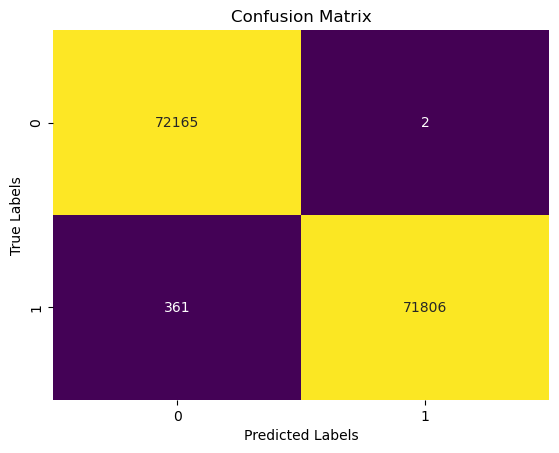

In [ ]:
confMat = confusion_matrix(y_test,yPredHyperCatBoosting)
sns.heatmap(confMat, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(format(classification_report(y_test,yPredHyperCatBoosting)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     72167
           1       1.00      0.99      1.00     72167

    accuracy                           1.00    144334
   macro avg       1.00      1.00      1.00    144334
weighted avg       1.00      1.00      1.00    144334



In [ ]:
print("f1 Score {}".format(f1_score(y_test,yPredHyperCatBoosting)))
print("Recall Score {}".format(recall_score(y_test,yPredHyperCatBoosting)))
print("Accuracy Score {}".format(accuracy_score(y_test,yPredHyperCatBoosting)))
print("Precision Score {}".format(precision_score(y_test,yPredHyperCatBoosting)))

f1 Score 0.9974787289459975
Recall Score 0.9949977136364266
Accuracy Score 0.9974850000692838
Precision Score 0.9999721479500892


# LightGBM

In [ ]:
lightGBM = LGBMClassifier()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_samples': [20, 50, 100]
}

In [ ]:
lgb_grid = RandomizedSearchCV(estimator=lightGBM,param_distributions=param_grid,cv=5,verbose=2,n_jobs=-1)

In [ ]:
lgb_grid.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 687742, number of negative: 360833
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.187803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 893
[LightGBM] [Info] Number of data points in the train set: 1048575, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.655883 -> initscore=0.644999
[LightGBM] [Info] Start training from score 0.644999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.5],
                                        'max_depth': [3, 5, 7],
                                        'min_child_samples': [20, 50, 100],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 1.0]},
                   verbose=2)

In [ ]:
print(lgb_grid.best_params_)

{'subsample': 0.8, 'n_estimators': 200, 'min_child_samples': 50, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


In [ ]:
print(lgb_grid.best_score_)

0.9984502777579095


In [ ]:
bestModelLightGBM = lgb_grid.best_estimator_

In [ ]:
bestModelLightGBM.fit(x_train,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 288666, number of negative: 288666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 577332, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier(learning_rate=0.01, max_depth=5, min_child_samples=50,
               n_estimators=200, subsample=0.8)

In [ ]:
yPredHyperLightGBM = bestModelLightGBM.predict(x_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


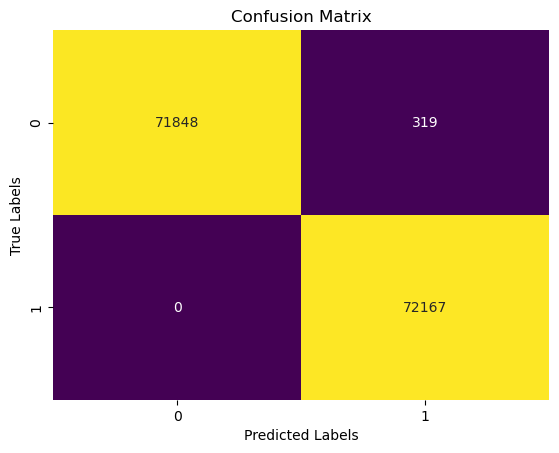

In [ ]:
confMat = confusion_matrix(y_test,yPredHyperLightGBM)
sns.heatmap(confMat, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(format(classification_report(y_test,yPredHyperLightGBM)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     72167
           1       1.00      1.00      1.00     72167

    accuracy                           1.00    144334
   macro avg       1.00      1.00      1.00    144334
weighted avg       1.00      1.00      1.00    144334



In [ ]:
print("f1 Score {}".format(f1_score(y_test,yPredHyperLightGBM)))
print("Recall Score {}".format(recall_score(y_test,yPredHyperLightGBM)))
print("Accuracy Score {}".format(accuracy_score(y_test,yPredHyperLightGBM)))
print("Precision Score {}".format(precision_score(y_test,yPredHyperLightGBM)))

f1 Score 0.997794722542913
Recall Score 1.0
Accuracy Score 0.9977898485457342
Precision Score 0.9955991501807245


# AdaBoosting

In [ ]:
adaBoosting = AdaBoostClassifier()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [ ]:
adb_grid = RandomizedSearchCV(estimator=adaBoosting,param_distributions=param_grid,cv=5,verbose=2,n_jobs=-1)

In [ ]:
adb_grid.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\rafi\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'n_estimators': [50, 100, 200]},
                   verbose=2)

In [ ]:
print(adb_grid.best_params_)

{'n_estimators': 100, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}


In [ ]:
print(adb_grid.best_score_)

0.9983310683546719


In [ ]:
bestModelAdaBoost = adb_grid.best_estimator_

In [ ]:
bestModelAdaBoost.fit(x_train,y_train)

C:\Users\rafi\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier(n_estimators=100)

In [ ]:
yPredHyperAdaBoost = bestModelAdaBoost.predict(x_test)

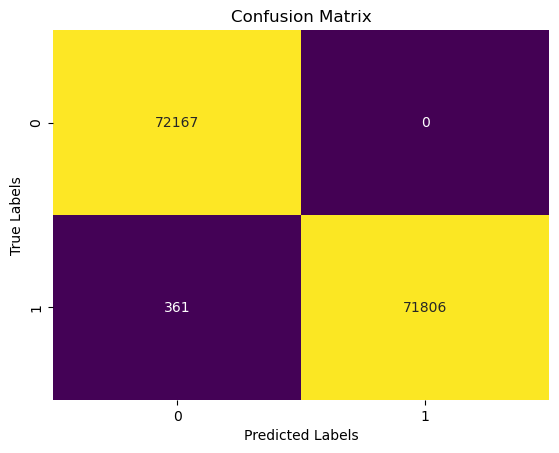

In [ ]:
confMat = confusion_matrix(y_test,yPredHyperAdaBoost)
sns.heatmap(confMat, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(format(classification_report(y_test,yPredHyperAdaBoost)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     72167
           1       1.00      0.99      1.00     72167

    accuracy                           1.00    144334
   macro avg       1.00      1.00      1.00    144334
weighted avg       1.00      1.00      1.00    144334



In [ ]:
print("f1 Score {}".format(f1_score(y_test,yPredHyperAdaBoost)))
print("Recall Score {}".format(recall_score(y_test,yPredHyperAdaBoost)))
print("Accuracy Score {}".format(accuracy_score(y_test,yPredHyperAdaBoost)))
print("Precision Score {}".format(precision_score(y_test,yPredHyperAdaBoost)))

f1 Score 0.9974925854153209
Recall Score 0.9949977136364266
Accuracy Score 0.9974988568182133
Precision Score 1.0


# XGBoost.

In [ ]:
xGBoost = XGBClassifier()

In [ ]:
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [0, 1, 10],
    'reg_alpha': [0, 1, 10]
}

In [ ]:
xb_grid = RandomizedSearchCV(estimator=xGBoost, param_distributions=param_grid, cv=5, scoring='accuracy')

In [ ]:
xb_grid.fit(x,y)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 6, 9],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 1, 10],
                                        'reg_lambda': [0, 1, 10],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='accuracy')

In [ ]:
print(xb_grid.best_params_)

{'subsample': 0.9, 'reg_lambda': 10, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}


In [ ]:
print(xb_grid.best_score_)

0.9983425124573827


In [ ]:
bestModelXgBoost = xb_grid.best_estimator_

In [ ]:
bestModelXgBoost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
yPredHyperXgBoost = bestModelXgBoost.predict(x_test)

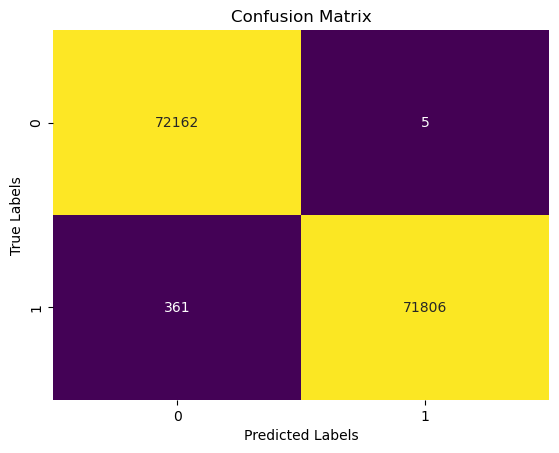

In [ ]:
confMat = confusion_matrix(y_test,yPredHyperXgBoost)
sns.heatmap(confMat, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(format(classification_report(y_test,yPredHyperXgBoost)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     72167
           1       1.00      0.99      1.00     72167

    accuracy                           1.00    144334
   macro avg       1.00      1.00      1.00    144334
weighted avg       1.00      1.00      1.00    144334



In [ ]:
print("f1 Score {}".format(f1_score(y_test,yPredHyperXgBoost)))
print("Recall Score {}".format(recall_score(y_test,yPredHyperXgBoost)))
print("Accuracy Score {}".format(accuracy_score(y_test,yPredHyperXgBoost)))
print("Precision Score {}".format(precision_score(y_test,yPredHyperXgBoost)))

f1 Score 0.9974579449638139
Recall Score 0.9949977136364266
Accuracy Score 0.9974642149458894
Precision Score 0.9999303727841139


# Logistic Regression

In [ ]:
logisticRegression = LogisticRegression()

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']  # For small datasets, 'liblinear' is usually a good choice
}

In [ ]:
lr_grid = RandomizedSearchCV(estimator=logisticRegression, param_distributions=param_grid, cv=5, scoring='accuracy')

In [ ]:
lr_grid.fit(x,y)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   scoring='accuracy')

In [ ]:
print(lr_grid.best_params_)

{'solver': 'liblinear', 'penalty': 'l2', 'C': 3792.690190732246}


In [ ]:
print(lr_grid.best_score_)

0.9983654006628043


In [ ]:
bestModelLogisticRegression = lr_grid.best_estimator_

In [ ]:
bestModelLogisticRegression.fit(x_train,y_train)

LogisticRegression(C=3792.690190732246, solver='liblinear')

In [ ]:
yPredHyperLogisticRegression = bestModelLogisticRegression.predict(x_test)

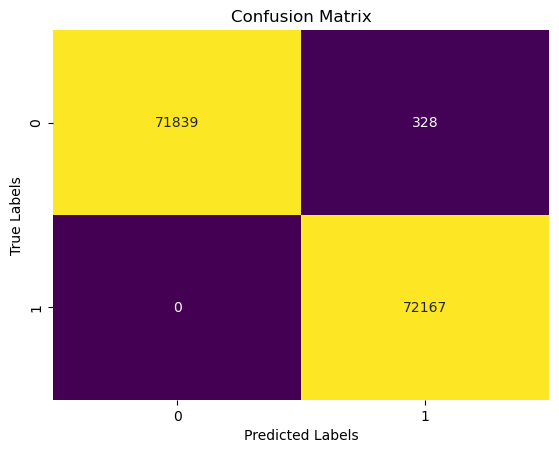

In [ ]:
confMat = confusion_matrix(y_test,yPredHyperLogisticRegression)
sns.heatmap(confMat, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(format(classification_report(y_test,yPredHyperLogisticRegression)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     72167
           1       1.00      1.00      1.00     72167

    accuracy                           1.00    144334
   macro avg       1.00      1.00      1.00    144334
weighted avg       1.00      1.00      1.00    144334



In [ ]:
print("f1 Score {}".format(f1_score(y_test,yPredHyperLogisticRegression)))
print("Recall Score {}".format(recall_score(y_test,yPredHyperLogisticRegression)))
print("Accuracy Score {}".format(accuracy_score(y_test,yPredHyperLogisticRegression)))
print("Precision Score {}".format(precision_score(y_test,yPredHyperLogisticRegression)))

f1 Score 0.9977326457535497
Recall Score 1.0
Accuracy Score 0.9977274931755512
Precision Score 0.9954755500379336


   # Decision Tree

In [ ]:
decisionTree = DecisionTreeClassifier()

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [ ]:
dt_grid = RandomizedSearchCV(estimator=decisionTree, param_distributions=param_grid, cv=5, scoring='accuracy')

In [ ]:
dt_grid.fit(x,y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='accuracy')

In [ ]:
print(dt_grid.best_params_)

{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'gini'}


In [ ]:
print(dt_grid.best_score_)

0.9984598145101685


In [ ]:
bestModelDecisionTree = dt_grid.best_estimator_

In [ ]:
bestModelDecisionTree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='log2', min_samples_split=5)

In [ ]:
yPredHyperDecisionTree = bestModelDecisionTree.predict(x_test)

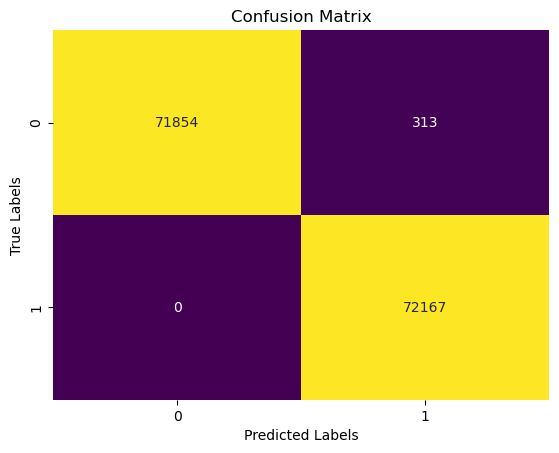

In [ ]:
confMat = confusion_matrix(y_test,yPredHyperDecisionTree)
sns.heatmap(confMat, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(format(classification_report(y_test,yPredHyperDecisionTree)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     72167
           1       1.00      1.00      1.00     72167

    accuracy                           1.00    144334
   macro avg       1.00      1.00      1.00    144334
weighted avg       1.00      1.00      1.00    144334



In [ ]:
print("f1 Score {}".format(f1_score(y_test,yPredHyperDecisionTree)))
print("Recall Score {}".format(recall_score(y_test,yPredHyperDecisionTree)))
print("Accuracy Score {}".format(accuracy_score(y_test,yPredHyperDecisionTree)))
print("Precision Score {}".format(precision_score(y_test,yPredHyperDecisionTree)))

NameError: name 'yPredHyperDecisionTree' is not defined

# Voting Classifier

In [ ]:
votingRandomForest = RandomForestClassifier(n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features='sqrt', max_depth=None, bootstrap=True)
votingGradientBoosting = GradientBoostingClassifier(subsample=1.0, n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_depth=3, learning_rate=0.1)
votingCatBoosting = CatBoostClassifier(learning_rate=0.1, l2_leaf_reg=9, depth=4)
votingLightGBM = LGBMClassifier(subsample=0.8, n_estimators=200, min_child_samples=50, max_depth=5, learning_rate=0.01, colsample_bytree=1.0)
votingAdaBoosting = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, algorithm='SAMME.R')
votingXGBoosting = XGBClassifier(subsample=0.9, reg_lambda=10, reg_alpha=0, n_estimators=100, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8)
votingLogisticRegression = LogisticRegression(solver='liblinear', penalty='l2', C=3792.690190732246)
votingDecisionTree = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=1, max_features='log2', max_depth=5, criterion='gini')

## Hard Voting

In [ ]:
estimators = [("lgbm",votingLightGBM),("Gb",votingGradientBoosting),("Lr",votingLogisticRegression),("Cb",votingCatBoosting),("Dt",votingDecisionTree),("Rf",votingRandomForest)]

In [ ]:
ProcessVotingClassifier = VotingClassifier(estimators=estimators,voting='hard')
result = cross_val_score(ProcessVotingClassifier,x,y,cv=10,scoring='accuracy')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 618968, number of negative: 324749
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 943717, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.655883 -> initscore=0.645001
[LightGBM] [Info] Start training from score 0.645001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

18:	learn: 0.0001095	total: 2.57s	remaining: 2m 12s
19:	learn: 0.0000852	total: 2.7s	remaining: 2m 12s
20:	learn: 0.0000852	total: 2.79s	remaining: 2m 10s
21:	learn: 0.0000852	total: 2.89s	remaining: 2m 8s
22:	learn: 0.0000852	total: 3s	remaining: 2m 7s
23:	learn: 0.0000846	total: 3.12s	remaining: 2m 7s
24:	learn: 0.0000851	total: 3.27s	remaining: 2m 7s
25:	learn: 0.0000851	total: 3.35s	remaining: 2m 5s
26:	learn: 0.0000851	total: 3.45s	remaining: 2m 4s
27:	learn: 0.0000851	total: 3.57s	remaining: 2m 4s
28:	learn: 0.0000851	total: 3.74s	remaining: 2m 5s
29:	learn: 0.0000851	total: 3.95s	remaining: 2m 7s
30:	learn: 0.0000851	total: 4.05s	remaining: 2m 6s
31:	learn: 0.0000851	total: 4.13s	remaining: 2m 5s
32:	learn: 0.0000851	total: 4.24s	remaining: 2m 4s
33:	learn: 0.0000851	total: 4.33s	remaining: 2m 2s
34:	learn: 0.0000851	total: 4.41s	remaining: 2m 1s
35:	learn: 0.0000851	total: 4.52s	remaining: 2m 1s
36:	learn: 0.0000851	total: 4.65s	remaining: 2m
37:	learn: 0.0000851	total: 4.77s	r

177:	learn: 0.0000851	total: 23s	remaining: 1m 46s
178:	learn: 0.0000851	total: 23.1s	remaining: 1m 45s
179:	learn: 0.0000851	total: 23.2s	remaining: 1m 45s
180:	learn: 0.0000851	total: 23.3s	remaining: 1m 45s
181:	learn: 0.0000851	total: 23.4s	remaining: 1m 45s
182:	learn: 0.0000851	total: 23.5s	remaining: 1m 44s
183:	learn: 0.0000851	total: 23.6s	remaining: 1m 44s
184:	learn: 0.0000851	total: 23.6s	remaining: 1m 44s
185:	learn: 0.0000851	total: 23.7s	remaining: 1m 43s
186:	learn: 0.0000851	total: 23.8s	remaining: 1m 43s
187:	learn: 0.0000851	total: 23.9s	remaining: 1m 43s
188:	learn: 0.0000851	total: 24s	remaining: 1m 43s
189:	learn: 0.0000851	total: 24.2s	remaining: 1m 43s
190:	learn: 0.0000851	total: 24.3s	remaining: 1m 42s
191:	learn: 0.0000851	total: 24.4s	remaining: 1m 42s
192:	learn: 0.0000851	total: 24.5s	remaining: 1m 42s
193:	learn: 0.0000851	total: 24.6s	remaining: 1m 42s
194:	learn: 0.0000851	total: 24.7s	remaining: 1m 41s
195:	learn: 0.0000851	total: 24.8s	remaining: 1m 4

334:	learn: 0.0000851	total: 38s	remaining: 1m 15s
335:	learn: 0.0000851	total: 38.1s	remaining: 1m 15s
336:	learn: 0.0000851	total: 38.2s	remaining: 1m 15s
337:	learn: 0.0000851	total: 38.3s	remaining: 1m 15s
338:	learn: 0.0000851	total: 38.4s	remaining: 1m 14s
339:	learn: 0.0000851	total: 38.5s	remaining: 1m 14s
340:	learn: 0.0000851	total: 38.6s	remaining: 1m 14s
341:	learn: 0.0000851	total: 38.7s	remaining: 1m 14s
342:	learn: 0.0000851	total: 38.8s	remaining: 1m 14s
343:	learn: 0.0000851	total: 38.9s	remaining: 1m 14s
344:	learn: 0.0000851	total: 38.9s	remaining: 1m 13s
345:	learn: 0.0000851	total: 39s	remaining: 1m 13s
346:	learn: 0.0000851	total: 39.1s	remaining: 1m 13s
347:	learn: 0.0000851	total: 39.2s	remaining: 1m 13s
348:	learn: 0.0000851	total: 39.3s	remaining: 1m 13s
349:	learn: 0.0000851	total: 39.4s	remaining: 1m 13s
350:	learn: 0.0000851	total: 39.5s	remaining: 1m 13s
351:	learn: 0.0000851	total: 39.6s	remaining: 1m 12s
352:	learn: 0.0000851	total: 39.7s	remaining: 1m 1

495:	learn: 0.0000851	total: 53.2s	remaining: 54.1s
496:	learn: 0.0000851	total: 53.3s	remaining: 54s
497:	learn: 0.0000851	total: 53.4s	remaining: 53.8s
498:	learn: 0.0000851	total: 53.5s	remaining: 53.7s
499:	learn: 0.0000851	total: 53.6s	remaining: 53.6s
500:	learn: 0.0000851	total: 53.7s	remaining: 53.5s
501:	learn: 0.0000851	total: 53.8s	remaining: 53.4s
502:	learn: 0.0000851	total: 53.9s	remaining: 53.2s
503:	learn: 0.0000851	total: 54s	remaining: 53.1s
504:	learn: 0.0000851	total: 54s	remaining: 53s
505:	learn: 0.0000851	total: 54.1s	remaining: 52.9s
506:	learn: 0.0000851	total: 54.2s	remaining: 52.7s
507:	learn: 0.0000851	total: 54.3s	remaining: 52.6s
508:	learn: 0.0000851	total: 54.4s	remaining: 52.5s
509:	learn: 0.0000851	total: 54.5s	remaining: 52.4s
510:	learn: 0.0000851	total: 54.6s	remaining: 52.2s
511:	learn: 0.0000851	total: 54.7s	remaining: 52.1s
512:	learn: 0.0000851	total: 54.8s	remaining: 52s
513:	learn: 0.0000851	total: 54.9s	remaining: 51.9s
514:	learn: 0.0000851	

655:	learn: 0.0000851	total: 1m 8s	remaining: 35.9s
656:	learn: 0.0000851	total: 1m 8s	remaining: 35.8s
657:	learn: 0.0000851	total: 1m 8s	remaining: 35.7s
658:	learn: 0.0000851	total: 1m 8s	remaining: 35.5s
659:	learn: 0.0000851	total: 1m 8s	remaining: 35.4s
660:	learn: 0.0000851	total: 1m 8s	remaining: 35.3s
661:	learn: 0.0000851	total: 1m 8s	remaining: 35.2s
662:	learn: 0.0000851	total: 1m 9s	remaining: 35.1s
663:	learn: 0.0000851	total: 1m 9s	remaining: 35s
664:	learn: 0.0000851	total: 1m 9s	remaining: 34.9s
665:	learn: 0.0000851	total: 1m 9s	remaining: 34.8s
666:	learn: 0.0000851	total: 1m 9s	remaining: 34.7s
667:	learn: 0.0000851	total: 1m 9s	remaining: 34.6s
668:	learn: 0.0000851	total: 1m 9s	remaining: 34.5s
669:	learn: 0.0000851	total: 1m 9s	remaining: 34.4s
670:	learn: 0.0000851	total: 1m 9s	remaining: 34.3s
671:	learn: 0.0000851	total: 1m 9s	remaining: 34.1s
672:	learn: 0.0000851	total: 1m 10s	remaining: 34s
673:	learn: 0.0000851	total: 1m 10s	remaining: 33.9s
674:	learn: 0.

813:	learn: 0.0000851	total: 1m 22s	remaining: 19s
814:	learn: 0.0000851	total: 1m 23s	remaining: 18.9s
815:	learn: 0.0000851	total: 1m 23s	remaining: 18.8s
816:	learn: 0.0000851	total: 1m 23s	remaining: 18.6s
817:	learn: 0.0000851	total: 1m 23s	remaining: 18.5s
818:	learn: 0.0000851	total: 1m 23s	remaining: 18.4s
819:	learn: 0.0000851	total: 1m 23s	remaining: 18.3s
820:	learn: 0.0000851	total: 1m 23s	remaining: 18.2s
821:	learn: 0.0000851	total: 1m 23s	remaining: 18.1s
822:	learn: 0.0000851	total: 1m 23s	remaining: 18s
823:	learn: 0.0000851	total: 1m 23s	remaining: 17.9s
824:	learn: 0.0000851	total: 1m 23s	remaining: 17.8s
825:	learn: 0.0000851	total: 1m 24s	remaining: 17.7s
826:	learn: 0.0000851	total: 1m 24s	remaining: 17.6s
827:	learn: 0.0000851	total: 1m 24s	remaining: 17.5s
828:	learn: 0.0000851	total: 1m 24s	remaining: 17.4s
829:	learn: 0.0000851	total: 1m 24s	remaining: 17.3s
830:	learn: 0.0000851	total: 1m 24s	remaining: 17.2s
831:	learn: 0.0000851	total: 1m 24s	remaining: 17.

970:	learn: 0.0000851	total: 1m 37s	remaining: 2.92s
971:	learn: 0.0000851	total: 1m 37s	remaining: 2.82s
972:	learn: 0.0000851	total: 1m 37s	remaining: 2.72s
973:	learn: 0.0000851	total: 1m 38s	remaining: 2.62s
974:	learn: 0.0000851	total: 1m 38s	remaining: 2.52s
975:	learn: 0.0000851	total: 1m 38s	remaining: 2.42s
976:	learn: 0.0000851	total: 1m 38s	remaining: 2.31s
977:	learn: 0.0000851	total: 1m 38s	remaining: 2.21s
978:	learn: 0.0000851	total: 1m 38s	remaining: 2.11s
979:	learn: 0.0000851	total: 1m 38s	remaining: 2.01s
980:	learn: 0.0000851	total: 1m 38s	remaining: 1.91s
981:	learn: 0.0000851	total: 1m 38s	remaining: 1.81s
982:	learn: 0.0000851	total: 1m 38s	remaining: 1.71s
983:	learn: 0.0000851	total: 1m 38s	remaining: 1.61s
984:	learn: 0.0000851	total: 1m 39s	remaining: 1.51s
985:	learn: 0.0000851	total: 1m 39s	remaining: 1.41s
986:	learn: 0.0000851	total: 1m 39s	remaining: 1.31s
987:	learn: 0.0000851	total: 1m 39s	remaining: 1.21s
988:	learn: 0.0000851	total: 1m 39s	remaining:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0:	learn: 0.3399980	total: 283ms	remaining: 4m 43s
1:	learn: 0.1498763	total: 841ms	remaining: 6m 59s
2:	learn: 0.0870980	total: 1.46s	remaining: 8m 5s
3:	learn: 0.0386295	total: 1.91s	remaining: 7m 55s
4:	learn: 0.0221970	total: 2.25s	remaining: 7m 

146:	learn: 0.0026198	total: 17.5s	remaining: 1m 41s
147:	learn: 0.0026198	total: 17.5s	remaining: 1m 40s
148:	learn: 0.0026198	total: 17.6s	remaining: 1m 40s
149:	learn: 0.0026198	total: 17.7s	remaining: 1m 40s
150:	learn: 0.0026198	total: 17.8s	remaining: 1m 39s
151:	learn: 0.0026198	total: 17.9s	remaining: 1m 39s
152:	learn: 0.0026198	total: 18s	remaining: 1m 39s
153:	learn: 0.0026198	total: 18.1s	remaining: 1m 39s
154:	learn: 0.0026198	total: 18.2s	remaining: 1m 38s
155:	learn: 0.0026198	total: 18.3s	remaining: 1m 39s
156:	learn: 0.0026198	total: 18.4s	remaining: 1m 39s
157:	learn: 0.0026198	total: 18.6s	remaining: 1m 39s
158:	learn: 0.0026198	total: 18.8s	remaining: 1m 39s
159:	learn: 0.0026198	total: 19.2s	remaining: 1m 40s
160:	learn: 0.0026198	total: 19.4s	remaining: 1m 41s
161:	learn: 0.0026198	total: 19.5s	remaining: 1m 40s
162:	learn: 0.0026198	total: 19.6s	remaining: 1m 40s
163:	learn: 0.0026198	total: 19.8s	remaining: 1m 40s
164:	learn: 0.0026198	total: 19.9s	remaining: 1m

303:	learn: 0.0026198	total: 45.3s	remaining: 1m 43s
304:	learn: 0.0026198	total: 45.4s	remaining: 1m 43s
305:	learn: 0.0026198	total: 45.5s	remaining: 1m 43s
306:	learn: 0.0026198	total: 45.6s	remaining: 1m 42s
307:	learn: 0.0026198	total: 45.7s	remaining: 1m 42s
308:	learn: 0.0026198	total: 45.8s	remaining: 1m 42s
309:	learn: 0.0026198	total: 45.9s	remaining: 1m 42s
310:	learn: 0.0026198	total: 46s	remaining: 1m 41s
311:	learn: 0.0026198	total: 46.1s	remaining: 1m 41s
312:	learn: 0.0026198	total: 46.2s	remaining: 1m 41s
313:	learn: 0.0026198	total: 46.3s	remaining: 1m 41s
314:	learn: 0.0026198	total: 46.4s	remaining: 1m 40s
315:	learn: 0.0026198	total: 46.4s	remaining: 1m 40s
316:	learn: 0.0026198	total: 46.5s	remaining: 1m 40s
317:	learn: 0.0026198	total: 46.6s	remaining: 1m 39s
318:	learn: 0.0026198	total: 46.7s	remaining: 1m 39s
319:	learn: 0.0026198	total: 46.8s	remaining: 1m 39s
320:	learn: 0.0026198	total: 46.8s	remaining: 1m 39s
321:	learn: 0.0026198	total: 46.9s	remaining: 1m

461:	learn: 0.0026198	total: 57.8s	remaining: 1m 7s
462:	learn: 0.0026198	total: 57.9s	remaining: 1m 7s
463:	learn: 0.0026198	total: 58s	remaining: 1m 6s
464:	learn: 0.0026198	total: 58s	remaining: 1m 6s
465:	learn: 0.0026198	total: 58.1s	remaining: 1m 6s
466:	learn: 0.0026198	total: 58.2s	remaining: 1m 6s
467:	learn: 0.0026198	total: 58.3s	remaining: 1m 6s
468:	learn: 0.0026198	total: 58.4s	remaining: 1m 6s
469:	learn: 0.0026198	total: 58.5s	remaining: 1m 5s
470:	learn: 0.0026198	total: 58.6s	remaining: 1m 5s
471:	learn: 0.0026198	total: 58.7s	remaining: 1m 5s
472:	learn: 0.0026198	total: 58.8s	remaining: 1m 5s
473:	learn: 0.0026198	total: 58.9s	remaining: 1m 5s
474:	learn: 0.0026198	total: 59s	remaining: 1m 5s
475:	learn: 0.0026198	total: 59.1s	remaining: 1m 5s
476:	learn: 0.0026198	total: 59.2s	remaining: 1m 4s
477:	learn: 0.0026198	total: 59.3s	remaining: 1m 4s
478:	learn: 0.0026198	total: 59.4s	remaining: 1m 4s
479:	learn: 0.0026198	total: 59.5s	remaining: 1m 4s
480:	learn: 0.0026

620:	learn: 0.0026198	total: 1m 12s	remaining: 44.1s
621:	learn: 0.0026198	total: 1m 12s	remaining: 44s
622:	learn: 0.0026198	total: 1m 12s	remaining: 43.8s
623:	learn: 0.0026198	total: 1m 12s	remaining: 43.7s
624:	learn: 0.0026198	total: 1m 12s	remaining: 43.6s
625:	learn: 0.0026198	total: 1m 12s	remaining: 43.4s
626:	learn: 0.0026198	total: 1m 12s	remaining: 43.3s
627:	learn: 0.0026198	total: 1m 12s	remaining: 43.2s
628:	learn: 0.0026198	total: 1m 13s	remaining: 43.1s
629:	learn: 0.0026198	total: 1m 13s	remaining: 43s
630:	learn: 0.0026198	total: 1m 13s	remaining: 42.8s
631:	learn: 0.0026198	total: 1m 13s	remaining: 42.7s
632:	learn: 0.0026198	total: 1m 13s	remaining: 42.6s
633:	learn: 0.0026198	total: 1m 13s	remaining: 42.4s
634:	learn: 0.0026198	total: 1m 13s	remaining: 42.3s
635:	learn: 0.0026198	total: 1m 13s	remaining: 42.2s
636:	learn: 0.0026198	total: 1m 13s	remaining: 42s
637:	learn: 0.0026198	total: 1m 13s	remaining: 41.9s
638:	learn: 0.0026198	total: 1m 13s	remaining: 41.8s

776:	learn: 0.0026198	total: 1m 24s	remaining: 24.3s
777:	learn: 0.0026198	total: 1m 24s	remaining: 24.1s
778:	learn: 0.0026198	total: 1m 24s	remaining: 24s
779:	learn: 0.0026198	total: 1m 24s	remaining: 23.9s
780:	learn: 0.0026198	total: 1m 24s	remaining: 23.8s
781:	learn: 0.0026198	total: 1m 24s	remaining: 23.7s
782:	learn: 0.0026198	total: 1m 24s	remaining: 23.6s
783:	learn: 0.0026198	total: 1m 25s	remaining: 23.4s
784:	learn: 0.0026198	total: 1m 25s	remaining: 23.3s
785:	learn: 0.0026198	total: 1m 25s	remaining: 23.2s
786:	learn: 0.0026198	total: 1m 25s	remaining: 23.1s
787:	learn: 0.0026198	total: 1m 25s	remaining: 23s
788:	learn: 0.0026198	total: 1m 25s	remaining: 22.9s
789:	learn: 0.0026198	total: 1m 25s	remaining: 22.7s
790:	learn: 0.0026198	total: 1m 25s	remaining: 22.6s
791:	learn: 0.0026198	total: 1m 25s	remaining: 22.5s
792:	learn: 0.0026198	total: 1m 25s	remaining: 22.4s
793:	learn: 0.0026198	total: 1m 25s	remaining: 22.3s
794:	learn: 0.0026198	total: 1m 26s	remaining: 22.

933:	learn: 0.0026198	total: 1m 37s	remaining: 6.86s
934:	learn: 0.0026198	total: 1m 37s	remaining: 6.75s
935:	learn: 0.0026198	total: 1m 37s	remaining: 6.65s
936:	learn: 0.0026198	total: 1m 37s	remaining: 6.54s
937:	learn: 0.0026198	total: 1m 37s	remaining: 6.43s
938:	learn: 0.0026198	total: 1m 37s	remaining: 6.33s
939:	learn: 0.0026198	total: 1m 37s	remaining: 6.22s
940:	learn: 0.0026198	total: 1m 37s	remaining: 6.12s
941:	learn: 0.0026198	total: 1m 37s	remaining: 6.01s
942:	learn: 0.0026198	total: 1m 37s	remaining: 5.91s
943:	learn: 0.0026198	total: 1m 37s	remaining: 5.8s
944:	learn: 0.0026198	total: 1m 37s	remaining: 5.7s
945:	learn: 0.0026198	total: 1m 37s	remaining: 5.59s
946:	learn: 0.0026198	total: 1m 38s	remaining: 5.49s
947:	learn: 0.0026198	total: 1m 38s	remaining: 5.38s
948:	learn: 0.0026198	total: 1m 38s	remaining: 5.28s
949:	learn: 0.0026198	total: 1m 38s	remaining: 5.17s
950:	learn: 0.0026198	total: 1m 38s	remaining: 5.07s
951:	learn: 0.0026198	total: 1m 38s	remaining: 4

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

110:	learn: 0.0026015	total: 9.7s	remaining: 1m 17s
111:	learn: 0.0026009	total: 9.77s	remaining: 1m 17s
112:	learn: 0.0026010	total: 9.85s	remaining: 1m 17s
113:	learn: 0.0026008	total: 9.94s	remaining: 1m 17s
114:	learn: 0.0026008	total: 10s	remaining: 1m 17s
115:	learn: 0.0026008	total: 10.1s	remaining: 1m 17s
116:	learn: 0.0026008	total: 10.2s	remaining: 1m 16s
117:	learn: 0.0026008	total: 10.3s	remaining: 1m 16s
118:	learn: 0.0026008	total: 10.3s	remaining: 1m 16s
119:	learn: 0.0026008	total: 10.4s	remaining: 1m 16s
120:	learn: 0.0026008	total: 10.5s	remaining: 1m 16s
121:	learn: 0.0025823	total: 10.6s	remaining: 1m 16s
122:	learn: 0.0025767	total: 10.8s	remaining: 1m 17s
123:	learn: 0.0025766	total: 10.9s	remaining: 1m 17s
124:	learn: 0.0025767	total: 11s	remaining: 1m 16s
125:	learn: 0.0025767	total: 11.1s	remaining: 1m 16s
126:	learn: 0.0025767	total: 11.2s	remaining: 1m 16s
127:	learn: 0.0025767	total: 11.2s	remaining: 1m 16s
128:	learn: 0.0025767	total: 11.3s	remaining: 1m 16

269:	learn: 0.0025767	total: 23.6s	remaining: 1m 3s
270:	learn: 0.0025767	total: 23.6s	remaining: 1m 3s
271:	learn: 0.0025767	total: 23.7s	remaining: 1m 3s
272:	learn: 0.0025767	total: 23.8s	remaining: 1m 3s
273:	learn: 0.0025767	total: 23.9s	remaining: 1m 3s
274:	learn: 0.0025767	total: 24s	remaining: 1m 3s
275:	learn: 0.0025767	total: 24.2s	remaining: 1m 3s
276:	learn: 0.0025767	total: 24.3s	remaining: 1m 3s
277:	learn: 0.0025767	total: 24.4s	remaining: 1m 3s
278:	learn: 0.0025767	total: 24.5s	remaining: 1m 3s
279:	learn: 0.0025767	total: 24.5s	remaining: 1m 3s
280:	learn: 0.0025767	total: 24.6s	remaining: 1m 3s
281:	learn: 0.0025767	total: 24.7s	remaining: 1m 2s
282:	learn: 0.0025767	total: 24.8s	remaining: 1m 2s
283:	learn: 0.0025767	total: 24.9s	remaining: 1m 2s
284:	learn: 0.0025767	total: 25s	remaining: 1m 2s
285:	learn: 0.0025767	total: 25.1s	remaining: 1m 2s
286:	learn: 0.0025767	total: 25.1s	remaining: 1m 2s
287:	learn: 0.0025767	total: 25.2s	remaining: 1m 2s
288:	learn: 0.00

431:	learn: 0.0025767	total: 37.7s	remaining: 49.5s
432:	learn: 0.0025767	total: 37.8s	remaining: 49.4s
433:	learn: 0.0025767	total: 37.8s	remaining: 49.3s
434:	learn: 0.0025767	total: 37.9s	remaining: 49.2s
435:	learn: 0.0025767	total: 38s	remaining: 49.1s
436:	learn: 0.0025767	total: 38.1s	remaining: 49s
437:	learn: 0.0025767	total: 38.1s	remaining: 48.9s
438:	learn: 0.0025767	total: 38.2s	remaining: 48.8s
439:	learn: 0.0025767	total: 38.3s	remaining: 48.7s
440:	learn: 0.0025767	total: 38.4s	remaining: 48.6s
441:	learn: 0.0025767	total: 38.4s	remaining: 48.5s
442:	learn: 0.0025767	total: 38.5s	remaining: 48.4s
443:	learn: 0.0025767	total: 38.6s	remaining: 48.3s
444:	learn: 0.0025767	total: 38.7s	remaining: 48.2s
445:	learn: 0.0025767	total: 38.7s	remaining: 48.1s
446:	learn: 0.0025767	total: 38.8s	remaining: 48s
447:	learn: 0.0025767	total: 38.9s	remaining: 47.9s
448:	learn: 0.0025767	total: 39s	remaining: 47.8s
449:	learn: 0.0025767	total: 39.1s	remaining: 47.8s
450:	learn: 0.002576

591:	learn: 0.0025767	total: 52.4s	remaining: 36.1s
592:	learn: 0.0025767	total: 52.5s	remaining: 36s
593:	learn: 0.0025767	total: 52.6s	remaining: 36s
594:	learn: 0.0025767	total: 52.7s	remaining: 35.9s
595:	learn: 0.0025767	total: 52.8s	remaining: 35.8s
596:	learn: 0.0025767	total: 52.9s	remaining: 35.7s
597:	learn: 0.0025767	total: 52.9s	remaining: 35.6s
598:	learn: 0.0025767	total: 53s	remaining: 35.5s
599:	learn: 0.0025767	total: 53.1s	remaining: 35.4s
600:	learn: 0.0025767	total: 53.2s	remaining: 35.3s
601:	learn: 0.0025767	total: 53.4s	remaining: 35.3s
602:	learn: 0.0025767	total: 53.4s	remaining: 35.2s
603:	learn: 0.0025767	total: 53.6s	remaining: 35.1s
604:	learn: 0.0025767	total: 53.6s	remaining: 35s
605:	learn: 0.0025767	total: 53.8s	remaining: 35s
606:	learn: 0.0025767	total: 53.8s	remaining: 34.9s
607:	learn: 0.0025767	total: 53.9s	remaining: 34.8s
608:	learn: 0.0025767	total: 54s	remaining: 34.7s
609:	learn: 0.0025767	total: 54.2s	remaining: 34.6s
610:	learn: 0.0025767	to

750:	learn: 0.0025767	total: 1m 12s	remaining: 24.1s
751:	learn: 0.0025767	total: 1m 12s	remaining: 24s
752:	learn: 0.0025767	total: 1m 12s	remaining: 23.9s
753:	learn: 0.0025767	total: 1m 13s	remaining: 23.8s
754:	learn: 0.0025767	total: 1m 13s	remaining: 23.7s
755:	learn: 0.0025767	total: 1m 13s	remaining: 23.6s
756:	learn: 0.0025767	total: 1m 13s	remaining: 23.5s
757:	learn: 0.0025767	total: 1m 13s	remaining: 23.4s
758:	learn: 0.0025767	total: 1m 13s	remaining: 23.3s
759:	learn: 0.0025767	total: 1m 13s	remaining: 23.2s
760:	learn: 0.0025767	total: 1m 13s	remaining: 23.2s
761:	learn: 0.0025767	total: 1m 13s	remaining: 23.1s
762:	learn: 0.0025767	total: 1m 13s	remaining: 23s
763:	learn: 0.0025767	total: 1m 14s	remaining: 22.9s
764:	learn: 0.0025767	total: 1m 14s	remaining: 22.8s
765:	learn: 0.0025767	total: 1m 14s	remaining: 22.7s
766:	learn: 0.0025767	total: 1m 14s	remaining: 22.6s
767:	learn: 0.0025767	total: 1m 14s	remaining: 22.5s
768:	learn: 0.0025767	total: 1m 14s	remaining: 22.

907:	learn: 0.0025767	total: 1m 29s	remaining: 9.07s
908:	learn: 0.0025767	total: 1m 29s	remaining: 8.97s
909:	learn: 0.0025767	total: 1m 29s	remaining: 8.87s
910:	learn: 0.0025767	total: 1m 29s	remaining: 8.77s
911:	learn: 0.0025767	total: 1m 29s	remaining: 8.66s
912:	learn: 0.0025767	total: 1m 29s	remaining: 8.56s
913:	learn: 0.0025767	total: 1m 29s	remaining: 8.47s
914:	learn: 0.0025767	total: 1m 30s	remaining: 8.37s
915:	learn: 0.0025767	total: 1m 30s	remaining: 8.27s
916:	learn: 0.0025767	total: 1m 30s	remaining: 8.17s
917:	learn: 0.0025767	total: 1m 30s	remaining: 8.07s
918:	learn: 0.0025767	total: 1m 30s	remaining: 7.97s
919:	learn: 0.0025767	total: 1m 30s	remaining: 7.87s
920:	learn: 0.0025767	total: 1m 30s	remaining: 7.77s
921:	learn: 0.0025767	total: 1m 30s	remaining: 7.67s
922:	learn: 0.0025767	total: 1m 30s	remaining: 7.57s
923:	learn: 0.0025767	total: 1m 30s	remaining: 7.47s
924:	learn: 0.0025767	total: 1m 30s	remaining: 7.37s
925:	learn: 0.0025767	total: 1m 30s	remaining:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

88:	learn: 0.0026677	total: 16.6s	remaining: 2m 49s
89:	learn: 0.0026676	total: 16.7s	remaining: 2m 49s
90:	learn: 0.0026660	total: 16.8s	remaining: 2m 48s
91:	learn: 0.0026667	total: 17s	remaining: 2m 47s
92:	learn: 0.0026667	total: 17.1s	remaining: 2m 46s
93:	learn: 0.0026667	total: 17.2s	remaining: 2m 45s
94:	learn: 0.0026667	total: 17.3s	remaining: 2m 44s
95:	learn: 0.0026667	total: 17.4s	remaining: 2m 44s
96:	learn: 0.0026677	total: 17.6s	remaining: 2m 43s
97:	learn: 0.0026677	total: 17.7s	remaining: 2m 42s
98:	learn: 0.0026673	total: 17.8s	remaining: 2m 41s
99:	learn: 0.0026673	total: 17.9s	remaining: 2m 41s
100:	learn: 0.0026681	total: 18s	remaining: 2m 40s
101:	learn: 0.0026681	total: 18.2s	remaining: 2m 39s
102:	learn: 0.0026609	total: 18.3s	remaining: 2m 39s
103:	learn: 0.0026617	total: 18.4s	remaining: 2m 38s
104:	learn: 0.0026617	total: 18.5s	remaining: 2m 37s
105:	learn: 0.0026617	total: 18.6s	remaining: 2m 37s
106:	learn: 0.0026617	total: 18.8s	remaining: 2m 36s
107:	lear

244:	learn: 0.0026608	total: 39.6s	remaining: 2m 1s
245:	learn: 0.0026608	total: 39.6s	remaining: 2m 1s
246:	learn: 0.0026608	total: 39.7s	remaining: 2m 1s
247:	learn: 0.0026608	total: 39.9s	remaining: 2m
248:	learn: 0.0026608	total: 40s	remaining: 2m
249:	learn: 0.0026608	total: 40.2s	remaining: 2m
250:	learn: 0.0026608	total: 40.4s	remaining: 2m
251:	learn: 0.0026608	total: 40.6s	remaining: 2m
252:	learn: 0.0026608	total: 40.8s	remaining: 2m
253:	learn: 0.0026608	total: 41.1s	remaining: 2m
254:	learn: 0.0026608	total: 41.3s	remaining: 2m
255:	learn: 0.0026608	total: 41.5s	remaining: 2m
256:	learn: 0.0026608	total: 41.7s	remaining: 2m
257:	learn: 0.0026608	total: 41.9s	remaining: 2m
258:	learn: 0.0026608	total: 42s	remaining: 2m
259:	learn: 0.0026608	total: 42.4s	remaining: 2m
260:	learn: 0.0026608	total: 42.8s	remaining: 2m 1s
261:	learn: 0.0026608	total: 43.1s	remaining: 2m 1s
262:	learn: 0.0026608	total: 43.4s	remaining: 2m 1s
263:	learn: 0.0026608	total: 43.7s	remaining: 2m 1s
264

402:	learn: 0.0026608	total: 59.1s	remaining: 1m 27s
403:	learn: 0.0026608	total: 59.2s	remaining: 1m 27s
404:	learn: 0.0026608	total: 59.3s	remaining: 1m 27s
405:	learn: 0.0026608	total: 59.4s	remaining: 1m 26s
406:	learn: 0.0026608	total: 59.5s	remaining: 1m 26s
407:	learn: 0.0026608	total: 59.6s	remaining: 1m 26s
408:	learn: 0.0026608	total: 59.7s	remaining: 1m 26s
409:	learn: 0.0026608	total: 59.7s	remaining: 1m 25s
410:	learn: 0.0026608	total: 59.8s	remaining: 1m 25s
411:	learn: 0.0026608	total: 59.9s	remaining: 1m 25s
412:	learn: 0.0026608	total: 60s	remaining: 1m 25s
413:	learn: 0.0026608	total: 1m	remaining: 1m 25s
414:	learn: 0.0026608	total: 1m	remaining: 1m 24s
415:	learn: 0.0026608	total: 1m	remaining: 1m 24s
416:	learn: 0.0026608	total: 1m	remaining: 1m 24s
417:	learn: 0.0026608	total: 1m	remaining: 1m 24s
418:	learn: 0.0026608	total: 1m	remaining: 1m 23s
419:	learn: 0.0026608	total: 1m	remaining: 1m 23s
420:	learn: 0.0026608	total: 1m	remaining: 1m 23s
421:	learn: 0.00266

561:	learn: 0.0026608	total: 1m 13s	remaining: 57.2s
562:	learn: 0.0026608	total: 1m 13s	remaining: 57.1s
563:	learn: 0.0026608	total: 1m 13s	remaining: 56.9s
564:	learn: 0.0026608	total: 1m 13s	remaining: 56.7s
565:	learn: 0.0026608	total: 1m 13s	remaining: 56.6s
566:	learn: 0.0026608	total: 1m 13s	remaining: 56.4s
567:	learn: 0.0026608	total: 1m 13s	remaining: 56.3s
568:	learn: 0.0026608	total: 1m 14s	remaining: 56.1s
569:	learn: 0.0026608	total: 1m 14s	remaining: 56s
570:	learn: 0.0026608	total: 1m 14s	remaining: 55.8s
571:	learn: 0.0026608	total: 1m 14s	remaining: 55.6s
572:	learn: 0.0026608	total: 1m 14s	remaining: 55.5s
573:	learn: 0.0026608	total: 1m 14s	remaining: 55.3s
574:	learn: 0.0026608	total: 1m 14s	remaining: 55.2s
575:	learn: 0.0026608	total: 1m 14s	remaining: 55s
576:	learn: 0.0026608	total: 1m 14s	remaining: 54.8s
577:	learn: 0.0026608	total: 1m 14s	remaining: 54.7s
578:	learn: 0.0026608	total: 1m 14s	remaining: 54.5s
579:	learn: 0.0026608	total: 1m 15s	remaining: 54.

719:	learn: 0.0026608	total: 1m 28s	remaining: 34.4s
720:	learn: 0.0026608	total: 1m 28s	remaining: 34.3s
721:	learn: 0.0026608	total: 1m 28s	remaining: 34.1s
722:	learn: 0.0026608	total: 1m 28s	remaining: 34s
723:	learn: 0.0026608	total: 1m 28s	remaining: 33.9s
724:	learn: 0.0026608	total: 1m 28s	remaining: 33.7s
725:	learn: 0.0026608	total: 1m 28s	remaining: 33.6s
726:	learn: 0.0026608	total: 1m 29s	remaining: 33.4s
727:	learn: 0.0026608	total: 1m 29s	remaining: 33.3s
728:	learn: 0.0026608	total: 1m 29s	remaining: 33.2s
729:	learn: 0.0026608	total: 1m 29s	remaining: 33s
730:	learn: 0.0026608	total: 1m 29s	remaining: 32.9s
731:	learn: 0.0026608	total: 1m 29s	remaining: 32.7s
732:	learn: 0.0026608	total: 1m 29s	remaining: 32.6s
733:	learn: 0.0026608	total: 1m 29s	remaining: 32.5s
734:	learn: 0.0026608	total: 1m 29s	remaining: 32.3s
735:	learn: 0.0026608	total: 1m 29s	remaining: 32.2s
736:	learn: 0.0026608	total: 1m 29s	remaining: 32.1s
737:	learn: 0.0026608	total: 1m 29s	remaining: 31.

875:	learn: 0.0026608	total: 1m 40s	remaining: 14.2s
876:	learn: 0.0026608	total: 1m 40s	remaining: 14.1s
877:	learn: 0.0026608	total: 1m 40s	remaining: 13.9s
878:	learn: 0.0026608	total: 1m 40s	remaining: 13.8s
879:	learn: 0.0026608	total: 1m 40s	remaining: 13.7s
880:	learn: 0.0026608	total: 1m 40s	remaining: 13.6s
881:	learn: 0.0026608	total: 1m 40s	remaining: 13.5s
882:	learn: 0.0026608	total: 1m 40s	remaining: 13.3s
883:	learn: 0.0026608	total: 1m 40s	remaining: 13.2s
884:	learn: 0.0026608	total: 1m 40s	remaining: 13.1s
885:	learn: 0.0026608	total: 1m 40s	remaining: 13s
886:	learn: 0.0026608	total: 1m 41s	remaining: 12.9s
887:	learn: 0.0026608	total: 1m 41s	remaining: 12.8s
888:	learn: 0.0026608	total: 1m 41s	remaining: 12.6s
889:	learn: 0.0026608	total: 1m 41s	remaining: 12.5s
890:	learn: 0.0026608	total: 1m 41s	remaining: 12.4s
891:	learn: 0.0026608	total: 1m 41s	remaining: 12.3s
892:	learn: 0.0026608	total: 1m 41s	remaining: 12.2s
893:	learn: 0.0026608	total: 1m 41s	remaining: 1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

44:	learn: 0.0026363	total: 6.83s	remaining: 2m 24s
45:	learn: 0.0026356	total: 6.93s	remaining: 2m 23s
46:	learn: 0.0026341	total: 7.03s	remaining: 2m 22s
47:	learn: 0.0026281	total: 7.13s	remaining: 2m 21s
48:	learn: 0.0026052	total: 7.25s	remaining: 2m 20s
49:	learn: 0.0026059	total: 7.34s	remaining: 2m 19s
50:	learn: 0.0026059	total: 7.43s	remaining: 2m 18s
51:	learn: 0.0025856	total: 7.57s	remaining: 2m 17s
52:	learn: 0.0025855	total: 7.66s	remaining: 2m 16s
53:	learn: 0.0025856	total: 7.75s	remaining: 2m 15s
54:	learn: 0.0025856	total: 7.86s	remaining: 2m 14s
55:	learn: 0.0025856	total: 7.95s	remaining: 2m 13s
56:	learn: 0.0025856	total: 8.06s	remaining: 2m 13s
57:	learn: 0.0025856	total: 8.17s	remaining: 2m 12s
58:	learn: 0.0025694	total: 8.3s	remaining: 2m 12s
59:	learn: 0.0025693	total: 8.41s	remaining: 2m 11s
60:	learn: 0.0025692	total: 8.54s	remaining: 2m 11s
61:	learn: 0.0025692	total: 8.64s	remaining: 2m 10s
62:	learn: 0.0025607	total: 8.76s	remaining: 2m 10s
63:	learn: 0.

201:	learn: 0.0025413	total: 26.2s	remaining: 1m 43s
202:	learn: 0.0025413	total: 26.3s	remaining: 1m 43s
203:	learn: 0.0025413	total: 26.4s	remaining: 1m 42s
204:	learn: 0.0025413	total: 26.5s	remaining: 1m 42s
205:	learn: 0.0025413	total: 26.6s	remaining: 1m 42s
206:	learn: 0.0025413	total: 26.6s	remaining: 1m 42s
207:	learn: 0.0025413	total: 26.7s	remaining: 1m 41s
208:	learn: 0.0025413	total: 26.8s	remaining: 1m 41s
209:	learn: 0.0025413	total: 26.9s	remaining: 1m 41s
210:	learn: 0.0025413	total: 27s	remaining: 1m 41s
211:	learn: 0.0025413	total: 27.1s	remaining: 1m 40s
212:	learn: 0.0025413	total: 27.2s	remaining: 1m 40s
213:	learn: 0.0025413	total: 27.3s	remaining: 1m 40s
214:	learn: 0.0025413	total: 27.4s	remaining: 1m 39s
215:	learn: 0.0025413	total: 27.5s	remaining: 1m 39s
216:	learn: 0.0025413	total: 27.6s	remaining: 1m 39s
217:	learn: 0.0025413	total: 27.7s	remaining: 1m 39s
218:	learn: 0.0025413	total: 27.7s	remaining: 1m 38s
219:	learn: 0.0025413	total: 27.8s	remaining: 1m

357:	learn: 0.0025413	total: 41.9s	remaining: 1m 15s
358:	learn: 0.0025413	total: 42.1s	remaining: 1m 15s
359:	learn: 0.0025413	total: 42.3s	remaining: 1m 15s
360:	learn: 0.0025413	total: 42.5s	remaining: 1m 15s
361:	learn: 0.0025413	total: 42.7s	remaining: 1m 15s
362:	learn: 0.0025413	total: 42.9s	remaining: 1m 15s
363:	learn: 0.0025413	total: 43.1s	remaining: 1m 15s
364:	learn: 0.0025413	total: 43.3s	remaining: 1m 15s
365:	learn: 0.0025413	total: 43.4s	remaining: 1m 15s
366:	learn: 0.0025413	total: 43.9s	remaining: 1m 15s
367:	learn: 0.0025413	total: 44s	remaining: 1m 15s
368:	learn: 0.0025413	total: 44.1s	remaining: 1m 15s
369:	learn: 0.0025413	total: 44.3s	remaining: 1m 15s
370:	learn: 0.0025413	total: 44.4s	remaining: 1m 15s
371:	learn: 0.0025413	total: 44.5s	remaining: 1m 15s
372:	learn: 0.0025413	total: 44.7s	remaining: 1m 15s
373:	learn: 0.0025413	total: 44.9s	remaining: 1m 15s
374:	learn: 0.0025413	total: 45.1s	remaining: 1m 15s
375:	learn: 0.0025413	total: 45.2s	remaining: 1m

516:	learn: 0.0025413	total: 59.3s	remaining: 55.4s
517:	learn: 0.0025413	total: 59.4s	remaining: 55.2s
518:	learn: 0.0025413	total: 59.5s	remaining: 55.1s
519:	learn: 0.0025413	total: 59.6s	remaining: 55s
520:	learn: 0.0025413	total: 59.7s	remaining: 54.9s
521:	learn: 0.0025413	total: 59.8s	remaining: 54.7s
522:	learn: 0.0025413	total: 59.9s	remaining: 54.6s
523:	learn: 0.0025413	total: 60s	remaining: 54.5s
524:	learn: 0.0025413	total: 1m	remaining: 54.3s
525:	learn: 0.0025413	total: 1m	remaining: 54.2s
526:	learn: 0.0025413	total: 1m	remaining: 54.1s
527:	learn: 0.0025413	total: 1m	remaining: 53.9s
528:	learn: 0.0025413	total: 1m	remaining: 53.8s
529:	learn: 0.0025413	total: 1m	remaining: 53.6s
530:	learn: 0.0025413	total: 1m	remaining: 53.5s
531:	learn: 0.0025413	total: 1m	remaining: 53.3s
532:	learn: 0.0025413	total: 1m	remaining: 53.2s
533:	learn: 0.0025413	total: 1m	remaining: 53s
534:	learn: 0.0025413	total: 1m	remaining: 52.9s
535:	learn: 0.0025413	total: 1m	remaining: 52.7s
53

677:	learn: 0.0025413	total: 1m 14s	remaining: 35.3s
678:	learn: 0.0025413	total: 1m 14s	remaining: 35.2s
679:	learn: 0.0025413	total: 1m 14s	remaining: 35s
680:	learn: 0.0025413	total: 1m 14s	remaining: 34.9s
681:	learn: 0.0025413	total: 1m 14s	remaining: 34.8s
682:	learn: 0.0025413	total: 1m 14s	remaining: 34.7s
683:	learn: 0.0025413	total: 1m 14s	remaining: 34.6s
684:	learn: 0.0025413	total: 1m 14s	remaining: 34.5s
685:	learn: 0.0025413	total: 1m 15s	remaining: 34.4s
686:	learn: 0.0025413	total: 1m 15s	remaining: 34.3s
687:	learn: 0.0025413	total: 1m 15s	remaining: 34.2s
688:	learn: 0.0025413	total: 1m 15s	remaining: 34.1s
689:	learn: 0.0025413	total: 1m 15s	remaining: 33.9s
690:	learn: 0.0025413	total: 1m 15s	remaining: 33.8s
691:	learn: 0.0025413	total: 1m 15s	remaining: 33.7s
692:	learn: 0.0025413	total: 1m 15s	remaining: 33.6s
693:	learn: 0.0025413	total: 1m 15s	remaining: 33.5s
694:	learn: 0.0025413	total: 1m 16s	remaining: 33.4s
695:	learn: 0.0025413	total: 1m 16s	remaining: 3

835:	learn: 0.0025413	total: 1m 29s	remaining: 17.5s
836:	learn: 0.0025413	total: 1m 29s	remaining: 17.4s
837:	learn: 0.0025413	total: 1m 29s	remaining: 17.3s
838:	learn: 0.0025413	total: 1m 29s	remaining: 17.2s
839:	learn: 0.0025413	total: 1m 29s	remaining: 17.1s
840:	learn: 0.0025413	total: 1m 29s	remaining: 16.9s
841:	learn: 0.0025413	total: 1m 29s	remaining: 16.8s
842:	learn: 0.0025413	total: 1m 29s	remaining: 16.7s
843:	learn: 0.0025413	total: 1m 29s	remaining: 16.6s
844:	learn: 0.0025413	total: 1m 29s	remaining: 16.5s
845:	learn: 0.0025413	total: 1m 30s	remaining: 16.4s
846:	learn: 0.0025413	total: 1m 30s	remaining: 16.3s
847:	learn: 0.0025413	total: 1m 30s	remaining: 16.2s
848:	learn: 0.0025413	total: 1m 30s	remaining: 16.1s
849:	learn: 0.0025413	total: 1m 30s	remaining: 16s
850:	learn: 0.0025413	total: 1m 30s	remaining: 15.9s
851:	learn: 0.0025413	total: 1m 30s	remaining: 15.7s
852:	learn: 0.0025413	total: 1m 30s	remaining: 15.6s
853:	learn: 0.0025413	total: 1m 30s	remaining: 1

992:	learn: 0.0025413	total: 1m 47s	remaining: 758ms
993:	learn: 0.0025413	total: 1m 47s	remaining: 650ms
994:	learn: 0.0025413	total: 1m 47s	remaining: 541ms
995:	learn: 0.0025413	total: 1m 47s	remaining: 433ms
996:	learn: 0.0025413	total: 1m 47s	remaining: 325ms
997:	learn: 0.0025413	total: 1m 48s	remaining: 216ms
998:	learn: 0.0025413	total: 1m 48s	remaining: 108ms
999:	learn: 0.0025413	total: 1m 48s	remaining: 0us
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 618968, number of negative: 324750
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019454 seconds.
You can set

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

10:	learn: 0.0034032	total: 1.19s	remaining: 1m 46s
11:	learn: 0.0033211	total: 1.29s	remaining: 1m 46s
12:	learn: 0.0031880	total: 1.4s	remaining: 1m 46s
13:	learn: 0.0030198	total: 1.5s	remaining: 1m 45s
14:	learn: 0.0029825	total: 1.63s	remaining: 1m 46s
15:	learn: 0.0029638	total: 1.75s	remaining: 1m 47s
16:	learn: 0.0029075	total: 1.87s	remaining: 1m 48s
17:	learn: 0.0028871	total: 1.99s	remaining: 1m 48s
18:	learn: 0.0028649	total: 2.08s	remaining: 1m 47s
19:	learn: 0.0027916	total: 2.18s	remaining: 1m 46s
20:	learn: 0.0027417	total: 2.27s	remaining: 1m 45s
21:	learn: 0.0027418	total: 2.35s	remaining: 1m 44s
22:	learn: 0.0027365	total: 2.43s	remaining: 1m 43s
23:	learn: 0.0026905	total: 2.51s	remaining: 1m 41s
24:	learn: 0.0026696	total: 2.6s	remaining: 1m 41s
25:	learn: 0.0026692	total: 2.68s	remaining: 1m 40s
26:	learn: 0.0026660	total: 2.76s	remaining: 1m 39s
27:	learn: 0.0026609	total: 2.85s	remaining: 1m 38s
28:	learn: 0.0026496	total: 2.94s	remaining: 1m 38s
29:	learn: 0.00

169:	learn: 0.0025254	total: 14.7s	remaining: 1m 11s
170:	learn: 0.0025254	total: 14.8s	remaining: 1m 11s
171:	learn: 0.0025254	total: 14.8s	remaining: 1m 11s
172:	learn: 0.0025254	total: 14.9s	remaining: 1m 11s
173:	learn: 0.0025254	total: 15s	remaining: 1m 11s
174:	learn: 0.0025254	total: 15.1s	remaining: 1m 11s
175:	learn: 0.0025254	total: 15.2s	remaining: 1m 11s
176:	learn: 0.0025254	total: 15.3s	remaining: 1m 10s
177:	learn: 0.0025254	total: 15.3s	remaining: 1m 10s
178:	learn: 0.0025254	total: 15.4s	remaining: 1m 10s
179:	learn: 0.0025254	total: 15.5s	remaining: 1m 10s
180:	learn: 0.0025254	total: 15.6s	remaining: 1m 10s
181:	learn: 0.0025254	total: 15.6s	remaining: 1m 10s
182:	learn: 0.0025254	total: 15.7s	remaining: 1m 10s
183:	learn: 0.0025254	total: 15.8s	remaining: 1m 10s
184:	learn: 0.0025254	total: 15.9s	remaining: 1m 9s
185:	learn: 0.0025254	total: 16s	remaining: 1m 9s
186:	learn: 0.0025254	total: 16s	remaining: 1m 9s
187:	learn: 0.0025254	total: 16.1s	remaining: 1m 9s
188

329:	learn: 0.0025254	total: 28.5s	remaining: 57.9s
330:	learn: 0.0025254	total: 28.6s	remaining: 57.8s
331:	learn: 0.0025254	total: 28.7s	remaining: 57.7s
332:	learn: 0.0025254	total: 28.8s	remaining: 57.6s
333:	learn: 0.0025254	total: 28.8s	remaining: 57.5s
334:	learn: 0.0025254	total: 28.9s	remaining: 57.4s
335:	learn: 0.0025254	total: 29s	remaining: 57.4s
336:	learn: 0.0025254	total: 29.1s	remaining: 57.3s
337:	learn: 0.0025254	total: 29.2s	remaining: 57.2s
338:	learn: 0.0025254	total: 29.3s	remaining: 57.1s
339:	learn: 0.0025254	total: 29.4s	remaining: 57.1s
340:	learn: 0.0025254	total: 29.5s	remaining: 57s
341:	learn: 0.0025254	total: 29.6s	remaining: 56.9s
342:	learn: 0.0025254	total: 29.6s	remaining: 56.8s
343:	learn: 0.0025254	total: 29.8s	remaining: 56.8s
344:	learn: 0.0025254	total: 29.9s	remaining: 56.7s
345:	learn: 0.0025254	total: 30s	remaining: 56.6s
346:	learn: 0.0025254	total: 30s	remaining: 56.5s
347:	learn: 0.0025254	total: 30.1s	remaining: 56.4s
348:	learn: 0.002525

488:	learn: 0.0025254	total: 41.7s	remaining: 43.6s
489:	learn: 0.0025254	total: 41.8s	remaining: 43.5s
490:	learn: 0.0025254	total: 41.9s	remaining: 43.4s
491:	learn: 0.0025254	total: 42s	remaining: 43.3s
492:	learn: 0.0025254	total: 42.1s	remaining: 43.3s
493:	learn: 0.0025254	total: 42.1s	remaining: 43.2s
494:	learn: 0.0025254	total: 42.2s	remaining: 43.1s
495:	learn: 0.0025254	total: 42.3s	remaining: 43s
496:	learn: 0.0025254	total: 42.4s	remaining: 42.9s
497:	learn: 0.0025254	total: 42.5s	remaining: 42.8s
498:	learn: 0.0025254	total: 42.5s	remaining: 42.7s
499:	learn: 0.0025254	total: 42.6s	remaining: 42.6s
500:	learn: 0.0025254	total: 42.7s	remaining: 42.5s
501:	learn: 0.0025254	total: 42.8s	remaining: 42.4s
502:	learn: 0.0025254	total: 42.9s	remaining: 42.4s
503:	learn: 0.0025254	total: 42.9s	remaining: 42.3s
504:	learn: 0.0025254	total: 43s	remaining: 42.2s
505:	learn: 0.0025254	total: 43.1s	remaining: 42.1s
506:	learn: 0.0025254	total: 43.2s	remaining: 42s
507:	learn: 0.002525

647:	learn: 0.0025254	total: 54.8s	remaining: 29.8s
648:	learn: 0.0025254	total: 54.9s	remaining: 29.7s
649:	learn: 0.0025254	total: 55s	remaining: 29.6s
650:	learn: 0.0025254	total: 55.1s	remaining: 29.5s
651:	learn: 0.0025254	total: 55.1s	remaining: 29.4s
652:	learn: 0.0025254	total: 55.2s	remaining: 29.4s
653:	learn: 0.0025254	total: 55.3s	remaining: 29.3s
654:	learn: 0.0025254	total: 55.4s	remaining: 29.2s
655:	learn: 0.0025254	total: 55.5s	remaining: 29.1s
656:	learn: 0.0025254	total: 55.6s	remaining: 29s
657:	learn: 0.0025254	total: 55.7s	remaining: 28.9s
658:	learn: 0.0025254	total: 55.8s	remaining: 28.9s
659:	learn: 0.0025254	total: 55.9s	remaining: 28.8s
660:	learn: 0.0025254	total: 56s	remaining: 28.7s
661:	learn: 0.0025254	total: 56.1s	remaining: 28.6s
662:	learn: 0.0025254	total: 56.2s	remaining: 28.6s
663:	learn: 0.0025254	total: 56.3s	remaining: 28.5s
664:	learn: 0.0025254	total: 56.4s	remaining: 28.4s
665:	learn: 0.0025254	total: 56.6s	remaining: 28.4s
666:	learn: 0.0025

807:	learn: 0.0025254	total: 1m 8s	remaining: 16.3s
808:	learn: 0.0025254	total: 1m 8s	remaining: 16.3s
809:	learn: 0.0025254	total: 1m 8s	remaining: 16.2s
810:	learn: 0.0025254	total: 1m 8s	remaining: 16.1s
811:	learn: 0.0025254	total: 1m 9s	remaining: 16s
812:	learn: 0.0025254	total: 1m 9s	remaining: 15.9s
813:	learn: 0.0025254	total: 1m 9s	remaining: 15.8s
814:	learn: 0.0025254	total: 1m 9s	remaining: 15.7s
815:	learn: 0.0025254	total: 1m 9s	remaining: 15.6s
816:	learn: 0.0025254	total: 1m 9s	remaining: 15.6s
817:	learn: 0.0025254	total: 1m 9s	remaining: 15.5s
818:	learn: 0.0025254	total: 1m 9s	remaining: 15.4s
819:	learn: 0.0025254	total: 1m 9s	remaining: 15.3s
820:	learn: 0.0025254	total: 1m 9s	remaining: 15.2s
821:	learn: 0.0025254	total: 1m 9s	remaining: 15.1s
822:	learn: 0.0025254	total: 1m 9s	remaining: 15s
823:	learn: 0.0025254	total: 1m 10s	remaining: 15s
824:	learn: 0.0025254	total: 1m 10s	remaining: 14.9s
825:	learn: 0.0025254	total: 1m 10s	remaining: 14.8s
826:	learn: 0.0

965:	learn: 0.0025254	total: 1m 21s	remaining: 2.87s
966:	learn: 0.0025254	total: 1m 21s	remaining: 2.78s
967:	learn: 0.0025254	total: 1m 21s	remaining: 2.7s
968:	learn: 0.0025254	total: 1m 21s	remaining: 2.62s
969:	learn: 0.0025254	total: 1m 21s	remaining: 2.53s
970:	learn: 0.0025254	total: 1m 21s	remaining: 2.45s
971:	learn: 0.0025254	total: 1m 21s	remaining: 2.36s
972:	learn: 0.0025254	total: 1m 22s	remaining: 2.28s
973:	learn: 0.0025254	total: 1m 22s	remaining: 2.19s
974:	learn: 0.0025254	total: 1m 22s	remaining: 2.11s
975:	learn: 0.0025254	total: 1m 22s	remaining: 2.02s
976:	learn: 0.0025254	total: 1m 22s	remaining: 1.94s
977:	learn: 0.0025254	total: 1m 22s	remaining: 1.85s
978:	learn: 0.0025254	total: 1m 22s	remaining: 1.77s
979:	learn: 0.0025254	total: 1m 22s	remaining: 1.69s
980:	learn: 0.0025254	total: 1m 22s	remaining: 1.6s
981:	learn: 0.0025254	total: 1m 22s	remaining: 1.52s
982:	learn: 0.0025254	total: 1m 22s	remaining: 1.43s
983:	learn: 0.0025254	total: 1m 22s	remaining: 1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0:	learn: 0.3370795	total: 105ms	remaining: 1m 44s
1:	learn: 0.1495990	total: 214ms	remaining: 1m 46s
2:	learn: 0.0859150	total: 339ms	remaining: 1m 52s
3:	learn: 0.0381941	total: 458ms	remaining: 1m 54s
4:	learn: 0.0218396	total: 565ms	remaining: 1m

144:	learn: 0.0025438	total: 16.1s	remaining: 1m 34s
145:	learn: 0.0025438	total: 16.2s	remaining: 1m 34s
146:	learn: 0.0025438	total: 16.3s	remaining: 1m 34s
147:	learn: 0.0025438	total: 16.4s	remaining: 1m 34s
148:	learn: 0.0025438	total: 16.5s	remaining: 1m 34s
149:	learn: 0.0025442	total: 16.6s	remaining: 1m 33s
150:	learn: 0.0025442	total: 16.7s	remaining: 1m 33s
151:	learn: 0.0025442	total: 16.8s	remaining: 1m 33s
152:	learn: 0.0025442	total: 16.8s	remaining: 1m 33s
153:	learn: 0.0025442	total: 16.9s	remaining: 1m 33s
154:	learn: 0.0025442	total: 17.1s	remaining: 1m 32s
155:	learn: 0.0025442	total: 17.3s	remaining: 1m 33s
156:	learn: 0.0025442	total: 17.4s	remaining: 1m 33s
157:	learn: 0.0025442	total: 17.5s	remaining: 1m 33s
158:	learn: 0.0025442	total: 17.7s	remaining: 1m 33s
159:	learn: 0.0025442	total: 17.9s	remaining: 1m 33s
160:	learn: 0.0025442	total: 18s	remaining: 1m 33s
161:	learn: 0.0025442	total: 18.1s	remaining: 1m 33s
162:	learn: 0.0025442	total: 18.2s	remaining: 1m

301:	learn: 0.0025442	total: 30.6s	remaining: 1m 10s
302:	learn: 0.0025442	total: 30.7s	remaining: 1m 10s
303:	learn: 0.0025442	total: 30.8s	remaining: 1m 10s
304:	learn: 0.0025442	total: 30.9s	remaining: 1m 10s
305:	learn: 0.0025442	total: 31.1s	remaining: 1m 10s
306:	learn: 0.0025442	total: 31.3s	remaining: 1m 10s
307:	learn: 0.0025442	total: 31.5s	remaining: 1m 10s
308:	learn: 0.0025442	total: 31.7s	remaining: 1m 10s
309:	learn: 0.0025442	total: 31.9s	remaining: 1m 10s
310:	learn: 0.0025442	total: 32.1s	remaining: 1m 11s
311:	learn: 0.0025442	total: 32.4s	remaining: 1m 11s
312:	learn: 0.0025442	total: 32.7s	remaining: 1m 11s
313:	learn: 0.0025442	total: 32.9s	remaining: 1m 11s
314:	learn: 0.0025442	total: 33s	remaining: 1m 11s
315:	learn: 0.0025442	total: 33.1s	remaining: 1m 11s
316:	learn: 0.0025442	total: 33.3s	remaining: 1m 11s
317:	learn: 0.0025442	total: 33.4s	remaining: 1m 11s
318:	learn: 0.0025442	total: 33.6s	remaining: 1m 11s
319:	learn: 0.0025442	total: 33.6s	remaining: 1m

461:	learn: 0.0025442	total: 47.2s	remaining: 55s
462:	learn: 0.0025442	total: 47.3s	remaining: 54.8s
463:	learn: 0.0025442	total: 47.4s	remaining: 54.7s
464:	learn: 0.0025442	total: 47.4s	remaining: 54.6s
465:	learn: 0.0025442	total: 47.5s	remaining: 54.4s
466:	learn: 0.0025442	total: 47.6s	remaining: 54.3s
467:	learn: 0.0025442	total: 47.7s	remaining: 54.2s
468:	learn: 0.0025442	total: 47.7s	remaining: 54.1s
469:	learn: 0.0025442	total: 47.8s	remaining: 53.9s
470:	learn: 0.0025442	total: 47.9s	remaining: 53.8s
471:	learn: 0.0025442	total: 48s	remaining: 53.7s
472:	learn: 0.0025442	total: 48s	remaining: 53.5s
473:	learn: 0.0025442	total: 48.1s	remaining: 53.4s
474:	learn: 0.0025442	total: 48.2s	remaining: 53.3s
475:	learn: 0.0025442	total: 48.3s	remaining: 53.2s
476:	learn: 0.0025442	total: 48.4s	remaining: 53s
477:	learn: 0.0025442	total: 48.5s	remaining: 52.9s
478:	learn: 0.0025442	total: 48.5s	remaining: 52.8s
479:	learn: 0.0025442	total: 48.6s	remaining: 52.7s
480:	learn: 0.002544

621:	learn: 0.0025442	total: 1m 1s	remaining: 37.1s
622:	learn: 0.0025442	total: 1m 1s	remaining: 37s
623:	learn: 0.0025442	total: 1m 1s	remaining: 36.9s
624:	learn: 0.0025442	total: 1m 1s	remaining: 36.8s
625:	learn: 0.0025442	total: 1m 1s	remaining: 36.6s
626:	learn: 0.0025442	total: 1m 1s	remaining: 36.5s
627:	learn: 0.0025442	total: 1m 1s	remaining: 36.4s
628:	learn: 0.0025442	total: 1m 1s	remaining: 36.3s
629:	learn: 0.0025442	total: 1m 1s	remaining: 36.2s
630:	learn: 0.0025442	total: 1m 1s	remaining: 36.1s
631:	learn: 0.0025442	total: 1m 1s	remaining: 36s
632:	learn: 0.0025442	total: 1m 1s	remaining: 35.9s
633:	learn: 0.0025442	total: 1m 1s	remaining: 35.8s
634:	learn: 0.0025442	total: 1m 2s	remaining: 35.6s
635:	learn: 0.0025442	total: 1m 2s	remaining: 35.5s
636:	learn: 0.0025442	total: 1m 2s	remaining: 35.4s
637:	learn: 0.0025442	total: 1m 2s	remaining: 35.3s
638:	learn: 0.0025442	total: 1m 2s	remaining: 35.2s
639:	learn: 0.0025442	total: 1m 2s	remaining: 35.1s
640:	learn: 0.00

779:	learn: 0.0025442	total: 1m 13s	remaining: 20.7s
780:	learn: 0.0025442	total: 1m 13s	remaining: 20.6s
781:	learn: 0.0025442	total: 1m 13s	remaining: 20.5s
782:	learn: 0.0025442	total: 1m 13s	remaining: 20.4s
783:	learn: 0.0025442	total: 1m 13s	remaining: 20.3s
784:	learn: 0.0025442	total: 1m 13s	remaining: 20.2s
785:	learn: 0.0025442	total: 1m 13s	remaining: 20.1s
786:	learn: 0.0025442	total: 1m 13s	remaining: 20s
787:	learn: 0.0025442	total: 1m 14s	remaining: 19.9s
788:	learn: 0.0025442	total: 1m 14s	remaining: 19.8s
789:	learn: 0.0025442	total: 1m 14s	remaining: 19.7s
790:	learn: 0.0025442	total: 1m 14s	remaining: 19.6s
791:	learn: 0.0025442	total: 1m 14s	remaining: 19.5s
792:	learn: 0.0025442	total: 1m 14s	remaining: 19.4s
793:	learn: 0.0025442	total: 1m 14s	remaining: 19.3s
794:	learn: 0.0025442	total: 1m 14s	remaining: 19.2s
795:	learn: 0.0025442	total: 1m 14s	remaining: 19.1s
796:	learn: 0.0025442	total: 1m 14s	remaining: 19s
797:	learn: 0.0025442	total: 1m 14s	remaining: 18.

935:	learn: 0.0025442	total: 1m 25s	remaining: 5.84s
936:	learn: 0.0025442	total: 1m 25s	remaining: 5.75s
937:	learn: 0.0025442	total: 1m 25s	remaining: 5.66s
938:	learn: 0.0025442	total: 1m 25s	remaining: 5.56s
939:	learn: 0.0025442	total: 1m 25s	remaining: 5.47s
940:	learn: 0.0025442	total: 1m 25s	remaining: 5.38s
941:	learn: 0.0025442	total: 1m 25s	remaining: 5.29s
942:	learn: 0.0025442	total: 1m 25s	remaining: 5.19s
943:	learn: 0.0025442	total: 1m 26s	remaining: 5.1s
944:	learn: 0.0025442	total: 1m 26s	remaining: 5.01s
945:	learn: 0.0025442	total: 1m 26s	remaining: 4.92s
946:	learn: 0.0025442	total: 1m 26s	remaining: 4.83s
947:	learn: 0.0025442	total: 1m 26s	remaining: 4.74s
948:	learn: 0.0025442	total: 1m 26s	remaining: 4.64s
949:	learn: 0.0025442	total: 1m 26s	remaining: 4.55s
950:	learn: 0.0025442	total: 1m 26s	remaining: 4.46s
951:	learn: 0.0025442	total: 1m 26s	remaining: 4.37s
952:	learn: 0.0025442	total: 1m 26s	remaining: 4.28s
953:	learn: 0.0025442	total: 1m 26s	remaining: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

121:	learn: 0.0025613	total: 13.4s	remaining: 1m 36s
122:	learn: 0.0025613	total: 13.4s	remaining: 1m 35s
123:	learn: 0.0025613	total: 13.5s	remaining: 1m 35s
124:	learn: 0.0025613	total: 13.7s	remaining: 1m 35s
125:	learn: 0.0025613	total: 13.8s	remaining: 1m 35s
126:	learn: 0.0025613	total: 13.9s	remaining: 1m 35s
127:	learn: 0.0025613	total: 14s	remaining: 1m 35s
128:	learn: 0.0025613	total: 14.1s	remaining: 1m 34s
129:	learn: 0.0025613	total: 14.1s	remaining: 1m 34s
130:	learn: 0.0025613	total: 14.2s	remaining: 1m 34s
131:	learn: 0.0025613	total: 14.3s	remaining: 1m 34s
132:	learn: 0.0025613	total: 14.4s	remaining: 1m 34s
133:	learn: 0.0025613	total: 14.5s	remaining: 1m 33s
134:	learn: 0.0025613	total: 14.6s	remaining: 1m 33s
135:	learn: 0.0025613	total: 14.7s	remaining: 1m 33s
136:	learn: 0.0025613	total: 14.8s	remaining: 1m 33s
137:	learn: 0.0025613	total: 14.9s	remaining: 1m 33s
138:	learn: 0.0025612	total: 15s	remaining: 1m 33s
139:	learn: 0.0025612	total: 15.1s	remaining: 1m 3

278:	learn: 0.0025612	total: 28.5s	remaining: 1m 13s
279:	learn: 0.0025612	total: 28.6s	remaining: 1m 13s
280:	learn: 0.0025612	total: 28.7s	remaining: 1m 13s
281:	learn: 0.0025612	total: 28.8s	remaining: 1m 13s
282:	learn: 0.0025612	total: 28.9s	remaining: 1m 13s
283:	learn: 0.0025612	total: 29s	remaining: 1m 13s
284:	learn: 0.0025612	total: 29.1s	remaining: 1m 13s
285:	learn: 0.0025612	total: 29.2s	remaining: 1m 12s
286:	learn: 0.0025612	total: 29.3s	remaining: 1m 12s
287:	learn: 0.0025612	total: 29.4s	remaining: 1m 12s
288:	learn: 0.0025612	total: 29.5s	remaining: 1m 12s
289:	learn: 0.0025612	total: 29.6s	remaining: 1m 12s
290:	learn: 0.0025612	total: 29.7s	remaining: 1m 12s
291:	learn: 0.0025612	total: 29.8s	remaining: 1m 12s
292:	learn: 0.0025612	total: 29.9s	remaining: 1m 12s
293:	learn: 0.0025612	total: 30s	remaining: 1m 12s
294:	learn: 0.0025612	total: 30.1s	remaining: 1m 11s
295:	learn: 0.0025612	total: 30.2s	remaining: 1m 11s
296:	learn: 0.0025612	total: 30.3s	remaining: 1m 1

439:	learn: 0.0025612	total: 44.9s	remaining: 57.2s
440:	learn: 0.0025612	total: 45s	remaining: 57s
441:	learn: 0.0025612	total: 45.1s	remaining: 56.9s
442:	learn: 0.0025612	total: 45.2s	remaining: 56.8s
443:	learn: 0.0025612	total: 45.2s	remaining: 56.6s
444:	learn: 0.0025612	total: 45.3s	remaining: 56.5s
445:	learn: 0.0025612	total: 45.4s	remaining: 56.4s
446:	learn: 0.0025612	total: 45.5s	remaining: 56.2s
447:	learn: 0.0025612	total: 45.5s	remaining: 56.1s
448:	learn: 0.0025612	total: 45.6s	remaining: 56s
449:	learn: 0.0025612	total: 45.7s	remaining: 55.9s
450:	learn: 0.0025612	total: 45.8s	remaining: 55.7s
451:	learn: 0.0025612	total: 45.9s	remaining: 55.6s
452:	learn: 0.0025612	total: 46s	remaining: 55.5s
453:	learn: 0.0025612	total: 46.1s	remaining: 55.4s
454:	learn: 0.0025612	total: 46.1s	remaining: 55.3s
455:	learn: 0.0025612	total: 46.2s	remaining: 55.1s
456:	learn: 0.0025612	total: 46.3s	remaining: 55s
457:	learn: 0.0025612	total: 46.4s	remaining: 54.9s
458:	learn: 0.0025612	

600:	learn: 0.0025612	total: 59.1s	remaining: 39.2s
601:	learn: 0.0025612	total: 59.3s	remaining: 39.2s
602:	learn: 0.0025612	total: 59.4s	remaining: 39.1s
603:	learn: 0.0025612	total: 59.5s	remaining: 39s
604:	learn: 0.0025612	total: 59.7s	remaining: 38.9s
605:	learn: 0.0025612	total: 59.8s	remaining: 38.9s
606:	learn: 0.0025612	total: 59.9s	remaining: 38.8s
607:	learn: 0.0025612	total: 60s	remaining: 38.7s
608:	learn: 0.0025612	total: 1m	remaining: 38.6s
609:	learn: 0.0025612	total: 1m	remaining: 38.5s
610:	learn: 0.0025612	total: 1m	remaining: 38.4s
611:	learn: 0.0025612	total: 1m	remaining: 38.3s
612:	learn: 0.0025612	total: 1m	remaining: 38.2s
613:	learn: 0.0025612	total: 1m	remaining: 38.1s
614:	learn: 0.0025612	total: 1m	remaining: 38s
615:	learn: 0.0025612	total: 1m	remaining: 37.9s
616:	learn: 0.0025612	total: 1m	remaining: 37.8s
617:	learn: 0.0025612	total: 1m 1s	remaining: 37.7s
618:	learn: 0.0025612	total: 1m 1s	remaining: 37.6s
619:	learn: 0.0025612	total: 1m 1s	remaining:

760:	learn: 0.0025612	total: 1m 16s	remaining: 24.2s
761:	learn: 0.0025612	total: 1m 17s	remaining: 24.1s
762:	learn: 0.0025612	total: 1m 17s	remaining: 24s
763:	learn: 0.0025612	total: 1m 17s	remaining: 23.9s
764:	learn: 0.0025612	total: 1m 17s	remaining: 23.8s
765:	learn: 0.0025612	total: 1m 17s	remaining: 23.7s
766:	learn: 0.0025612	total: 1m 17s	remaining: 23.6s
767:	learn: 0.0025612	total: 1m 17s	remaining: 23.4s
768:	learn: 0.0025612	total: 1m 17s	remaining: 23.3s
769:	learn: 0.0025612	total: 1m 17s	remaining: 23.2s
770:	learn: 0.0025612	total: 1m 17s	remaining: 23.1s
771:	learn: 0.0025612	total: 1m 18s	remaining: 23s
772:	learn: 0.0025612	total: 1m 18s	remaining: 22.9s
773:	learn: 0.0025612	total: 1m 18s	remaining: 22.8s
774:	learn: 0.0025612	total: 1m 18s	remaining: 22.7s
775:	learn: 0.0025612	total: 1m 18s	remaining: 22.7s
776:	learn: 0.0025612	total: 1m 18s	remaining: 22.6s
777:	learn: 0.0025612	total: 1m 18s	remaining: 22.5s
778:	learn: 0.0025612	total: 1m 19s	remaining: 22.

917:	learn: 0.0025612	total: 1m 33s	remaining: 8.34s
918:	learn: 0.0025612	total: 1m 33s	remaining: 8.24s
919:	learn: 0.0025612	total: 1m 33s	remaining: 8.14s
920:	learn: 0.0025612	total: 1m 33s	remaining: 8.04s
921:	learn: 0.0025612	total: 1m 33s	remaining: 7.93s
922:	learn: 0.0025612	total: 1m 33s	remaining: 7.83s
923:	learn: 0.0025612	total: 1m 33s	remaining: 7.73s
924:	learn: 0.0025612	total: 1m 34s	remaining: 7.63s
925:	learn: 0.0025612	total: 1m 34s	remaining: 7.53s
926:	learn: 0.0025612	total: 1m 34s	remaining: 7.43s
927:	learn: 0.0025612	total: 1m 34s	remaining: 7.33s
928:	learn: 0.0025612	total: 1m 34s	remaining: 7.22s
929:	learn: 0.0025612	total: 1m 34s	remaining: 7.12s
930:	learn: 0.0025612	total: 1m 34s	remaining: 7.02s
931:	learn: 0.0025612	total: 1m 34s	remaining: 6.92s
932:	learn: 0.0025612	total: 1m 34s	remaining: 6.82s
933:	learn: 0.0025612	total: 1m 35s	remaining: 6.72s
934:	learn: 0.0025612	total: 1m 35s	remaining: 6.61s
935:	learn: 0.0025612	total: 1m 35s	remaining:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

92:	learn: 0.0025163	total: 14.2s	remaining: 2m 18s
93:	learn: 0.0025163	total: 14.3s	remaining: 2m 17s
94:	learn: 0.0025163	total: 14.4s	remaining: 2m 17s
95:	learn: 0.0025163	total: 14.5s	remaining: 2m 16s
96:	learn: 0.0025163	total: 14.6s	remaining: 2m 16s
97:	learn: 0.0025163	total: 14.7s	remaining: 2m 15s
98:	learn: 0.0025163	total: 14.8s	remaining: 2m 14s
99:	learn: 0.0025163	total: 14.9s	remaining: 2m 14s
100:	learn: 0.0025163	total: 15.1s	remaining: 2m 14s
101:	learn: 0.0025163	total: 15.2s	remaining: 2m 13s
102:	learn: 0.0025163	total: 15.3s	remaining: 2m 13s
103:	learn: 0.0025170	total: 15.4s	remaining: 2m 13s
104:	learn: 0.0025170	total: 15.5s	remaining: 2m 12s
105:	learn: 0.0025170	total: 15.6s	remaining: 2m 11s
106:	learn: 0.0025170	total: 15.7s	remaining: 2m 11s
107:	learn: 0.0025166	total: 15.8s	remaining: 2m 10s
108:	learn: 0.0025162	total: 15.9s	remaining: 2m 10s
109:	learn: 0.0025162	total: 16s	remaining: 2m 9s
110:	learn: 0.0025162	total: 16.1s	remaining: 2m 9s
111:	

250:	learn: 0.0025137	total: 35.6s	remaining: 1m 46s
251:	learn: 0.0025137	total: 35.7s	remaining: 1m 45s
252:	learn: 0.0025137	total: 35.8s	remaining: 1m 45s
253:	learn: 0.0025137	total: 35.9s	remaining: 1m 45s
254:	learn: 0.0025137	total: 36s	remaining: 1m 45s
255:	learn: 0.0025137	total: 36.1s	remaining: 1m 44s
256:	learn: 0.0025137	total: 36.2s	remaining: 1m 44s
257:	learn: 0.0025137	total: 36.3s	remaining: 1m 44s
258:	learn: 0.0025137	total: 36.3s	remaining: 1m 43s
259:	learn: 0.0025137	total: 36.4s	remaining: 1m 43s
260:	learn: 0.0025137	total: 36.6s	remaining: 1m 43s
261:	learn: 0.0025137	total: 36.6s	remaining: 1m 43s
262:	learn: 0.0025137	total: 36.7s	remaining: 1m 42s
263:	learn: 0.0025137	total: 36.8s	remaining: 1m 42s
264:	learn: 0.0025137	total: 36.9s	remaining: 1m 42s
265:	learn: 0.0025137	total: 37s	remaining: 1m 42s
266:	learn: 0.0025137	total: 37.1s	remaining: 1m 41s
267:	learn: 0.0025137	total: 37.2s	remaining: 1m 41s
268:	learn: 0.0025137	total: 37.3s	remaining: 1m 4

407:	learn: 0.0025137	total: 55.1s	remaining: 1m 19s
408:	learn: 0.0025137	total: 55.2s	remaining: 1m 19s
409:	learn: 0.0025137	total: 55.4s	remaining: 1m 19s
410:	learn: 0.0025137	total: 55.6s	remaining: 1m 19s
411:	learn: 0.0025137	total: 55.8s	remaining: 1m 19s
412:	learn: 0.0025137	total: 56.1s	remaining: 1m 19s
413:	learn: 0.0025137	total: 56.3s	remaining: 1m 19s
414:	learn: 0.0025137	total: 56.5s	remaining: 1m 19s
415:	learn: 0.0025137	total: 56.7s	remaining: 1m 19s
416:	learn: 0.0025137	total: 56.9s	remaining: 1m 19s
417:	learn: 0.0025137	total: 57.1s	remaining: 1m 19s
418:	learn: 0.0025137	total: 57.4s	remaining: 1m 19s
419:	learn: 0.0025137	total: 57.6s	remaining: 1m 19s
420:	learn: 0.0025137	total: 57.8s	remaining: 1m 19s
421:	learn: 0.0025137	total: 58s	remaining: 1m 19s
422:	learn: 0.0025137	total: 58.2s	remaining: 1m 19s
423:	learn: 0.0025137	total: 58.4s	remaining: 1m 19s
424:	learn: 0.0025137	total: 58.6s	remaining: 1m 19s
425:	learn: 0.0025137	total: 58.7s	remaining: 1m

564:	learn: 0.0025137	total: 1m 20s	remaining: 1m 1s
565:	learn: 0.0025137	total: 1m 20s	remaining: 1m 1s
566:	learn: 0.0025137	total: 1m 20s	remaining: 1m 1s
567:	learn: 0.0025137	total: 1m 20s	remaining: 1m 1s
568:	learn: 0.0025137	total: 1m 20s	remaining: 1m
569:	learn: 0.0025137	total: 1m 20s	remaining: 1m
570:	learn: 0.0025137	total: 1m 20s	remaining: 1m
571:	learn: 0.0025137	total: 1m 20s	remaining: 1m
572:	learn: 0.0025137	total: 1m 20s	remaining: 1m
573:	learn: 0.0025137	total: 1m 21s	remaining: 1m
574:	learn: 0.0025137	total: 1m 21s	remaining: 1m
575:	learn: 0.0025137	total: 1m 21s	remaining: 59.8s
576:	learn: 0.0025137	total: 1m 21s	remaining: 59.7s
577:	learn: 0.0025137	total: 1m 21s	remaining: 59.5s
578:	learn: 0.0025137	total: 1m 21s	remaining: 59.4s
579:	learn: 0.0025137	total: 1m 21s	remaining: 59.2s
580:	learn: 0.0025137	total: 1m 21s	remaining: 59s
581:	learn: 0.0025137	total: 1m 21s	remaining: 58.8s
582:	learn: 0.0025137	total: 1m 22s	remaining: 58.7s
583:	learn: 0.00

720:	learn: 0.0025137	total: 1m 35s	remaining: 36.9s
721:	learn: 0.0025137	total: 1m 35s	remaining: 36.7s
722:	learn: 0.0025137	total: 1m 35s	remaining: 36.6s
723:	learn: 0.0025137	total: 1m 35s	remaining: 36.4s
724:	learn: 0.0025137	total: 1m 35s	remaining: 36.3s
725:	learn: 0.0025137	total: 1m 35s	remaining: 36.1s
726:	learn: 0.0025137	total: 1m 35s	remaining: 36s
727:	learn: 0.0025137	total: 1m 35s	remaining: 35.8s
728:	learn: 0.0025137	total: 1m 35s	remaining: 35.7s
729:	learn: 0.0025137	total: 1m 36s	remaining: 35.5s
730:	learn: 0.0025137	total: 1m 36s	remaining: 35.4s
731:	learn: 0.0025137	total: 1m 36s	remaining: 35.2s
732:	learn: 0.0025137	total: 1m 36s	remaining: 35.1s
733:	learn: 0.0025137	total: 1m 36s	remaining: 34.9s
734:	learn: 0.0025137	total: 1m 36s	remaining: 34.8s
735:	learn: 0.0025137	total: 1m 36s	remaining: 34.7s
736:	learn: 0.0025137	total: 1m 36s	remaining: 34.5s
737:	learn: 0.0025137	total: 1m 36s	remaining: 34.4s
738:	learn: 0.0025137	total: 1m 37s	remaining: 3

877:	learn: 0.0025137	total: 1m 51s	remaining: 15.5s
878:	learn: 0.0025137	total: 1m 51s	remaining: 15.4s
879:	learn: 0.0025137	total: 1m 51s	remaining: 15.3s
880:	learn: 0.0025137	total: 1m 52s	remaining: 15.1s
881:	learn: 0.0025137	total: 1m 52s	remaining: 15s
882:	learn: 0.0025137	total: 1m 52s	remaining: 14.9s
883:	learn: 0.0025137	total: 1m 52s	remaining: 14.7s
884:	learn: 0.0025137	total: 1m 52s	remaining: 14.6s
885:	learn: 0.0025137	total: 1m 52s	remaining: 14.5s
886:	learn: 0.0025137	total: 1m 52s	remaining: 14.3s
887:	learn: 0.0025137	total: 1m 52s	remaining: 14.2s
888:	learn: 0.0025137	total: 1m 52s	remaining: 14.1s
889:	learn: 0.0025137	total: 1m 52s	remaining: 13.9s
890:	learn: 0.0025137	total: 1m 52s	remaining: 13.8s
891:	learn: 0.0025137	total: 1m 53s	remaining: 13.7s
892:	learn: 0.0025137	total: 1m 53s	remaining: 13.6s
893:	learn: 0.0025137	total: 1m 53s	remaining: 13.4s
894:	learn: 0.0025137	total: 1m 53s	remaining: 13.3s
895:	learn: 0.0025137	total: 1m 53s	remaining: 1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

55:	learn: 0.0025511	total: 4.81s	remaining: 1m 21s
56:	learn: 0.0025511	total: 4.88s	remaining: 1m 20s
57:	learn: 0.0025511	total: 4.96s	remaining: 1m 20s
58:	learn: 0.0025511	total: 5.03s	remaining: 1m 20s
59:	learn: 0.0025511	total: 5.11s	remaining: 1m 20s
60:	learn: 0.0025511	total: 5.18s	remaining: 1m 19s
61:	learn: 0.0025511	total: 5.26s	remaining: 1m 19s
62:	learn: 0.0025511	total: 5.33s	remaining: 1m 19s
63:	learn: 0.0025431	total: 5.43s	remaining: 1m 19s
64:	learn: 0.0025326	total: 5.53s	remaining: 1m 19s
65:	learn: 0.0025329	total: 5.6s	remaining: 1m 19s
66:	learn: 0.0025329	total: 5.68s	remaining: 1m 19s
67:	learn: 0.0025329	total: 5.77s	remaining: 1m 19s
68:	learn: 0.0025329	total: 5.86s	remaining: 1m 19s
69:	learn: 0.0025329	total: 5.94s	remaining: 1m 18s
70:	learn: 0.0025329	total: 6.02s	remaining: 1m 18s
71:	learn: 0.0025329	total: 6.11s	remaining: 1m 18s
72:	learn: 0.0025329	total: 6.18s	remaining: 1m 18s
73:	learn: 0.0025329	total: 6.25s	remaining: 1m 18s
74:	learn: 0.

213:	learn: 0.0025216	total: 17.5s	remaining: 1m 4s
214:	learn: 0.0025216	total: 17.6s	remaining: 1m 4s
215:	learn: 0.0025216	total: 17.7s	remaining: 1m 4s
216:	learn: 0.0025216	total: 17.8s	remaining: 1m 4s
217:	learn: 0.0025216	total: 17.9s	remaining: 1m 4s
218:	learn: 0.0025216	total: 17.9s	remaining: 1m 4s
219:	learn: 0.0025216	total: 18s	remaining: 1m 3s
220:	learn: 0.0025216	total: 18.1s	remaining: 1m 3s
221:	learn: 0.0025216	total: 18.2s	remaining: 1m 3s
222:	learn: 0.0025216	total: 18.2s	remaining: 1m 3s
223:	learn: 0.0025216	total: 18.3s	remaining: 1m 3s
224:	learn: 0.0025216	total: 18.4s	remaining: 1m 3s
225:	learn: 0.0025216	total: 18.5s	remaining: 1m 3s
226:	learn: 0.0025216	total: 18.6s	remaining: 1m 3s
227:	learn: 0.0025216	total: 18.6s	remaining: 1m 3s
228:	learn: 0.0025216	total: 18.7s	remaining: 1m 3s
229:	learn: 0.0025216	total: 18.8s	remaining: 1m 2s
230:	learn: 0.0025216	total: 18.9s	remaining: 1m 2s
231:	learn: 0.0025216	total: 18.9s	remaining: 1m 2s
232:	learn: 0.

375:	learn: 0.0025216	total: 30.2s	remaining: 50.1s
376:	learn: 0.0025216	total: 30.3s	remaining: 50s
377:	learn: 0.0025216	total: 30.3s	remaining: 49.9s
378:	learn: 0.0025216	total: 30.4s	remaining: 49.8s
379:	learn: 0.0025216	total: 30.5s	remaining: 49.8s
380:	learn: 0.0025216	total: 30.6s	remaining: 49.7s
381:	learn: 0.0025216	total: 30.7s	remaining: 49.6s
382:	learn: 0.0025216	total: 30.7s	remaining: 49.5s
383:	learn: 0.0025216	total: 30.8s	remaining: 49.4s
384:	learn: 0.0025216	total: 30.9s	remaining: 49.3s
385:	learn: 0.0025216	total: 31s	remaining: 49.3s
386:	learn: 0.0025216	total: 31s	remaining: 49.2s
387:	learn: 0.0025216	total: 31.1s	remaining: 49.1s
388:	learn: 0.0025216	total: 31.2s	remaining: 49s
389:	learn: 0.0025216	total: 31.3s	remaining: 48.9s
390:	learn: 0.0025216	total: 31.3s	remaining: 48.8s
391:	learn: 0.0025216	total: 31.4s	remaining: 48.7s
392:	learn: 0.0025216	total: 31.5s	remaining: 48.6s
393:	learn: 0.0025216	total: 31.6s	remaining: 48.5s
394:	learn: 0.002521

536:	learn: 0.0025216	total: 43.4s	remaining: 37.4s
537:	learn: 0.0025216	total: 43.5s	remaining: 37.3s
538:	learn: 0.0025216	total: 43.5s	remaining: 37.2s
539:	learn: 0.0025216	total: 43.6s	remaining: 37.2s
540:	learn: 0.0025216	total: 43.7s	remaining: 37.1s
541:	learn: 0.0025216	total: 43.8s	remaining: 37s
542:	learn: 0.0025216	total: 43.9s	remaining: 36.9s
543:	learn: 0.0025216	total: 43.9s	remaining: 36.8s
544:	learn: 0.0025216	total: 44s	remaining: 36.7s
545:	learn: 0.0025216	total: 44.1s	remaining: 36.7s
546:	learn: 0.0025216	total: 44.2s	remaining: 36.6s
547:	learn: 0.0025216	total: 44.2s	remaining: 36.5s
548:	learn: 0.0025216	total: 44.3s	remaining: 36.4s
549:	learn: 0.0025216	total: 44.4s	remaining: 36.3s
550:	learn: 0.0025216	total: 44.4s	remaining: 36.2s
551:	learn: 0.0025216	total: 44.5s	remaining: 36.1s
552:	learn: 0.0025216	total: 44.6s	remaining: 36.1s
553:	learn: 0.0025216	total: 44.7s	remaining: 36s
554:	learn: 0.0025216	total: 44.8s	remaining: 35.9s
555:	learn: 0.0025

697:	learn: 0.0025216	total: 1m	remaining: 26.2s
698:	learn: 0.0025216	total: 1m	remaining: 26.2s
699:	learn: 0.0025216	total: 1m	remaining: 26.1s
700:	learn: 0.0025216	total: 1m	remaining: 26s
701:	learn: 0.0025216	total: 1m 1s	remaining: 25.9s
702:	learn: 0.0025216	total: 1m 1s	remaining: 25.8s
703:	learn: 0.0025216	total: 1m 1s	remaining: 25.8s
704:	learn: 0.0025216	total: 1m 1s	remaining: 25.7s
705:	learn: 0.0025216	total: 1m 1s	remaining: 25.6s
706:	learn: 0.0025216	total: 1m 1s	remaining: 25.5s
707:	learn: 0.0025216	total: 1m 1s	remaining: 25.5s
708:	learn: 0.0025216	total: 1m 1s	remaining: 25.4s
709:	learn: 0.0025216	total: 1m 1s	remaining: 25.3s
710:	learn: 0.0025216	total: 1m 2s	remaining: 25.2s
711:	learn: 0.0025216	total: 1m 2s	remaining: 25.2s
712:	learn: 0.0025216	total: 1m 2s	remaining: 25.1s
713:	learn: 0.0025216	total: 1m 2s	remaining: 25s
714:	learn: 0.0025216	total: 1m 2s	remaining: 24.9s
715:	learn: 0.0025216	total: 1m 2s	remaining: 24.8s
716:	learn: 0.0025216	total:

855:	learn: 0.0025216	total: 1m 16s	remaining: 12.8s
856:	learn: 0.0025216	total: 1m 16s	remaining: 12.8s
857:	learn: 0.0025216	total: 1m 16s	remaining: 12.7s
858:	learn: 0.0025216	total: 1m 16s	remaining: 12.6s
859:	learn: 0.0025216	total: 1m 16s	remaining: 12.5s
860:	learn: 0.0025216	total: 1m 16s	remaining: 12.4s
861:	learn: 0.0025216	total: 1m 16s	remaining: 12.3s
862:	learn: 0.0025216	total: 1m 17s	remaining: 12.2s
863:	learn: 0.0025216	total: 1m 17s	remaining: 12.1s
864:	learn: 0.0025216	total: 1m 17s	remaining: 12.1s
865:	learn: 0.0025216	total: 1m 17s	remaining: 12s
866:	learn: 0.0025216	total: 1m 17s	remaining: 11.9s
867:	learn: 0.0025216	total: 1m 17s	remaining: 11.8s
868:	learn: 0.0025216	total: 1m 17s	remaining: 11.7s
869:	learn: 0.0025216	total: 1m 17s	remaining: 11.6s
870:	learn: 0.0025216	total: 1m 17s	remaining: 11.5s
871:	learn: 0.0025216	total: 1m 17s	remaining: 11.4s
872:	learn: 0.0025216	total: 1m 17s	remaining: 11.3s
873:	learn: 0.0025216	total: 1m 18s	remaining: 1

In [ ]:
print(np.mean(result)*100)

99.83377520074768


## Soft Voting

In [ ]:
ProcessVotingClassifier = VotingClassifier(estimators=estimators,voting='soft')
result1 = cross_val_score(ProcessVotingClassifier,x,y,cv=5,scoring='accuracy')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 550194, number of negative: 288666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 832
[LightGBM] [Info] Number of data points in the train set: 838860, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.655883 -> initscore=0.645001
[LightGBM] [Info] Start training from score 0.645001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

14:	learn: 0.0002190	total: 1.64s	remaining: 1m 47s
15:	learn: 0.0001888	total: 1.72s	remaining: 1m 46s
16:	learn: 0.0001488	total: 1.83s	remaining: 1m 45s
17:	learn: 0.0001252	total: 1.92s	remaining: 1m 44s
18:	learn: 0.0001134	total: 2.01s	remaining: 1m 43s
19:	learn: 0.0001133	total: 2.1s	remaining: 1m 42s
20:	learn: 0.0001134	total: 2.19s	remaining: 1m 41s
21:	learn: 0.0000924	total: 2.29s	remaining: 1m 41s
22:	learn: 0.0000930	total: 2.38s	remaining: 1m 41s
23:	learn: 0.0000780	total: 2.49s	remaining: 1m 41s
24:	learn: 0.0000706	total: 2.59s	remaining: 1m 41s
25:	learn: 0.0000662	total: 2.69s	remaining: 1m 40s
26:	learn: 0.0000641	total: 2.78s	remaining: 1m 40s
27:	learn: 0.0000622	total: 2.87s	remaining: 1m 39s
28:	learn: 0.0000544	total: 2.98s	remaining: 1m 39s
29:	learn: 0.0000544	total: 3.06s	remaining: 1m 38s
30:	learn: 0.0000544	total: 3.15s	remaining: 1m 38s
31:	learn: 0.0000544	total: 3.24s	remaining: 1m 37s
32:	learn: 0.0000544	total: 3.32s	remaining: 1m 37s
33:	learn: 0.

171:	learn: 0.0000548	total: 17.4s	remaining: 1m 23s
172:	learn: 0.0000548	total: 17.5s	remaining: 1m 23s
173:	learn: 0.0000548	total: 17.6s	remaining: 1m 23s
174:	learn: 0.0000548	total: 17.7s	remaining: 1m 23s
175:	learn: 0.0000548	total: 17.8s	remaining: 1m 23s
176:	learn: 0.0000548	total: 17.9s	remaining: 1m 23s
177:	learn: 0.0000548	total: 18s	remaining: 1m 23s
178:	learn: 0.0000548	total: 18.1s	remaining: 1m 23s
179:	learn: 0.0000548	total: 18.2s	remaining: 1m 22s
180:	learn: 0.0000548	total: 18.3s	remaining: 1m 22s
181:	learn: 0.0000548	total: 18.4s	remaining: 1m 22s
182:	learn: 0.0000548	total: 18.5s	remaining: 1m 22s
183:	learn: 0.0000548	total: 18.6s	remaining: 1m 22s
184:	learn: 0.0000548	total: 18.7s	remaining: 1m 22s
185:	learn: 0.0000548	total: 18.8s	remaining: 1m 22s
186:	learn: 0.0000548	total: 18.9s	remaining: 1m 22s
187:	learn: 0.0000548	total: 19s	remaining: 1m 22s
188:	learn: 0.0000548	total: 19.1s	remaining: 1m 22s
189:	learn: 0.0000548	total: 19.2s	remaining: 1m 2

329:	learn: 0.0000548	total: 33.5s	remaining: 1m 8s
330:	learn: 0.0000548	total: 33.6s	remaining: 1m 7s
331:	learn: 0.0000548	total: 33.7s	remaining: 1m 7s
332:	learn: 0.0000548	total: 33.8s	remaining: 1m 7s
333:	learn: 0.0000548	total: 33.9s	remaining: 1m 7s
334:	learn: 0.0000548	total: 34s	remaining: 1m 7s
335:	learn: 0.0000548	total: 34.1s	remaining: 1m 7s
336:	learn: 0.0000548	total: 34.2s	remaining: 1m 7s
337:	learn: 0.0000548	total: 34.3s	remaining: 1m 7s
338:	learn: 0.0000548	total: 34.4s	remaining: 1m 7s
339:	learn: 0.0000548	total: 34.5s	remaining: 1m 6s
340:	learn: 0.0000548	total: 34.6s	remaining: 1m 6s
341:	learn: 0.0000548	total: 34.7s	remaining: 1m 6s
342:	learn: 0.0000548	total: 34.8s	remaining: 1m 6s
343:	learn: 0.0000548	total: 34.9s	remaining: 1m 6s
344:	learn: 0.0000548	total: 35s	remaining: 1m 6s
345:	learn: 0.0000548	total: 35.1s	remaining: 1m 6s
346:	learn: 0.0000548	total: 35.2s	remaining: 1m 6s
347:	learn: 0.0000548	total: 35.3s	remaining: 1m 6s
348:	learn: 0.00

489:	learn: 0.0000548	total: 51.7s	remaining: 53.8s
490:	learn: 0.0000548	total: 51.9s	remaining: 53.8s
491:	learn: 0.0000548	total: 52s	remaining: 53.7s
492:	learn: 0.0000548	total: 52.1s	remaining: 53.6s
493:	learn: 0.0000548	total: 52.2s	remaining: 53.5s
494:	learn: 0.0000548	total: 52.3s	remaining: 53.4s
495:	learn: 0.0000548	total: 52.4s	remaining: 53.3s
496:	learn: 0.0000548	total: 52.6s	remaining: 53.2s
497:	learn: 0.0000548	total: 52.7s	remaining: 53.1s
498:	learn: 0.0000548	total: 52.8s	remaining: 53s
499:	learn: 0.0000548	total: 52.9s	remaining: 52.9s
500:	learn: 0.0000548	total: 53s	remaining: 52.8s
501:	learn: 0.0000548	total: 53.1s	remaining: 52.7s
502:	learn: 0.0000548	total: 53.2s	remaining: 52.6s
503:	learn: 0.0000548	total: 53.4s	remaining: 52.5s
504:	learn: 0.0000548	total: 53.5s	remaining: 52.4s
505:	learn: 0.0000548	total: 53.6s	remaining: 52.3s
506:	learn: 0.0000548	total: 53.7s	remaining: 52.2s
507:	learn: 0.0000548	total: 53.8s	remaining: 52.1s
508:	learn: 0.0000

650:	learn: 0.0000548	total: 1m 8s	remaining: 36.8s
651:	learn: 0.0000548	total: 1m 8s	remaining: 36.7s
652:	learn: 0.0000548	total: 1m 8s	remaining: 36.6s
653:	learn: 0.0000548	total: 1m 8s	remaining: 36.4s
654:	learn: 0.0000548	total: 1m 8s	remaining: 36.3s
655:	learn: 0.0000548	total: 1m 9s	remaining: 36.2s
656:	learn: 0.0000548	total: 1m 9s	remaining: 36.1s
657:	learn: 0.0000548	total: 1m 9s	remaining: 36s
658:	learn: 0.0000548	total: 1m 9s	remaining: 35.9s
659:	learn: 0.0000548	total: 1m 9s	remaining: 35.8s
660:	learn: 0.0000548	total: 1m 9s	remaining: 35.7s
661:	learn: 0.0000548	total: 1m 9s	remaining: 35.6s
662:	learn: 0.0000548	total: 1m 9s	remaining: 35.5s
663:	learn: 0.0000548	total: 1m 9s	remaining: 35.4s
664:	learn: 0.0000548	total: 1m 10s	remaining: 35.3s
665:	learn: 0.0000548	total: 1m 10s	remaining: 35.2s
666:	learn: 0.0000548	total: 1m 10s	remaining: 35.1s
667:	learn: 0.0000548	total: 1m 10s	remaining: 34.9s
668:	learn: 0.0000548	total: 1m 10s	remaining: 34.8s
669:	lear

806:	learn: 0.0000548	total: 1m 28s	remaining: 21.2s
807:	learn: 0.0000548	total: 1m 28s	remaining: 21.1s
808:	learn: 0.0000548	total: 1m 28s	remaining: 20.9s
809:	learn: 0.0000548	total: 1m 28s	remaining: 20.8s
810:	learn: 0.0000548	total: 1m 28s	remaining: 20.7s
811:	learn: 0.0000548	total: 1m 28s	remaining: 20.6s
812:	learn: 0.0000548	total: 1m 29s	remaining: 20.5s
813:	learn: 0.0000548	total: 1m 29s	remaining: 20.4s
814:	learn: 0.0000548	total: 1m 29s	remaining: 20.3s
815:	learn: 0.0000548	total: 1m 29s	remaining: 20.2s
816:	learn: 0.0000548	total: 1m 29s	remaining: 20s
817:	learn: 0.0000548	total: 1m 29s	remaining: 19.9s
818:	learn: 0.0000548	total: 1m 29s	remaining: 19.8s
819:	learn: 0.0000548	total: 1m 29s	remaining: 19.7s
820:	learn: 0.0000548	total: 1m 29s	remaining: 19.6s
821:	learn: 0.0000548	total: 1m 29s	remaining: 19.5s
822:	learn: 0.0000548	total: 1m 30s	remaining: 19.4s
823:	learn: 0.0000548	total: 1m 30s	remaining: 19.2s
824:	learn: 0.0000548	total: 1m 30s	remaining: 1

962:	learn: 0.0000548	total: 1m 42s	remaining: 3.95s
963:	learn: 0.0000548	total: 1m 42s	remaining: 3.84s
964:	learn: 0.0000548	total: 1m 43s	remaining: 3.74s
965:	learn: 0.0000548	total: 1m 43s	remaining: 3.63s
966:	learn: 0.0000548	total: 1m 43s	remaining: 3.52s
967:	learn: 0.0000548	total: 1m 43s	remaining: 3.41s
968:	learn: 0.0000548	total: 1m 43s	remaining: 3.31s
969:	learn: 0.0000548	total: 1m 43s	remaining: 3.2s
970:	learn: 0.0000548	total: 1m 43s	remaining: 3.09s
971:	learn: 0.0000548	total: 1m 43s	remaining: 2.98s
972:	learn: 0.0000548	total: 1m 43s	remaining: 2.88s
973:	learn: 0.0000548	total: 1m 43s	remaining: 2.77s
974:	learn: 0.0000548	total: 1m 43s	remaining: 2.66s
975:	learn: 0.0000548	total: 1m 43s	remaining: 2.56s
976:	learn: 0.0000548	total: 1m 44s	remaining: 2.45s
977:	learn: 0.0000548	total: 1m 44s	remaining: 2.34s
978:	learn: 0.0000548	total: 1m 44s	remaining: 2.23s
979:	learn: 0.0000548	total: 1m 44s	remaining: 2.13s
980:	learn: 0.0000548	total: 1m 44s	remaining: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0:	learn: 0.3421814	total: 116ms	remaining: 1m 55s
1:	learn: 0.1714582	total: 232ms	remaining: 1m 55s
2:	learn: 0.0867789	total: 355ms	remaining: 1m 57s
3:	learn: 0.0420804	total: 473ms	remaining: 1m 57s
4:	learn: 0.0216057	total: 604ms	remaining: 2m
5:	learn: 0.0158239	total: 730ms	remaining: 2m
6:	learn: 0.0102465	total: 836ms	remaining: 1m 58s
7:	learn: 0.0073646	total: 937ms	remaining: 1m 56s


148:	learn: 0.0028905	total: 15.2s	remaining: 1m 26s
149:	learn: 0.0028905	total: 15.3s	remaining: 1m 26s
150:	learn: 0.0028905	total: 15.3s	remaining: 1m 26s
151:	learn: 0.0028905	total: 15.4s	remaining: 1m 25s
152:	learn: 0.0028905	total: 15.5s	remaining: 1m 25s
153:	learn: 0.0028905	total: 15.6s	remaining: 1m 25s
154:	learn: 0.0028905	total: 15.6s	remaining: 1m 25s
155:	learn: 0.0028905	total: 15.7s	remaining: 1m 24s
156:	learn: 0.0028905	total: 15.8s	remaining: 1m 24s
157:	learn: 0.0028905	total: 15.8s	remaining: 1m 24s
158:	learn: 0.0028905	total: 15.9s	remaining: 1m 24s
159:	learn: 0.0028905	total: 16s	remaining: 1m 23s
160:	learn: 0.0028905	total: 16.1s	remaining: 1m 23s
161:	learn: 0.0028905	total: 16.2s	remaining: 1m 23s
162:	learn: 0.0028905	total: 16.2s	remaining: 1m 23s
163:	learn: 0.0028905	total: 16.3s	remaining: 1m 23s
164:	learn: 0.0028905	total: 16.4s	remaining: 1m 22s
165:	learn: 0.0028905	total: 16.4s	remaining: 1m 22s
166:	learn: 0.0028905	total: 16.5s	remaining: 1m

306:	learn: 0.0028905	total: 28s	remaining: 1m 3s
307:	learn: 0.0028905	total: 28s	remaining: 1m 3s
308:	learn: 0.0028905	total: 28.1s	remaining: 1m 2s
309:	learn: 0.0028905	total: 28.2s	remaining: 1m 2s
310:	learn: 0.0028905	total: 28.3s	remaining: 1m 2s
311:	learn: 0.0028905	total: 28.4s	remaining: 1m 2s
312:	learn: 0.0028905	total: 28.5s	remaining: 1m 2s
313:	learn: 0.0028905	total: 28.6s	remaining: 1m 2s
314:	learn: 0.0028905	total: 28.7s	remaining: 1m 2s
315:	learn: 0.0028905	total: 28.8s	remaining: 1m 2s
316:	learn: 0.0028905	total: 28.9s	remaining: 1m 2s
317:	learn: 0.0028905	total: 28.9s	remaining: 1m 2s
318:	learn: 0.0028905	total: 29s	remaining: 1m 1s
319:	learn: 0.0028905	total: 29.1s	remaining: 1m 1s
320:	learn: 0.0028905	total: 29.2s	remaining: 1m 1s
321:	learn: 0.0028905	total: 29.3s	remaining: 1m 1s
322:	learn: 0.0028905	total: 29.4s	remaining: 1m 1s
323:	learn: 0.0028905	total: 29.5s	remaining: 1m 1s
324:	learn: 0.0028905	total: 29.6s	remaining: 1m 1s
325:	learn: 0.0028

467:	learn: 0.0028905	total: 39.6s	remaining: 45.1s
468:	learn: 0.0028905	total: 39.8s	remaining: 45s
469:	learn: 0.0028905	total: 39.9s	remaining: 45s
470:	learn: 0.0028905	total: 40s	remaining: 45s
471:	learn: 0.0028905	total: 40.2s	remaining: 44.9s
472:	learn: 0.0028905	total: 40.3s	remaining: 44.9s
473:	learn: 0.0028905	total: 40.4s	remaining: 44.8s
474:	learn: 0.0028905	total: 40.5s	remaining: 44.7s
475:	learn: 0.0028905	total: 40.5s	remaining: 44.6s
476:	learn: 0.0028905	total: 40.6s	remaining: 44.5s
477:	learn: 0.0028905	total: 40.7s	remaining: 44.4s
478:	learn: 0.0028905	total: 40.7s	remaining: 44.3s
479:	learn: 0.0028905	total: 40.8s	remaining: 44.2s
480:	learn: 0.0028905	total: 40.9s	remaining: 44.1s
481:	learn: 0.0028905	total: 41s	remaining: 44s
482:	learn: 0.0028905	total: 41.1s	remaining: 43.9s
483:	learn: 0.0028905	total: 41.1s	remaining: 43.8s
484:	learn: 0.0028905	total: 41.2s	remaining: 43.7s
485:	learn: 0.0028905	total: 41.3s	remaining: 43.6s
486:	learn: 0.0028905	to

628:	learn: 0.0028905	total: 52.2s	remaining: 30.8s
629:	learn: 0.0028905	total: 52.3s	remaining: 30.7s
630:	learn: 0.0028905	total: 52.4s	remaining: 30.6s
631:	learn: 0.0028905	total: 52.4s	remaining: 30.5s
632:	learn: 0.0028905	total: 52.5s	remaining: 30.5s
633:	learn: 0.0028905	total: 52.6s	remaining: 30.4s
634:	learn: 0.0028905	total: 52.7s	remaining: 30.3s
635:	learn: 0.0028905	total: 52.8s	remaining: 30.2s
636:	learn: 0.0028905	total: 52.8s	remaining: 30.1s
637:	learn: 0.0028905	total: 52.9s	remaining: 30s
638:	learn: 0.0028905	total: 53s	remaining: 29.9s
639:	learn: 0.0028905	total: 53.1s	remaining: 29.8s
640:	learn: 0.0028905	total: 53.1s	remaining: 29.8s
641:	learn: 0.0028905	total: 53.2s	remaining: 29.7s
642:	learn: 0.0028905	total: 53.3s	remaining: 29.6s
643:	learn: 0.0028905	total: 53.4s	remaining: 29.5s
644:	learn: 0.0028905	total: 53.4s	remaining: 29.4s
645:	learn: 0.0028905	total: 53.5s	remaining: 29.3s
646:	learn: 0.0028905	total: 53.6s	remaining: 29.2s
647:	learn: 0.00

788:	learn: 0.0028905	total: 1m 2s	remaining: 16.8s
789:	learn: 0.0028905	total: 1m 3s	remaining: 16.8s
790:	learn: 0.0028905	total: 1m 3s	remaining: 16.7s
791:	learn: 0.0028905	total: 1m 3s	remaining: 16.6s
792:	learn: 0.0028905	total: 1m 3s	remaining: 16.5s
793:	learn: 0.0028905	total: 1m 3s	remaining: 16.4s
794:	learn: 0.0028905	total: 1m 3s	remaining: 16.3s
795:	learn: 0.0028905	total: 1m 3s	remaining: 16.3s
796:	learn: 0.0028905	total: 1m 3s	remaining: 16.2s
797:	learn: 0.0028905	total: 1m 3s	remaining: 16.1s
798:	learn: 0.0028905	total: 1m 3s	remaining: 16s
799:	learn: 0.0028905	total: 1m 3s	remaining: 15.9s
800:	learn: 0.0028905	total: 1m 3s	remaining: 15.9s
801:	learn: 0.0028905	total: 1m 3s	remaining: 15.8s
802:	learn: 0.0028905	total: 1m 3s	remaining: 15.7s
803:	learn: 0.0028905	total: 1m 4s	remaining: 15.6s
804:	learn: 0.0028905	total: 1m 4s	remaining: 15.5s
805:	learn: 0.0028905	total: 1m 4s	remaining: 15.4s
806:	learn: 0.0028905	total: 1m 4s	remaining: 15.4s
807:	learn: 0.

946:	learn: 0.0028905	total: 1m 14s	remaining: 4.16s
947:	learn: 0.0028905	total: 1m 14s	remaining: 4.08s
948:	learn: 0.0028905	total: 1m 14s	remaining: 4s
949:	learn: 0.0028905	total: 1m 14s	remaining: 3.92s
950:	learn: 0.0028905	total: 1m 14s	remaining: 3.84s
951:	learn: 0.0028905	total: 1m 14s	remaining: 3.77s
952:	learn: 0.0028905	total: 1m 14s	remaining: 3.69s
953:	learn: 0.0028905	total: 1m 14s	remaining: 3.61s
954:	learn: 0.0028905	total: 1m 14s	remaining: 3.53s
955:	learn: 0.0028905	total: 1m 15s	remaining: 3.45s
956:	learn: 0.0028905	total: 1m 15s	remaining: 3.38s
957:	learn: 0.0028905	total: 1m 15s	remaining: 3.3s
958:	learn: 0.0028905	total: 1m 15s	remaining: 3.22s
959:	learn: 0.0028905	total: 1m 15s	remaining: 3.14s
960:	learn: 0.0028905	total: 1m 15s	remaining: 3.06s
961:	learn: 0.0028905	total: 1m 15s	remaining: 2.98s
962:	learn: 0.0028905	total: 1m 15s	remaining: 2.91s
963:	learn: 0.0028905	total: 1m 15s	remaining: 2.83s
964:	learn: 0.0028905	total: 1m 15s	remaining: 2.7

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

116:	learn: 0.0033089	total: 9.6s	remaining: 1m 12s
117:	learn: 0.0033089	total: 9.69s	remaining: 1m 12s
118:	learn: 0.0033089	total: 9.77s	remaining: 1m 12s
119:	learn: 0.0033089	total: 9.85s	remaining: 1m 12s
120:	learn: 0.0033089	total: 9.94s	remaining: 1m 12s
121:	learn: 0.0033089	total: 10s	remaining: 1m 12s
122:	learn: 0.0033089	total: 10.1s	remaining: 1m 12s
123:	learn: 0.0033089	total: 10.2s	remaining: 1m 11s
124:	learn: 0.0033089	total: 10.3s	remaining: 1m 11s
125:	learn: 0.0033089	total: 10.4s	remaining: 1m 11s
126:	learn: 0.0033089	total: 10.6s	remaining: 1m 12s
127:	learn: 0.0033089	total: 10.7s	remaining: 1m 13s
128:	learn: 0.0033089	total: 10.8s	remaining: 1m 13s
129:	learn: 0.0033089	total: 10.9s	remaining: 1m 13s
130:	learn: 0.0033089	total: 11s	remaining: 1m 13s
131:	learn: 0.0033089	total: 11.1s	remaining: 1m 13s
132:	learn: 0.0033089	total: 11.2s	remaining: 1m 13s
133:	learn: 0.0033089	total: 11.3s	remaining: 1m 13s
134:	learn: 0.0033089	total: 11.4s	remaining: 1m 13

276:	learn: 0.0033089	total: 23.6s	remaining: 1m 1s
277:	learn: 0.0033089	total: 23.7s	remaining: 1m 1s
278:	learn: 0.0033089	total: 23.8s	remaining: 1m 1s
279:	learn: 0.0033089	total: 23.9s	remaining: 1m 1s
280:	learn: 0.0033089	total: 23.9s	remaining: 1m 1s
281:	learn: 0.0033089	total: 24s	remaining: 1m 1s
282:	learn: 0.0033089	total: 24.1s	remaining: 1m 1s
283:	learn: 0.0033089	total: 24.2s	remaining: 1m 1s
284:	learn: 0.0033089	total: 24.3s	remaining: 1m
285:	learn: 0.0033089	total: 24.4s	remaining: 1m
286:	learn: 0.0033089	total: 24.5s	remaining: 1m
287:	learn: 0.0033089	total: 24.6s	remaining: 1m
288:	learn: 0.0033089	total: 24.7s	remaining: 1m
289:	learn: 0.0033089	total: 24.8s	remaining: 1m
290:	learn: 0.0033089	total: 24.8s	remaining: 1m
291:	learn: 0.0033089	total: 24.9s	remaining: 1m
292:	learn: 0.0033089	total: 25s	remaining: 1m
293:	learn: 0.0033089	total: 25.1s	remaining: 1m
294:	learn: 0.0033089	total: 25.2s	remaining: 1m
295:	learn: 0.0033089	total: 25.3s	remaining: 1m


437:	learn: 0.0033089	total: 37.9s	remaining: 48.6s
438:	learn: 0.0033089	total: 37.9s	remaining: 48.5s
439:	learn: 0.0033089	total: 38s	remaining: 48.4s
440:	learn: 0.0033089	total: 38.1s	remaining: 48.3s
441:	learn: 0.0033089	total: 38.2s	remaining: 48.2s
442:	learn: 0.0033089	total: 38.3s	remaining: 48.1s
443:	learn: 0.0033089	total: 38.4s	remaining: 48s
444:	learn: 0.0033089	total: 38.4s	remaining: 47.9s
445:	learn: 0.0033089	total: 38.5s	remaining: 47.9s
446:	learn: 0.0033089	total: 38.6s	remaining: 47.8s
447:	learn: 0.0033089	total: 38.7s	remaining: 47.7s
448:	learn: 0.0033089	total: 38.8s	remaining: 47.6s
449:	learn: 0.0033089	total: 38.8s	remaining: 47.5s
450:	learn: 0.0033089	total: 38.9s	remaining: 47.4s
451:	learn: 0.0033089	total: 39s	remaining: 47.3s
452:	learn: 0.0033089	total: 39.1s	remaining: 47.2s
453:	learn: 0.0033089	total: 39.2s	remaining: 47.1s
454:	learn: 0.0033089	total: 39.2s	remaining: 47s
455:	learn: 0.0033089	total: 39.3s	remaining: 46.9s
456:	learn: 0.003308

597:	learn: 0.0033089	total: 50.9s	remaining: 34.2s
598:	learn: 0.0033089	total: 51s	remaining: 34.1s
599:	learn: 0.0033089	total: 51.1s	remaining: 34s
600:	learn: 0.0033089	total: 51.1s	remaining: 34s
601:	learn: 0.0033089	total: 51.2s	remaining: 33.9s
602:	learn: 0.0033089	total: 51.3s	remaining: 33.8s
603:	learn: 0.0033089	total: 51.4s	remaining: 33.7s
604:	learn: 0.0033089	total: 51.5s	remaining: 33.6s
605:	learn: 0.0033089	total: 51.6s	remaining: 33.5s
606:	learn: 0.0033089	total: 51.6s	remaining: 33.4s
607:	learn: 0.0033089	total: 51.7s	remaining: 33.3s
608:	learn: 0.0033089	total: 51.8s	remaining: 33.3s
609:	learn: 0.0033089	total: 51.9s	remaining: 33.2s
610:	learn: 0.0033089	total: 52s	remaining: 33.1s
611:	learn: 0.0033089	total: 52s	remaining: 33s
612:	learn: 0.0033089	total: 52.1s	remaining: 32.9s
613:	learn: 0.0033089	total: 52.2s	remaining: 32.8s
614:	learn: 0.0033089	total: 52.3s	remaining: 32.7s
615:	learn: 0.0033089	total: 52.4s	remaining: 32.6s
616:	learn: 0.0033089	to

758:	learn: 0.0033089	total: 1m 4s	remaining: 20.4s
759:	learn: 0.0033089	total: 1m 4s	remaining: 20.3s
760:	learn: 0.0033089	total: 1m 4s	remaining: 20.2s
761:	learn: 0.0033089	total: 1m 4s	remaining: 20.1s
762:	learn: 0.0033089	total: 1m 4s	remaining: 20s
763:	learn: 0.0033089	total: 1m 4s	remaining: 20s
764:	learn: 0.0033089	total: 1m 4s	remaining: 19.9s
765:	learn: 0.0033089	total: 1m 4s	remaining: 19.8s
766:	learn: 0.0033089	total: 1m 4s	remaining: 19.7s
767:	learn: 0.0033089	total: 1m 4s	remaining: 19.6s
768:	learn: 0.0033089	total: 1m 4s	remaining: 19.5s
769:	learn: 0.0033089	total: 1m 5s	remaining: 19.4s
770:	learn: 0.0033089	total: 1m 5s	remaining: 19.4s
771:	learn: 0.0033089	total: 1m 5s	remaining: 19.3s
772:	learn: 0.0033089	total: 1m 5s	remaining: 19.2s
773:	learn: 0.0033089	total: 1m 5s	remaining: 19.1s
774:	learn: 0.0033089	total: 1m 5s	remaining: 19s
775:	learn: 0.0033089	total: 1m 5s	remaining: 18.9s
776:	learn: 0.0033089	total: 1m 5s	remaining: 18.8s
777:	learn: 0.0033

917:	learn: 0.0033089	total: 1m 17s	remaining: 6.88s
918:	learn: 0.0033089	total: 1m 17s	remaining: 6.8s
919:	learn: 0.0033089	total: 1m 17s	remaining: 6.71s
920:	learn: 0.0033089	total: 1m 17s	remaining: 6.63s
921:	learn: 0.0033089	total: 1m 17s	remaining: 6.54s
922:	learn: 0.0033089	total: 1m 17s	remaining: 6.46s
923:	learn: 0.0033089	total: 1m 17s	remaining: 6.38s
924:	learn: 0.0033089	total: 1m 17s	remaining: 6.29s
925:	learn: 0.0033089	total: 1m 17s	remaining: 6.21s
926:	learn: 0.0033089	total: 1m 17s	remaining: 6.12s
927:	learn: 0.0033089	total: 1m 17s	remaining: 6.04s
928:	learn: 0.0033089	total: 1m 17s	remaining: 5.95s
929:	learn: 0.0033089	total: 1m 18s	remaining: 5.87s
930:	learn: 0.0033089	total: 1m 18s	remaining: 5.79s
931:	learn: 0.0033089	total: 1m 18s	remaining: 5.7s
932:	learn: 0.0033089	total: 1m 18s	remaining: 5.62s
933:	learn: 0.0033089	total: 1m 18s	remaining: 5.53s
934:	learn: 0.0033089	total: 1m 18s	remaining: 5.45s
935:	learn: 0.0033089	total: 1m 18s	remaining: 5

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

105:	learn: 0.0028397	total: 10s	remaining: 1m 24s
106:	learn: 0.0028398	total: 10.1s	remaining: 1m 24s
107:	learn: 0.0028397	total: 10.2s	remaining: 1m 24s
108:	learn: 0.0028396	total: 10.3s	remaining: 1m 24s
109:	learn: 0.0028393	total: 10.4s	remaining: 1m 24s
110:	learn: 0.0028396	total: 10.5s	remaining: 1m 23s
111:	learn: 0.0028390	total: 10.6s	remaining: 1m 23s
112:	learn: 0.0028390	total: 10.7s	remaining: 1m 23s
113:	learn: 0.0028390	total: 10.8s	remaining: 1m 23s
114:	learn: 0.0028396	total: 10.8s	remaining: 1m 23s
115:	learn: 0.0028397	total: 10.9s	remaining: 1m 23s
116:	learn: 0.0028390	total: 11s	remaining: 1m 23s
117:	learn: 0.0028390	total: 11.1s	remaining: 1m 23s
118:	learn: 0.0028366	total: 11.2s	remaining: 1m 22s
119:	learn: 0.0028366	total: 11.3s	remaining: 1m 22s
120:	learn: 0.0028366	total: 11.4s	remaining: 1m 22s
121:	learn: 0.0028366	total: 11.5s	remaining: 1m 22s
122:	learn: 0.0028366	total: 11.6s	remaining: 1m 22s
123:	learn: 0.0028362	total: 11.7s	remaining: 1m 2

263:	learn: 0.0028345	total: 23.3s	remaining: 1m 4s
264:	learn: 0.0028345	total: 23.4s	remaining: 1m 4s
265:	learn: 0.0028345	total: 23.5s	remaining: 1m 4s
266:	learn: 0.0028345	total: 23.5s	remaining: 1m 4s
267:	learn: 0.0028345	total: 23.6s	remaining: 1m 4s
268:	learn: 0.0028345	total: 23.7s	remaining: 1m 4s
269:	learn: 0.0028345	total: 23.8s	remaining: 1m 4s
270:	learn: 0.0028345	total: 23.8s	remaining: 1m 4s
271:	learn: 0.0028345	total: 23.9s	remaining: 1m 3s
272:	learn: 0.0028345	total: 24s	remaining: 1m 3s
273:	learn: 0.0028345	total: 24.1s	remaining: 1m 3s
274:	learn: 0.0028345	total: 24.1s	remaining: 1m 3s
275:	learn: 0.0028345	total: 24.2s	remaining: 1m 3s
276:	learn: 0.0028345	total: 24.3s	remaining: 1m 3s
277:	learn: 0.0028345	total: 24.4s	remaining: 1m 3s
278:	learn: 0.0028345	total: 24.4s	remaining: 1m 3s
279:	learn: 0.0028345	total: 24.5s	remaining: 1m 3s
280:	learn: 0.0028345	total: 24.6s	remaining: 1m 2s
281:	learn: 0.0028345	total: 24.7s	remaining: 1m 2s
282:	learn: 0.

424:	learn: 0.0028345	total: 35.6s	remaining: 48.1s
425:	learn: 0.0028345	total: 35.6s	remaining: 48s
426:	learn: 0.0028345	total: 35.7s	remaining: 47.9s
427:	learn: 0.0028345	total: 35.8s	remaining: 47.8s
428:	learn: 0.0028345	total: 35.9s	remaining: 47.7s
429:	learn: 0.0028345	total: 35.9s	remaining: 47.6s
430:	learn: 0.0028345	total: 36s	remaining: 47.5s
431:	learn: 0.0028345	total: 36.1s	remaining: 47.4s
432:	learn: 0.0028345	total: 36.2s	remaining: 47.4s
433:	learn: 0.0028345	total: 36.2s	remaining: 47.3s
434:	learn: 0.0028345	total: 36.3s	remaining: 47.2s
435:	learn: 0.0028345	total: 36.4s	remaining: 47.1s
436:	learn: 0.0028345	total: 36.5s	remaining: 47s
437:	learn: 0.0028345	total: 36.5s	remaining: 46.9s
438:	learn: 0.0028345	total: 36.6s	remaining: 46.8s
439:	learn: 0.0028345	total: 36.7s	remaining: 46.7s
440:	learn: 0.0028345	total: 36.8s	remaining: 46.6s
441:	learn: 0.0028345	total: 36.8s	remaining: 46.5s
442:	learn: 0.0028345	total: 36.9s	remaining: 46.4s
443:	learn: 0.0028

583:	learn: 0.0028345	total: 47.8s	remaining: 34.1s
584:	learn: 0.0028345	total: 47.9s	remaining: 34s
585:	learn: 0.0028345	total: 48s	remaining: 33.9s
586:	learn: 0.0028345	total: 48.1s	remaining: 33.8s
587:	learn: 0.0028345	total: 48.1s	remaining: 33.7s
588:	learn: 0.0028345	total: 48.2s	remaining: 33.7s
589:	learn: 0.0028345	total: 48.3s	remaining: 33.6s
590:	learn: 0.0028345	total: 48.4s	remaining: 33.5s
591:	learn: 0.0028345	total: 48.5s	remaining: 33.4s
592:	learn: 0.0028345	total: 48.5s	remaining: 33.3s
593:	learn: 0.0028345	total: 48.6s	remaining: 33.2s
594:	learn: 0.0028345	total: 48.7s	remaining: 33.1s
595:	learn: 0.0028345	total: 48.8s	remaining: 33s
596:	learn: 0.0028345	total: 48.8s	remaining: 33s
597:	learn: 0.0028345	total: 48.9s	remaining: 32.9s
598:	learn: 0.0028345	total: 49s	remaining: 32.8s
599:	learn: 0.0028345	total: 49.1s	remaining: 32.7s
600:	learn: 0.0028345	total: 49.1s	remaining: 32.6s
601:	learn: 0.0028345	total: 49.2s	remaining: 32.5s
602:	learn: 0.0028345	

742:	learn: 0.0028345	total: 59.9s	remaining: 20.7s
743:	learn: 0.0028345	total: 60s	remaining: 20.6s
744:	learn: 0.0028345	total: 1m	remaining: 20.5s
745:	learn: 0.0028345	total: 1m	remaining: 20.5s
746:	learn: 0.0028345	total: 1m	remaining: 20.4s
747:	learn: 0.0028345	total: 1m	remaining: 20.3s
748:	learn: 0.0028345	total: 1m	remaining: 20.2s
749:	learn: 0.0028345	total: 1m	remaining: 20.1s
750:	learn: 0.0028345	total: 1m	remaining: 20.1s
751:	learn: 0.0028345	total: 1m	remaining: 20s
752:	learn: 0.0028345	total: 1m	remaining: 19.9s
753:	learn: 0.0028345	total: 1m	remaining: 19.8s
754:	learn: 0.0028345	total: 1m	remaining: 19.7s
755:	learn: 0.0028345	total: 1m	remaining: 19.6s
756:	learn: 0.0028345	total: 1m	remaining: 19.6s
757:	learn: 0.0028345	total: 1m 1s	remaining: 19.5s
758:	learn: 0.0028345	total: 1m 1s	remaining: 19.4s
759:	learn: 0.0028345	total: 1m 1s	remaining: 19.3s
760:	learn: 0.0028345	total: 1m 1s	remaining: 19.2s
761:	learn: 0.0028345	total: 1m 1s	remaining: 19.2s
762

903:	learn: 0.0028345	total: 1m 14s	remaining: 7.9s
904:	learn: 0.0028345	total: 1m 14s	remaining: 7.82s
905:	learn: 0.0028345	total: 1m 14s	remaining: 7.73s
906:	learn: 0.0028345	total: 1m 14s	remaining: 7.65s
907:	learn: 0.0028345	total: 1m 14s	remaining: 7.57s
908:	learn: 0.0028345	total: 1m 14s	remaining: 7.49s
909:	learn: 0.0028345	total: 1m 14s	remaining: 7.41s
910:	learn: 0.0028345	total: 1m 15s	remaining: 7.33s
911:	learn: 0.0028345	total: 1m 15s	remaining: 7.25s
912:	learn: 0.0028345	total: 1m 15s	remaining: 7.17s
913:	learn: 0.0028345	total: 1m 15s	remaining: 7.08s
914:	learn: 0.0028345	total: 1m 15s	remaining: 7s
915:	learn: 0.0028345	total: 1m 15s	remaining: 6.92s
916:	learn: 0.0028345	total: 1m 15s	remaining: 6.84s
917:	learn: 0.0028345	total: 1m 15s	remaining: 6.76s
918:	learn: 0.0028345	total: 1m 15s	remaining: 6.68s
919:	learn: 0.0028345	total: 1m 15s	remaining: 6.6s
920:	learn: 0.0028345	total: 1m 15s	remaining: 6.52s
921:	learn: 0.0028345	total: 1m 16s	remaining: 6.43

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

84:	learn: 0.0028513	total: 6.2s	remaining: 1m 6s
85:	learn: 0.0028516	total: 6.27s	remaining: 1m 6s
86:	learn: 0.0028516	total: 6.34s	remaining: 1m 6s
87:	learn: 0.0028521	total: 6.4s	remaining: 1m 6s
88:	learn: 0.0028526	total: 6.48s	remaining: 1m 6s
89:	learn: 0.0028518	total: 6.56s	remaining: 1m 6s
90:	learn: 0.0028514	total: 6.63s	remaining: 1m 6s
91:	learn: 0.0028503	total: 6.72s	remaining: 1m 6s
92:	learn: 0.0028503	total: 6.79s	remaining: 1m 6s
93:	learn: 0.0028471	total: 6.87s	remaining: 1m 6s
94:	learn: 0.0028471	total: 6.94s	remaining: 1m 6s
95:	learn: 0.0028471	total: 7.01s	remaining: 1m 5s
96:	learn: 0.0028470	total: 7.07s	remaining: 1m 5s
97:	learn: 0.0028470	total: 7.14s	remaining: 1m 5s
98:	learn: 0.0028470	total: 7.2s	remaining: 1m 5s
99:	learn: 0.0028470	total: 7.27s	remaining: 1m 5s
100:	learn: 0.0028470	total: 7.33s	remaining: 1m 5s
101:	learn: 0.0028470	total: 7.41s	remaining: 1m 5s
102:	learn: 0.0028470	total: 7.48s	remaining: 1m 5s
103:	learn: 0.0028470	total: 7.

246:	learn: 0.0028464	total: 18s	remaining: 54.8s
247:	learn: 0.0028464	total: 18.1s	remaining: 54.7s
248:	learn: 0.0028464	total: 18.1s	remaining: 54.7s
249:	learn: 0.0028464	total: 18.2s	remaining: 54.6s
250:	learn: 0.0028464	total: 18.3s	remaining: 54.5s
251:	learn: 0.0028464	total: 18.3s	remaining: 54.4s
252:	learn: 0.0028464	total: 18.4s	remaining: 54.3s
253:	learn: 0.0028464	total: 18.5s	remaining: 54.3s
254:	learn: 0.0028464	total: 18.5s	remaining: 54.2s
255:	learn: 0.0028464	total: 18.6s	remaining: 54.1s
256:	learn: 0.0028464	total: 18.7s	remaining: 54s
257:	learn: 0.0028464	total: 18.8s	remaining: 53.9s
258:	learn: 0.0028464	total: 18.8s	remaining: 53.9s
259:	learn: 0.0028464	total: 18.9s	remaining: 53.8s
260:	learn: 0.0028464	total: 19s	remaining: 53.7s
261:	learn: 0.0028464	total: 19s	remaining: 53.7s
262:	learn: 0.0028464	total: 19.1s	remaining: 53.6s
263:	learn: 0.0028464	total: 19.2s	remaining: 53.5s
264:	learn: 0.0028464	total: 19.3s	remaining: 53.4s
265:	learn: 0.002846

405:	learn: 0.0028464	total: 35s	remaining: 51.1s
406:	learn: 0.0028464	total: 35s	remaining: 51.1s
407:	learn: 0.0028464	total: 35.1s	remaining: 51s
408:	learn: 0.0028464	total: 35.2s	remaining: 50.9s
409:	learn: 0.0028464	total: 35.3s	remaining: 50.8s
410:	learn: 0.0028464	total: 35.4s	remaining: 50.7s
411:	learn: 0.0028464	total: 35.5s	remaining: 50.6s
412:	learn: 0.0028464	total: 35.6s	remaining: 50.6s
413:	learn: 0.0028464	total: 35.8s	remaining: 50.7s
414:	learn: 0.0028464	total: 35.9s	remaining: 50.6s
415:	learn: 0.0028464	total: 36s	remaining: 50.5s
416:	learn: 0.0028464	total: 36.1s	remaining: 50.4s
417:	learn: 0.0028464	total: 36.2s	remaining: 50.4s
418:	learn: 0.0028464	total: 36.3s	remaining: 50.3s
419:	learn: 0.0028464	total: 36.3s	remaining: 50.2s
420:	learn: 0.0028464	total: 36.4s	remaining: 50.1s
421:	learn: 0.0028464	total: 36.5s	remaining: 50s
422:	learn: 0.0028464	total: 36.6s	remaining: 49.9s
423:	learn: 0.0028464	total: 36.7s	remaining: 49.9s
424:	learn: 0.0028464	

565:	learn: 0.0028464	total: 55.6s	remaining: 42.7s
566:	learn: 0.0028464	total: 55.7s	remaining: 42.6s
567:	learn: 0.0028464	total: 55.8s	remaining: 42.5s
568:	learn: 0.0028464	total: 55.9s	remaining: 42.4s
569:	learn: 0.0028464	total: 56s	remaining: 42.3s
570:	learn: 0.0028464	total: 56.1s	remaining: 42.2s
571:	learn: 0.0028464	total: 56.2s	remaining: 42.1s
572:	learn: 0.0028464	total: 56.3s	remaining: 42s
573:	learn: 0.0028464	total: 56.4s	remaining: 41.9s
574:	learn: 0.0028464	total: 56.5s	remaining: 41.8s
575:	learn: 0.0028464	total: 56.6s	remaining: 41.7s
576:	learn: 0.0028464	total: 56.7s	remaining: 41.6s
577:	learn: 0.0028464	total: 56.8s	remaining: 41.5s
578:	learn: 0.0028464	total: 56.9s	remaining: 41.4s
579:	learn: 0.0028464	total: 57s	remaining: 41.3s
580:	learn: 0.0028464	total: 57.1s	remaining: 41.2s
581:	learn: 0.0028464	total: 57.2s	remaining: 41.1s
582:	learn: 0.0028464	total: 57.3s	remaining: 41s
583:	learn: 0.0028464	total: 57.4s	remaining: 40.9s
584:	learn: 0.002846

723:	learn: 0.0028464	total: 1m 16s	remaining: 29.1s
724:	learn: 0.0028464	total: 1m 16s	remaining: 28.9s
725:	learn: 0.0028464	total: 1m 16s	remaining: 28.8s
726:	learn: 0.0028464	total: 1m 16s	remaining: 28.7s
727:	learn: 0.0028464	total: 1m 16s	remaining: 28.6s
728:	learn: 0.0028464	total: 1m 16s	remaining: 28.5s
729:	learn: 0.0028464	total: 1m 16s	remaining: 28.4s
730:	learn: 0.0028464	total: 1m 16s	remaining: 28.3s
731:	learn: 0.0028464	total: 1m 16s	remaining: 28.2s
732:	learn: 0.0028464	total: 1m 16s	remaining: 28s
733:	learn: 0.0028464	total: 1m 17s	remaining: 27.9s
734:	learn: 0.0028464	total: 1m 17s	remaining: 27.8s
735:	learn: 0.0028464	total: 1m 17s	remaining: 27.7s
736:	learn: 0.0028464	total: 1m 17s	remaining: 27.6s
737:	learn: 0.0028464	total: 1m 17s	remaining: 27.5s
738:	learn: 0.0028464	total: 1m 17s	remaining: 27.4s
739:	learn: 0.0028464	total: 1m 17s	remaining: 27.3s
740:	learn: 0.0028464	total: 1m 17s	remaining: 27.2s
741:	learn: 0.0028464	total: 1m 17s	remaining: 2

879:	learn: 0.0028464	total: 1m 32s	remaining: 12.7s
880:	learn: 0.0028464	total: 1m 33s	remaining: 12.6s
881:	learn: 0.0028464	total: 1m 33s	remaining: 12.5s
882:	learn: 0.0028464	total: 1m 33s	remaining: 12.4s
883:	learn: 0.0028464	total: 1m 33s	remaining: 12.2s
884:	learn: 0.0028464	total: 1m 33s	remaining: 12.1s
885:	learn: 0.0028464	total: 1m 33s	remaining: 12s
886:	learn: 0.0028464	total: 1m 33s	remaining: 11.9s
887:	learn: 0.0028464	total: 1m 33s	remaining: 11.8s
888:	learn: 0.0028464	total: 1m 33s	remaining: 11.7s
889:	learn: 0.0028464	total: 1m 33s	remaining: 11.6s
890:	learn: 0.0028464	total: 1m 33s	remaining: 11.5s
891:	learn: 0.0028464	total: 1m 33s	remaining: 11.4s
892:	learn: 0.0028464	total: 1m 33s	remaining: 11.3s
893:	learn: 0.0028464	total: 1m 34s	remaining: 11.2s
894:	learn: 0.0028464	total: 1m 34s	remaining: 11s
895:	learn: 0.0028464	total: 1m 34s	remaining: 10.9s
896:	learn: 0.0028464	total: 1m 34s	remaining: 10.8s
897:	learn: 0.0028464	total: 1m 34s	remaining: 10.

In [ ]:
print(np.mean(result1)*100)

99.84512314331354


## Stacking

In [ ]:
StackEstimetors = [("Lr",votingLogisticRegression),("Dt",votingDecisionTree),("Rf",votingRandomForest),("Cb",votingCatBoosting),("Lgbm",votingLightGBM)]

In [ ]:
ProcessStacking = StackingClassifier(estimators=StackEstimetors,final_estimator=votingGradientBoosting,cv=5)

In [ ]:
ProcessStacking.fit(x_train,y_train)

0:	learn: 0.3374413	total: 255ms	remaining: 4m 14s
1:	learn: 0.1607284	total: 317ms	remaining: 2m 38s
2:	learn: 0.0852472	total: 379ms	remaining: 2m 5s
3:	learn: 0.0420262	total: 438ms	remaining: 1m 48s
4:	learn: 0.0274794	total: 515ms	remaining: 1m 42s
5:	learn: 0.0162971	total: 574ms	remaining: 1m 35s
6:	learn: 0.0107112	total: 634ms	remaining: 1m 29s
7:	learn: 0.0076927	total: 694ms	remaining: 1m 26s
8:	learn: 0.0063325	total: 778ms	remaining: 1m 25s
9:	learn: 0.0052674	total: 835ms	remaining: 1m 22s
10:	learn: 0.0049077	total: 886ms	remaining: 1m 19s
11:	learn: 0.0046841	total: 936ms	remaining: 1m 17s
12:	learn: 0.0043101	total: 990ms	remaining: 1m 15s
13:	learn: 0.0041998	total: 1.05s	remaining: 1m 13s
14:	learn: 0.0041262	total: 1.09s	remaining: 1m 11s
15:	learn: 0.0040607	total: 1.14s	remaining: 1m 10s
16:	learn: 0.0040044	total: 1.19s	remaining: 1m 9s
17:	learn: 0.0037724	total: 1.25s	remaining: 1m 8s
18:	learn: 0.0036364	total: 1.3s	remaining: 1m 7s
19:	learn: 0.0036077	total:

165:	learn: 0.0032532	total: 8.31s	remaining: 41.8s
166:	learn: 0.0032532	total: 8.36s	remaining: 41.7s
167:	learn: 0.0032532	total: 8.4s	remaining: 41.6s
168:	learn: 0.0032532	total: 8.45s	remaining: 41.5s
169:	learn: 0.0032532	total: 8.49s	remaining: 41.5s
170:	learn: 0.0032532	total: 8.56s	remaining: 41.5s
171:	learn: 0.0032532	total: 8.61s	remaining: 41.4s
172:	learn: 0.0032532	total: 8.66s	remaining: 41.4s
173:	learn: 0.0032532	total: 8.7s	remaining: 41.3s
174:	learn: 0.0032532	total: 8.75s	remaining: 41.3s
175:	learn: 0.0032532	total: 8.8s	remaining: 41.2s
176:	learn: 0.0032532	total: 8.85s	remaining: 41.1s
177:	learn: 0.0032532	total: 8.89s	remaining: 41.1s
178:	learn: 0.0032532	total: 8.94s	remaining: 41s
179:	learn: 0.0032532	total: 8.98s	remaining: 40.9s
180:	learn: 0.0032532	total: 9.04s	remaining: 40.9s
181:	learn: 0.0032532	total: 9.09s	remaining: 40.8s
182:	learn: 0.0032532	total: 9.13s	remaining: 40.8s
183:	learn: 0.0032532	total: 9.18s	remaining: 40.7s
184:	learn: 0.003

324:	learn: 0.0032532	total: 16.6s	remaining: 34.6s
325:	learn: 0.0032532	total: 16.7s	remaining: 34.5s
326:	learn: 0.0032532	total: 16.8s	remaining: 34.5s
327:	learn: 0.0032532	total: 16.8s	remaining: 34.4s
328:	learn: 0.0032532	total: 16.9s	remaining: 34.4s
329:	learn: 0.0032532	total: 16.9s	remaining: 34.3s
330:	learn: 0.0032532	total: 17s	remaining: 34.3s
331:	learn: 0.0032532	total: 17s	remaining: 34.2s
332:	learn: 0.0032532	total: 17.1s	remaining: 34.2s
333:	learn: 0.0032532	total: 17.1s	remaining: 34.1s
334:	learn: 0.0032532	total: 17.2s	remaining: 34.1s
335:	learn: 0.0032532	total: 17.2s	remaining: 34s
336:	learn: 0.0032532	total: 17.3s	remaining: 34s
337:	learn: 0.0032532	total: 17.3s	remaining: 33.9s
338:	learn: 0.0032532	total: 17.4s	remaining: 33.9s
339:	learn: 0.0032532	total: 17.4s	remaining: 33.8s
340:	learn: 0.0032532	total: 17.5s	remaining: 33.8s
341:	learn: 0.0032532	total: 17.5s	remaining: 33.7s
342:	learn: 0.0032532	total: 17.6s	remaining: 33.7s
343:	learn: 0.003253

485:	learn: 0.0032532	total: 25.2s	remaining: 26.6s
486:	learn: 0.0032532	total: 25.2s	remaining: 26.6s
487:	learn: 0.0032532	total: 25.3s	remaining: 26.5s
488:	learn: 0.0032532	total: 25.3s	remaining: 26.5s
489:	learn: 0.0032532	total: 25.4s	remaining: 26.4s
490:	learn: 0.0032532	total: 25.4s	remaining: 26.3s
491:	learn: 0.0032532	total: 25.5s	remaining: 26.3s
492:	learn: 0.0032532	total: 25.5s	remaining: 26.2s
493:	learn: 0.0032532	total: 25.6s	remaining: 26.2s
494:	learn: 0.0032532	total: 25.6s	remaining: 26.1s
495:	learn: 0.0032532	total: 25.7s	remaining: 26.1s
496:	learn: 0.0032532	total: 25.7s	remaining: 26s
497:	learn: 0.0032532	total: 25.8s	remaining: 26s
498:	learn: 0.0032532	total: 25.8s	remaining: 25.9s
499:	learn: 0.0032532	total: 25.9s	remaining: 25.9s
500:	learn: 0.0032532	total: 25.9s	remaining: 25.8s
501:	learn: 0.0032532	total: 26s	remaining: 25.8s
502:	learn: 0.0032532	total: 26s	remaining: 25.7s
503:	learn: 0.0032532	total: 26.1s	remaining: 25.7s
504:	learn: 0.003253

647:	learn: 0.0032532	total: 33.8s	remaining: 18.3s
648:	learn: 0.0032532	total: 33.8s	remaining: 18.3s
649:	learn: 0.0032532	total: 33.9s	remaining: 18.2s
650:	learn: 0.0032532	total: 33.9s	remaining: 18.2s
651:	learn: 0.0032532	total: 34s	remaining: 18.1s
652:	learn: 0.0032532	total: 34s	remaining: 18.1s
653:	learn: 0.0032532	total: 34.1s	remaining: 18s
654:	learn: 0.0032532	total: 34.1s	remaining: 18s
655:	learn: 0.0032532	total: 34.2s	remaining: 17.9s
656:	learn: 0.0032532	total: 34.2s	remaining: 17.9s
657:	learn: 0.0032532	total: 34.3s	remaining: 17.8s
658:	learn: 0.0032532	total: 34.3s	remaining: 17.8s
659:	learn: 0.0032532	total: 34.4s	remaining: 17.7s
660:	learn: 0.0032532	total: 34.4s	remaining: 17.7s
661:	learn: 0.0032532	total: 34.5s	remaining: 17.6s
662:	learn: 0.0032532	total: 34.5s	remaining: 17.6s
663:	learn: 0.0032532	total: 34.6s	remaining: 17.5s
664:	learn: 0.0032532	total: 34.6s	remaining: 17.5s
665:	learn: 0.0032532	total: 34.7s	remaining: 17.4s
666:	learn: 0.003253

807:	learn: 0.0032532	total: 42.3s	remaining: 10s
808:	learn: 0.0032532	total: 42.3s	remaining: 9.99s
809:	learn: 0.0032532	total: 42.4s	remaining: 9.94s
810:	learn: 0.0032532	total: 42.4s	remaining: 9.88s
811:	learn: 0.0032532	total: 42.5s	remaining: 9.83s
812:	learn: 0.0032532	total: 42.5s	remaining: 9.78s
813:	learn: 0.0032532	total: 42.6s	remaining: 9.73s
814:	learn: 0.0032532	total: 42.6s	remaining: 9.68s
815:	learn: 0.0032532	total: 42.7s	remaining: 9.62s
816:	learn: 0.0032532	total: 42.7s	remaining: 9.57s
817:	learn: 0.0032532	total: 42.8s	remaining: 9.52s
818:	learn: 0.0032532	total: 42.8s	remaining: 9.47s
819:	learn: 0.0032532	total: 42.9s	remaining: 9.41s
820:	learn: 0.0032532	total: 43s	remaining: 9.37s
821:	learn: 0.0032532	total: 43s	remaining: 9.31s
822:	learn: 0.0032532	total: 43.1s	remaining: 9.26s
823:	learn: 0.0032532	total: 43.1s	remaining: 9.21s
824:	learn: 0.0032532	total: 43.2s	remaining: 9.15s
825:	learn: 0.0032532	total: 43.2s	remaining: 9.1s
826:	learn: 0.00325

966:	learn: 0.0032532	total: 50.7s	remaining: 1.73s
967:	learn: 0.0032532	total: 50.7s	remaining: 1.68s
968:	learn: 0.0032532	total: 50.8s	remaining: 1.62s
969:	learn: 0.0032532	total: 50.8s	remaining: 1.57s
970:	learn: 0.0032532	total: 50.9s	remaining: 1.52s
971:	learn: 0.0032532	total: 50.9s	remaining: 1.47s
972:	learn: 0.0032532	total: 51s	remaining: 1.41s
973:	learn: 0.0032532	total: 51s	remaining: 1.36s
974:	learn: 0.0032532	total: 51.1s	remaining: 1.31s
975:	learn: 0.0032532	total: 51.1s	remaining: 1.26s
976:	learn: 0.0032532	total: 51.2s	remaining: 1.2s
977:	learn: 0.0032532	total: 51.2s	remaining: 1.15s
978:	learn: 0.0032532	total: 51.3s	remaining: 1.1s
979:	learn: 0.0032532	total: 51.3s	remaining: 1.05s
980:	learn: 0.0032532	total: 51.4s	remaining: 995ms
981:	learn: 0.0032532	total: 51.4s	remaining: 943ms
982:	learn: 0.0032532	total: 51.5s	remaining: 891ms
983:	learn: 0.0032532	total: 51.6s	remaining: 838ms
984:	learn: 0.0032532	total: 51.6s	remaining: 786ms
985:	learn: 0.0032

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0:	learn: 0.3321799	total: 50.4ms	remaining: 50.3s
1:	learn: 0.1588970	total: 100ms	remaining: 50.1s
2:	learn: 0.0810313	total: 153ms	remaining: 50.7s
3:	learn: 0.0417357	total: 201ms	remaining: 50.1s
4:	learn: 0.0278589	total: 253ms	remaining: 50.3s
5:	learn: 0.0166280	total: 311ms	remaining: 51.6s
6:	learn: 0.0110792	total: 358ms	remaining: 50.7s
7:	learn: 0.0079831	total: 409ms	remaining: 50.8s
8:	learn: 0.0062305	total: 453ms	remaining: 49.9s
9:	learn: 0.0051183	total: 501ms	remaining: 49.6s
10:	learn: 0.0047987	total: 544ms	remaining: 48.9s
11:	learn: 0.0045977	total: 586ms	remaining: 48.3s
12:	learn: 0.0044384	total: 627ms	remaining: 47.6s
13:	learn: 0.0041816	total: 664ms	remaining: 46.8s
14:	learn: 0.0040998	total: 705ms	remaining: 46.3s
15:	learn: 0.0040309	total: 752ms	remaining: 46.3s
16:	learn: 0.0037953	total: 796ms	remaining: 46s
17:	learn: 0.0037289	total: 835ms	remaining: 45.6s
18:	learn: 0.00361

163:	learn: 0.0033029	total: 5.99s	remaining: 30.5s
164:	learn: 0.0033029	total: 6.03s	remaining: 30.5s
165:	learn: 0.0033026	total: 6.07s	remaining: 30.5s
166:	learn: 0.0033027	total: 6.1s	remaining: 30.4s
167:	learn: 0.0033025	total: 6.13s	remaining: 30.4s
168:	learn: 0.0033028	total: 6.17s	remaining: 30.3s
169:	learn: 0.0033028	total: 6.2s	remaining: 30.3s
170:	learn: 0.0033028	total: 6.24s	remaining: 30.2s
171:	learn: 0.0033028	total: 6.27s	remaining: 30.2s
172:	learn: 0.0033028	total: 6.31s	remaining: 30.1s
173:	learn: 0.0033028	total: 6.34s	remaining: 30.1s
174:	learn: 0.0033028	total: 6.38s	remaining: 30.1s
175:	learn: 0.0033028	total: 6.42s	remaining: 30s
176:	learn: 0.0033028	total: 6.45s	remaining: 30s
177:	learn: 0.0033028	total: 6.49s	remaining: 30s
178:	learn: 0.0033028	total: 6.52s	remaining: 29.9s
179:	learn: 0.0033028	total: 6.55s	remaining: 29.9s
180:	learn: 0.0033028	total: 6.59s	remaining: 29.8s
181:	learn: 0.0033028	total: 6.62s	remaining: 29.8s
182:	learn: 0.003302

327:	learn: 0.0033028	total: 11.9s	remaining: 24.4s
328:	learn: 0.0033028	total: 12s	remaining: 24.4s
329:	learn: 0.0033028	total: 12s	remaining: 24.4s
330:	learn: 0.0033028	total: 12s	remaining: 24.3s
331:	learn: 0.0033028	total: 12.1s	remaining: 24.3s
332:	learn: 0.0033028	total: 12.1s	remaining: 24.3s
333:	learn: 0.0033028	total: 12.2s	remaining: 24.3s
334:	learn: 0.0033028	total: 12.2s	remaining: 24.2s
335:	learn: 0.0033028	total: 12.2s	remaining: 24.2s
336:	learn: 0.0033028	total: 12.3s	remaining: 24.1s
337:	learn: 0.0033028	total: 12.3s	remaining: 24.1s
338:	learn: 0.0033028	total: 12.4s	remaining: 24.1s
339:	learn: 0.0033028	total: 12.4s	remaining: 24.1s
340:	learn: 0.0033028	total: 12.5s	remaining: 24.1s
341:	learn: 0.0033028	total: 12.5s	remaining: 24s
342:	learn: 0.0033028	total: 12.5s	remaining: 24s
343:	learn: 0.0033028	total: 12.6s	remaining: 24s
344:	learn: 0.0033028	total: 12.6s	remaining: 23.9s
345:	learn: 0.0033028	total: 12.7s	remaining: 23.9s
346:	learn: 0.0033028	to

487:	learn: 0.0033028	total: 18.7s	remaining: 19.6s
488:	learn: 0.0033028	total: 18.7s	remaining: 19.6s
489:	learn: 0.0033028	total: 18.8s	remaining: 19.5s
490:	learn: 0.0033028	total: 18.8s	remaining: 19.5s
491:	learn: 0.0033028	total: 18.9s	remaining: 19.5s
492:	learn: 0.0033028	total: 18.9s	remaining: 19.5s
493:	learn: 0.0033028	total: 19s	remaining: 19.4s
494:	learn: 0.0033028	total: 19s	remaining: 19.4s
495:	learn: 0.0033028	total: 19.1s	remaining: 19.4s
496:	learn: 0.0033028	total: 19.1s	remaining: 19.3s
497:	learn: 0.0033028	total: 19.2s	remaining: 19.3s
498:	learn: 0.0033028	total: 19.2s	remaining: 19.3s
499:	learn: 0.0033028	total: 19.3s	remaining: 19.3s
500:	learn: 0.0033028	total: 19.3s	remaining: 19.2s
501:	learn: 0.0033028	total: 19.4s	remaining: 19.2s
502:	learn: 0.0033028	total: 19.4s	remaining: 19.2s
503:	learn: 0.0033028	total: 19.5s	remaining: 19.2s
504:	learn: 0.0033028	total: 19.5s	remaining: 19.1s
505:	learn: 0.0033028	total: 19.6s	remaining: 19.1s
506:	learn: 0.00

649:	learn: 0.0033028	total: 25.1s	remaining: 13.5s
650:	learn: 0.0033028	total: 25.1s	remaining: 13.5s
651:	learn: 0.0033028	total: 25.2s	remaining: 13.4s
652:	learn: 0.0033028	total: 25.2s	remaining: 13.4s
653:	learn: 0.0033028	total: 25.2s	remaining: 13.4s
654:	learn: 0.0033028	total: 25.3s	remaining: 13.3s
655:	learn: 0.0033028	total: 25.3s	remaining: 13.3s
656:	learn: 0.0033028	total: 25.4s	remaining: 13.2s
657:	learn: 0.0033028	total: 25.4s	remaining: 13.2s
658:	learn: 0.0033028	total: 25.4s	remaining: 13.2s
659:	learn: 0.0033028	total: 25.5s	remaining: 13.1s
660:	learn: 0.0033028	total: 25.5s	remaining: 13.1s
661:	learn: 0.0033028	total: 25.5s	remaining: 13s
662:	learn: 0.0033028	total: 25.6s	remaining: 13s
663:	learn: 0.0033028	total: 25.6s	remaining: 13s
664:	learn: 0.0033028	total: 25.7s	remaining: 12.9s
665:	learn: 0.0033028	total: 25.7s	remaining: 12.9s
666:	learn: 0.0033028	total: 25.7s	remaining: 12.8s
667:	learn: 0.0033028	total: 25.8s	remaining: 12.8s
668:	learn: 0.0033

811:	learn: 0.0033028	total: 31.3s	remaining: 7.24s
812:	learn: 0.0033028	total: 31.3s	remaining: 7.21s
813:	learn: 0.0033028	total: 31.4s	remaining: 7.17s
814:	learn: 0.0033028	total: 31.4s	remaining: 7.13s
815:	learn: 0.0033028	total: 31.4s	remaining: 7.09s
816:	learn: 0.0033028	total: 31.5s	remaining: 7.05s
817:	learn: 0.0033028	total: 31.5s	remaining: 7.01s
818:	learn: 0.0033028	total: 31.6s	remaining: 6.97s
819:	learn: 0.0033028	total: 31.6s	remaining: 6.93s
820:	learn: 0.0033028	total: 31.6s	remaining: 6.9s
821:	learn: 0.0033028	total: 31.7s	remaining: 6.86s
822:	learn: 0.0033028	total: 31.7s	remaining: 6.82s
823:	learn: 0.0033028	total: 31.8s	remaining: 6.78s
824:	learn: 0.0033028	total: 31.8s	remaining: 6.74s
825:	learn: 0.0033028	total: 31.8s	remaining: 6.7s
826:	learn: 0.0033028	total: 31.9s	remaining: 6.67s
827:	learn: 0.0033028	total: 31.9s	remaining: 6.63s
828:	learn: 0.0033028	total: 31.9s	remaining: 6.59s
829:	learn: 0.0033028	total: 32s	remaining: 6.55s
830:	learn: 0.00

972:	learn: 0.0033028	total: 37.5s	remaining: 1.04s
973:	learn: 0.0033028	total: 37.5s	remaining: 1s
974:	learn: 0.0033028	total: 37.6s	remaining: 963ms
975:	learn: 0.0033028	total: 37.6s	remaining: 925ms
976:	learn: 0.0033028	total: 37.6s	remaining: 886ms
977:	learn: 0.0033028	total: 37.7s	remaining: 848ms
978:	learn: 0.0033028	total: 37.7s	remaining: 809ms
979:	learn: 0.0033028	total: 37.8s	remaining: 771ms
980:	learn: 0.0033028	total: 37.8s	remaining: 732ms
981:	learn: 0.0033028	total: 37.8s	remaining: 694ms
982:	learn: 0.0033028	total: 37.9s	remaining: 655ms
983:	learn: 0.0033028	total: 37.9s	remaining: 616ms
984:	learn: 0.0033028	total: 38s	remaining: 578ms
985:	learn: 0.0033028	total: 38s	remaining: 539ms
986:	learn: 0.0033028	total: 38s	remaining: 501ms
987:	learn: 0.0033028	total: 38.1s	remaining: 462ms
988:	learn: 0.0033028	total: 38.1s	remaining: 424ms
989:	learn: 0.0033028	total: 38.1s	remaining: 385ms
990:	learn: 0.0033028	total: 38.2s	remaining: 347ms
991:	learn: 0.0033028

137:	learn: 0.0033427	total: 5.89s	remaining: 36.8s
138:	learn: 0.0033427	total: 5.93s	remaining: 36.7s
139:	learn: 0.0033427	total: 6s	remaining: 36.8s
140:	learn: 0.0033427	total: 6.03s	remaining: 36.7s
141:	learn: 0.0033427	total: 6.07s	remaining: 36.7s
142:	learn: 0.0033427	total: 6.11s	remaining: 36.6s
143:	learn: 0.0033427	total: 6.14s	remaining: 36.5s
144:	learn: 0.0033427	total: 6.18s	remaining: 36.4s
145:	learn: 0.0033427	total: 6.22s	remaining: 36.4s
146:	learn: 0.0033427	total: 6.25s	remaining: 36.3s
147:	learn: 0.0033427	total: 6.3s	remaining: 36.3s
148:	learn: 0.0033427	total: 6.34s	remaining: 36.2s
149:	learn: 0.0033427	total: 6.38s	remaining: 36.1s
150:	learn: 0.0033427	total: 6.41s	remaining: 36.1s
151:	learn: 0.0033427	total: 6.45s	remaining: 36s
152:	learn: 0.0033427	total: 6.49s	remaining: 35.9s
153:	learn: 0.0033427	total: 6.53s	remaining: 35.9s
154:	learn: 0.0033427	total: 6.57s	remaining: 35.8s
155:	learn: 0.0033427	total: 6.61s	remaining: 35.7s
156:	learn: 0.0033

296:	learn: 0.0033427	total: 12.2s	remaining: 28.8s
297:	learn: 0.0033427	total: 12.2s	remaining: 28.7s
298:	learn: 0.0033427	total: 12.2s	remaining: 28.7s
299:	learn: 0.0033427	total: 12.3s	remaining: 28.6s
300:	learn: 0.0033427	total: 12.3s	remaining: 28.6s
301:	learn: 0.0033427	total: 12.3s	remaining: 28.5s
302:	learn: 0.0033427	total: 12.4s	remaining: 28.5s
303:	learn: 0.0033427	total: 12.4s	remaining: 28.4s
304:	learn: 0.0033427	total: 12.5s	remaining: 28.4s
305:	learn: 0.0033427	total: 12.5s	remaining: 28.4s
306:	learn: 0.0033427	total: 12.5s	remaining: 28.3s
307:	learn: 0.0033427	total: 12.6s	remaining: 28.3s
308:	learn: 0.0033427	total: 12.6s	remaining: 28.2s
309:	learn: 0.0033427	total: 12.7s	remaining: 28.2s
310:	learn: 0.0033427	total: 12.7s	remaining: 28.1s
311:	learn: 0.0033427	total: 12.7s	remaining: 28.1s
312:	learn: 0.0033427	total: 12.8s	remaining: 28.1s
313:	learn: 0.0033427	total: 12.8s	remaining: 28s
314:	learn: 0.0033427	total: 12.9s	remaining: 28s
315:	learn: 0.00

455:	learn: 0.0033427	total: 18.4s	remaining: 21.9s
456:	learn: 0.0033427	total: 18.4s	remaining: 21.9s
457:	learn: 0.0033427	total: 18.5s	remaining: 21.9s
458:	learn: 0.0033427	total: 18.5s	remaining: 21.8s
459:	learn: 0.0033427	total: 18.5s	remaining: 21.8s
460:	learn: 0.0033427	total: 18.6s	remaining: 21.7s
461:	learn: 0.0033427	total: 18.6s	remaining: 21.7s
462:	learn: 0.0033427	total: 18.7s	remaining: 21.7s
463:	learn: 0.0033427	total: 18.7s	remaining: 21.6s
464:	learn: 0.0033427	total: 18.7s	remaining: 21.6s
465:	learn: 0.0033427	total: 18.8s	remaining: 21.5s
466:	learn: 0.0033427	total: 18.8s	remaining: 21.5s
467:	learn: 0.0033427	total: 18.9s	remaining: 21.5s
468:	learn: 0.0033427	total: 18.9s	remaining: 21.4s
469:	learn: 0.0033427	total: 19s	remaining: 21.4s
470:	learn: 0.0033427	total: 19s	remaining: 21.3s
471:	learn: 0.0033427	total: 19s	remaining: 21.3s
472:	learn: 0.0033427	total: 19.1s	remaining: 21.2s
473:	learn: 0.0033427	total: 19.1s	remaining: 21.2s
474:	learn: 0.0033

617:	learn: 0.0033427	total: 24.8s	remaining: 15.3s
618:	learn: 0.0033427	total: 24.8s	remaining: 15.3s
619:	learn: 0.0033427	total: 24.8s	remaining: 15.2s
620:	learn: 0.0033427	total: 24.9s	remaining: 15.2s
621:	learn: 0.0033427	total: 24.9s	remaining: 15.1s
622:	learn: 0.0033427	total: 24.9s	remaining: 15.1s
623:	learn: 0.0033427	total: 25s	remaining: 15.1s
624:	learn: 0.0033427	total: 25s	remaining: 15s
625:	learn: 0.0033427	total: 25.1s	remaining: 15s
626:	learn: 0.0033427	total: 25.1s	remaining: 14.9s
627:	learn: 0.0033427	total: 25.1s	remaining: 14.9s
628:	learn: 0.0033427	total: 25.2s	remaining: 14.9s
629:	learn: 0.0033427	total: 25.2s	remaining: 14.8s
630:	learn: 0.0033427	total: 25.3s	remaining: 14.8s
631:	learn: 0.0033427	total: 25.3s	remaining: 14.7s
632:	learn: 0.0033427	total: 25.3s	remaining: 14.7s
633:	learn: 0.0033427	total: 25.4s	remaining: 14.7s
634:	learn: 0.0033427	total: 25.4s	remaining: 14.6s
635:	learn: 0.0033427	total: 25.5s	remaining: 14.6s
636:	learn: 0.003342

779:	learn: 0.0033427	total: 31.3s	remaining: 8.83s
780:	learn: 0.0033427	total: 31.4s	remaining: 8.79s
781:	learn: 0.0033427	total: 31.4s	remaining: 8.75s
782:	learn: 0.0033427	total: 31.4s	remaining: 8.71s
783:	learn: 0.0033427	total: 31.5s	remaining: 8.67s
784:	learn: 0.0033427	total: 31.5s	remaining: 8.63s
785:	learn: 0.0033427	total: 31.6s	remaining: 8.6s
786:	learn: 0.0033427	total: 31.6s	remaining: 8.56s
787:	learn: 0.0033427	total: 31.7s	remaining: 8.52s
788:	learn: 0.0033427	total: 31.7s	remaining: 8.48s
789:	learn: 0.0033427	total: 31.7s	remaining: 8.44s
790:	learn: 0.0033427	total: 31.8s	remaining: 8.4s
791:	learn: 0.0033427	total: 31.8s	remaining: 8.36s
792:	learn: 0.0033427	total: 31.9s	remaining: 8.32s
793:	learn: 0.0033427	total: 31.9s	remaining: 8.29s
794:	learn: 0.0033427	total: 32s	remaining: 8.25s
795:	learn: 0.0033427	total: 32s	remaining: 8.21s
796:	learn: 0.0033427	total: 32.1s	remaining: 8.17s
797:	learn: 0.0033427	total: 32.1s	remaining: 8.13s
798:	learn: 0.0033

941:	learn: 0.0033427	total: 37.9s	remaining: 2.33s
942:	learn: 0.0033427	total: 37.9s	remaining: 2.29s
943:	learn: 0.0033427	total: 37.9s	remaining: 2.25s
944:	learn: 0.0033427	total: 38s	remaining: 2.21s
945:	learn: 0.0033427	total: 38s	remaining: 2.17s
946:	learn: 0.0033427	total: 38.1s	remaining: 2.13s
947:	learn: 0.0033427	total: 38.1s	remaining: 2.09s
948:	learn: 0.0033427	total: 38.1s	remaining: 2.05s
949:	learn: 0.0033427	total: 38.2s	remaining: 2.01s
950:	learn: 0.0033427	total: 38.2s	remaining: 1.97s
951:	learn: 0.0033427	total: 38.3s	remaining: 1.93s
952:	learn: 0.0033427	total: 38.3s	remaining: 1.89s
953:	learn: 0.0033427	total: 38.3s	remaining: 1.85s
954:	learn: 0.0033427	total: 38.4s	remaining: 1.81s
955:	learn: 0.0033427	total: 38.4s	remaining: 1.77s
956:	learn: 0.0033427	total: 38.5s	remaining: 1.73s
957:	learn: 0.0033427	total: 38.5s	remaining: 1.69s
958:	learn: 0.0033427	total: 38.5s	remaining: 1.65s
959:	learn: 0.0033427	total: 38.6s	remaining: 1.61s
960:	learn: 0.00

102:	learn: 0.0033456	total: 4.39s	remaining: 38.3s
103:	learn: 0.0033452	total: 4.44s	remaining: 38.2s
104:	learn: 0.0033422	total: 4.48s	remaining: 38.2s
105:	learn: 0.0033418	total: 4.52s	remaining: 38.1s
106:	learn: 0.0033402	total: 4.55s	remaining: 38s
107:	learn: 0.0033402	total: 4.59s	remaining: 37.9s
108:	learn: 0.0033403	total: 4.64s	remaining: 37.9s
109:	learn: 0.0033406	total: 4.67s	remaining: 37.8s
110:	learn: 0.0033401	total: 4.71s	remaining: 37.7s
111:	learn: 0.0033402	total: 4.75s	remaining: 37.7s
112:	learn: 0.0033402	total: 4.79s	remaining: 37.6s
113:	learn: 0.0033402	total: 4.83s	remaining: 37.5s
114:	learn: 0.0033353	total: 4.88s	remaining: 37.5s
115:	learn: 0.0033354	total: 4.92s	remaining: 37.5s
116:	learn: 0.0033360	total: 4.96s	remaining: 37.4s
117:	learn: 0.0033351	total: 5.01s	remaining: 37.4s
118:	learn: 0.0033351	total: 5.04s	remaining: 37.3s
119:	learn: 0.0033353	total: 5.09s	remaining: 37.3s
120:	learn: 0.0033353	total: 5.13s	remaining: 37.2s
121:	learn: 0.

261:	learn: 0.0033349	total: 10.6s	remaining: 29.8s
262:	learn: 0.0033349	total: 10.6s	remaining: 29.8s
263:	learn: 0.0033349	total: 10.7s	remaining: 29.7s
264:	learn: 0.0033349	total: 10.7s	remaining: 29.6s
265:	learn: 0.0033349	total: 10.7s	remaining: 29.6s
266:	learn: 0.0033349	total: 10.8s	remaining: 29.5s
267:	learn: 0.0033349	total: 10.8s	remaining: 29.5s
268:	learn: 0.0033349	total: 10.8s	remaining: 29.5s
269:	learn: 0.0033349	total: 10.9s	remaining: 29.4s
270:	learn: 0.0033349	total: 10.9s	remaining: 29.4s
271:	learn: 0.0033349	total: 11s	remaining: 29.3s
272:	learn: 0.0033349	total: 11s	remaining: 29.4s
273:	learn: 0.0033349	total: 11.1s	remaining: 29.4s
274:	learn: 0.0033349	total: 11.1s	remaining: 29.3s
275:	learn: 0.0033349	total: 11.2s	remaining: 29.3s
276:	learn: 0.0033349	total: 11.2s	remaining: 29.2s
277:	learn: 0.0033349	total: 11.2s	remaining: 29.2s
278:	learn: 0.0033349	total: 11.3s	remaining: 29.1s
279:	learn: 0.0033349	total: 11.3s	remaining: 29.1s
280:	learn: 0.00

422:	learn: 0.0033349	total: 16.6s	remaining: 22.7s
423:	learn: 0.0033349	total: 16.7s	remaining: 22.7s
424:	learn: 0.0033349	total: 16.7s	remaining: 22.6s
425:	learn: 0.0033349	total: 16.8s	remaining: 22.6s
426:	learn: 0.0033349	total: 16.8s	remaining: 22.5s
427:	learn: 0.0033349	total: 16.8s	remaining: 22.5s
428:	learn: 0.0033349	total: 16.9s	remaining: 22.5s
429:	learn: 0.0033349	total: 16.9s	remaining: 22.4s
430:	learn: 0.0033349	total: 17s	remaining: 22.4s
431:	learn: 0.0033349	total: 17s	remaining: 22.3s
432:	learn: 0.0033349	total: 17s	remaining: 22.3s
433:	learn: 0.0033349	total: 17.1s	remaining: 22.2s
434:	learn: 0.0033349	total: 17.1s	remaining: 22.2s
435:	learn: 0.0033349	total: 17.1s	remaining: 22.2s
436:	learn: 0.0033349	total: 17.2s	remaining: 22.1s
437:	learn: 0.0033349	total: 17.2s	remaining: 22.1s
438:	learn: 0.0033349	total: 17.3s	remaining: 22.1s
439:	learn: 0.0033349	total: 17.3s	remaining: 22s
440:	learn: 0.0033349	total: 17.3s	remaining: 22s
441:	learn: 0.0033349	

585:	learn: 0.0033349	total: 22.8s	remaining: 16.1s
586:	learn: 0.0033349	total: 22.9s	remaining: 16.1s
587:	learn: 0.0033349	total: 22.9s	remaining: 16s
588:	learn: 0.0033349	total: 22.9s	remaining: 16s
589:	learn: 0.0033349	total: 23s	remaining: 16s
590:	learn: 0.0033349	total: 23s	remaining: 15.9s
591:	learn: 0.0033349	total: 23s	remaining: 15.9s
592:	learn: 0.0033349	total: 23.1s	remaining: 15.8s
593:	learn: 0.0033349	total: 23.1s	remaining: 15.8s
594:	learn: 0.0033349	total: 23.1s	remaining: 15.8s
595:	learn: 0.0033349	total: 23.2s	remaining: 15.7s
596:	learn: 0.0033349	total: 23.2s	remaining: 15.7s
597:	learn: 0.0033349	total: 23.3s	remaining: 15.6s
598:	learn: 0.0033349	total: 23.3s	remaining: 15.6s
599:	learn: 0.0033349	total: 23.4s	remaining: 15.6s
600:	learn: 0.0033349	total: 23.4s	remaining: 15.5s
601:	learn: 0.0033349	total: 23.5s	remaining: 15.5s
602:	learn: 0.0033349	total: 23.5s	remaining: 15.5s
603:	learn: 0.0033349	total: 23.6s	remaining: 15.4s
604:	learn: 0.0033349	to

748:	learn: 0.0033349	total: 29.9s	remaining: 10s
749:	learn: 0.0033349	total: 30s	remaining: 9.99s
750:	learn: 0.0033349	total: 30s	remaining: 9.95s
751:	learn: 0.0033349	total: 30.1s	remaining: 9.91s
752:	learn: 0.0033349	total: 30.1s	remaining: 9.88s
753:	learn: 0.0033349	total: 30.2s	remaining: 9.84s
754:	learn: 0.0033349	total: 30.2s	remaining: 9.8s
755:	learn: 0.0033349	total: 30.2s	remaining: 9.76s
756:	learn: 0.0033349	total: 30.3s	remaining: 9.72s
757:	learn: 0.0033349	total: 30.3s	remaining: 9.68s
758:	learn: 0.0033349	total: 30.4s	remaining: 9.64s
759:	learn: 0.0033349	total: 30.4s	remaining: 9.6s
760:	learn: 0.0033349	total: 30.5s	remaining: 9.56s
761:	learn: 0.0033349	total: 30.5s	remaining: 9.52s
762:	learn: 0.0033349	total: 30.5s	remaining: 9.48s
763:	learn: 0.0033349	total: 30.6s	remaining: 9.45s
764:	learn: 0.0033349	total: 30.6s	remaining: 9.41s
765:	learn: 0.0033349	total: 30.7s	remaining: 9.37s
766:	learn: 0.0033349	total: 30.7s	remaining: 9.33s
767:	learn: 0.003334

911:	learn: 0.0033349	total: 36.9s	remaining: 3.56s
912:	learn: 0.0033349	total: 37s	remaining: 3.52s
913:	learn: 0.0033349	total: 37s	remaining: 3.48s
914:	learn: 0.0033349	total: 37s	remaining: 3.44s
915:	learn: 0.0033349	total: 37.1s	remaining: 3.4s
916:	learn: 0.0033349	total: 37.1s	remaining: 3.36s
917:	learn: 0.0033349	total: 37.2s	remaining: 3.32s
918:	learn: 0.0033349	total: 37.2s	remaining: 3.28s
919:	learn: 0.0033349	total: 37.3s	remaining: 3.24s
920:	learn: 0.0033349	total: 37.3s	remaining: 3.2s
921:	learn: 0.0033349	total: 37.3s	remaining: 3.16s
922:	learn: 0.0033349	total: 37.4s	remaining: 3.12s
923:	learn: 0.0033349	total: 37.4s	remaining: 3.08s
924:	learn: 0.0033349	total: 37.5s	remaining: 3.04s
925:	learn: 0.0033349	total: 37.5s	remaining: 3s
926:	learn: 0.0033349	total: 37.6s	remaining: 2.96s
927:	learn: 0.0033349	total: 37.6s	remaining: 2.92s
928:	learn: 0.0033349	total: 37.6s	remaining: 2.88s
929:	learn: 0.0033349	total: 37.7s	remaining: 2.84s
930:	learn: 0.0033349	t

75:	learn: 0.0032826	total: 3.65s	remaining: 44.4s
76:	learn: 0.0032826	total: 3.69s	remaining: 44.3s
77:	learn: 0.0032826	total: 3.73s	remaining: 44.1s
78:	learn: 0.0032815	total: 3.78s	remaining: 44.1s
79:	learn: 0.0032816	total: 3.83s	remaining: 44s
80:	learn: 0.0032816	total: 3.87s	remaining: 43.9s
81:	learn: 0.0032816	total: 3.92s	remaining: 43.9s
82:	learn: 0.0032815	total: 3.96s	remaining: 43.7s
83:	learn: 0.0032815	total: 4s	remaining: 43.7s
84:	learn: 0.0032823	total: 4.04s	remaining: 43.5s
85:	learn: 0.0032815	total: 4.08s	remaining: 43.4s
86:	learn: 0.0032816	total: 4.13s	remaining: 43.3s
87:	learn: 0.0032814	total: 4.17s	remaining: 43.3s
88:	learn: 0.0032814	total: 4.21s	remaining: 43.1s
89:	learn: 0.0032816	total: 4.25s	remaining: 43s
90:	learn: 0.0032814	total: 4.29s	remaining: 42.9s
91:	learn: 0.0032814	total: 4.34s	remaining: 42.8s
92:	learn: 0.0032813	total: 4.39s	remaining: 42.8s
93:	learn: 0.0032813	total: 4.42s	remaining: 42.7s
94:	learn: 0.0032813	total: 4.49s	rema

235:	learn: 0.0032523	total: 10.7s	remaining: 34.6s
236:	learn: 0.0032523	total: 10.7s	remaining: 34.6s
237:	learn: 0.0032523	total: 10.8s	remaining: 34.5s
238:	learn: 0.0032523	total: 10.8s	remaining: 34.4s
239:	learn: 0.0032523	total: 10.9s	remaining: 34.4s
240:	learn: 0.0032523	total: 10.9s	remaining: 34.3s
241:	learn: 0.0032523	total: 11s	remaining: 34.3s
242:	learn: 0.0032523	total: 11s	remaining: 34.3s
243:	learn: 0.0032523	total: 11s	remaining: 34.2s
244:	learn: 0.0032523	total: 11.1s	remaining: 34.1s
245:	learn: 0.0032523	total: 11.1s	remaining: 34.1s
246:	learn: 0.0032523	total: 11.2s	remaining: 34s
247:	learn: 0.0032523	total: 11.2s	remaining: 34s
248:	learn: 0.0032523	total: 11.3s	remaining: 33.9s
249:	learn: 0.0032523	total: 11.3s	remaining: 33.9s
250:	learn: 0.0032523	total: 11.3s	remaining: 33.9s
251:	learn: 0.0032523	total: 11.4s	remaining: 33.8s
252:	learn: 0.0032523	total: 11.4s	remaining: 33.7s
253:	learn: 0.0032523	total: 11.5s	remaining: 33.7s
254:	learn: 0.0032523	

396:	learn: 0.0032523	total: 17.6s	remaining: 26.7s
397:	learn: 0.0032523	total: 17.6s	remaining: 26.7s
398:	learn: 0.0032523	total: 17.7s	remaining: 26.6s
399:	learn: 0.0032523	total: 17.7s	remaining: 26.6s
400:	learn: 0.0032523	total: 17.8s	remaining: 26.5s
401:	learn: 0.0032523	total: 17.8s	remaining: 26.5s
402:	learn: 0.0032523	total: 17.9s	remaining: 26.4s
403:	learn: 0.0032523	total: 17.9s	remaining: 26.4s
404:	learn: 0.0032523	total: 17.9s	remaining: 26.4s
405:	learn: 0.0032523	total: 18s	remaining: 26.3s
406:	learn: 0.0032523	total: 18s	remaining: 26.3s
407:	learn: 0.0032523	total: 18.1s	remaining: 26.2s
408:	learn: 0.0032523	total: 18.1s	remaining: 26.2s
409:	learn: 0.0032523	total: 18.1s	remaining: 26.1s
410:	learn: 0.0032523	total: 18.2s	remaining: 26.1s
411:	learn: 0.0032523	total: 18.2s	remaining: 26s
412:	learn: 0.0032523	total: 18.3s	remaining: 26s
413:	learn: 0.0032523	total: 18.3s	remaining: 25.9s
414:	learn: 0.0032523	total: 18.4s	remaining: 25.9s
415:	learn: 0.003252

558:	learn: 0.0032523	total: 24.5s	remaining: 19.3s
559:	learn: 0.0032523	total: 24.6s	remaining: 19.3s
560:	learn: 0.0032523	total: 24.6s	remaining: 19.3s
561:	learn: 0.0032523	total: 24.6s	remaining: 19.2s
562:	learn: 0.0032523	total: 24.7s	remaining: 19.2s
563:	learn: 0.0032523	total: 24.7s	remaining: 19.1s
564:	learn: 0.0032523	total: 24.8s	remaining: 19.1s
565:	learn: 0.0032523	total: 24.8s	remaining: 19s
566:	learn: 0.0032523	total: 24.9s	remaining: 19s
567:	learn: 0.0032523	total: 24.9s	remaining: 19s
568:	learn: 0.0032523	total: 25s	remaining: 18.9s
569:	learn: 0.0032523	total: 25s	remaining: 18.9s
570:	learn: 0.0032523	total: 25s	remaining: 18.8s
571:	learn: 0.0032523	total: 25.1s	remaining: 18.8s
572:	learn: 0.0032523	total: 25.1s	remaining: 18.7s
573:	learn: 0.0032523	total: 25.2s	remaining: 18.7s
574:	learn: 0.0032523	total: 25.2s	remaining: 18.6s
575:	learn: 0.0032523	total: 25.3s	remaining: 18.6s
576:	learn: 0.0032523	total: 25.3s	remaining: 18.5s
577:	learn: 0.0032523	to

719:	learn: 0.0032523	total: 31.4s	remaining: 12.2s
720:	learn: 0.0032523	total: 31.5s	remaining: 12.2s
721:	learn: 0.0032523	total: 31.5s	remaining: 12.1s
722:	learn: 0.0032523	total: 31.6s	remaining: 12.1s
723:	learn: 0.0032523	total: 31.6s	remaining: 12s
724:	learn: 0.0032523	total: 31.6s	remaining: 12s
725:	learn: 0.0032523	total: 31.7s	remaining: 12s
726:	learn: 0.0032523	total: 31.7s	remaining: 11.9s
727:	learn: 0.0032523	total: 31.8s	remaining: 11.9s
728:	learn: 0.0032523	total: 31.8s	remaining: 11.8s
729:	learn: 0.0032523	total: 31.9s	remaining: 11.8s
730:	learn: 0.0032523	total: 31.9s	remaining: 11.7s
731:	learn: 0.0032523	total: 31.9s	remaining: 11.7s
732:	learn: 0.0032523	total: 32s	remaining: 11.7s
733:	learn: 0.0032523	total: 32s	remaining: 11.6s
734:	learn: 0.0032523	total: 32.1s	remaining: 11.6s
735:	learn: 0.0032523	total: 32.1s	remaining: 11.5s
736:	learn: 0.0032523	total: 32.2s	remaining: 11.5s
737:	learn: 0.0032523	total: 32.2s	remaining: 11.4s
738:	learn: 0.0032523	

882:	learn: 0.0032523	total: 38.6s	remaining: 5.11s
883:	learn: 0.0032523	total: 38.6s	remaining: 5.07s
884:	learn: 0.0032523	total: 38.7s	remaining: 5.03s
885:	learn: 0.0032523	total: 38.7s	remaining: 4.98s
886:	learn: 0.0032523	total: 38.8s	remaining: 4.94s
887:	learn: 0.0032523	total: 38.8s	remaining: 4.89s
888:	learn: 0.0032523	total: 38.9s	remaining: 4.85s
889:	learn: 0.0032523	total: 38.9s	remaining: 4.81s
890:	learn: 0.0032523	total: 38.9s	remaining: 4.76s
891:	learn: 0.0032523	total: 39s	remaining: 4.72s
892:	learn: 0.0032523	total: 39s	remaining: 4.67s
893:	learn: 0.0032523	total: 39.1s	remaining: 4.63s
894:	learn: 0.0032523	total: 39.1s	remaining: 4.59s
895:	learn: 0.0032523	total: 39.2s	remaining: 4.54s
896:	learn: 0.0032523	total: 39.2s	remaining: 4.5s
897:	learn: 0.0032523	total: 39.3s	remaining: 4.46s
898:	learn: 0.0032523	total: 39.3s	remaining: 4.42s
899:	learn: 0.0032523	total: 39.4s	remaining: 4.37s
900:	learn: 0.0032523	total: 39.4s	remaining: 4.33s
901:	learn: 0.003

47:	learn: 0.0033198	total: 2.13s	remaining: 42.3s
48:	learn: 0.0033198	total: 2.17s	remaining: 42.1s
49:	learn: 0.0033198	total: 2.21s	remaining: 41.9s
50:	learn: 0.0033197	total: 2.25s	remaining: 41.8s
51:	learn: 0.0033140	total: 2.29s	remaining: 41.7s
52:	learn: 0.0033123	total: 2.32s	remaining: 41.5s
53:	learn: 0.0033039	total: 2.37s	remaining: 41.5s
54:	learn: 0.0033044	total: 2.41s	remaining: 41.4s
55:	learn: 0.0033033	total: 2.45s	remaining: 41.3s
56:	learn: 0.0033031	total: 2.49s	remaining: 41.2s
57:	learn: 0.0033033	total: 2.53s	remaining: 41.1s
58:	learn: 0.0033033	total: 2.57s	remaining: 41s
59:	learn: 0.0033033	total: 2.61s	remaining: 41s
60:	learn: 0.0032904	total: 2.66s	remaining: 41s
61:	learn: 0.0032904	total: 2.7s	remaining: 40.9s
62:	learn: 0.0032904	total: 2.74s	remaining: 40.8s
63:	learn: 0.0032904	total: 2.78s	remaining: 40.6s
64:	learn: 0.0032904	total: 2.81s	remaining: 40.5s
65:	learn: 0.0032904	total: 2.86s	remaining: 40.4s
66:	learn: 0.0032904	total: 2.9s	remai

212:	learn: 0.0032506	total: 8.67s	remaining: 32s
213:	learn: 0.0032506	total: 8.71s	remaining: 32s
214:	learn: 0.0032506	total: 8.75s	remaining: 32s
215:	learn: 0.0032506	total: 8.79s	remaining: 31.9s
216:	learn: 0.0032506	total: 8.82s	remaining: 31.8s
217:	learn: 0.0032506	total: 8.86s	remaining: 31.8s
218:	learn: 0.0032506	total: 8.91s	remaining: 31.8s
219:	learn: 0.0032506	total: 8.94s	remaining: 31.7s
220:	learn: 0.0032506	total: 8.98s	remaining: 31.7s
221:	learn: 0.0032506	total: 9.02s	remaining: 31.6s
222:	learn: 0.0032506	total: 9.05s	remaining: 31.5s
223:	learn: 0.0032506	total: 9.09s	remaining: 31.5s
224:	learn: 0.0032506	total: 9.13s	remaining: 31.5s
225:	learn: 0.0032506	total: 9.17s	remaining: 31.4s
226:	learn: 0.0032506	total: 9.21s	remaining: 31.4s
227:	learn: 0.0032506	total: 9.25s	remaining: 31.3s
228:	learn: 0.0032506	total: 9.28s	remaining: 31.3s
229:	learn: 0.0032506	total: 9.32s	remaining: 31.2s
230:	learn: 0.0032506	total: 9.37s	remaining: 31.2s
231:	learn: 0.0032

374:	learn: 0.0032506	total: 15s	remaining: 24.9s
375:	learn: 0.0032506	total: 15s	remaining: 24.9s
376:	learn: 0.0032506	total: 15s	remaining: 24.8s
377:	learn: 0.0032506	total: 15.1s	remaining: 24.8s
378:	learn: 0.0032506	total: 15.1s	remaining: 24.7s
379:	learn: 0.0032506	total: 15.1s	remaining: 24.7s
380:	learn: 0.0032506	total: 15.2s	remaining: 24.7s
381:	learn: 0.0032506	total: 15.2s	remaining: 24.6s
382:	learn: 0.0032506	total: 15.3s	remaining: 24.6s
383:	learn: 0.0032506	total: 15.3s	remaining: 24.5s
384:	learn: 0.0032506	total: 15.3s	remaining: 24.5s
385:	learn: 0.0032506	total: 15.4s	remaining: 24.5s
386:	learn: 0.0032506	total: 15.4s	remaining: 24.4s
387:	learn: 0.0032506	total: 15.5s	remaining: 24.4s
388:	learn: 0.0032506	total: 15.5s	remaining: 24.4s
389:	learn: 0.0032506	total: 15.5s	remaining: 24.3s
390:	learn: 0.0032506	total: 15.6s	remaining: 24.3s
391:	learn: 0.0032506	total: 15.6s	remaining: 24.2s
392:	learn: 0.0032506	total: 15.7s	remaining: 24.2s
393:	learn: 0.0032

535:	learn: 0.0032506	total: 21.2s	remaining: 18.4s
536:	learn: 0.0032506	total: 21.3s	remaining: 18.3s
537:	learn: 0.0032506	total: 21.3s	remaining: 18.3s
538:	learn: 0.0032506	total: 21.4s	remaining: 18.3s
539:	learn: 0.0032506	total: 21.4s	remaining: 18.2s
540:	learn: 0.0032506	total: 21.4s	remaining: 18.2s
541:	learn: 0.0032506	total: 21.5s	remaining: 18.1s
542:	learn: 0.0032506	total: 21.5s	remaining: 18.1s
543:	learn: 0.0032506	total: 21.5s	remaining: 18.1s
544:	learn: 0.0032506	total: 21.6s	remaining: 18s
545:	learn: 0.0032506	total: 21.6s	remaining: 18s
546:	learn: 0.0032506	total: 21.7s	remaining: 17.9s
547:	learn: 0.0032506	total: 21.7s	remaining: 17.9s
548:	learn: 0.0032506	total: 21.7s	remaining: 17.9s
549:	learn: 0.0032506	total: 21.8s	remaining: 17.8s
550:	learn: 0.0032506	total: 21.8s	remaining: 17.8s
551:	learn: 0.0032506	total: 21.9s	remaining: 17.7s
552:	learn: 0.0032506	total: 21.9s	remaining: 17.7s
553:	learn: 0.0032506	total: 21.9s	remaining: 17.7s
554:	learn: 0.00

697:	learn: 0.0032506	total: 27.5s	remaining: 11.9s
698:	learn: 0.0032506	total: 27.5s	remaining: 11.9s
699:	learn: 0.0032506	total: 27.6s	remaining: 11.8s
700:	learn: 0.0032506	total: 27.6s	remaining: 11.8s
701:	learn: 0.0032506	total: 27.6s	remaining: 11.7s
702:	learn: 0.0032506	total: 27.7s	remaining: 11.7s
703:	learn: 0.0032506	total: 27.7s	remaining: 11.7s
704:	learn: 0.0032506	total: 27.8s	remaining: 11.6s
705:	learn: 0.0032506	total: 27.8s	remaining: 11.6s
706:	learn: 0.0032506	total: 27.8s	remaining: 11.5s
707:	learn: 0.0032506	total: 27.9s	remaining: 11.5s
708:	learn: 0.0032506	total: 27.9s	remaining: 11.5s
709:	learn: 0.0032506	total: 27.9s	remaining: 11.4s
710:	learn: 0.0032506	total: 28s	remaining: 11.4s
711:	learn: 0.0032506	total: 28s	remaining: 11.3s
712:	learn: 0.0032506	total: 28.1s	remaining: 11.3s
713:	learn: 0.0032506	total: 28.1s	remaining: 11.3s
714:	learn: 0.0032506	total: 28.1s	remaining: 11.2s
715:	learn: 0.0032506	total: 28.2s	remaining: 11.2s
716:	learn: 0.00

858:	learn: 0.0032506	total: 33.7s	remaining: 5.53s
859:	learn: 0.0032506	total: 33.7s	remaining: 5.49s
860:	learn: 0.0032506	total: 33.8s	remaining: 5.45s
861:	learn: 0.0032506	total: 33.8s	remaining: 5.41s
862:	learn: 0.0032506	total: 33.9s	remaining: 5.37s
863:	learn: 0.0032506	total: 33.9s	remaining: 5.33s
864:	learn: 0.0032506	total: 33.9s	remaining: 5.3s
865:	learn: 0.0032506	total: 34s	remaining: 5.26s
866:	learn: 0.0032506	total: 34s	remaining: 5.22s
867:	learn: 0.0032506	total: 34s	remaining: 5.18s
868:	learn: 0.0032506	total: 34.1s	remaining: 5.14s
869:	learn: 0.0032506	total: 34.1s	remaining: 5.1s
870:	learn: 0.0032506	total: 34.2s	remaining: 5.06s
871:	learn: 0.0032506	total: 34.2s	remaining: 5.02s
872:	learn: 0.0032506	total: 34.3s	remaining: 4.98s
873:	learn: 0.0032506	total: 34.3s	remaining: 4.94s
874:	learn: 0.0032506	total: 34.3s	remaining: 4.9s
875:	learn: 0.0032506	total: 34.4s	remaining: 4.86s
876:	learn: 0.0032506	total: 34.4s	remaining: 4.82s
877:	learn: 0.0032506

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 230933, number of negative: 230933
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 461866, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

StackingClassifier(cv=5,
                   estimators=[('Lr',
                                LogisticRegression(C=3792.690190732246,
                                                   solver='liblinear')),
                               ('Dt',
                                DecisionTreeClassifier(max_depth=5,
                                                       max_features='log2',
                                                       min_samples_split=5)),
                               ('Rf',
                                RandomForestClassifier(min_samples_split=10,
                                                       n_estimators=200)),
                               ('Cb',
                                <catboost.core.CatBoostClassifier object at 0x0000023625B13250>),
                               ('Lgbm',
                                LGBMClassifier(learning_rate=0.01, max_depth=5,
                                               min_child_samples=50,
                                               n_estimators=200,
                                               subsample=0.8))],
                   final_estimator=GradientBoostingClassifier(n_estimators=50))

In [ ]:
yPredStacking = ProcessStacking.predict(x_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


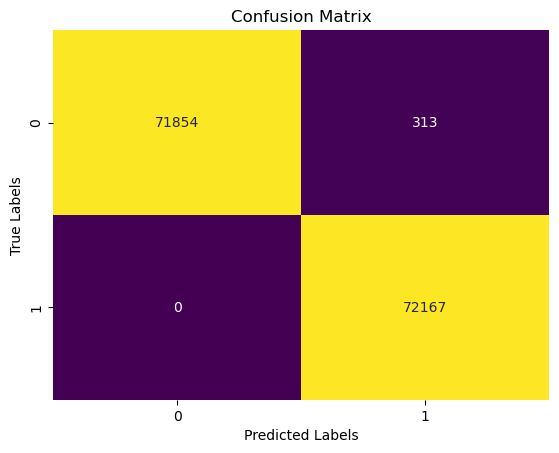

In [ ]:
confMat = confusion_matrix(y_test,yPredStacking)
sns.heatmap(confMat, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(format(classification_report(y_test,yPredStacking)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     72167
           1       1.00      1.00      1.00     72167

    accuracy                           1.00    144334
   macro avg       1.00      1.00      1.00    144334
weighted avg       1.00      1.00      1.00    144334



In [ ]:
print("f1 Score {}".format(f1_score(y_test,yPredStacking)))
print("Recall Score {}".format(recall_score(y_test,yPredStacking)))
print("Accuracy Score {}".format(accuracy_score(y_test,yPredStacking)))
print("Precision Score {}".format(precision_score(y_test,yPredStacking)))

f1 Score 0.997836111360761
Recall Score 1.0
Accuracy Score 0.9978314187925229
Precision Score 0.9956815673289183
